In [1]:
import matplotlib 
from matplotlib import pyplot as plt
import pylab as py
from matplotlib.backends.backend_pdf import PdfPages
from astropy.io import fits, ascii
from astropy import wcs
import scipy.ndimage as ndi
import numpy as np
from matplotlib.ticker import MultipleLocator,FuncFormatter
import matplotlib.ticker as ticker
from matplotlib.ticker import LinearLocator, FormatStrFormatter

from astropy.visualization import AsinhStretch, SqrtStretch, PercentileInterval
import pickle
from time import perf_counter as clock
from matplotlib import colors
import os
#from mpfit import mpfit
from scipy.optimize import curve_fit
import matplotlib as mpl

from matplotlib.pyplot import MultipleLocator

In [2]:
###########MUSE sources
objname_all = ['CGCG035-007', 'ESO115-G021', 'ESO245-G005', 'ESO294-G010', 'ESO321-G014', \
               'ESO444-G084',      'IC1574',      'KKH086',     'NGC1311',     'NGC1522', \
                   'NGC1800',    'UGC00695',    'UGC02716',    'UGC05288',    'UGC05373', \
                   'UGCA193',     'UGCA320',         'WLM']

objname_all = np.array(objname_all)
direc_IFU   = '/Volumes/lx/MUSE/post-process-MUSE/'
subdirec    = '/spec_spa_resample/'
tab_gal     = ascii.read('/Volumes/lx/MUSE/final_sample.txt')

### load file

In [3]:
id_obj  = 0
objname = objname_all[id_obj]

print(objname)

###loading 
t       = clock()
res_fit = pickle.load(open("/Volumes/lx/MUSE/dataproducts/"+objname+".result", "rb"))
dict_stargas = pickle.load(open("/Volumes/lx/MUSE/dataproducts/"+objname+"_stargas.dict", "rb"))

cz      = np.nanmedian(dict_stargas['v_Hgas'])

c       = 299792.458  # speed of light in km/s
z       = cz/c

CGCG035-007


In [4]:
dict_stargas['gas_names']

['Hbeta',
 'Halpha',
 'HeI5875',
 '[OI]6300',
 '[SIII]6312',
 '[OI]6363',
 '[ArIII]7135',
 '[SII]6716',
 '[SII]6731',
 '[OIII]4959',
 '[OIII]5007',
 '[OI]6300',
 '[OI]6364',
 '[NII]6548',
 '[NII]6583']

### extract emission line
#### 'OII_3727'; 'NeIII_3868'; 'OIII_4363'; 'OIII_4959';  'OIII_5007';  'NII6583'; 'SII_6725' ('SII_6717'+'SII_6731')

In [6]:
snr_cut=3

Hbeta      = dict_stargas['Hbeta_flux']
Hbeta_err  = dict_stargas['Hbeta_fluxerr']
Hbeta_snr  = Hbeta/Hbeta_err
s          = np.isnan(Hbeta_snr)
Hbeta_snr[s] = 0
id           = Hbeta_snr < snr_cut
Hbeta[id]    = np.nan


OIII4959      = dict_stargas['[OIII]4959_flux']
OIII4959_err  = dict_stargas['[OIII]4959_fluxerr']
OIII4959_snr  = OIII4959/OIII4959_err
s             = np.isnan(OIII4959_snr)
OIII4959_snr[s] = 0
id              = OIII4959_snr < snr_cut
OIII4959[id]    = np.nan

OIII5007      = dict_stargas['[OIII]5007_flux']
OIII5007_err  = dict_stargas['[OIII]5007_fluxerr']
OIII5007_snr  = OIII5007/OIII5007_err
s             = np.isnan(OIII5007_snr)
OIII5007_snr[s] = 0
id              = OIII5007_snr < snr_cut
OIII5007[id]    = np.nan

NII6583      = dict_stargas['[NII]6583_flux']
NII6583_err  = dict_stargas['[NII]6583_fluxerr']
NII6583_snr  = NII6583/NII6583_err
s              = np.isnan(NII6583_snr)
NII6583_snr[s] = 0
id             = NII6583_snr < snr_cut
NII6583[id]    = np.nan

SII6716      = dict_stargas['[SII]6716_flux']
SII6716_err = dict_stargas['[SII]6716_fluxerr']
SII6716_snr = SII6716/SII6716_err
s              = np.isnan(SII6716_snr)
SII6716_snr[s] = 0
id             = SII6716_snr < snr_cut
SII6716[id]    = 0

SII6731     = dict_stargas['[SII]6731_flux']
SII6731_err = dict_stargas['[SII]6731_fluxerr']
SII6731_snr = SII6731/SII6731_err
s              = np.isnan(SII6731_snr)
SII6731_snr[s] = 0
id             = SII6731_snr < snr_cut
SII6731[id]    = 0



In [7]:
OIII_4959 = OIII4959/Hbeta
OIII_5007 = OIII5007/Hbeta
NII_6584  = NII6583/Hbeta
SII_6725  = (SII6716+SII6731)/Hbeta

eOIII_4959= np.sqrt((OIII4959_err/Hbeta)**2+(OIII4959*Hbeta_err/(Hbeta)**2)**2)
eOIII_5007= np.sqrt((OIII5007_err/Hbeta)**2+(OIII5007*Hbeta_err/(Hbeta)**2)**2)
eNII_6584 = np.sqrt((NII6583_err/Hbeta)**2+(NII6583*Hbeta_err/(Hbeta)**2)**2)
eSII_6725 = np.sqrt((SII6716_err/Hbeta)**2+(SII6731_err/Hbeta)**2+((SII6716+SII6731)*Hbeta_err/(Hbeta)**2)**2) 

In [8]:
s = np.isnan(OIII_4959)
OIII_4959[s]  = 0

s = np.isnan(eOIII_4959)
eOIII_4959[s] = 0

s = np.isnan(OIII_5007)
OIII_5007[s]  = 0

s = np.isnan(eOIII_5007)
eOIII_5007[s] = 0

s = np.isnan(NII_6584)
NII_6584[s]  = 0

s = np.isnan(eNII_6584)
eNII_6584[s] = 0

s = np.isnan(SII_6725)
SII_6725[s]  = 0

s = np.isnan(eSII_6725)
eSII_6725[s] = 0

In [9]:
s = np.isinf(OIII_4959)
OIII_4959[s]  = 0

s = np.isinf(eOIII_4959)
eOIII_4959[s] = 0

s = np.isinf(OIII_5007)
OIII_5007[s]  = 0

s = np.isinf(eOIII_5007)
eOIII_5007[s] = 0

s = np.isinf(NII_6584)
NII_6584[s]  = 0

s = np.isinf(eNII_6584)
eNII_6584[s] = 0

s = np.isinf(SII_6725)
SII_6725[s]  = 0

s = np.isinf(eSII_6725)
eSII_6725[s] = 0

In [10]:
OIII_4959.shape

(166, 164)

In [11]:
OIII_4959 = OIII_4959.flatten()
OIII_5007 = OIII_5007.flatten()
NII_6584  = NII_6584.flatten()
SII_6725  = SII_6725.flatten()

eOIII_4959 = eOIII_4959.flatten()
eOIII_5007 = eOIII_5007.flatten()
eNII_6584  = eNII_6584.flatten()
eSII_6725  = eSII_6725.flatten()

In [12]:
OIII_4959.shape

(27224,)

In [13]:
OII_3727    = np.zeros((27224))
eOII_3727   = np.zeros((27224))
NeIII_3868  = np.zeros((27224))
eNeIII_3868 = np.zeros((27224))
OIII_4363   = np.zeros((27224))
eOIII_4363  = np.zeros((27224))

In [37]:
input_emit  = np.stack((OII_3727,eOII_3727,NeIII_3868,eNeIII_3868,OIII_4363,eOIII_4363,OIII_4959,eOIII_4959,
                         OIII_5007,eOIII_5007,NII_6584,eNII_6584,SII_6725,eSII_6725))


In [38]:
input_emit.shape

(14, 27224)

In [14]:
from astropy.table import Table

In [15]:
input_emit = Table({'OII_3727':OII_3727,'eOII_3727':eOII_3727,'NeIII_3868':NeIII_3868,'eNeIII_3868':eNeIII_3868,'OIII_4363':OIII_4363,
          'eOIII_4363':eOIII_4363,'OIII_4959':OIII_4959,'eOIII_4959':eOIII_4959,
                         'OIII_5007':OIII_5007,'eOIII_5007':eOIII_5007,'NII_6584':NII_6584,'eNII_6584':eNII_6584,'SII_6725':SII_6725,'eSII_6725':eSII_6725})

In [44]:
input_emit

<Table length=27224>
OII_3727 eOII_3727 NeIII_3868 eNeIII_3868 ... eNII_6584 SII_6725 eSII_6725
float64   float64   float64     float64   ...  float64  float64   float64 
-------- --------- ---------- ----------- ... --------- -------- ---------
     0.0       0.0        0.0         0.0 ...       0.0      0.0       0.0
     0.0       0.0        0.0         0.0 ...       0.0      0.0       0.0
     0.0       0.0        0.0         0.0 ...       0.0      0.0       0.0
     0.0       0.0        0.0         0.0 ...       0.0      0.0       0.0
     0.0       0.0        0.0         0.0 ...       0.0      0.0       0.0
     0.0       0.0        0.0         0.0 ...       0.0      0.0       0.0
     0.0       0.0        0.0         0.0 ...       0.0      0.0       0.0
     0.0       0.0        0.0         0.0 ...       0.0      0.0       0.0
     0.0       0.0        0.0         0.0 ...       0.0      0.0       0.0
     0.0       0.0        0.0         0.0 ...       0.0      0.0       0.0
     ...       ...        ...         ... ...       ...      ...       ...
     0.0       0.0        0.0         0.0 ...       0.0      0.0       0.0
     0.0       0.0        0.0         0.0 ...       0.0      0.0       0.0
     0.0       0.0        0.0         0.0 ...       0.0      0.0       0.0
     0.0       0.0        0.0         0.0 ...       0.0      0.0       0.0
     0.0       0.0        0.0         0.0 ...       0.0      0.0       0.0
     0.0       0.0        0.0         0.0 ...       0.0      0.0       0.0
     0.0       0.0        0.0         0.0 ...       0.0      0.0       0.0
     0.0       0.0        0.0         0.0 ...       0.0      0.0       0.0
     0.0       0.0        0.0         0.0 ...       0.0      0.0       0.0
     0.0       0.0        0.0         0.0 ...       0.0      0.0       0.0

In [16]:
ascii.write(input_emit,objname+"_input.dat",overwrite=True)

In [17]:
run HCm_v5.1.py CGCG035-007_input.dat

 ---------------------------------------------------------------------
This is HII-CHI-mistry v. 5.1
 See Perez-Montero, E. (2014) for details
 Insert the name of your input text file with all or some of the following columns:
 3727 [OII], 3868 [NeIII], 4363 [OIII], 5007 [OIII], 6584 [NII], 6725 [SII]
with their corresponding labels and errors in adjacent columns
---------------------------------------------------------------------
The input file is:CGCG035-007_input.dat

The number of iterations for MonteCarlo simulation is:  25


-------------------------------------------------
(1) POPSTAR with Chabrier IMF, age = 1 Myr
(2) BPASS v.2.1 a_IMF = 1.35, Mup = 300, age = 1Myr
(3) AGN, double component, a(OX) = -0.8, a(UV) = -1.0
(4) AGN, double component, a(OX) = -1.2, a(UV) = -1.0
-------------------------------------------------
Choose SED of the models:1

Choose models [0] No interpolated [1] Interpolated: 0

No interpolation for the POPSTAR models is going to be used.
The grid has a 

1.2 % 334 3  0.0 0.0  -10 0  0.0 0.0
1.2 % 335 3  0.0 0.0  -10 0  0.0 0.0
1.2 % 336 3  0.0 0.0  -10 0  0.0 0.0
1.2 % 337 3  0.0 0.0  -10 0  0.0 0.0
1.2 % 338 3  0.0 0.0  -10 0  0.0 0.0
1.2 % 339 3  0.0 0.0  -10 0  0.0 0.0
1.2 % 340 3  0.0 0.0  -10 0  0.0 0.0
1.3 % 341 3  0.0 0.0  -10 0  0.0 0.0
1.3 % 342 3  0.0 0.0  -10 0  0.0 0.0
1.3 % 343 3  0.0 0.0  -10 0  0.0 0.0
1.3 % 344 3  0.0 0.0  -10 0  0.0 0.0
1.3 % 345 3  0.0 0.0  -10 0  0.0 0.0
1.3 % 346 3  0.0 0.0  -10 0  0.0 0.0
1.3 % 347 3  0.0 0.0  -10 0  0.0 0.0
1.3 % 348 3  0.0 0.0  -10 0  0.0 0.0
1.3 % 349 3  0.0 0.0  -10 0  0.0 0.0
1.3 % 350 3  0.0 0.0  -10 0  0.0 0.0
1.3 % 351 3  0.0 0.0  -10 0  0.0 0.0
1.3 % 352 3  0.0 0.0  -10 0  0.0 0.0
1.3 % 353 3  0.0 0.0  -10 0  0.0 0.0
1.3 % 354 3  0.0 0.0  -10 0  0.0 0.0
1.3 % 355 3  0.0 0.0  -10 0  0.0 0.0
1.3 % 356 3  0.0 0.0  -10 0  0.0 0.0
1.3 % 357 3  0.0 0.0  -10 0  0.0 0.0
1.3 % 358 3  0.0 0.0  -10 0  0.0 0.0
1.3 % 359 3  0.0 0.0  -10 0  0.0 0.0
1.3 % 360 3  0.0 0.0  -10 0  0.0 0.0
1

2.6 % 700 3  8.48 0.11  -10 0  -2.96 0.1
2.6 % 701 3  0.0 0.0  -10 0  0.0 0.0
2.6 % 702 3  0.0 0.0  -10 0  0.0 0.0
2.6 % 703 3  0.0 0.0  -10 0  0.0 0.0
2.6 % 704 3  0.0 0.0  -10 0  0.0 0.0
2.6 % 705 3  0.0 0.0  -10 0  0.0 0.0
2.6 % 706 3  0.0 0.0  -10 0  0.0 0.0
2.6 % 707 3  0.0 0.0  -10 0  0.0 0.0
2.6 % 708 3  0.0 0.0  -10 0  0.0 0.0
2.6 % 709 3  0.0 0.0  -10 0  0.0 0.0
2.6 % 710 3  0.0 0.0  -10 0  0.0 0.0
2.6 % 711 3  0.0 0.0  -10 0  0.0 0.0
2.6 % 712 3  0.0 0.0  -10 0  0.0 0.0
2.6 % 713 3  0.0 0.0  -10 0  0.0 0.0
2.6 % 714 3  0.0 0.0  -10 0  0.0 0.0
2.6 % 715 3  0.0 0.0  -10 0  0.0 0.0
2.6 % 716 3  0.0 0.0  -10 0  0.0 0.0
2.6 % 717 3  0.0 0.0  -10 0  0.0 0.0
2.6 % 718 3  0.0 0.0  -10 0  0.0 0.0
2.6 % 719 3  0.0 0.0  -10 0  0.0 0.0
2.6 % 720 3  0.0 0.0  -10 0  0.0 0.0
2.6 % 721 3  0.0 0.0  -10 0  0.0 0.0
2.7 % 722 3  0.0 0.0  -10 0  0.0 0.0
2.7 % 723 3  0.0 0.0  -10 0  0.0 0.0
2.7 % 724 3  0.0 0.0  -10 0  0.0 0.0
2.7 % 725 3  0.0 0.0  -10 0  0.0 0.0
2.7 % 726 3  0.0 0.0  -10 0  0.0 0

3.5 % 945 3  8.51 0.32  -10 0  -3.06 0.31
3.5 % 946 3  0.0 0.0  -10 0  0.0 0.0
3.5 % 947 3  0.0 0.0  -10 0  0.0 0.0
3.5 % 948 3  0.0 0.0  -10 0  0.0 0.0
3.5 % 949 3  0.0 0.0  -10 0  0.0 0.0
3.5 % 950 3  0.0 0.0  -10 0  0.0 0.0
3.5 % 951 3  0.0 0.0  -10 0  0.0 0.0
3.5 % 952 3  0.0 0.0  -10 0  0.0 0.0
3.5 % 953 3  0.0 0.0  -10 0  0.0 0.0
3.5 % 954 3  0.0 0.0  -10 0  0.0 0.0
3.5 % 955 3  0.0 0.0  -10 0  0.0 0.0
3.5 % 956 3  0.0 0.0  -10 0  0.0 0.0
3.5 % 957 3  0.0 0.0  -10 0  0.0 0.0
3.5 % 958 3  0.0 0.0  -10 0  0.0 0.0
3.5 % 959 3  0.0 0.0  -10 0  0.0 0.0
3.5 % 960 3  0.0 0.0  -10 0  0.0 0.0
3.5 % 961 3  0.0 0.0  -10 0  0.0 0.0
3.5 % 962 3  0.0 0.0  -10 0  0.0 0.0
3.5 % 963 3  0.0 0.0  -10 0  0.0 0.0
3.5 % 964 3  0.0 0.0  -10 0  0.0 0.0
3.5 % 965 3  0.0 0.0  -10 0  0.0 0.0
3.5 % 966 3  0.0 0.0  -10 0  0.0 0.0
3.6 % 967 3  0.0 0.0  -10 0  0.0 0.0
3.6 % 968 3  0.0 0.0  -10 0  0.0 0.0
3.6 % 969 3  0.0 0.0  -10 0  0.0 0.0
3.6 % 970 3  0.0 0.0  -10 0  0.0 0.0
3.6 % 971 3  0.0 0.0  -10 0  0.0 

4.3 % 1170 3  0.0 0.0  -10 0  0.0 0.0
4.3 % 1171 3  0.0 0.0  -10 0  0.0 0.0
4.3 % 1172 3  0.0 0.0  -10 0  0.0 0.0
4.3 % 1173 3  0.0 0.0  -10 0  0.0 0.0
4.3 % 1174 3  0.0 0.0  -10 0  0.0 0.0
4.3 % 1175 3  0.0 0.0  -10 0  0.0 0.0
4.3 % 1176 3  0.0 0.0  -10 0  0.0 0.0
4.3 % 1177 3  0.0 0.0  -10 0  0.0 0.0
4.3 % 1178 3  0.0 0.0  -10 0  0.0 0.0
4.3 % 1179 3  0.0 0.0  -10 0  0.0 0.0
4.3 % 1180 3  0.0 0.0  -10 0  0.0 0.0
4.3 % 1181 3  0.0 0.0  -10 0  0.0 0.0
4.3 % 1182 3  0.0 0.0  -10 0  0.0 0.0
4.3 % 1183 3  0.0 0.0  -10 0  0.0 0.0
4.3 % 1184 3  0.0 0.0  -10 0  0.0 0.0
4.4 % 1185 3  0.0 0.0  -10 0  0.0 0.0
4.4 % 1186 3  0.0 0.0  -10 0  0.0 0.0
4.4 % 1187 3  0.0 0.0  -10 0  0.0 0.0
4.4 % 1188 3  0.0 0.0  -10 0  0.0 0.0
4.4 % 1189 3  0.0 0.0  -10 0  0.0 0.0
4.4 % 1190 3  0.0 0.0  -10 0  0.0 0.0
4.4 % 1191 3  0.0 0.0  -10 0  0.0 0.0
4.4 % 1192 3  0.0 0.0  -10 0  0.0 0.0
4.4 % 1193 3  0.0 0.0  -10 0  0.0 0.0
4.4 % 1194 3  0.0 0.0  -10 0  0.0 0.0
4.4 % 1195 3  0.0 0.0  -10 0  0.0 0.0
4.4 % 1196 3

5.2 % 1413 3  0.0 0.0  -10 0  0.0 0.0
5.2 % 1414 3  0.0 0.0  -10 0  0.0 0.0
5.2 % 1415 3  0.0 0.0  -10 0  0.0 0.0
5.2 % 1416 3  0.0 0.0  -10 0  0.0 0.0
5.2 % 1417 3  0.0 0.0  -10 0  0.0 0.0
5.2 % 1418 3  0.0 0.0  -10 0  0.0 0.0
5.2 % 1419 3  0.0 0.0  -10 0  0.0 0.0
5.2 % 1420 3  0.0 0.0  -10 0  0.0 0.0
5.2 % 1421 3  0.0 0.0  -10 0  0.0 0.0
5.2 % 1422 3  0.0 0.0  -10 0  0.0 0.0
5.2 % 1423 3  0.0 0.0  -10 0  0.0 0.0
5.2 % 1424 3  0.0 0.0  -10 0  0.0 0.0
5.2 % 1425 3  0.0 0.0  -10 0  0.0 0.0
5.2 % 1426 3  0.0 0.0  -10 0  0.0 0.0
5.2 % 1427 3  0.0 0.0  -10 0  0.0 0.0
5.2 % 1428 3  0.0 0.0  -10 0  0.0 0.0
5.2 % 1429 3  0.0 0.0  -10 0  0.0 0.0
5.3 % 1430 3  0.0 0.0  -10 0  0.0 0.0
5.3 % 1431 3  0.0 0.0  -10 0  0.0 0.0
5.3 % 1432 3  0.0 0.0  -10 0  0.0 0.0
5.3 % 1433 3  0.0 0.0  -10 0  0.0 0.0
5.3 % 1434 3  0.0 0.0  -10 0  0.0 0.0
5.3 % 1435 3  0.0 0.0  -10 0  0.0 0.0
5.3 % 1436 3  0.0 0.0  -10 0  0.0 0.0
5.3 % 1437 3  0.0 0.0  -10 0  0.0 0.0
5.3 % 1438 3  0.0 0.0  -10 0  0.0 0.0
5.3 % 1439 3

6.6 % 1807 3  0.0 0.0  -10 0  0.0 0.0
6.6 % 1808 3  0.0 0.0  -10 0  0.0 0.0
6.6 % 1809 3  0.0 0.0  -10 0  0.0 0.0
6.6 % 1810 3  0.0 0.0  -10 0  0.0 0.0
6.7 % 1811 3  0.0 0.0  -10 0  0.0 0.0
6.7 % 1812 3  0.0 0.0  -10 0  0.0 0.0
6.7 % 1813 3  0.0 0.0  -10 0  0.0 0.0
6.7 % 1814 3  0.0 0.0  -10 0  0.0 0.0
6.7 % 1815 3  0.0 0.0  -10 0  0.0 0.0
6.7 % 1816 3  0.0 0.0  -10 0  0.0 0.0
6.7 % 1817 3  0.0 0.0  -10 0  0.0 0.0
6.7 % 1818 3  0.0 0.0  -10 0  0.0 0.0
6.7 % 1819 3  0.0 0.0  -10 0  0.0 0.0
6.7 % 1820 3  0.0 0.0  -10 0  0.0 0.0
6.7 % 1821 3  0.0 0.0  -10 0  0.0 0.0
6.7 % 1822 3  0.0 0.0  -10 0  0.0 0.0
6.7 % 1823 3  0.0 0.0  -10 0  0.0 0.0
6.7 % 1824 3  0.0 0.0  -10 0  0.0 0.0
6.7 % 1825 3  0.0 0.0  -10 0  0.0 0.0
6.7 % 1826 3  0.0 0.0  -10 0  0.0 0.0
6.7 % 1827 3  0.0 0.0  -10 0  0.0 0.0
6.7 % 1828 3  0.0 0.0  -10 0  0.0 0.0
6.7 % 1829 3  0.0 0.0  -10 0  0.0 0.0
6.7 % 1830 3  0.0 0.0  -10 0  0.0 0.0
6.7 % 1831 3  0.0 0.0  -10 0  0.0 0.0
6.7 % 1832 3  0.0 0.0  -10 0  0.0 0.0
6.7 % 1833 3

8.2 % 2225 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2226 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2227 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2228 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2229 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2230 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2231 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2232 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2233 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2234 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2235 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2236 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2237 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2238 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2239 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2240 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2241 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2242 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2243 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2244 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2245 3  0.0 0.0  -10 0  0.0 0.0
8.3 % 2246 3  0.0 0.0  -10 0  0.0 0.0
8.3 % 2247 3  0.0 0.0  -10 0  0.0 0.0
8.3 % 2248 3  0.0 0.0  -10 0  0.0 0.0
8.3 % 2249 3  0.0 0.0  -10 0  0.0 0.0
8.3 % 2250 3  0.0 0.0  -10 0  0.0 0.0
8.3 % 2251 3

9.7 % 2643 3  0.0 0.0  -10 0  0.0 0.0
9.7 % 2644 3  0.0 0.0  -10 0  0.0 0.0
9.7 % 2645 3  0.0 0.0  -10 0  0.0 0.0
9.7 % 2646 3  0.0 0.0  -10 0  0.0 0.0
9.7 % 2647 3  0.0 0.0  -10 0  0.0 0.0
9.7 % 2648 3  0.0 0.0  -10 0  0.0 0.0
9.7 % 2649 3  0.0 0.0  -10 0  0.0 0.0
9.7 % 2650 3  0.0 0.0  -10 0  0.0 0.0
9.7 % 2651 3  0.0 0.0  -10 0  0.0 0.0
9.7 % 2652 3  0.0 0.0  -10 0  0.0 0.0
9.7 % 2653 3  0.0 0.0  -10 0  0.0 0.0
9.7 % 2654 3  0.0 0.0  -10 0  0.0 0.0
9.8 % 2655 3  0.0 0.0  -10 0  0.0 0.0
9.8 % 2656 3  0.0 0.0  -10 0  0.0 0.0
9.8 % 2657 3  0.0 0.0  -10 0  0.0 0.0
9.8 % 2658 3  0.0 0.0  -10 0  0.0 0.0
9.8 % 2659 3  0.0 0.0  -10 0  0.0 0.0
9.8 % 2660 3  0.0 0.0  -10 0  0.0 0.0
9.8 % 2661 3  0.0 0.0  -10 0  0.0 0.0
9.8 % 2662 3  0.0 0.0  -10 0  0.0 0.0
9.8 % 2663 3  0.0 0.0  -10 0  0.0 0.0
9.8 % 2664 3  0.0 0.0  -10 0  0.0 0.0
9.8 % 2665 3  0.0 0.0  -10 0  0.0 0.0
9.8 % 2666 3  0.0 0.0  -10 0  0.0 0.0
9.8 % 2667 3  0.0 0.0  -10 0  0.0 0.0
9.8 % 2668 3  0.0 0.0  -10 0  0.0 0.0
9.8 % 2669 3

11.2 % 3049 3  0.0 0.0  -10 0  0.0 0.0
11.2 % 3050 3  0.0 0.0  -10 0  0.0 0.0
11.2 % 3051 3  0.0 0.0  -10 0  0.0 0.0
11.2 % 3052 3  0.0 0.0  -10 0  0.0 0.0
11.2 % 3053 3  0.0 0.0  -10 0  0.0 0.0
11.2 % 3054 3  0.0 0.0  -10 0  0.0 0.0
11.2 % 3055 3  0.0 0.0  -10 0  0.0 0.0
11.2 % 3056 3  0.0 0.0  -10 0  0.0 0.0
11.2 % 3057 3  0.0 0.0  -10 0  0.0 0.0
11.2 % 3058 3  0.0 0.0  -10 0  0.0 0.0
11.2 % 3059 3  0.0 0.0  -10 0  0.0 0.0
11.2 % 3060 3  0.0 0.0  -10 0  0.0 0.0
11.2 % 3061 3  0.0 0.0  -10 0  0.0 0.0
11.2 % 3062 3  0.0 0.0  -10 0  0.0 0.0
11.3 % 3063 3  0.0 0.0  -10 0  0.0 0.0
11.3 % 3064 3  0.0 0.0  -10 0  0.0 0.0
11.3 % 3065 3  0.0 0.0  -10 0  0.0 0.0
11.3 % 3066 3  0.0 0.0  -10 0  0.0 0.0
11.3 % 3067 3  0.0 0.0  -10 0  0.0 0.0
11.3 % 3068 3  0.0 0.0  -10 0  0.0 0.0
11.3 % 3069 3  0.0 0.0  -10 0  0.0 0.0
11.3 % 3070 3  0.0 0.0  -10 0  0.0 0.0
11.3 % 3071 3  0.0 0.0  -10 0  0.0 0.0
11.3 % 3072 3  0.0 0.0  -10 0  0.0 0.0
11.3 % 3073 3  0.0 0.0  -10 0  0.0 0.0
11.3 % 3074 3  0.0 0.0  -

12.7 % 3453 3  0.0 0.0  -10 0  0.0 0.0
12.7 % 3454 3  0.0 0.0  -10 0  0.0 0.0
12.7 % 3455 3  0.0 0.0  -10 0  0.0 0.0
12.7 % 3456 3  0.0 0.0  -10 0  0.0 0.0
12.7 % 3457 3  0.0 0.0  -10 0  0.0 0.0
12.7 % 3458 3  0.0 0.0  -10 0  0.0 0.0
12.7 % 3459 3  0.0 0.0  -10 0  0.0 0.0
12.7 % 3460 3  0.0 0.0  -10 0  0.0 0.0
12.7 % 3461 3  0.0 0.0  -10 0  0.0 0.0
12.7 % 3462 3  0.0 0.0  -10 0  0.0 0.0
12.7 % 3463 3  0.0 0.0  -10 0  0.0 0.0
12.7 % 3464 3  0.0 0.0  -10 0  0.0 0.0
12.7 % 3465 3  0.0 0.0  -10 0  0.0 0.0
12.7 % 3466 3  0.0 0.0  -10 0  0.0 0.0
12.7 % 3467 3  0.0 0.0  -10 0  0.0 0.0
12.7 % 3468 3  0.0 0.0  -10 0  0.0 0.0
12.7 % 3469 3  0.0 0.0  -10 0  0.0 0.0
12.7 % 3470 3  0.0 0.0  -10 0  0.0 0.0
12.7 % 3471 3  0.0 0.0  -10 0  0.0 0.0
12.8 % 3472 3  0.0 0.0  -10 0  0.0 0.0
12.8 % 3473 3  0.0 0.0  -10 0  0.0 0.0
12.8 % 3474 3  0.0 0.0  -10 0  0.0 0.0
12.8 % 3475 3  0.0 0.0  -10 0  0.0 0.0
12.8 % 3476 3  0.0 0.0  -10 0  0.0 0.0
12.8 % 3477 3  0.0 0.0  -10 0  0.0 0.0
12.8 % 3478 3  0.0 0.0  -

14.2 % 3862 3  0.0 0.0  -10 0  0.0 0.0
14.2 % 3863 3  0.0 0.0  -10 0  0.0 0.0
14.2 % 3864 3  0.0 0.0  -10 0  0.0 0.0
14.2 % 3865 3  0.0 0.0  -10 0  0.0 0.0
14.2 % 3866 3  0.0 0.0  -10 0  0.0 0.0
14.2 % 3867 3  0.0 0.0  -10 0  0.0 0.0
14.2 % 3868 3  0.0 0.0  -10 0  0.0 0.0
14.2 % 3869 3  0.0 0.0  -10 0  0.0 0.0
14.2 % 3870 3  0.0 0.0  -10 0  0.0 0.0
14.2 % 3871 3  0.0 0.0  -10 0  0.0 0.0
14.2 % 3872 3  0.0 0.0  -10 0  0.0 0.0
14.2 % 3873 3  0.0 0.0  -10 0  0.0 0.0
14.2 % 3874 3  0.0 0.0  -10 0  0.0 0.0
14.2 % 3875 3  0.0 0.0  -10 0  0.0 0.0
14.2 % 3876 3  0.0 0.0  -10 0  0.0 0.0
14.2 % 3877 3  0.0 0.0  -10 0  0.0 0.0
14.2 % 3878 3  0.0 0.0  -10 0  0.0 0.0
14.2 % 3879 3  0.0 0.0  -10 0  0.0 0.0
14.3 % 3880 3  0.0 0.0  -10 0  0.0 0.0
14.3 % 3881 3  0.0 0.0  -10 0  0.0 0.0
14.3 % 3882 3  0.0 0.0  -10 0  0.0 0.0
14.3 % 3883 3  0.0 0.0  -10 0  0.0 0.0
14.3 % 3884 3  0.0 0.0  -10 0  0.0 0.0
14.3 % 3885 3  0.0 0.0  -10 0  0.0 0.0
14.3 % 3886 3  0.0 0.0  -10 0  0.0 0.0
14.3 % 3887 3  0.0 0.0  -

15.4 % 4198 3  0.0 0.0  -10 0  0.0 0.0
15.4 % 4199 3  0.0 0.0  -10 0  0.0 0.0
15.4 % 4200 3  0.0 0.0  -10 0  0.0 0.0
15.4 % 4201 3  0.0 0.0  -10 0  0.0 0.0
15.4 % 4202 3  0.0 0.0  -10 0  0.0 0.0
15.4 % 4203 3  0.0 0.0  -10 0  0.0 0.0
15.4 % 4204 3  0.0 0.0  -10 0  0.0 0.0
15.4 % 4205 3  0.0 0.0  -10 0  0.0 0.0
15.4 % 4206 3  0.0 0.0  -10 0  0.0 0.0
15.5 % 4207 3  0.0 0.0  -10 0  0.0 0.0
15.5 % 4208 3  0.0 0.0  -10 0  0.0 0.0
15.5 % 4209 3  0.0 0.0  -10 0  0.0 0.0
15.5 % 4210 3  0.0 0.0  -10 0  0.0 0.0
15.5 % 4211 3  0.0 0.0  -10 0  0.0 0.0
15.5 % 4212 3  0.0 0.0  -10 0  0.0 0.0
15.5 % 4213 3  0.0 0.0  -10 0  0.0 0.0
15.5 % 4214 3  0.0 0.0  -10 0  0.0 0.0
15.5 % 4215 3  0.0 0.0  -10 0  0.0 0.0
15.5 % 4216 3  0.0 0.0  -10 0  0.0 0.0
15.5 % 4217 3  0.0 0.0  -10 0  0.0 0.0
15.5 % 4218 3  0.0 0.0  -10 0  0.0 0.0
15.5 % 4219 3  0.0 0.0  -10 0  0.0 0.0
15.5 % 4220 3  0.0 0.0  -10 0  0.0 0.0
15.5 % 4221 3  0.0 0.0  -10 0  0.0 0.0
15.5 % 4222 3  0.0 0.0  -10 0  0.0 0.0
15.5 % 4223 3  0.0 0.0  -

16.9 % 4610 3  0.0 0.0  -10 0  0.0 0.0
16.9 % 4611 3  0.0 0.0  -10 0  0.0 0.0
16.9 % 4612 3  0.0 0.0  -10 0  0.0 0.0
16.9 % 4613 3  0.0 0.0  -10 0  0.0 0.0
16.9 % 4614 3  0.0 0.0  -10 0  0.0 0.0
17.0 % 4615 3  0.0 0.0  -10 0  0.0 0.0
17.0 % 4616 3  0.0 0.0  -10 0  0.0 0.0
17.0 % 4617 3  0.0 0.0  -10 0  0.0 0.0
17.0 % 4618 3  0.0 0.0  -10 0  0.0 0.0
17.0 % 4619 3  0.0 0.0  -10 0  0.0 0.0
17.0 % 4620 3  0.0 0.0  -10 0  0.0 0.0
17.0 % 4621 3  0.0 0.0  -10 0  0.0 0.0
17.0 % 4622 3  0.0 0.0  -10 0  0.0 0.0
17.0 % 4623 3  0.0 0.0  -10 0  0.0 0.0
17.0 % 4624 3  0.0 0.0  -10 0  0.0 0.0
17.0 % 4625 3  0.0 0.0  -10 0  0.0 0.0
17.0 % 4626 3  0.0 0.0  -10 0  0.0 0.0
17.0 % 4627 3  0.0 0.0  -10 0  0.0 0.0
17.0 % 4628 3  0.0 0.0  -10 0  0.0 0.0
17.0 % 4629 3  0.0 0.0  -10 0  0.0 0.0
17.0 % 4630 3  0.0 0.0  -10 0  0.0 0.0
17.0 % 4631 3  0.0 0.0  -10 0  0.0 0.0
17.0 % 4632 3  0.0 0.0  -10 0  0.0 0.0
17.0 % 4633 3  0.0 0.0  -10 0  0.0 0.0
17.0 % 4634 3  0.0 0.0  -10 0  0.0 0.0
17.0 % 4635 3  0.0 0.0  -

18.2 % 4951 3  0.0 0.0  -10 0  0.0 0.0
18.2 % 4952 3  0.0 0.0  -10 0  0.0 0.0
18.2 % 4953 3  0.0 0.0  -10 0  0.0 0.0
18.2 % 4954 3  0.0 0.0  -10 0  0.0 0.0
18.2 % 4955 3  0.0 0.0  -10 0  0.0 0.0
18.2 % 4956 3  0.0 0.0  -10 0  0.0 0.0
18.2 % 4957 3  0.0 0.0  -10 0  0.0 0.0
18.2 % 4958 3  0.0 0.0  -10 0  0.0 0.0
18.2 % 4959 3  0.0 0.0  -10 0  0.0 0.0
18.2 % 4960 3  0.0 0.0  -10 0  0.0 0.0
18.2 % 4961 3  0.0 0.0  -10 0  0.0 0.0
18.2 % 4962 3  0.0 0.0  -10 0  0.0 0.0
18.2 % 4963 3  0.0 0.0  -10 0  0.0 0.0
18.2 % 4964 3  0.0 0.0  -10 0  0.0 0.0
18.2 % 4965 3  0.0 0.0  -10 0  0.0 0.0
18.2 % 4966 3  0.0 0.0  -10 0  0.0 0.0
18.2 % 4967 3  0.0 0.0  -10 0  0.0 0.0
18.2 % 4968 3  0.0 0.0  -10 0  0.0 0.0
18.3 % 4969 3  0.0 0.0  -10 0  0.0 0.0
18.3 % 4970 3  0.0 0.0  -10 0  0.0 0.0
18.3 % 4971 3  0.0 0.0  -10 0  0.0 0.0
18.3 % 4972 3  0.0 0.0  -10 0  0.0 0.0
18.3 % 4973 3  0.0 0.0  -10 0  0.0 0.0
18.3 % 4974 3  0.0 0.0  -10 0  0.0 0.0
18.3 % 4975 3  0.0 0.0  -10 0  0.0 0.0
18.3 % 4976 3  0.0 0.0  -

19.7 % 5361 3  0.0 0.0  -10 0  0.0 0.0
19.7 % 5362 3  0.0 0.0  -10 0  0.0 0.0
19.7 % 5363 3  0.0 0.0  -10 0  0.0 0.0
19.7 % 5364 3  0.0 0.0  -10 0  0.0 0.0
19.7 % 5365 3  0.0 0.0  -10 0  0.0 0.0
19.7 % 5366 3  0.0 0.0  -10 0  0.0 0.0
19.7 % 5367 3  0.0 0.0  -10 0  0.0 0.0
19.7 % 5368 3  0.0 0.0  -10 0  0.0 0.0
19.7 % 5369 3  0.0 0.0  -10 0  0.0 0.0
19.7 % 5370 3  0.0 0.0  -10 0  0.0 0.0
19.7 % 5371 3  0.0 0.0  -10 0  0.0 0.0
19.7 % 5372 3  0.0 0.0  -10 0  0.0 0.0
19.7 % 5373 3  0.0 0.0  -10 0  0.0 0.0
19.7 % 5374 3  0.0 0.0  -10 0  0.0 0.0
19.7 % 5375 3  0.0 0.0  -10 0  0.0 0.0
19.7 % 5376 3  0.0 0.0  -10 0  0.0 0.0
19.8 % 5377 3  0.0 0.0  -10 0  0.0 0.0
19.8 % 5378 3  0.0 0.0  -10 0  0.0 0.0
19.8 % 5379 3  0.0 0.0  -10 0  0.0 0.0
19.8 % 5380 3  0.0 0.0  -10 0  0.0 0.0
19.8 % 5381 3  0.0 0.0  -10 0  0.0 0.0
19.8 % 5382 3  0.0 0.0  -10 0  0.0 0.0
19.8 % 5383 3  0.0 0.0  -10 0  0.0 0.0
19.8 % 5384 3  0.0 0.0  -10 0  0.0 0.0
19.8 % 5385 3  0.0 0.0  -10 0  0.0 0.0
19.8 % 5386 3  0.0 0.0  -

21.2 % 5771 3  0.0 0.0  -10 0  0.0 0.0
21.2 % 5772 3  0.0 0.0  -10 0  0.0 0.0
21.2 % 5773 3  0.0 0.0  -10 0  0.0 0.0
21.2 % 5774 3  0.0 0.0  -10 0  0.0 0.0
21.2 % 5775 3  0.0 0.0  -10 0  0.0 0.0
21.2 % 5776 3  0.0 0.0  -10 0  0.0 0.0
21.2 % 5777 3  0.0 0.0  -10 0  0.0 0.0
21.2 % 5778 3  0.0 0.0  -10 0  0.0 0.0
21.2 % 5779 3  0.0 0.0  -10 0  0.0 0.0
21.2 % 5780 3  0.0 0.0  -10 0  0.0 0.0
21.2 % 5781 3  0.0 0.0  -10 0  0.0 0.0
21.2 % 5782 3  0.0 0.0  -10 0  0.0 0.0
21.2 % 5783 3  0.0 0.0  -10 0  0.0 0.0
21.2 % 5784 3  0.0 0.0  -10 0  0.0 0.0
21.2 % 5785 3  0.0 0.0  -10 0  0.0 0.0
21.3 % 5786 3  0.0 0.0  -10 0  0.0 0.0
21.3 % 5787 3  0.0 0.0  -10 0  0.0 0.0
21.3 % 5788 3  0.0 0.0  -10 0  0.0 0.0
21.3 % 5789 3  0.0 0.0  -10 0  0.0 0.0
21.3 % 5790 3  0.0 0.0  -10 0  0.0 0.0
21.3 % 5791 3  0.0 0.0  -10 0  0.0 0.0
21.3 % 5792 3  0.0 0.0  -10 0  0.0 0.0
21.3 % 5793 3  0.0 0.0  -10 0  0.0 0.0
21.3 % 5794 3  0.0 0.0  -10 0  0.0 0.0
21.3 % 5795 3  0.0 0.0  -10 0  0.0 0.0
21.3 % 5796 3  0.0 0.0  -

22.7 % 6182 3  0.0 0.0  -10 0  0.0 0.0
22.7 % 6183 3  0.0 0.0  -10 0  0.0 0.0
22.7 % 6184 3  0.0 0.0  -10 0  0.0 0.0
22.7 % 6185 3  0.0 0.0  -10 0  0.0 0.0
22.7 % 6186 3  0.0 0.0  -10 0  0.0 0.0
22.7 % 6187 3  0.0 0.0  -10 0  0.0 0.0
22.7 % 6188 3  0.0 0.0  -10 0  0.0 0.0
22.7 % 6189 3  0.0 0.0  -10 0  0.0 0.0
22.7 % 6190 3  0.0 0.0  -10 0  0.0 0.0
22.7 % 6191 3  0.0 0.0  -10 0  0.0 0.0
22.7 % 6192 3  0.0 0.0  -10 0  0.0 0.0
22.7 % 6193 3  0.0 0.0  -10 0  0.0 0.0
22.8 % 6194 3  0.0 0.0  -10 0  0.0 0.0
22.8 % 6195 3  0.0 0.0  -10 0  0.0 0.0
22.8 % 6196 3  0.0 0.0  -10 0  0.0 0.0
22.8 % 6197 3  0.0 0.0  -10 0  0.0 0.0
22.8 % 6198 3  0.0 0.0  -10 0  0.0 0.0
22.8 % 6199 3  0.0 0.0  -10 0  0.0 0.0
22.8 % 6200 3  0.0 0.0  -10 0  0.0 0.0
22.8 % 6201 3  0.0 0.0  -10 0  0.0 0.0
22.8 % 6202 3  0.0 0.0  -10 0  0.0 0.0
22.8 % 6203 3  0.0 0.0  -10 0  0.0 0.0
22.8 % 6204 3  0.0 0.0  -10 0  0.0 0.0
22.8 % 6205 3  0.0 0.0  -10 0  0.0 0.0
22.8 % 6206 3  0.0 0.0  -10 0  0.0 0.0
22.8 % 6207 3  0.0 0.0  -

23.7 % 6452 3  0.0 0.0  -10 0  0.0 0.0
23.7 % 6453 3  0.0 0.0  -10 0  0.0 0.0
23.7 % 6454 3  0.0 0.0  -10 0  0.0 0.0
23.7 % 6455 3  0.0 0.0  -10 0  0.0 0.0
23.7 % 6456 3  0.0 0.0  -10 0  0.0 0.0
23.7 % 6457 3  0.0 0.0  -10 0  0.0 0.0
23.7 % 6458 3  0.0 0.0  -10 0  0.0 0.0
23.7 % 6459 3  0.0 0.0  -10 0  0.0 0.0
23.7 % 6460 3  0.0 0.0  -10 0  0.0 0.0
23.7 % 6461 3  0.0 0.0  -10 0  0.0 0.0
23.7 % 6462 3  0.0 0.0  -10 0  0.0 0.0
23.7 % 6463 3  0.0 0.0  -10 0  0.0 0.0
23.7 % 6464 3  0.0 0.0  -10 0  0.0 0.0
23.7 % 6465 3  0.0 0.0  -10 0  0.0 0.0
23.8 % 6466 3  0.0 0.0  -10 0  0.0 0.0
23.8 % 6467 3  0.0 0.0  -10 0  0.0 0.0
23.8 % 6468 3  0.0 0.0  -10 0  0.0 0.0
23.8 % 6469 3  0.0 0.0  -10 0  0.0 0.0
23.8 % 6470 3  0.0 0.0  -10 0  0.0 0.0
23.8 % 6471 3  0.0 0.0  -10 0  0.0 0.0
23.8 % 6472 3  0.0 0.0  -10 0  0.0 0.0
23.8 % 6473 3  0.0 0.0  -10 0  0.0 0.0
23.8 % 6474 3  0.0 0.0  -10 0  0.0 0.0
23.8 % 6475 3  0.0 0.0  -10 0  0.0 0.0
23.8 % 6476 3  0.0 0.0  -10 0  0.0 0.0
23.8 % 6477 3  0.0 0.0  -

24.5 % 6666 3  0.0 0.0  -10 0  0.0 0.0
24.5 % 6667 3  0.0 0.0  -10 0  0.0 0.0
24.5 % 6668 3  0.0 0.0  -10 0  0.0 0.0
24.5 % 6669 3  0.0 0.0  -10 0  0.0 0.0
24.5 % 6670 3  0.0 0.0  -10 0  0.0 0.0
24.5 % 6671 3  0.0 0.0  -10 0  0.0 0.0
24.5 % 6672 3  0.0 0.0  -10 0  0.0 0.0
24.5 % 6673 3  0.0 0.0  -10 0  0.0 0.0
24.5 % 6674 3  0.0 0.0  -10 0  0.0 0.0
24.5 % 6675 3  0.0 0.0  -10 0  0.0 0.0
24.5 % 6676 3  0.0 0.0  -10 0  0.0 0.0
24.5 % 6677 3  0.0 0.0  -10 0  0.0 0.0
24.5 % 6678 3  0.0 0.0  -10 0  0.0 0.0
24.5 % 6679 3  0.0 0.0  -10 0  0.0 0.0
24.5 % 6680 3  0.0 0.0  -10 0  0.0 0.0
24.5 % 6681 3  0.0 0.0  -10 0  0.0 0.0
24.5 % 6682 3  0.0 0.0  -10 0  0.0 0.0
24.5 % 6683 3  0.0 0.0  -10 0  0.0 0.0
24.6 % 6684 3  0.0 0.0  -10 0  0.0 0.0
24.6 % 6685 3  0.0 0.0  -10 0  0.0 0.0
24.6 % 6686 3  0.0 0.0  -10 0  0.0 0.0
24.6 % 6687 3  0.0 0.0  -10 0  0.0 0.0
24.6 % 6688 3  0.0 0.0  -10 0  0.0 0.0
24.6 % 6689 3  0.0 0.0  -10 0  0.0 0.0
24.6 % 6690 3  0.0 0.0  -10 0  0.0 0.0
24.6 % 6691 3  0.0 0.0  -

25.8 % 7015 3  8.15 0.36  -10 0  -2.61 0.32
25.8 % 7016 3  0.0 0.0  -10 0  0.0 0.0
25.8 % 7017 3  0.0 0.0  -10 0  0.0 0.0
25.8 % 7018 3  0.0 0.0  -10 0  0.0 0.0
25.8 % 7019 3  0.0 0.0  -10 0  0.0 0.0
25.8 % 7020 3  0.0 0.0  -10 0  0.0 0.0
25.8 % 7021 3  0.0 0.0  -10 0  0.0 0.0
25.8 % 7022 3  0.0 0.0  -10 0  0.0 0.0
25.8 % 7023 3  0.0 0.0  -10 0  0.0 0.0
25.8 % 7024 3  0.0 0.0  -10 0  0.0 0.0
25.8 % 7025 3  0.0 0.0  -10 0  0.0 0.0
25.8 % 7026 3  0.0 0.0  -10 0  0.0 0.0
25.8 % 7027 3  0.0 0.0  -10 0  0.0 0.0
25.8 % 7028 3  0.0 0.0  -10 0  0.0 0.0
25.8 % 7029 3  0.0 0.0  -10 0  0.0 0.0
25.8 % 7030 3  0.0 0.0  -10 0  0.0 0.0
25.8 % 7031 3  0.0 0.0  -10 0  0.0 0.0
25.8 % 7032 3  0.0 0.0  -10 0  0.0 0.0
25.8 % 7033 3  0.0 0.0  -10 0  0.0 0.0
25.8 % 7034 3  0.0 0.0  -10 0  0.0 0.0
25.8 % 7035 3  0.0 0.0  -10 0  0.0 0.0
25.8 % 7036 3  0.0 0.0  -10 0  0.0 0.0
25.8 % 7037 3  0.0 0.0  -10 0  0.0 0.0
25.9 % 7038 3  0.0 0.0  -10 0  0.0 0.0
25.9 % 7039 3  0.0 0.0  -10 0  0.0 0.0
25.9 % 7040 3  0.0 0

26.6 % 7246 3  0.0 0.0  -10 0  0.0 0.0
26.6 % 7247 3  0.0 0.0  -10 0  0.0 0.0
26.6 % 7248 3  0.0 0.0  -10 0  0.0 0.0
26.6 % 7249 3  0.0 0.0  -10 0  0.0 0.0
26.6 % 7250 3  0.0 0.0  -10 0  0.0 0.0
26.6 % 7251 3  0.0 0.0  -10 0  0.0 0.0
26.6 % 7252 3  0.0 0.0  -10 0  0.0 0.0
26.6 % 7253 3  0.0 0.0  -10 0  0.0 0.0
26.6 % 7254 3  0.0 0.0  -10 0  0.0 0.0
26.6 % 7255 3  0.0 0.0  -10 0  0.0 0.0
26.7 % 7256 3  0.0 0.0  -10 0  0.0 0.0
26.7 % 7257 3  0.0 0.0  -10 0  0.0 0.0
26.7 % 7258 3  0.0 0.0  -10 0  0.0 0.0
26.7 % 7259 3  0.0 0.0  -10 0  0.0 0.0
26.7 % 7260 3  0.0 0.0  -10 0  0.0 0.0
26.7 % 7261 3  0.0 0.0  -10 0  0.0 0.0
26.7 % 7262 3  0.0 0.0  -10 0  0.0 0.0
26.7 % 7263 3  0.0 0.0  -10 0  0.0 0.0
26.7 % 7264 3  0.0 0.0  -10 0  0.0 0.0
26.7 % 7265 3  0.0 0.0  -10 0  0.0 0.0
26.7 % 7266 3  0.0 0.0  -10 0  0.0 0.0
26.7 % 7267 3  0.0 0.0  -10 0  0.0 0.0
26.7 % 7268 3  0.0 0.0  -10 0  0.0 0.0
26.7 % 7269 3  0.0 0.0  -10 0  0.0 0.0
26.7 % 7270 3  0.0 0.0  -10 0  0.0 0.0
26.7 % 7271 3  0.0 0.0  -

27.8 % 7574 3  0.0 0.0  -10 0  0.0 0.0
27.8 % 7575 3  0.0 0.0  -10 0  0.0 0.0
27.8 % 7576 3  0.0 0.0  -10 0  0.0 0.0
27.8 % 7577 3  0.0 0.0  -10 0  0.0 0.0
27.8 % 7578 3  0.0 0.0  -10 0  0.0 0.0
27.8 % 7579 3  0.0 0.0  -10 0  0.0 0.0
27.8 % 7580 3  0.0 0.0  -10 0  0.0 0.0
27.8 % 7581 3  0.0 0.0  -10 0  0.0 0.0
27.9 % 7582 3  0.0 0.0  -10 0  0.0 0.0
27.9 % 7583 3  0.0 0.0  -10 0  0.0 0.0
27.9 % 7584 3  0.0 0.0  -10 0  0.0 0.0
27.9 % 7585 3  0.0 0.0  -10 0  0.0 0.0
27.9 % 7586 3  0.0 0.0  -10 0  0.0 0.0
27.9 % 7587 3  0.0 0.0  -10 0  0.0 0.0
27.9 % 7588 3  0.0 0.0  -10 0  0.0 0.0
27.9 % 7589 3  0.0 0.0  -10 0  0.0 0.0
27.9 % 7590 3  0.0 0.0  -10 0  0.0 0.0
27.9 % 7591 3  0.0 0.0  -10 0  0.0 0.0
27.9 % 7592 3  0.0 0.0  -10 0  0.0 0.0
27.9 % 7593 3  0.0 0.0  -10 0  0.0 0.0
27.9 % 7594 3  0.0 0.0  -10 0  0.0 0.0
27.9 % 7595 3  0.0 0.0  -10 0  0.0 0.0
27.9 % 7596 3  0.0 0.0  -10 0  0.0 0.0
27.9 % 7597 3  0.0 0.0  -10 0  0.0 0.0
27.9 % 7598 3  0.0 0.0  -10 0  0.0 0.0
27.9 % 7599 3  0.0 0.0  -

29.3 % 7980 3  0.0 0.0  -10 0  0.0 0.0
29.3 % 7981 3  0.0 0.0  -10 0  0.0 0.0
29.3 % 7982 3  0.0 0.0  -10 0  0.0 0.0
29.3 % 7983 3  0.0 0.0  -10 0  0.0 0.0
29.3 % 7984 3  0.0 0.0  -10 0  0.0 0.0
29.3 % 7985 3  0.0 0.0  -10 0  0.0 0.0
29.3 % 7986 3  0.0 0.0  -10 0  0.0 0.0
29.3 % 7987 3  0.0 0.0  -10 0  0.0 0.0
29.3 % 7988 3  0.0 0.0  -10 0  0.0 0.0
29.3 % 7989 3  0.0 0.0  -10 0  0.0 0.0
29.3 % 7990 3  0.0 0.0  -10 0  0.0 0.0
29.4 % 7991 3  0.0 0.0  -10 0  0.0 0.0
29.4 % 7992 3  0.0 0.0  -10 0  0.0 0.0
29.4 % 7993 3  0.0 0.0  -10 0  0.0 0.0
29.4 % 7994 3  0.0 0.0  -10 0  0.0 0.0
29.4 % 7995 3  0.0 0.0  -10 0  0.0 0.0
29.4 % 7996 3  0.0 0.0  -10 0  0.0 0.0
29.4 % 7997 3  0.0 0.0  -10 0  0.0 0.0
29.4 % 7998 3  0.0 0.0  -10 0  0.0 0.0
29.4 % 7999 3  0.0 0.0  -10 0  0.0 0.0
29.4 % 8000 3  0.0 0.0  -10 0  0.0 0.0
29.4 % 8001 3  0.0 0.0  -10 0  0.0 0.0
29.4 % 8002 3  0.0 0.0  -10 0  0.0 0.0
29.4 % 8003 3  0.0 0.0  -10 0  0.0 0.0
29.4 % 8004 3  0.0 0.0  -10 0  0.0 0.0
29.4 % 8005 3  0.0 0.0  -

30.5 % 8305 3  0.0 0.0  -10 0  0.0 0.0
30.5 % 8306 3  0.0 0.0  -10 0  0.0 0.0
30.5 % 8307 3  0.0 0.0  -10 0  0.0 0.0
30.5 % 8308 3  0.0 0.0  -10 0  0.0 0.0
30.5 % 8309 3  0.0 0.0  -10 0  0.0 0.0
30.5 % 8310 3  0.0 0.0  -10 0  0.0 0.0
30.5 % 8311 3  0.0 0.0  -10 0  0.0 0.0
30.5 % 8312 3  0.0 0.0  -10 0  0.0 0.0
30.5 % 8313 3  0.0 0.0  -10 0  0.0 0.0
30.5 % 8314 3  0.0 0.0  -10 0  0.0 0.0
30.5 % 8315 3  0.0 0.0  -10 0  0.0 0.0
30.5 % 8316 3  0.0 0.0  -10 0  0.0 0.0
30.6 % 8317 3  0.0 0.0  -10 0  0.0 0.0
30.6 % 8318 3  0.0 0.0  -10 0  0.0 0.0
30.6 % 8319 3  0.0 0.0  -10 0  0.0 0.0
30.6 % 8320 3  0.0 0.0  -10 0  0.0 0.0
30.6 % 8321 3  0.0 0.0  -10 0  0.0 0.0
30.6 % 8322 3  0.0 0.0  -10 0  0.0 0.0
30.6 % 8323 3  0.0 0.0  -10 0  0.0 0.0
30.6 % 8324 3  0.0 0.0  -10 0  0.0 0.0
30.6 % 8325 3  0.0 0.0  -10 0  0.0 0.0
30.6 % 8326 3  0.0 0.0  -10 0  0.0 0.0
30.6 % 8327 3  0.0 0.0  -10 0  0.0 0.0
30.6 % 8328 3  0.0 0.0  -10 0  0.0 0.0
30.6 % 8329 3  0.0 0.0  -10 0  0.0 0.0
30.6 % 8330 3  0.0 0.0  -

31.8 % 8650 3  8.57 0.16  -10 0  -3.05 0.18
31.8 % 8651 3  0.0 0.0  -10 0  0.0 0.0
31.8 % 8652 3  0.0 0.0  -10 0  0.0 0.0
31.8 % 8653 3  0.0 0.0  -10 0  0.0 0.0
31.8 % 8654 3  0.0 0.0  -10 0  0.0 0.0
31.8 % 8655 3  0.0 0.0  -10 0  0.0 0.0
31.8 % 8656 3  0.0 0.0  -10 0  0.0 0.0
31.8 % 8657 3  0.0 0.0  -10 0  0.0 0.0
31.8 % 8658 3  0.0 0.0  -10 0  0.0 0.0
31.8 % 8659 3  0.0 0.0  -10 0  0.0 0.0
31.8 % 8660 3  0.0 0.0  -10 0  0.0 0.0
31.8 % 8661 3  0.0 0.0  -10 0  0.0 0.0
31.8 % 8662 3  0.0 0.0  -10 0  0.0 0.0
31.8 % 8663 3  0.0 0.0  -10 0  0.0 0.0
31.8 % 8664 3  0.0 0.0  -10 0  0.0 0.0
31.8 % 8665 3  0.0 0.0  -10 0  0.0 0.0
31.8 % 8666 3  0.0 0.0  -10 0  0.0 0.0
31.8 % 8667 3  0.0 0.0  -10 0  0.0 0.0
31.8 % 8668 3  0.0 0.0  -10 0  0.0 0.0
31.8 % 8669 3  0.0 0.0  -10 0  0.0 0.0
31.8 % 8670 3  0.0 0.0  -10 0  0.0 0.0
31.9 % 8671 3  0.0 0.0  -10 0  0.0 0.0
31.9 % 8672 3  0.0 0.0  -10 0  0.0 0.0
31.9 % 8673 3  0.0 0.0  -10 0  0.0 0.0
31.9 % 8674 3  0.0 0.0  -10 0  0.0 0.0
31.9 % 8675 3  0.0 0

32.7 % 8900 3  8.41 0.14  -10 0  -2.91 0.11
32.7 % 8901 3  0.0 0.0  -10 0  0.0 0.0
32.7 % 8902 3  0.0 0.0  -10 0  0.0 0.0
32.7 % 8903 3  0.0 0.0  -10 0  0.0 0.0
32.7 % 8904 3  0.0 0.0  -10 0  0.0 0.0
32.7 % 8905 3  0.0 0.0  -10 0  0.0 0.0
32.7 % 8906 3  0.0 0.0  -10 0  0.0 0.0
32.7 % 8907 3  0.0 0.0  -10 0  0.0 0.0
32.7 % 8908 3  0.0 0.0  -10 0  0.0 0.0
32.7 % 8909 3  0.0 0.0  -10 0  0.0 0.0
32.7 % 8910 3  0.0 0.0  -10 0  0.0 0.0
32.7 % 8911 3  0.0 0.0  -10 0  0.0 0.0
32.7 % 8912 3  0.0 0.0  -10 0  0.0 0.0
32.7 % 8913 3  0.0 0.0  -10 0  0.0 0.0
32.7 % 8914 3  0.0 0.0  -10 0  0.0 0.0
32.7 % 8915 3  0.0 0.0  -10 0  0.0 0.0
32.8 % 8916 3  0.0 0.0  -10 0  0.0 0.0
32.8 % 8917 3  0.0 0.0  -10 0  0.0 0.0
32.8 % 8918 3  0.0 0.0  -10 0  0.0 0.0
32.8 % 8919 3  0.0 0.0  -10 0  0.0 0.0
32.8 % 8920 3  0.0 0.0  -10 0  0.0 0.0
32.8 % 8921 3  0.0 0.0  -10 0  0.0 0.0
32.8 % 8922 3  0.0 0.0  -10 0  0.0 0.0
32.8 % 8923 3  0.0 0.0  -10 0  0.0 0.0
32.8 % 8924 3  0.0 0.0  -10 0  0.0 0.0
32.8 % 8925 3  0.0 0

33.9 % 9226 3  8.58 0.13  -10 0  -3.03 0.12
33.9 % 9227 3  0.0 0.0  -10 0  0.0 0.0
33.9 % 9228 3  0.0 0.0  -10 0  0.0 0.0
33.9 % 9229 3  0.0 0.0  -10 0  0.0 0.0
33.9 % 9230 3  8.21 0.27  -10 0  -2.7 0.23
33.9 % 9231 3  0.0 0.0  -10 0  0.0 0.0
33.9 % 9232 3  0.0 0.0  -10 0  0.0 0.0
33.9 % 9233 3  8.29 0.21  -10 0  -2.82 0.21
33.9 % 9234 3  0.0 0.0  -10 0  0.0 0.0
33.9 % 9235 3  0.0 0.0  -10 0  0.0 0.0
33.9 % 9236 3  0.0 0.0  -10 0  0.0 0.0
33.9 % 9237 3  0.0 0.0  -10 0  0.0 0.0
33.9 % 9238 3  0.0 0.0  -10 0  0.0 0.0
33.9 % 9239 3  0.0 0.0  -10 0  0.0 0.0
33.9 % 9240 3  0.0 0.0  -10 0  0.0 0.0
33.9 % 9241 3  0.0 0.0  -10 0  0.0 0.0
33.9 % 9242 3  0.0 0.0  -10 0  0.0 0.0
34.0 % 9243 3  0.0 0.0  -10 0  0.0 0.0
34.0 % 9244 3  0.0 0.0  -10 0  0.0 0.0
34.0 % 9245 3  0.0 0.0  -10 0  0.0 0.0
34.0 % 9246 3  0.0 0.0  -10 0  0.0 0.0
34.0 % 9247 3  0.0 0.0  -10 0  0.0 0.0
34.0 % 9248 3  0.0 0.0  -10 0  0.0 0.0
34.0 % 9249 3  0.0 0.0  -10 0  0.0 0.0
34.0 % 9250 3  0.0 0.0  -10 0  0.0 0.0
34.0 % 9251

35.0 % 9517 3  0.0 0.0  -10 0  0.0 0.0
35.0 % 9518 3  0.0 0.0  -10 0  0.0 0.0
35.0 % 9519 3  0.0 0.0  -10 0  0.0 0.0
35.0 % 9520 3  0.0 0.0  -10 0  0.0 0.0
35.0 % 9521 3  0.0 0.0  -10 0  0.0 0.0
35.0 % 9522 3  0.0 0.0  -10 0  0.0 0.0
35.0 % 9523 3  0.0 0.0  -10 0  0.0 0.0
35.0 % 9524 3  0.0 0.0  -10 0  0.0 0.0
35.0 % 9525 3  0.0 0.0  -10 0  0.0 0.0
35.0 % 9526 3  0.0 0.0  -10 0  0.0 0.0
35.0 % 9527 3  0.0 0.0  -10 0  0.0 0.0
35.0 % 9528 3  0.0 0.0  -10 0  0.0 0.0
35.0 % 9529 3  0.0 0.0  -10 0  0.0 0.0
35.0 % 9530 3  0.0 0.0  -10 0  0.0 0.0
35.0 % 9531 3  0.0 0.0  -10 0  0.0 0.0
35.0 % 9532 3  0.0 0.0  -10 0  0.0 0.0
35.0 % 9533 3  0.0 0.0  -10 0  0.0 0.0
35.0 % 9534 3  0.0 0.0  -10 0  0.0 0.0
35.0 % 9535 3  0.0 0.0  -10 0  0.0 0.0
35.0 % 9536 3  0.0 0.0  -10 0  0.0 0.0
35.0 % 9537 3  0.0 0.0  -10 0  0.0 0.0
35.0 % 9538 3  0.0 0.0  -10 0  0.0 0.0
35.0 % 9539 3  0.0 0.0  -10 0  0.0 0.0
35.0 % 9540 3  0.0 0.0  -10 0  0.0 0.0
35.0 % 9541 3  0.0 0.0  -10 0  0.0 0.0
35.0 % 9542 3  0.0 0.0  -

35.9 % 9782 3  0.0 0.0  -10 0  0.0 0.0
35.9 % 9783 3  0.0 0.0  -10 0  0.0 0.0
35.9 % 9784 3  0.0 0.0  -10 0  0.0 0.0
35.9 % 9785 3  0.0 0.0  -10 0  0.0 0.0
35.9 % 9786 3  0.0 0.0  -10 0  0.0 0.0
35.9 % 9787 3  0.0 0.0  -10 0  0.0 0.0
36.0 % 9788 3  0.0 0.0  -10 0  0.0 0.0
36.0 % 9789 3  0.0 0.0  -10 0  0.0 0.0
36.0 % 9790 3  0.0 0.0  -10 0  0.0 0.0
36.0 % 9791 3  0.0 0.0  -10 0  0.0 0.0
36.0 % 9792 3  0.0 0.0  -10 0  0.0 0.0
36.0 % 9793 3  0.0 0.0  -10 0  0.0 0.0
36.0 % 9794 3  0.0 0.0  -10 0  0.0 0.0
36.0 % 9795 3  0.0 0.0  -10 0  0.0 0.0
36.0 % 9796 3  0.0 0.0  -10 0  0.0 0.0
36.0 % 9797 3  0.0 0.0  -10 0  0.0 0.0
36.0 % 9798 3  0.0 0.0  -10 0  0.0 0.0
36.0 % 9799 3  0.0 0.0  -10 0  0.0 0.0
36.0 % 9800 3  0.0 0.0  -10 0  0.0 0.0
36.0 % 9801 3  0.0 0.0  -10 0  0.0 0.0
36.0 % 9802 3  0.0 0.0  -10 0  0.0 0.0
36.0 % 9803 3  0.0 0.0  -10 0  0.0 0.0
36.0 % 9804 3  0.0 0.0  -10 0  0.0 0.0
36.0 % 9805 3  0.0 0.0  -10 0  0.0 0.0
36.0 % 9806 3  0.0 0.0  -10 0  0.0 0.0
36.0 % 9807 3  0.0 0.0  -

36.8 % 10022 3  0.0 0.0  -10 0  0.0 0.0
36.8 % 10023 3  0.0 0.0  -10 0  0.0 0.0
36.8 % 10024 3  0.0 0.0  -10 0  0.0 0.0
36.8 % 10025 3  0.0 0.0  -10 0  0.0 0.0
36.8 % 10026 3  0.0 0.0  -10 0  0.0 0.0
36.8 % 10027 3  0.0 0.0  -10 0  0.0 0.0
36.8 % 10028 3  0.0 0.0  -10 0  0.0 0.0
36.8 % 10029 3  0.0 0.0  -10 0  0.0 0.0
36.8 % 10030 3  0.0 0.0  -10 0  0.0 0.0
36.8 % 10031 3  0.0 0.0  -10 0  0.0 0.0
36.8 % 10032 3  0.0 0.0  -10 0  0.0 0.0
36.9 % 10033 3  0.0 0.0  -10 0  0.0 0.0
36.9 % 10034 3  0.0 0.0  -10 0  0.0 0.0
36.9 % 10035 3  0.0 0.0  -10 0  0.0 0.0
36.9 % 10036 3  0.0 0.0  -10 0  0.0 0.0
36.9 % 10037 3  0.0 0.0  -10 0  0.0 0.0
36.9 % 10038 3  0.0 0.0  -10 0  0.0 0.0
36.9 % 10039 3  0.0 0.0  -10 0  0.0 0.0
36.9 % 10040 3  0.0 0.0  -10 0  0.0 0.0
36.9 % 10041 3  0.0 0.0  -10 0  0.0 0.0
36.9 % 10042 3  0.0 0.0  -10 0  0.0 0.0
36.9 % 10043 3  0.0 0.0  -10 0  0.0 0.0
36.9 % 10044 3  0.0 0.0  -10 0  0.0 0.0
36.9 % 10045 3  0.0 0.0  -10 0  0.0 0.0
36.9 % 10046 3  0.0 0.0  -10 0  0.0 0.0


38.1 % 10369 3  0.0 0.0  -10 0  0.0 0.0
38.1 % 10370 3  0.0 0.0  -10 0  0.0 0.0
38.1 % 10371 3  0.0 0.0  -10 0  0.0 0.0
38.1 % 10372 3  0.0 0.0  -10 0  0.0 0.0
38.1 % 10373 3  0.0 0.0  -10 0  0.0 0.0
38.1 % 10374 3  0.0 0.0  -10 0  0.0 0.0
38.1 % 10375 3  0.0 0.0  -10 0  0.0 0.0
38.1 % 10376 3  0.0 0.0  -10 0  0.0 0.0
38.1 % 10377 3  0.0 0.0  -10 0  0.0 0.0
38.1 % 10378 3  0.0 0.0  -10 0  0.0 0.0
38.1 % 10379 3  0.0 0.0  -10 0  0.0 0.0
38.1 % 10380 3  0.0 0.0  -10 0  0.0 0.0
38.1 % 10381 3  0.0 0.0  -10 0  0.0 0.0
38.1 % 10382 3  0.0 0.0  -10 0  0.0 0.0
38.1 % 10383 3  0.0 0.0  -10 0  0.0 0.0
38.1 % 10384 3  0.0 0.0  -10 0  0.0 0.0
38.1 % 10385 3  0.0 0.0  -10 0  0.0 0.0
38.2 % 10386 3  0.0 0.0  -10 0  0.0 0.0
38.2 % 10387 3  0.0 0.0  -10 0  0.0 0.0
38.2 % 10388 3  0.0 0.0  -10 0  0.0 0.0
38.2 % 10389 3  0.0 0.0  -10 0  0.0 0.0
38.2 % 10390 3  0.0 0.0  -10 0  0.0 0.0
38.2 % 10391 3  0.0 0.0  -10 0  0.0 0.0
38.2 % 10392 3  0.0 0.0  -10 0  0.0 0.0
38.2 % 10393 3  0.0 0.0  -10 0  0.0 0.0


38.9 % 10578 3  0.0 0.0  -10 0  0.0 0.0
38.9 % 10579 3  0.0 0.0  -10 0  0.0 0.0
38.9 % 10580 3  0.0 0.0  -10 0  0.0 0.0
38.9 % 10581 3  0.0 0.0  -10 0  0.0 0.0
38.9 % 10582 3  0.0 0.0  -10 0  0.0 0.0
38.9 % 10583 3  0.0 0.0  -10 0  0.0 0.0
38.9 % 10584 3  0.0 0.0  -10 0  0.0 0.0
38.9 % 10585 3  0.0 0.0  -10 0  0.0 0.0
38.9 % 10586 3  0.0 0.0  -10 0  0.0 0.0
38.9 % 10587 3  0.0 0.0  -10 0  0.0 0.0
38.9 % 10588 3  0.0 0.0  -10 0  0.0 0.0
38.9 % 10589 3  0.0 0.0  -10 0  0.0 0.0
38.9 % 10590 3  0.0 0.0  -10 0  0.0 0.0
38.9 % 10591 3  0.0 0.0  -10 0  0.0 0.0
38.9 % 10592 3  0.0 0.0  -10 0  0.0 0.0
38.9 % 10593 3  0.0 0.0  -10 0  0.0 0.0
38.9 % 10594 3  0.0 0.0  -10 0  0.0 0.0
38.9 % 10595 3  0.0 0.0  -10 0  0.0 0.0
38.9 % 10596 3  0.0 0.0  -10 0  0.0 0.0
38.9 % 10597 3  0.0 0.0  -10 0  0.0 0.0
38.9 % 10598 3  0.0 0.0  -10 0  0.0 0.0
38.9 % 10599 3  0.0 0.0  -10 0  0.0 0.0
38.9 % 10600 3  0.0 0.0  -10 0  0.0 0.0
38.9 % 10601 3  0.0 0.0  -10 0  0.0 0.0
38.9 % 10602 3  0.0 0.0  -10 0  0.0 0.0


39.6 % 10792 3  0.0 0.0  -10 0  0.0 0.0
39.6 % 10793 3  0.0 0.0  -10 0  0.0 0.0
39.6 % 10794 3  0.0 0.0  -10 0  0.0 0.0
39.7 % 10795 3  0.0 0.0  -10 0  0.0 0.0
39.7 % 10796 3  0.0 0.0  -10 0  0.0 0.0
39.7 % 10797 3  0.0 0.0  -10 0  0.0 0.0
39.7 % 10798 3  0.0 0.0  -10 0  0.0 0.0
39.7 % 10799 3  0.0 0.0  -10 0  0.0 0.0
39.7 % 10800 3  0.0 0.0  -10 0  0.0 0.0
39.7 % 10801 3  0.0 0.0  -10 0  0.0 0.0
39.7 % 10802 3  0.0 0.0  -10 0  0.0 0.0
39.7 % 10803 3  0.0 0.0  -10 0  0.0 0.0
39.7 % 10804 3  0.0 0.0  -10 0  0.0 0.0
39.7 % 10805 3  0.0 0.0  -10 0  0.0 0.0
39.7 % 10806 3  0.0 0.0  -10 0  0.0 0.0
39.7 % 10807 3  0.0 0.0  -10 0  0.0 0.0
39.7 % 10808 3  0.0 0.0  -10 0  0.0 0.0
39.7 % 10809 3  0.0 0.0  -10 0  0.0 0.0
39.7 % 10810 3  0.0 0.0  -10 0  0.0 0.0
39.7 % 10811 3  0.0 0.0  -10 0  0.0 0.0
39.7 % 10812 3  0.0 0.0  -10 0  0.0 0.0
39.7 % 10813 3  0.0 0.0  -10 0  0.0 0.0
39.7 % 10814 3  0.0 0.0  -10 0  0.0 0.0
39.7 % 10815 3  0.0 0.0  -10 0  0.0 0.0
39.7 % 10816 3  0.0 0.0  -10 0  0.0 0.0


40.6 % 11045 2  8.41 0.19  -1.53 0.19  -2.97 0.08
40.6 % 11046 2  8.43 0.12  -1.26 0.11  -2.97 0.07
40.6 % 11047 2  8.45 0.12  -1.43 0.12  -3.0 0.04
40.6 % 11048 2  8.42 0.14  -1.49 0.13  -2.96 0.04
40.6 % 11049 2  8.42 0.17  -1.54 0.13  -2.97 0.06
40.6 % 11050 3  0.0 0.0  -10 0  0.0 0.0
40.6 % 11051 3  0.0 0.0  -10 0  0.0 0.0
40.6 % 11052 3  0.0 0.0  -10 0  0.0 0.0
40.6 % 11053 3  0.0 0.0  -10 0  0.0 0.0
40.6 % 11054 3  0.0 0.0  -10 0  0.0 0.0
40.6 % 11055 3  0.0 0.0  -10 0  0.0 0.0
40.6 % 11056 3  0.0 0.0  -10 0  0.0 0.0
40.6 % 11057 3  0.0 0.0  -10 0  0.0 0.0
40.6 % 11058 3  0.0 0.0  -10 0  0.0 0.0
40.6 % 11059 3  0.0 0.0  -10 0  0.0 0.0
40.6 % 11060 3  0.0 0.0  -10 0  0.0 0.0
40.6 % 11061 3  0.0 0.0  -10 0  0.0 0.0
40.6 % 11062 3  0.0 0.0  -10 0  0.0 0.0
40.6 % 11063 3  0.0 0.0  -10 0  0.0 0.0
40.6 % 11064 3  0.0 0.0  -10 0  0.0 0.0
40.6 % 11065 3  0.0 0.0  -10 0  0.0 0.0
40.6 % 11066 3  0.0 0.0  -10 0  0.0 0.0
40.7 % 11067 3  0.0 0.0  -10 0  0.0 0.0
40.7 % 11068 3  0.0 0.0  -10 0 

41.3 % 11248 2  8.44 0.2  -1.37 0.12  -3.0 0.09
41.3 % 11249 2  8.43 0.14  -1.44 0.15  -2.97 0.04
41.3 % 11250 2  8.43 0.19  -1.53 0.15  -2.99 0.03
41.3 % 11251 2  8.44 0.15  -1.64 0.15  -2.99 0.03
41.3 % 11252 2  8.42 0.17  -1.47 0.14  -2.97 0.06
41.3 % 11253 2  8.43 0.15  -1.62 0.15  -2.99 0.04
41.3 % 11254 3  8.62 0.11  -10 0  -3.18 0.09
41.3 % 11255 2  8.39 0.2  -1.57 0.09  -2.95 0.08
41.3 % 11256 2  8.4 0.21  -1.66 0.21  -2.96 0.08
41.3 % 11257 3  0.0 0.0  -10 0  0.0 0.0
41.4 % 11258 2  8.39 0.24  -1.52 0.17  -2.96 0.13
41.4 % 11259 3  0.0 0.0  -10 0  0.0 0.0
41.4 % 11260 3  0.0 0.0  -10 0  0.0 0.0
41.4 % 11261 3  0.0 0.0  -10 0  0.0 0.0
41.4 % 11262 3  0.0 0.0  -10 0  0.0 0.0
41.4 % 11263 3  0.0 0.0  -10 0  0.0 0.0
41.4 % 11264 3  0.0 0.0  -10 0  0.0 0.0
41.4 % 11265 3  0.0 0.0  -10 0  0.0 0.0
41.4 % 11266 3  0.0 0.0  -10 0  0.0 0.0
41.4 % 11267 3  0.0 0.0  -10 0  0.0 0.0
41.4 % 11268 3  0.0 0.0  -10 0  0.0 0.0
41.4 % 11269 3  0.0 0.0  -10 0  0.0 0.0
41.4 % 11270 3  0.0 0.0  -10 

42.4 % 11532 3  8.62 0.11  -10 0  -3.15 0.11
42.4 % 11533 3  0.0 0.0  -10 0  0.0 0.0
42.4 % 11534 2  8.45 0.16  -1.62 0.11  -3.0 0.04
42.4 % 11535 2  8.59 0.11  -1.58 0.14  -3.1 0.13
42.4 % 11536 2  8.49 0.17  -1.35 0.1  -3.04 0.04
42.4 % 11537 2  8.44 0.15  -1.46 0.07  -2.99 0.02
42.4 % 11538 2  8.46 0.14  -1.48 0.06  -3.04 0.05
42.4 % 11539 2  8.48 0.13  -1.44 0.07  -3.05 0.07
42.4 % 11540 2  8.48 0.11  -1.49 0.05  -3.06 0.04
42.4 % 11541 2  8.43 0.15  -1.41 0.11  -2.99 0.04
42.4 % 11542 2  8.43 0.14  -1.42 0.12  -2.98 0.06
42.4 % 11543 2  8.45 0.18  -1.44 0.16  -3.01 0.05
42.4 % 11544 2  8.57 0.09  -1.43 0.14  -3.18 0.09
42.4 % 11545 2  8.54 0.12  -1.39 0.13  -3.12 0.1
42.4 % 11546 2  8.53 0.1  -1.5 0.24  -3.1 0.1
42.4 % 11547 2  8.39 0.21  -1.44 0.19  -2.95 0.11
42.4 % 11548 3  0.0 0.0  -10 0  0.0 0.0
42.4 % 11549 3  0.0 0.0  -10 0  0.0 0.0
42.4 % 11550 3  0.0 0.0  -10 0  0.0 0.0
42.4 % 11551 3  0.0 0.0  -10 0  0.0 0.0
42.4 % 11552 3  0.0 0.0  -10 0  0.0 0.0
42.4 % 11553 3  0.0 0.0

43.1 % 11729 2  8.51 0.14  -1.48 0.24  -3.04 0.18
43.1 % 11730 2  8.41 0.18  -1.29 0.28  -2.95 0.11
43.1 % 11731 2  8.37 0.22  -1.16 0.24  -2.92 0.13
43.1 % 11732 2  8.55 0.12  -1.29 0.18  -3.09 0.13
43.1 % 11733 3  8.6 0.12  -10 0  -3.08 0.12
43.1 % 11734 2  8.39 0.11  -1.36 0.25  -2.92 0.05
43.1 % 11735 3  0.0 0.0  -10 0  0.0 0.0
43.1 % 11736 2  8.43 0.12  -1.53 0.17  -2.96 0.03
43.1 % 11737 2  8.43 0.12  -1.47 0.16  -2.97 0.05
43.1 % 11738 2  8.44 0.12  -1.38 0.12  -2.97 0.03
43.1 % 11739 2  8.44 0.14  -1.44 0.08  -2.99 0.03
43.1 % 11740 2  8.46 0.13  -1.46 0.06  -3.01 0.03
43.1 % 11741 2  8.48 0.11  -1.48 0.05  -3.04 0.04
43.1 % 11742 2  8.47 0.11  -1.48 0.05  -3.01 0.03
43.1 % 11743 2  8.47 0.1  -1.46 0.05  -3.01 0.03
43.1 % 11744 2  8.46 0.1  -1.47 0.05  -3.02 0.04
43.1 % 11745 2  8.47 0.11  -1.48 0.05  -3.0 0.03
43.1 % 11746 2  8.46 0.12  -1.39 0.04  -3.0 0.04
43.1 % 11747 2  8.45 0.14  -1.51 0.06  -3.0 0.04
43.2 % 11748 2  8.46 0.12  -1.46 0.08  -3.02 0.05
43.2 % 11749 2  8.41 

44.2 % 12022 3  8.62 0.14  -10 0  -3.09 0.11
44.2 % 12023 2  8.42 0.18  -1.45 0.28  -2.97 0.07
44.2 % 12024 2  8.42 0.19  -1.48 0.18  -2.98 0.06
44.2 % 12025 2  8.44 0.18  -1.48 0.12  -2.99 0.03
44.2 % 12026 2  8.47 0.19  -1.44 0.09  -3.02 0.03
44.2 % 12027 2  8.49 0.17  -1.4 0.05  -3.04 0.03
44.2 % 12028 2  8.5 0.17  -1.42 0.05  -3.05 0.04
44.2 % 12029 2  8.47 0.17  -1.4 0.07  -3.02 0.03
44.2 % 12030 2  8.44 0.18  -1.41 0.05  -3.0 0.02
44.2 % 12031 2  8.46 0.14  -1.46 0.06  -3.04 0.05
44.2 % 12032 2  8.48 0.13  -1.48 0.07  -3.07 0.08
44.2 % 12033 2  8.45 0.13  -1.41 0.08  -3.01 0.03
44.2 % 12034 2  8.44 0.15  -1.41 0.1  -3.0 0.04
44.2 % 12035 2  8.44 0.16  -1.53 0.11  -3.0 0.05
44.2 % 12036 2  8.42 0.15  -1.58 0.16  -2.97 0.04
44.2 % 12037 2  8.43 0.13  -1.42 0.11  -2.97 0.03
44.2 % 12038 2  8.44 0.12  -1.57 0.1  -2.99 0.04
44.2 % 12039 2  8.44 0.2  -1.57 0.08  -3.0 0.05
44.2 % 12040 2  8.57 0.13  -1.75 0.13  -3.09 0.12
44.2 % 12041 2  8.46 0.2  -1.58 0.13  -3.02 0.06
44.2 % 12042 3  

44.9 % 12215 2  8.42 0.18  -1.59 0.17  -2.98 0.06
44.9 % 12216 2  8.45 0.19  -1.34 0.17  -3.02 0.08
44.9 % 12217 2  8.37 0.25  -1.45 0.19  -2.93 0.11
44.9 % 12218 2  8.5 0.08  -1.54 0.2  -3.06 0.08
44.9 % 12219 2  8.41 0.16  -1.62 0.24  -2.96 0.09
44.9 % 12220 2  8.41 0.15  -1.5 0.2  -2.95 0.05
44.9 % 12221 2  8.46 0.11  -1.61 0.15  -3.02 0.1
44.9 % 12222 2  8.43 0.11  -1.53 0.12  -2.96 0.06
44.9 % 12223 2  8.39 0.13  -1.37 0.15  -2.9 0.05
44.9 % 12224 2  8.42 0.11  -1.42 0.13  -2.92 0.04
44.9 % 12225 2  8.41 0.08  -1.37 0.12  -2.91 0.03
44.9 % 12226 2  8.41 0.09  -1.36 0.09  -2.9 0.02
44.9 % 12227 2  8.4 0.09  -1.43 0.1  -2.89 0.02
44.9 % 12228 2  8.36 0.06  -1.36 0.07  -2.89 0.01
44.9 % 12229 2  8.32 0.05  -1.4 0.06  -2.87 0.01
44.9 % 12230 2  8.31 0.06  -1.42 0.07  -2.85 0.01
44.9 % 12231 2  8.35 0.06  -1.49 0.04  -2.88 0.01
44.9 % 12232 2  8.4 0.08  -1.46 0.05  -2.89 0.01
44.9 % 12233 2  8.42 0.1  -1.38 0.03  -2.9 0.01
44.9 % 12234 2  8.43 0.09  -1.4 0.05  -2.9 0.01
44.9 % 12235 2 

45.6 % 12401 2  8.36 0.06  -1.39 0.03  -2.9 0.0
45.6 % 12402 2  8.37 0.04  -1.43 0.05  -2.92 0.01
45.6 % 12403 2  8.37 0.05  -1.47 0.04  -2.9 0.0
45.6 % 12404 2  8.4 0.07  -1.46 0.06  -2.9 0.01
45.6 % 12405 2  8.42 0.1  -1.51 0.04  -2.9 0.01
45.6 % 12406 2  8.46 0.11  -1.48 0.06  -2.99 0.02
45.6 % 12407 2  8.44 0.12  -1.45 0.08  -2.99 0.04
45.6 % 12408 2  8.43 0.16  -1.55 0.11  -3.0 0.06
45.6 % 12409 2  8.55 0.14  -1.38 0.11  -3.13 0.17
45.6 % 12410 3  8.63 0.12  -10 0  -3.17 0.09
45.6 % 12411 3  0.0 0.0  -10 0  0.0 0.0
45.6 % 12412 3  0.0 0.0  -10 0  0.0 0.0
45.6 % 12413 3  0.0 0.0  -10 0  0.0 0.0
45.6 % 12414 3  0.0 0.0  -10 0  0.0 0.0
45.6 % 12415 3  0.0 0.0  -10 0  0.0 0.0
45.6 % 12416 3  0.0 0.0  -10 0  0.0 0.0
45.6 % 12417 3  0.0 0.0  -10 0  0.0 0.0
45.6 % 12418 3  0.0 0.0  -10 0  0.0 0.0
45.6 % 12419 3  0.0 0.0  -10 0  0.0 0.0
45.6 % 12420 3  0.0 0.0  -10 0  0.0 0.0
45.6 % 12421 3  0.0 0.0  -10 0  0.0 0.0
45.6 % 12422 3  0.0 0.0  -10 0  0.0 0.0
45.6 % 12423 3  0.0 0.0  -10 0  0.

46.5 % 12647 3  0.0 0.0  -10 0  0.0 0.0
46.5 % 12648 3  0.0 0.0  -10 0  0.0 0.0
46.5 % 12649 3  0.0 0.0  -10 0  0.0 0.0
46.5 % 12650 3  0.0 0.0  -10 0  0.0 0.0
46.5 % 12651 3  0.0 0.0  -10 0  0.0 0.0
46.5 % 12652 3  0.0 0.0  -10 0  0.0 0.0
46.5 % 12653 3  0.0 0.0  -10 0  0.0 0.0
46.5 % 12654 3  0.0 0.0  -10 0  0.0 0.0
46.5 % 12655 3  0.0 0.0  -10 0  0.0 0.0
46.5 % 12656 3  0.0 0.0  -10 0  0.0 0.0
46.5 % 12657 3  0.0 0.0  -10 0  0.0 0.0
46.5 % 12658 3  0.0 0.0  -10 0  0.0 0.0
46.5 % 12659 3  0.0 0.0  -10 0  0.0 0.0
46.5 % 12660 3  0.0 0.0  -10 0  0.0 0.0
46.5 % 12661 3  0.0 0.0  -10 0  0.0 0.0
46.5 % 12662 3  0.0 0.0  -10 0  0.0 0.0
46.5 % 12663 3  0.0 0.0  -10 0  0.0 0.0
46.5 % 12664 3  0.0 0.0  -10 0  0.0 0.0
46.5 % 12665 3  0.0 0.0  -10 0  0.0 0.0
46.5 % 12666 3  0.0 0.0  -10 0  0.0 0.0
46.5 % 12667 3  0.0 0.0  -10 0  0.0 0.0
46.5 % 12668 3  0.0 0.0  -10 0  0.0 0.0
46.5 % 12669 3  0.0 0.0  -10 0  0.0 0.0
46.5 % 12670 3  8.56 0.14  -10 0  -3.03 0.12
46.5 % 12671 2  8.44 0.12  -1.34 0.

47.2 % 12837 2  8.43 0.1  -1.25 0.07  -2.9 0.02
47.2 % 12838 2  8.42 0.09  -1.32 0.08  -2.9 0.02
47.2 % 12839 2  8.46 0.08  -1.47 0.07  -2.92 0.02
47.2 % 12840 2  8.42 0.11  -1.41 0.08  -2.89 0.03
47.2 % 12841 2  8.42 0.11  -1.45 0.11  -2.9 0.02
47.2 % 12842 2  8.47 0.11  -1.49 0.08  -3.02 0.06
47.2 % 12843 2  8.43 0.14  -1.35 0.11  -2.97 0.07
47.2 % 12844 2  8.46 0.13  -1.4 0.13  -3.0 0.04
47.2 % 12845 2  8.44 0.17  -1.55 0.12  -2.99 0.03
47.2 % 12846 2  8.44 0.13  -1.4 0.08  -2.98 0.02
47.2 % 12847 2  8.45 0.13  -1.45 0.08  -3.0 0.05
47.2 % 12848 2  8.42 0.11  -1.45 0.09  -2.91 0.03
47.2 % 12849 2  8.41 0.08  -1.48 0.06  -2.9 0.01
47.2 % 12850 2  8.39 0.05  -1.36 0.06  -2.91 0.01
47.2 % 12851 2  8.42 0.06  -1.34 0.05  -2.91 0.01
47.2 % 12852 2  8.44 0.08  -1.37 0.01  -2.91 0.01
47.2 % 12853 2  8.46 0.12  -1.48 0.07  -2.91 0.02
47.2 % 12854 2  8.46 0.09  -1.35 0.05  -2.97 0.05
47.2 % 12855 2  8.46 0.09  -1.44 0.06  -2.98 0.09
47.2 % 12856 2  8.46 0.09  -1.33 0.05  -3.01 0.04
47.2 % 12

47.8 % 13022 2  8.47 0.11  -1.45 0.06  -3.01 0.03
47.8 % 13023 2  8.42 0.14  -1.54 0.14  -2.97 0.02
47.8 % 13024 2  8.43 0.14  -1.37 0.15  -2.98 0.03
47.8 % 13025 2  8.57 0.12  -1.45 0.11  -3.13 0.14
47.8 % 13026 3  0.0 0.0  -10 0  0.0 0.0
47.9 % 13027 3  0.0 0.0  -10 0  0.0 0.0
47.9 % 13028 3  0.0 0.0  -10 0  0.0 0.0
47.9 % 13029 2  8.49 0.11  -1.51 0.18  -3.05 0.08
47.9 % 13030 2  8.46 0.09  -1.51 0.21  -3.03 0.07
47.9 % 13031 3  0.0 0.0  -10 0  0.0 0.0
47.9 % 13032 2  8.51 0.1  -1.44 0.24  -3.07 0.11
47.9 % 13033 2  8.4 0.2  -1.55 0.16  -2.95 0.08
47.9 % 13034 2  8.4 0.2  -1.65 0.18  -2.95 0.07
47.9 % 13035 3  0.0 0.0  -10 0  0.0 0.0
47.9 % 13036 2  8.39 0.12  -1.4 0.33  -2.91 0.04
47.9 % 13037 3  0.0 0.0  -10 0  0.0 0.0
47.9 % 13038 2  8.45 0.11  -1.45 0.13  -2.98 0.06
47.9 % 13039 2  8.41 0.11  -1.44 0.11  -2.93 0.04
47.9 % 13040 2  8.43 0.1  -1.3 0.09  -2.95 0.04
47.9 % 13041 2  8.45 0.09  -1.32 0.06  -2.98 0.04
47.9 % 13042 2  8.46 0.08  -1.34 0.06  -3.03 0.05
47.9 % 13043 2  8.

48.5 % 13208 2  8.42 0.12  -1.31 0.06  -2.89 0.0
48.5 % 13209 2  8.43 0.1  -1.3 0.05  -2.9 0.01
48.5 % 13210 2  8.45 0.09  -1.33 0.05  -2.91 0.01
48.5 % 13211 2  8.45 0.1  -1.34 0.04  -2.91 0.01
48.5 % 13212 2  8.44 0.12  -1.42 0.05  -2.92 0.02
48.5 % 13213 2  8.45 0.1  -1.44 0.06  -2.99 0.03
48.5 % 13214 2  8.46 0.1  -1.48 0.04  -3.0 0.01
48.5 % 13215 2  8.47 0.11  -1.48 0.03  -2.99 0.0
48.5 % 13216 2  8.45 0.12  -1.41 0.05  -2.97 0.01
48.5 % 13217 2  8.45 0.11  -1.4 0.04  -3.01 0.03
48.6 % 13218 2  8.45 0.1  -1.38 0.02  -2.96 0.02
48.6 % 13219 2  8.44 0.09  -1.38 0.02  -2.91 0.01
48.6 % 13220 2  8.4 0.07  -1.37 0.02  -2.9 0.0
48.6 % 13221 2  8.41 0.05  -1.37 0.03  -2.92 0.01
48.6 % 13222 2  8.39 0.06  -1.39 0.05  -2.9 0.01
48.6 % 13223 2  8.39 0.07  -1.38 0.04  -2.9 0.01
48.6 % 13224 2  8.4 0.08  -1.47 0.04  -2.89 0.0
48.6 % 13225 2  8.42 0.09  -1.46 0.06  -2.9 0.01
48.6 % 13226 2  8.41 0.1  -1.43 0.06  -2.9 0.02
48.6 % 13227 2  8.43 0.11  -1.45 0.09  -2.98 0.04
48.6 % 13228 2  8.46 

49.6 % 13493 2  8.36 0.12  -1.38 0.23  -2.88 0.07
49.6 % 13494 2  8.39 0.09  -1.42 0.14  -2.89 0.02
49.6 % 13495 2  8.4 0.07  -1.29 0.06  -2.9 0.01
49.6 % 13496 2  8.35 0.04  -1.28 0.07  -2.91 0.02
49.6 % 13497 2  8.35 0.05  -1.26 0.05  -2.9 0.03
49.6 % 13498 2  8.35 0.05  -1.36 0.07  -2.89 0.01
49.6 % 13499 2  8.38 0.08  -1.31 0.1  -2.89 0.02
49.6 % 13500 2  8.43 0.09  -1.32 0.07  -2.92 0.03
49.6 % 13501 2  8.44 0.1  -1.37 0.09  -2.93 0.04
49.6 % 13502 2  8.48 0.08  -1.34 0.06  -3.02 0.09
49.6 % 13503 2  8.44 0.1  -1.28 0.06  -2.96 0.04
49.6 % 13504 2  8.45 0.1  -1.3 0.08  -2.98 0.07
49.6 % 13505 2  8.46 0.09  -1.33 0.06  -3.0 0.05
49.6 % 13506 2  8.45 0.11  -1.41 0.07  -2.98 0.06
49.6 % 13507 2  8.42 0.12  -1.48 0.1  -2.95 0.03
49.6 % 13508 2  8.43 0.11  -1.41 0.09  -2.96 0.03
49.6 % 13509 2  8.44 0.1  -1.48 0.09  -2.95 0.06
49.6 % 13510 2  8.41 0.09  -1.37 0.07  -2.9 0.01
49.6 % 13511 2  8.37 0.05  -1.33 0.05  -2.9 0.01
49.6 % 13512 2  8.31 0.04  -1.27 0.05  -2.89 0.01
49.6 % 13513 

50.2 % 13680 2  8.37 0.16  -1.46 0.22  -2.9 0.07
50.3 % 13681 3  0.0 0.0  -10 0  0.0 0.0
50.3 % 13682 3  0.0 0.0  -10 0  0.0 0.0
50.3 % 13683 2  8.48 0.11  -1.5 0.19  -3.04 0.14
50.3 % 13684 2  8.54 0.06  -1.11 0.2  -3.11 0.11
50.3 % 13685 3  0.0 0.0  -10 0  0.0 0.0
50.3 % 13686 3  0.0 0.0  -10 0  0.0 0.0
50.3 % 13687 3  0.0 0.0  -10 0  0.0 0.0
50.3 % 13688 2  8.39 0.18  -1.49 0.21  -2.94 0.06
50.3 % 13689 3  0.0 0.0  -10 0  0.0 0.0
50.3 % 13690 3  0.0 0.0  -10 0  0.0 0.0
50.3 % 13691 2  8.4 0.13  -1.52 0.23  -2.93 0.03
50.3 % 13692 2  8.43 0.12  -1.36 0.12  -2.96 0.03
50.3 % 13693 2  8.44 0.11  -1.54 0.08  -2.97 0.02
50.3 % 13694 2  8.44 0.1  -1.39 0.05  -2.96 0.05
50.3 % 13695 2  8.43 0.1  -1.42 0.07  -2.95 0.04
50.3 % 13696 2  8.44 0.1  -1.42 0.06  -2.98 0.04
50.3 % 13697 2  8.44 0.1  -1.44 0.07  -2.98 0.02
50.3 % 13698 2  8.46 0.11  -1.45 0.06  -2.99 0.02
50.3 % 13699 2  8.46 0.11  -1.44 0.06  -3.0 0.02
50.3 % 13700 2  8.47 0.11  -1.45 0.06  -3.03 0.02
50.3 % 13701 2  8.46 0.13  -1

50.9 % 13869 2  8.44 0.11  -1.44 0.08  -2.98 0.03
50.9 % 13870 2  8.48 0.11  -1.36 0.07  -3.05 0.05
51.0 % 13871 2  8.45 0.13  -1.49 0.07  -3.02 0.05
51.0 % 13872 2  8.46 0.12  -1.41 0.09  -3.0 0.04
51.0 % 13873 2  8.49 0.11  -1.48 0.06  -3.05 0.07
51.0 % 13874 2  8.46 0.13  -1.5 0.06  -3.02 0.04
51.0 % 13875 2  8.44 0.13  -1.47 0.07  -3.0 0.04
51.0 % 13876 2  8.47 0.11  -1.47 0.09  -3.02 0.02
51.0 % 13877 2  8.43 0.16  -1.43 0.09  -2.99 0.02
51.0 % 13878 2  8.49 0.17  -1.52 0.11  -3.04 0.03
51.0 % 13879 2  8.43 0.17  -1.44 0.13  -2.98 0.06
51.0 % 13880 3  8.59 0.15  -10 0  -3.09 0.12
51.0 % 13881 3  8.64 0.11  -10 0  -3.16 0.1
51.0 % 13882 2  8.4 0.19  -1.32 0.32  -2.96 0.11
51.0 % 13883 3  0.0 0.0  -10 0  0.0 0.0
51.0 % 13884 3  0.0 0.0  -10 0  0.0 0.0
51.0 % 13885 3  0.0 0.0  -10 0  0.0 0.0
51.0 % 13886 3  0.0 0.0  -10 0  0.0 0.0
51.0 % 13887 3  0.0 0.0  -10 0  0.0 0.0
51.0 % 13888 3  0.0 0.0  -10 0  0.0 0.0
51.0 % 13889 3  0.0 0.0  -10 0  0.0 0.0
51.0 % 13890 3  0.0 0.0  -10 0  0.0

52.0 % 14154 3  8.63 0.12  -10 0  -3.11 0.12
52.0 % 14155 3  0.0 0.0  -10 0  0.0 0.0
52.0 % 14156 2  8.45 0.18  -1.31 0.17  -3.01 0.12
52.0 % 14157 2  8.55 0.08  -1.5 0.25  -3.11 0.13
52.0 % 14158 2  8.58 0.13  -1.38 0.15  -3.14 0.13
52.0 % 14159 2  8.47 0.19  -1.44 0.14  -3.02 0.06
52.0 % 14160 2  8.46 0.13  -1.49 0.1  -3.03 0.04
52.0 % 14161 2  8.49 0.12  -1.28 0.07  -3.06 0.08
52.0 % 14162 2  8.43 0.14  -1.31 0.08  -2.98 0.03
52.0 % 14163 2  8.47 0.11  -1.35 0.1  -3.02 0.05
52.0 % 14164 2  8.44 0.13  -1.43 0.1  -2.98 0.04
52.0 % 14165 2  8.45 0.14  -1.48 0.1  -3.0 0.04
52.0 % 14166 2  8.42 0.13  -1.47 0.1  -2.96 0.05
52.0 % 14167 2  8.46 0.11  -1.26 0.09  -2.99 0.03
52.0 % 14168 2  8.43 0.1  -1.28 0.16  -2.95 0.04
52.0 % 14169 2  8.41 0.1  -1.26 0.13  -2.93 0.04
52.0 % 14170 2  8.41 0.12  -1.59 0.17  -2.93 0.05
52.1 % 14171 3  8.48 0.12  -10 0  -2.95 0.08
52.1 % 14172 2  8.34 0.13  -1.36 0.22  -2.87 0.09
52.1 % 14173 2  8.36 0.09  -1.35 0.17  -2.88 0.04
52.1 % 14174 2  8.34 0.12  -1

52.7 % 14342 2  8.39 0.16  -1.51 0.22  -2.92 0.07
52.7 % 14343 2  8.4 0.19  -1.4 0.21  -2.94 0.09
52.7 % 14344 2  8.37 0.24  -1.37 0.22  -2.93 0.1
52.7 % 14345 2  8.4 0.21  -1.39 0.16  -2.96 0.08
52.7 % 14346 2  8.41 0.15  -1.56 0.23  -2.95 0.05
52.7 % 14347 2  8.44 0.14  -1.31 0.15  -2.97 0.04
52.7 % 14348 2  8.44 0.16  -1.39 0.11  -3.0 0.08
52.7 % 14349 2  8.44 0.11  -1.53 0.1  -2.99 0.04
52.7 % 14350 2  8.43 0.1  -1.44 0.06  -2.94 0.04
52.7 % 14351 2  8.42 0.1  -1.42 0.11  -2.91 0.03
52.7 % 14352 2  8.43 0.1  -1.37 0.05  -2.93 0.04
52.7 % 14353 2  8.44 0.1  -1.42 0.07  -2.95 0.05
52.7 % 14354 2  8.44 0.1  -1.41 0.05  -2.98 0.04
52.7 % 14355 2  8.46 0.09  -1.41 0.06  -3.03 0.07
52.7 % 14356 2  8.46 0.12  -1.36 0.08  -3.0 0.02
52.7 % 14357 2  8.42 0.15  -1.44 0.11  -2.98 0.03
52.7 % 14358 2  8.45 0.18  -1.56 0.13  -3.03 0.08
52.7 % 14359 2  8.42 0.17  -1.41 0.13  -2.97 0.05
52.7 % 14360 2  8.44 0.16  -1.38 0.13  -2.99 0.04
52.8 % 14361 2  8.44 0.18  -1.44 0.1  -2.99 0.04
52.8 % 14362 

53.4 % 14531 2  8.58 0.1  -1.58 0.15  -3.08 0.15
53.4 % 14532 3  0.0 0.0  -10 0  0.0 0.0
53.4 % 14533 2  8.54 0.12  -1.4 0.17  -3.12 0.1
53.4 % 14534 3  0.0 0.0  -10 0  0.0 0.0
53.4 % 14535 3  0.0 0.0  -10 0  0.0 0.0
53.4 % 14536 2  8.55 0.12  -1.34 0.2  -3.09 0.13
53.4 % 14537 3  8.64 0.13  -10 0  -3.12 0.12
53.4 % 14538 3  0.0 0.0  -10 0  0.0 0.0
53.4 % 14539 3  0.0 0.0  -10 0  0.0 0.0
53.4 % 14540 3  0.0 0.0  -10 0  0.0 0.0
53.4 % 14541 3  0.0 0.0  -10 0  0.0 0.0
53.4 % 14542 3  0.0 0.0  -10 0  0.0 0.0
53.4 % 14543 3  0.0 0.0  -10 0  0.0 0.0
53.4 % 14544 3  0.0 0.0  -10 0  0.0 0.0
53.4 % 14545 3  0.0 0.0  -10 0  0.0 0.0
53.4 % 14546 3  0.0 0.0  -10 0  0.0 0.0
53.4 % 14547 3  0.0 0.0  -10 0  0.0 0.0
53.4 % 14548 3  0.0 0.0  -10 0  0.0 0.0
53.4 % 14549 3  0.0 0.0  -10 0  0.0 0.0
53.4 % 14550 3  0.0 0.0  -10 0  0.0 0.0
53.4 % 14551 3  0.0 0.0  -10 0  0.0 0.0
53.5 % 14552 3  0.0 0.0  -10 0  0.0 0.0
53.5 % 14553 3  0.0 0.0  -10 0  0.0 0.0
53.5 % 14554 3  0.0 0.0  -10 0  0.0 0.0
53.5 % 14

54.2 % 14747 3  8.44 0.13  -10 0  -2.96 0.05
54.2 % 14748 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14749 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14750 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14751 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14752 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14753 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14754 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14755 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14756 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14757 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14758 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14759 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14760 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14761 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14762 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14763 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14764 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14765 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14766 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14767 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14768 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14769 3  0.0 0.0  -10 0  0.0 0.0
54.3 % 14770 3  0.0 0.0  -10 0  0.0 0.0
54.3 % 14771 3  0.0 0.0  -10 0  0.0

55.0 % 14984 3  8.61 0.15  -10 0  -3.11 0.12
55.0 % 14985 2  8.5 0.16  -1.33 0.21  -3.04 0.19
55.0 % 14986 2  8.44 0.15  -1.22 0.14  -2.98 0.08
55.1 % 14987 2  8.38 0.21  -1.32 0.22  -2.93 0.1
55.1 % 14988 3  8.64 0.15  -10 0  -3.11 0.13
55.1 % 14989 2  8.41 0.15  -1.64 0.19  -2.95 0.08
55.1 % 14990 2  8.37 0.14  -1.57 0.21  -2.9 0.07
55.1 % 14991 2  8.37 0.08  -1.35 0.16  -2.89 0.02
55.1 % 14992 2  8.28 0.07  -1.22 0.12  -2.85 0.06
55.1 % 14993 2  8.27 0.07  -1.32 0.14  -2.76 0.05
55.1 % 14994 2  8.27 0.07  -1.29 0.13  -2.79 0.05
55.1 % 14995 2  8.25 0.1  -1.36 0.22  -2.77 0.07
55.1 % 14996 2  8.29 0.09  -1.21 0.18  -2.82 0.05
55.1 % 14997 2  8.36 0.08  -1.29 0.13  -2.88 0.04
55.1 % 14998 2  8.4 0.15  -1.36 0.14  -2.89 0.06
55.1 % 14999 2  8.38 0.14  -1.22 0.14  -2.9 0.07
55.1 % 15000 2  8.43 0.14  -1.35 0.21  -2.97 0.06
55.1 % 15001 3  0.0 0.0  -10 0  0.0 0.0
55.1 % 15002 3  0.0 0.0  -10 0  0.0 0.0
55.1 % 15003 3  0.0 0.0  -10 0  0.0 0.0
55.1 % 15004 2  8.39 0.23  -1.41 0.24  -2.95 0

55.9 % 15225 3  8.47 0.15  -10 0  -2.96 0.12
55.9 % 15226 3  0.0 0.0  -10 0  0.0 0.0
55.9 % 15227 3  0.0 0.0  -10 0  0.0 0.0
55.9 % 15228 3  0.0 0.0  -10 0  0.0 0.0
55.9 % 15229 3  0.0 0.0  -10 0  0.0 0.0
55.9 % 15230 3  0.0 0.0  -10 0  0.0 0.0
55.9 % 15231 3  0.0 0.0  -10 0  0.0 0.0
56.0 % 15232 3  0.0 0.0  -10 0  0.0 0.0
56.0 % 15233 3  0.0 0.0  -10 0  0.0 0.0
56.0 % 15234 3  0.0 0.0  -10 0  0.0 0.0
56.0 % 15235 3  0.0 0.0  -10 0  0.0 0.0
56.0 % 15236 3  0.0 0.0  -10 0  0.0 0.0
56.0 % 15237 3  0.0 0.0  -10 0  0.0 0.0
56.0 % 15238 3  0.0 0.0  -10 0  0.0 0.0
56.0 % 15239 3  0.0 0.0  -10 0  0.0 0.0
56.0 % 15240 3  0.0 0.0  -10 0  0.0 0.0
56.0 % 15241 3  0.0 0.0  -10 0  0.0 0.0
56.0 % 15242 3  0.0 0.0  -10 0  0.0 0.0
56.0 % 15243 3  0.0 0.0  -10 0  0.0 0.0
56.0 % 15244 3  0.0 0.0  -10 0  0.0 0.0
56.0 % 15245 3  0.0 0.0  -10 0  0.0 0.0
56.0 % 15246 3  0.0 0.0  -10 0  0.0 0.0
56.0 % 15247 3  0.0 0.0  -10 0  0.0 0.0
56.0 % 15248 3  0.0 0.0  -10 0  0.0 0.0
56.0 % 15249 3  0.0 0.0  -10 0  0.0

56.8 % 15468 2  8.41 0.19  -1.14 0.3  -2.93 0.18
56.8 % 15469 3  0.0 0.0  -10 0  0.0 0.0
56.8 % 15470 3  0.0 0.0  -10 0  0.0 0.0
56.8 % 15471 3  0.0 0.0  -10 0  0.0 0.0
56.8 % 15472 3  0.0 0.0  -10 0  0.0 0.0
56.8 % 15473 3  0.0 0.0  -10 0  0.0 0.0
56.8 % 15474 3  0.0 0.0  -10 0  0.0 0.0
56.8 % 15475 3  0.0 0.0  -10 0  0.0 0.0
56.8 % 15476 3  0.0 0.0  -10 0  0.0 0.0
56.9 % 15477 3  0.0 0.0  -10 0  0.0 0.0
56.9 % 15478 3  0.0 0.0  -10 0  0.0 0.0
56.9 % 15479 3  0.0 0.0  -10 0  0.0 0.0
56.9 % 15480 3  0.0 0.0  -10 0  0.0 0.0
56.9 % 15481 3  0.0 0.0  -10 0  0.0 0.0
56.9 % 15482 3  0.0 0.0  -10 0  0.0 0.0
56.9 % 15483 3  0.0 0.0  -10 0  0.0 0.0
56.9 % 15484 3  0.0 0.0  -10 0  0.0 0.0
56.9 % 15485 3  0.0 0.0  -10 0  0.0 0.0
56.9 % 15486 3  0.0 0.0  -10 0  0.0 0.0
56.9 % 15487 2  8.39 0.11  -1.28 0.2  -2.91 0.05
56.9 % 15488 2  8.37 0.17  -1.14 0.17  -2.9 0.11
56.9 % 15489 2  8.37 0.18  -1.32 0.22  -2.91 0.09
56.9 % 15490 3  0.0 0.0  -10 0  0.0 0.0
56.9 % 15491 3  0.0 0.0  -10 0  0.0 0.0
56.

58.2 % 15850 3  8.64 0.12  -10 0  -3.15 0.22
58.2 % 15851 3  0.0 0.0  -10 0  0.0 0.0
58.2 % 15852 3  0.0 0.0  -10 0  0.0 0.0
58.2 % 15853 3  0.0 0.0  -10 0  0.0 0.0
58.2 % 15854 3  0.0 0.0  -10 0  0.0 0.0
58.2 % 15855 3  0.0 0.0  -10 0  0.0 0.0
58.2 % 15856 3  0.0 0.0  -10 0  0.0 0.0
58.2 % 15857 3  0.0 0.0  -10 0  0.0 0.0
58.3 % 15858 3  0.0 0.0  -10 0  0.0 0.0
58.3 % 15859 3  0.0 0.0  -10 0  0.0 0.0
58.3 % 15860 3  0.0 0.0  -10 0  0.0 0.0
58.3 % 15861 3  0.0 0.0  -10 0  0.0 0.0
58.3 % 15862 3  0.0 0.0  -10 0  0.0 0.0
58.3 % 15863 3  0.0 0.0  -10 0  0.0 0.0
58.3 % 15864 3  0.0 0.0  -10 0  0.0 0.0
58.3 % 15865 3  0.0 0.0  -10 0  0.0 0.0
58.3 % 15866 3  0.0 0.0  -10 0  0.0 0.0
58.3 % 15867 3  0.0 0.0  -10 0  0.0 0.0
58.3 % 15868 3  0.0 0.0  -10 0  0.0 0.0
58.3 % 15869 3  0.0 0.0  -10 0  0.0 0.0
58.3 % 15870 3  0.0 0.0  -10 0  0.0 0.0
58.3 % 15871 3  0.0 0.0  -10 0  0.0 0.0
58.3 % 15872 3  0.0 0.0  -10 0  0.0 0.0
58.3 % 15873 3  0.0 0.0  -10 0  0.0 0.0
58.3 % 15874 3  0.0 0.0  -10 0  0.0

59.0 % 16057 3  0.0 0.0  -10 0  0.0 0.0
59.0 % 16058 3  0.0 0.0  -10 0  0.0 0.0
59.0 % 16059 3  0.0 0.0  -10 0  0.0 0.0
59.0 % 16060 3  0.0 0.0  -10 0  0.0 0.0
59.0 % 16061 3  0.0 0.0  -10 0  0.0 0.0
59.0 % 16062 3  0.0 0.0  -10 0  0.0 0.0
59.0 % 16063 3  0.0 0.0  -10 0  0.0 0.0
59.0 % 16064 3  0.0 0.0  -10 0  0.0 0.0
59.0 % 16065 3  0.0 0.0  -10 0  0.0 0.0
59.0 % 16066 3  0.0 0.0  -10 0  0.0 0.0
59.0 % 16067 3  0.0 0.0  -10 0  0.0 0.0
59.0 % 16068 3  0.0 0.0  -10 0  0.0 0.0
59.0 % 16069 3  0.0 0.0  -10 0  0.0 0.0
59.0 % 16070 3  0.0 0.0  -10 0  0.0 0.0
59.0 % 16071 3  0.0 0.0  -10 0  0.0 0.0
59.0 % 16072 3  0.0 0.0  -10 0  0.0 0.0
59.0 % 16073 3  0.0 0.0  -10 0  0.0 0.0
59.0 % 16074 3  0.0 0.0  -10 0  0.0 0.0
59.0 % 16075 3  0.0 0.0  -10 0  0.0 0.0
59.1 % 16076 3  0.0 0.0  -10 0  0.0 0.0
59.1 % 16077 3  0.0 0.0  -10 0  0.0 0.0
59.1 % 16078 3  0.0 0.0  -10 0  0.0 0.0
59.1 % 16079 3  0.0 0.0  -10 0  0.0 0.0
59.1 % 16080 3  0.0 0.0  -10 0  0.0 0.0
59.1 % 16081 3  0.0 0.0  -10 0  0.0 0.0


59.9 % 16319 3  8.47 0.13  -10 0  -2.96 0.08
59.9 % 16320 3  0.0 0.0  -10 0  0.0 0.0
60.0 % 16321 3  0.0 0.0  -10 0  0.0 0.0
60.0 % 16322 3  0.0 0.0  -10 0  0.0 0.0
60.0 % 16323 3  0.0 0.0  -10 0  0.0 0.0
60.0 % 16324 3  0.0 0.0  -10 0  0.0 0.0
60.0 % 16325 3  0.0 0.0  -10 0  0.0 0.0
60.0 % 16326 3  0.0 0.0  -10 0  0.0 0.0
60.0 % 16327 3  0.0 0.0  -10 0  0.0 0.0
60.0 % 16328 3  0.0 0.0  -10 0  0.0 0.0
60.0 % 16329 3  0.0 0.0  -10 0  0.0 0.0
60.0 % 16330 3  0.0 0.0  -10 0  0.0 0.0
60.0 % 16331 3  0.0 0.0  -10 0  0.0 0.0
60.0 % 16332 3  0.0 0.0  -10 0  0.0 0.0
60.0 % 16333 3  0.0 0.0  -10 0  0.0 0.0
60.0 % 16334 3  0.0 0.0  -10 0  0.0 0.0
60.0 % 16335 3  0.0 0.0  -10 0  0.0 0.0
60.0 % 16336 3  0.0 0.0  -10 0  0.0 0.0
60.0 % 16337 3  0.0 0.0  -10 0  0.0 0.0
60.0 % 16338 3  0.0 0.0  -10 0  0.0 0.0
60.0 % 16339 3  0.0 0.0  -10 0  0.0 0.0
60.0 % 16340 3  0.0 0.0  -10 0  0.0 0.0
60.0 % 16341 3  0.0 0.0  -10 0  0.0 0.0
60.0 % 16342 3  0.0 0.0  -10 0  0.0 0.0
60.0 % 16343 3  0.0 0.0  -10 0  0.0

61.0 % 16614 3  0.0 0.0  -10 0  0.0 0.0
61.0 % 16615 3  0.0 0.0  -10 0  0.0 0.0
61.0 % 16616 3  0.0 0.0  -10 0  0.0 0.0
61.0 % 16617 3  0.0 0.0  -10 0  0.0 0.0
61.0 % 16618 3  0.0 0.0  -10 0  0.0 0.0
61.0 % 16619 3  0.0 0.0  -10 0  0.0 0.0
61.0 % 16620 3  0.0 0.0  -10 0  0.0 0.0
61.1 % 16621 3  8.57 0.14  -10 0  -3.05 0.12
61.1 % 16622 3  0.0 0.0  -10 0  0.0 0.0
61.1 % 16623 3  0.0 0.0  -10 0  0.0 0.0
61.1 % 16624 3  0.0 0.0  -10 0  0.0 0.0
61.1 % 16625 3  0.0 0.0  -10 0  0.0 0.0
61.1 % 16626 3  0.0 0.0  -10 0  0.0 0.0
61.1 % 16627 3  0.0 0.0  -10 0  0.0 0.0
61.1 % 16628 3  0.0 0.0  -10 0  0.0 0.0
61.1 % 16629 3  0.0 0.0  -10 0  0.0 0.0
61.1 % 16630 3  0.0 0.0  -10 0  0.0 0.0
61.1 % 16631 3  0.0 0.0  -10 0  0.0 0.0
61.1 % 16632 3  0.0 0.0  -10 0  0.0 0.0
61.1 % 16633 3  0.0 0.0  -10 0  0.0 0.0
61.1 % 16634 3  0.0 0.0  -10 0  0.0 0.0
61.1 % 16635 3  0.0 0.0  -10 0  0.0 0.0
61.1 % 16636 3  0.0 0.0  -10 0  0.0 0.0
61.1 % 16637 3  0.0 0.0  -10 0  0.0 0.0
61.1 % 16638 3  0.0 0.0  -10 0  0.0

61.8 % 16817 2  8.41 0.13  -1.27 0.1  -2.89 0.03
61.8 % 16818 2  8.45 0.1  -1.26 0.08  -2.94 0.06
61.8 % 16819 2  8.31 0.16  -1.17 0.2  -2.83 0.09
61.8 % 16820 2  8.55 0.1  -1.37 0.24  -3.05 0.2
61.8 % 16821 3  8.55 0.16  -10 0  -3.02 0.12
61.8 % 16822 2  8.39 0.19  -1.3 0.21  -2.95 0.1
61.8 % 16823 3  0.0 0.0  -10 0  0.0 0.0
61.8 % 16824 2  8.54 0.09  -1.44 0.22  -3.1 0.12
61.8 % 16825 3  0.0 0.0  -10 0  0.0 0.0
61.8 % 16826 3  0.0 0.0  -10 0  0.0 0.0
61.8 % 16827 3  0.0 0.0  -10 0  0.0 0.0
61.8 % 16828 3  0.0 0.0  -10 0  0.0 0.0
61.8 % 16829 3  0.0 0.0  -10 0  0.0 0.0
61.8 % 16830 3  0.0 0.0  -10 0  0.0 0.0
61.8 % 16831 3  0.0 0.0  -10 0  0.0 0.0
61.8 % 16832 3  0.0 0.0  -10 0  0.0 0.0
61.8 % 16833 3  0.0 0.0  -10 0  0.0 0.0
61.8 % 16834 3  0.0 0.0  -10 0  0.0 0.0
61.8 % 16835 3  0.0 0.0  -10 0  0.0 0.0
61.8 % 16836 3  0.0 0.0  -10 0  0.0 0.0
61.8 % 16837 3  0.0 0.0  -10 0  0.0 0.0
61.8 % 16838 3  0.0 0.0  -10 0  0.0 0.0
61.9 % 16839 3  0.0 0.0  -10 0  0.0 0.0
61.9 % 16840 3  0.0 0.0

62.8 % 17110 2  8.38 0.11  -1.15 0.19  -2.9 0.06
62.9 % 17111 2  8.37 0.12  -1.08 0.11  -2.87 0.03
62.9 % 17112 2  8.43 0.12  -1.41 0.11  -2.93 0.07
62.9 % 17113 2  8.38 0.15  -1.44 0.2  -2.9 0.08
62.9 % 17114 3  0.0 0.0  -10 0  0.0 0.0
62.9 % 17115 3  0.0 0.0  -10 0  0.0 0.0
62.9 % 17116 3  0.0 0.0  -10 0  0.0 0.0
62.9 % 17117 3  0.0 0.0  -10 0  0.0 0.0
62.9 % 17118 3  0.0 0.0  -10 0  0.0 0.0
62.9 % 17119 3  0.0 0.0  -10 0  0.0 0.0
62.9 % 17120 3  0.0 0.0  -10 0  0.0 0.0
62.9 % 17121 3  0.0 0.0  -10 0  0.0 0.0
62.9 % 17122 3  0.0 0.0  -10 0  0.0 0.0
62.9 % 17123 3  0.0 0.0  -10 0  0.0 0.0
62.9 % 17124 3  0.0 0.0  -10 0  0.0 0.0
62.9 % 17125 3  0.0 0.0  -10 0  0.0 0.0
62.9 % 17126 3  0.0 0.0  -10 0  0.0 0.0
62.9 % 17127 3  0.0 0.0  -10 0  0.0 0.0
62.9 % 17128 3  0.0 0.0  -10 0  0.0 0.0
62.9 % 17129 3  0.0 0.0  -10 0  0.0 0.0
62.9 % 17130 3  0.0 0.0  -10 0  0.0 0.0
62.9 % 17131 3  0.0 0.0  -10 0  0.0 0.0
62.9 % 17132 3  0.0 0.0  -10 0  0.0 0.0
62.9 % 17133 3  0.0 0.0  -10 0  0.0 0.0
62.

63.6 % 17310 2  8.44 0.11  -1.34 0.07  -2.91 0.04
63.6 % 17311 2  8.45 0.1  -1.27 0.06  -2.91 0.03
63.6 % 17312 2  8.4 0.1  -1.28 0.07  -2.9 0.04
63.6 % 17313 2  8.4 0.07  -1.24 0.1  -2.91 0.03
63.6 % 17314 2  8.41 0.09  -1.24 0.14  -2.92 0.03
63.6 % 17315 2  8.31 0.15  -1.08 0.25  -2.83 0.1
63.6 % 17316 3  0.0 0.0  -10 0  0.0 0.0
63.6 % 17317 3  0.0 0.0  -10 0  0.0 0.0
63.6 % 17318 3  0.0 0.0  -10 0  0.0 0.0
63.6 % 17319 3  0.0 0.0  -10 0  0.0 0.0
63.6 % 17320 3  0.0 0.0  -10 0  0.0 0.0
63.6 % 17321 3  0.0 0.0  -10 0  0.0 0.0
63.6 % 17322 3  0.0 0.0  -10 0  0.0 0.0
63.6 % 17323 3  0.0 0.0  -10 0  0.0 0.0
63.6 % 17324 3  0.0 0.0  -10 0  0.0 0.0
63.6 % 17325 3  0.0 0.0  -10 0  0.0 0.0
63.6 % 17326 3  0.0 0.0  -10 0  0.0 0.0
63.6 % 17327 3  0.0 0.0  -10 0  0.0 0.0
63.6 % 17328 3  0.0 0.0  -10 0  0.0 0.0
63.7 % 17329 3  0.0 0.0  -10 0  0.0 0.0
63.7 % 17330 3  0.0 0.0  -10 0  0.0 0.0
63.7 % 17331 3  0.0 0.0  -10 0  0.0 0.0
63.7 % 17332 3  0.0 0.0  -10 0  0.0 0.0
63.7 % 17333 3  0.0 0.0  -1

64.7 % 17606 3  0.0 0.0  -10 0  0.0 0.0
64.7 % 17607 3  0.0 0.0  -10 0  0.0 0.0
64.7 % 17608 3  0.0 0.0  -10 0  0.0 0.0
64.7 % 17609 3  0.0 0.0  -10 0  0.0 0.0
64.7 % 17610 3  0.0 0.0  -10 0  0.0 0.0
64.7 % 17611 3  0.0 0.0  -10 0  0.0 0.0
64.7 % 17612 3  0.0 0.0  -10 0  0.0 0.0
64.7 % 17613 3  0.0 0.0  -10 0  0.0 0.0
64.7 % 17614 3  0.0 0.0  -10 0  0.0 0.0
64.7 % 17615 3  0.0 0.0  -10 0  0.0 0.0
64.7 % 17616 3  0.0 0.0  -10 0  0.0 0.0
64.7 % 17617 3  0.0 0.0  -10 0  0.0 0.0
64.7 % 17618 3  0.0 0.0  -10 0  0.0 0.0
64.7 % 17619 3  0.0 0.0  -10 0  0.0 0.0
64.7 % 17620 3  0.0 0.0  -10 0  0.0 0.0
64.7 % 17621 3  0.0 0.0  -10 0  0.0 0.0
64.7 % 17622 3  0.0 0.0  -10 0  0.0 0.0
64.7 % 17623 3  0.0 0.0  -10 0  0.0 0.0
64.7 % 17624 3  0.0 0.0  -10 0  0.0 0.0
64.7 % 17625 3  0.0 0.0  -10 0  0.0 0.0
64.7 % 17626 3  0.0 0.0  -10 0  0.0 0.0
64.7 % 17627 3  0.0 0.0  -10 0  0.0 0.0
64.8 % 17628 3  0.0 0.0  -10 0  0.0 0.0
64.8 % 17629 3  0.0 0.0  -10 0  0.0 0.0
64.8 % 17630 3  0.0 0.0  -10 0  0.0 0.0


66.0 % 17967 3  8.44 0.16  -10 0  -2.94 0.17
66.0 % 17968 3  0.0 0.0  -10 0  0.0 0.0
66.0 % 17969 3  0.0 0.0  -10 0  0.0 0.0
66.0 % 17970 3  0.0 0.0  -10 0  0.0 0.0
66.0 % 17971 3  0.0 0.0  -10 0  0.0 0.0
66.0 % 17972 3  0.0 0.0  -10 0  0.0 0.0
66.0 % 17973 3  0.0 0.0  -10 0  0.0 0.0
66.0 % 17974 3  0.0 0.0  -10 0  0.0 0.0
66.0 % 17975 3  0.0 0.0  -10 0  0.0 0.0
66.0 % 17976 3  0.0 0.0  -10 0  0.0 0.0
66.0 % 17977 3  0.0 0.0  -10 0  0.0 0.0
66.0 % 17978 3  0.0 0.0  -10 0  0.0 0.0
66.0 % 17979 3  0.0 0.0  -10 0  0.0 0.0
66.0 % 17980 3  0.0 0.0  -10 0  0.0 0.0
66.0 % 17981 3  0.0 0.0  -10 0  0.0 0.0
66.1 % 17982 3  0.0 0.0  -10 0  0.0 0.0
66.1 % 17983 3  0.0 0.0  -10 0  0.0 0.0
66.1 % 17984 3  0.0 0.0  -10 0  0.0 0.0
66.1 % 17985 3  0.0 0.0  -10 0  0.0 0.0
66.1 % 17986 3  0.0 0.0  -10 0  0.0 0.0
66.1 % 17987 3  0.0 0.0  -10 0  0.0 0.0
66.1 % 17988 3  0.0 0.0  -10 0  0.0 0.0
66.1 % 17989 3  0.0 0.0  -10 0  0.0 0.0
66.1 % 17990 3  0.0 0.0  -10 0  0.0 0.0
66.1 % 17991 3  0.0 0.0  -10 0  0.0

67.2 % 18302 3  8.62 0.16  -10 0  -3.17 0.19
67.2 % 18303 3  0.0 0.0  -10 0  0.0 0.0
67.2 % 18304 3  0.0 0.0  -10 0  0.0 0.0
67.2 % 18305 3  0.0 0.0  -10 0  0.0 0.0
67.2 % 18306 3  0.0 0.0  -10 0  0.0 0.0
67.2 % 18307 3  0.0 0.0  -10 0  0.0 0.0
67.2 % 18308 3  0.0 0.0  -10 0  0.0 0.0
67.3 % 18309 3  0.0 0.0  -10 0  0.0 0.0
67.3 % 18310 3  0.0 0.0  -10 0  0.0 0.0
67.3 % 18311 3  0.0 0.0  -10 0  0.0 0.0
67.3 % 18312 3  0.0 0.0  -10 0  0.0 0.0
67.3 % 18313 3  0.0 0.0  -10 0  0.0 0.0
67.3 % 18314 3  0.0 0.0  -10 0  0.0 0.0
67.3 % 18315 3  0.0 0.0  -10 0  0.0 0.0
67.3 % 18316 3  0.0 0.0  -10 0  0.0 0.0
67.3 % 18317 3  0.0 0.0  -10 0  0.0 0.0
67.3 % 18318 3  0.0 0.0  -10 0  0.0 0.0
67.3 % 18319 3  0.0 0.0  -10 0  0.0 0.0
67.3 % 18320 3  0.0 0.0  -10 0  0.0 0.0
67.3 % 18321 3  0.0 0.0  -10 0  0.0 0.0
67.3 % 18322 3  0.0 0.0  -10 0  0.0 0.0
67.3 % 18323 3  0.0 0.0  -10 0  0.0 0.0
67.3 % 18324 3  0.0 0.0  -10 0  0.0 0.0
67.3 % 18325 3  0.0 0.0  -10 0  0.0 0.0
67.3 % 18326 3  0.0 0.0  -10 0  0.0

68.0 % 18516 3  0.0 0.0  -10 0  0.0 0.0
68.0 % 18517 3  0.0 0.0  -10 0  0.0 0.0
68.0 % 18518 3  0.0 0.0  -10 0  0.0 0.0
68.0 % 18519 3  0.0 0.0  -10 0  0.0 0.0
68.0 % 18520 3  0.0 0.0  -10 0  0.0 0.0
68.0 % 18521 3  0.0 0.0  -10 0  0.0 0.0
68.0 % 18522 3  0.0 0.0  -10 0  0.0 0.0
68.0 % 18523 3  0.0 0.0  -10 0  0.0 0.0
68.0 % 18524 3  0.0 0.0  -10 0  0.0 0.0
68.0 % 18525 3  0.0 0.0  -10 0  0.0 0.0
68.1 % 18526 3  0.0 0.0  -10 0  0.0 0.0
68.1 % 18527 3  0.0 0.0  -10 0  0.0 0.0
68.1 % 18528 3  0.0 0.0  -10 0  0.0 0.0
68.1 % 18529 3  0.0 0.0  -10 0  0.0 0.0
68.1 % 18530 3  0.0 0.0  -10 0  0.0 0.0
68.1 % 18531 3  0.0 0.0  -10 0  0.0 0.0
68.1 % 18532 3  0.0 0.0  -10 0  0.0 0.0
68.1 % 18533 3  0.0 0.0  -10 0  0.0 0.0
68.1 % 18534 3  0.0 0.0  -10 0  0.0 0.0
68.1 % 18535 3  0.0 0.0  -10 0  0.0 0.0
68.1 % 18536 3  0.0 0.0  -10 0  0.0 0.0
68.1 % 18537 3  0.0 0.0  -10 0  0.0 0.0
68.1 % 18538 3  0.0 0.0  -10 0  0.0 0.0
68.1 % 18539 3  0.0 0.0  -10 0  0.0 0.0
68.1 % 18540 3  0.0 0.0  -10 0  0.0 0.0


69.5 % 18925 3  0.0 0.0  -10 0  0.0 0.0
69.5 % 18926 3  0.0 0.0  -10 0  0.0 0.0
69.5 % 18927 3  0.0 0.0  -10 0  0.0 0.0
69.5 % 18928 3  0.0 0.0  -10 0  0.0 0.0
69.5 % 18929 3  0.0 0.0  -10 0  0.0 0.0
69.5 % 18930 3  0.0 0.0  -10 0  0.0 0.0
69.5 % 18931 3  0.0 0.0  -10 0  0.0 0.0
69.5 % 18932 3  0.0 0.0  -10 0  0.0 0.0
69.5 % 18933 3  0.0 0.0  -10 0  0.0 0.0
69.5 % 18934 3  0.0 0.0  -10 0  0.0 0.0
69.6 % 18935 3  0.0 0.0  -10 0  0.0 0.0
69.6 % 18936 3  0.0 0.0  -10 0  0.0 0.0
69.6 % 18937 3  0.0 0.0  -10 0  0.0 0.0
69.6 % 18938 3  0.0 0.0  -10 0  0.0 0.0
69.6 % 18939 3  0.0 0.0  -10 0  0.0 0.0
69.6 % 18940 3  0.0 0.0  -10 0  0.0 0.0
69.6 % 18941 3  0.0 0.0  -10 0  0.0 0.0
69.6 % 18942 3  0.0 0.0  -10 0  0.0 0.0
69.6 % 18943 3  0.0 0.0  -10 0  0.0 0.0
69.6 % 18944 3  0.0 0.0  -10 0  0.0 0.0
69.6 % 18945 3  0.0 0.0  -10 0  0.0 0.0
69.6 % 18946 3  0.0 0.0  -10 0  0.0 0.0
69.6 % 18947 3  8.45 0.06  -10 0  -2.92 0.05
69.6 % 18948 3  0.0 0.0  -10 0  0.0 0.0
69.6 % 18949 3  0.0 0.0  -10 0  0.0

70.4 % 19155 3  8.42 0.19  -10 0  -2.92 0.28
70.4 % 19156 3  8.37 0.28  -10 0  -2.85 0.37
70.4 % 19157 3  0.0 0.0  -10 0  0.0 0.0
70.4 % 19158 3  0.0 0.0  -10 0  0.0 0.0
70.4 % 19159 3  0.0 0.0  -10 0  0.0 0.0
70.4 % 19160 3  0.0 0.0  -10 0  0.0 0.0
70.4 % 19161 3  0.0 0.0  -10 0  0.0 0.0
70.4 % 19162 3  0.0 0.0  -10 0  0.0 0.0
70.4 % 19163 3  0.0 0.0  -10 0  0.0 0.0
70.4 % 19164 3  0.0 0.0  -10 0  0.0 0.0
70.4 % 19165 3  0.0 0.0  -10 0  0.0 0.0
70.4 % 19166 3  0.0 0.0  -10 0  0.0 0.0
70.4 % 19167 3  0.0 0.0  -10 0  0.0 0.0
70.4 % 19168 3  0.0 0.0  -10 0  0.0 0.0
70.4 % 19169 3  0.0 0.0  -10 0  0.0 0.0
70.4 % 19170 3  0.0 0.0  -10 0  0.0 0.0
70.4 % 19171 3  0.0 0.0  -10 0  0.0 0.0
70.4 % 19172 3  0.0 0.0  -10 0  0.0 0.0
70.4 % 19173 3  0.0 0.0  -10 0  0.0 0.0
70.4 % 19174 3  0.0 0.0  -10 0  0.0 0.0
70.4 % 19175 3  0.0 0.0  -10 0  0.0 0.0
70.4 % 19176 3  0.0 0.0  -10 0  0.0 0.0
70.4 % 19177 3  0.0 0.0  -10 0  0.0 0.0
70.4 % 19178 3  0.0 0.0  -10 0  0.0 0.0
70.4 % 19179 3  0.0 0.0  -10 0

71.6 % 19481 3  8.28 0.33  -10 0  -2.75 0.29
71.6 % 19482 3  8.52 0.19  -10 0  -2.98 0.26
71.6 % 19483 3  8.63 0.05  -10 0  -3.11 0.0
71.6 % 19484 3  8.64 0.12  -10 0  -3.24 0.04
71.6 % 19485 3  8.65 0.05  -10 0  -3.13 0.0
71.6 % 19486 3  8.63 0.05  -10 0  -3.11 0.02
71.6 % 19487 3  0.0 0.0  -10 0  0.0 0.0
71.6 % 19488 3  0.0 0.0  -10 0  0.0 0.0
71.6 % 19489 3  0.0 0.0  -10 0  0.0 0.0
71.6 % 19490 3  0.0 0.0  -10 0  0.0 0.0
71.6 % 19491 3  0.0 0.0  -10 0  0.0 0.0
71.6 % 19492 3  0.0 0.0  -10 0  0.0 0.0
71.6 % 19493 3  0.0 0.0  -10 0  0.0 0.0
71.6 % 19494 3  0.0 0.0  -10 0  0.0 0.0
71.6 % 19495 3  0.0 0.0  -10 0  0.0 0.0
71.6 % 19496 3  0.0 0.0  -10 0  0.0 0.0
71.6 % 19497 3  0.0 0.0  -10 0  0.0 0.0
71.6 % 19498 3  0.0 0.0  -10 0  0.0 0.0
71.6 % 19499 3  0.0 0.0  -10 0  0.0 0.0
71.6 % 19500 3  0.0 0.0  -10 0  0.0 0.0
71.6 % 19501 3  0.0 0.0  -10 0  0.0 0.0
71.6 % 19502 3  0.0 0.0  -10 0  0.0 0.0
71.6 % 19503 3  0.0 0.0  -10 0  0.0 0.0
71.6 % 19504 3  0.0 0.0  -10 0  0.0 0.0
71.6 % 19505

72.3 % 19694 3  0.0 0.0  -10 0  0.0 0.0
72.3 % 19695 3  0.0 0.0  -10 0  0.0 0.0
72.3 % 19696 3  0.0 0.0  -10 0  0.0 0.0
72.4 % 19697 3  0.0 0.0  -10 0  0.0 0.0
72.4 % 19698 3  0.0 0.0  -10 0  0.0 0.0
72.4 % 19699 3  0.0 0.0  -10 0  0.0 0.0
72.4 % 19700 3  0.0 0.0  -10 0  0.0 0.0
72.4 % 19701 3  0.0 0.0  -10 0  0.0 0.0
72.4 % 19702 3  0.0 0.0  -10 0  0.0 0.0
72.4 % 19703 3  0.0 0.0  -10 0  0.0 0.0
72.4 % 19704 3  0.0 0.0  -10 0  0.0 0.0
72.4 % 19705 3  0.0 0.0  -10 0  0.0 0.0
72.4 % 19706 3  0.0 0.0  -10 0  0.0 0.0
72.4 % 19707 3  0.0 0.0  -10 0  0.0 0.0
72.4 % 19708 3  0.0 0.0  -10 0  0.0 0.0
72.4 % 19709 3  0.0 0.0  -10 0  0.0 0.0
72.4 % 19710 3  0.0 0.0  -10 0  0.0 0.0
72.4 % 19711 3  0.0 0.0  -10 0  0.0 0.0
72.4 % 19712 3  0.0 0.0  -10 0  0.0 0.0
72.4 % 19713 3  0.0 0.0  -10 0  0.0 0.0
72.4 % 19714 3  0.0 0.0  -10 0  0.0 0.0
72.4 % 19715 3  0.0 0.0  -10 0  0.0 0.0
72.4 % 19716 3  0.0 0.0  -10 0  0.0 0.0
72.4 % 19717 3  0.0 0.0  -10 0  0.0 0.0
72.4 % 19718 3  0.0 0.0  -10 0  0.0 0.0


73.6 % 20024 3  0.0 0.0  -10 0  0.0 0.0
73.6 % 20025 3  0.0 0.0  -10 0  0.0 0.0
73.6 % 20026 3  0.0 0.0  -10 0  0.0 0.0
73.6 % 20027 3  0.0 0.0  -10 0  0.0 0.0
73.6 % 20028 3  0.0 0.0  -10 0  0.0 0.0
73.6 % 20029 3  0.0 0.0  -10 0  0.0 0.0
73.6 % 20030 3  0.0 0.0  -10 0  0.0 0.0
73.6 % 20031 3  0.0 0.0  -10 0  0.0 0.0
73.6 % 20032 3  0.0 0.0  -10 0  0.0 0.0
73.6 % 20033 3  0.0 0.0  -10 0  0.0 0.0
73.6 % 20034 3  0.0 0.0  -10 0  0.0 0.0
73.6 % 20035 3  0.0 0.0  -10 0  0.0 0.0
73.6 % 20036 3  0.0 0.0  -10 0  0.0 0.0
73.6 % 20037 3  0.0 0.0  -10 0  0.0 0.0
73.6 % 20038 3  0.0 0.0  -10 0  0.0 0.0
73.6 % 20039 3  0.0 0.0  -10 0  0.0 0.0
73.6 % 20040 3  0.0 0.0  -10 0  0.0 0.0
73.6 % 20041 3  0.0 0.0  -10 0  0.0 0.0
73.6 % 20042 3  0.0 0.0  -10 0  0.0 0.0
73.6 % 20043 3  0.0 0.0  -10 0  0.0 0.0
73.6 % 20044 3  0.0 0.0  -10 0  0.0 0.0
73.6 % 20045 3  0.0 0.0  -10 0  0.0 0.0
73.6 % 20046 3  0.0 0.0  -10 0  0.0 0.0
73.6 % 20047 3  0.0 0.0  -10 0  0.0 0.0
73.6 % 20048 3  0.0 0.0  -10 0  0.0 0.0


74.5 % 20289 3  8.23 0.22  -10 0  -2.79 0.04
74.5 % 20290 3  0.0 0.0  -10 0  0.0 0.0
74.5 % 20291 3  0.0 0.0  -10 0  0.0 0.0
74.5 % 20292 3  0.0 0.0  -10 0  0.0 0.0
74.5 % 20293 3  0.0 0.0  -10 0  0.0 0.0
74.5 % 20294 3  0.0 0.0  -10 0  0.0 0.0
74.5 % 20295 3  0.0 0.0  -10 0  0.0 0.0
74.6 % 20296 3  0.0 0.0  -10 0  0.0 0.0
74.6 % 20297 3  0.0 0.0  -10 0  0.0 0.0
74.6 % 20298 3  0.0 0.0  -10 0  0.0 0.0
74.6 % 20299 3  0.0 0.0  -10 0  0.0 0.0
74.6 % 20300 3  0.0 0.0  -10 0  0.0 0.0
74.6 % 20301 3  0.0 0.0  -10 0  0.0 0.0
74.6 % 20302 3  0.0 0.0  -10 0  0.0 0.0
74.6 % 20303 3  0.0 0.0  -10 0  0.0 0.0
74.6 % 20304 3  0.0 0.0  -10 0  0.0 0.0
74.6 % 20305 3  0.0 0.0  -10 0  0.0 0.0
74.6 % 20306 3  0.0 0.0  -10 0  0.0 0.0
74.6 % 20307 3  0.0 0.0  -10 0  0.0 0.0
74.6 % 20308 3  0.0 0.0  -10 0  0.0 0.0
74.6 % 20309 3  0.0 0.0  -10 0  0.0 0.0
74.6 % 20310 3  0.0 0.0  -10 0  0.0 0.0
74.6 % 20311 3  0.0 0.0  -10 0  0.0 0.0
74.6 % 20312 3  0.0 0.0  -10 0  0.0 0.0
74.6 % 20313 3  0.0 0.0  -10 0  0.0

75.5 % 20558 3  0.0 0.0  -10 0  0.0 0.0
75.5 % 20559 3  0.0 0.0  -10 0  0.0 0.0
75.5 % 20560 3  0.0 0.0  -10 0  0.0 0.0
75.5 % 20561 3  0.0 0.0  -10 0  0.0 0.0
75.5 % 20562 3  0.0 0.0  -10 0  0.0 0.0
75.5 % 20563 3  0.0 0.0  -10 0  0.0 0.0
75.5 % 20564 3  0.0 0.0  -10 0  0.0 0.0
75.5 % 20565 3  0.0 0.0  -10 0  0.0 0.0
75.5 % 20566 3  0.0 0.0  -10 0  0.0 0.0
75.5 % 20567 3  0.0 0.0  -10 0  0.0 0.0
75.6 % 20568 3  0.0 0.0  -10 0  0.0 0.0
75.6 % 20569 3  0.0 0.0  -10 0  0.0 0.0
75.6 % 20570 3  0.0 0.0  -10 0  0.0 0.0
75.6 % 20571 3  0.0 0.0  -10 0  0.0 0.0
75.6 % 20572 3  0.0 0.0  -10 0  0.0 0.0
75.6 % 20573 3  0.0 0.0  -10 0  0.0 0.0
75.6 % 20574 3  0.0 0.0  -10 0  0.0 0.0
75.6 % 20575 3  0.0 0.0  -10 0  0.0 0.0
75.6 % 20576 3  0.0 0.0  -10 0  0.0 0.0
75.6 % 20577 3  0.0 0.0  -10 0  0.0 0.0
75.6 % 20578 3  0.0 0.0  -10 0  0.0 0.0
75.6 % 20579 3  0.0 0.0  -10 0  0.0 0.0
75.6 % 20580 3  0.0 0.0  -10 0  0.0 0.0
75.6 % 20581 3  0.0 0.0  -10 0  0.0 0.0
75.6 % 20582 3  0.0 0.0  -10 0  0.0 0.0


76.3 % 20767 3  0.0 0.0  -10 0  0.0 0.0
76.3 % 20768 3  0.0 0.0  -10 0  0.0 0.0
76.3 % 20769 3  0.0 0.0  -10 0  0.0 0.0
76.3 % 20770 3  0.0 0.0  -10 0  0.0 0.0
76.3 % 20771 3  0.0 0.0  -10 0  0.0 0.0
76.3 % 20772 3  0.0 0.0  -10 0  0.0 0.0
76.3 % 20773 3  0.0 0.0  -10 0  0.0 0.0
76.3 % 20774 3  0.0 0.0  -10 0  0.0 0.0
76.3 % 20775 3  0.0 0.0  -10 0  0.0 0.0
76.3 % 20776 3  0.0 0.0  -10 0  0.0 0.0
76.3 % 20777 3  0.0 0.0  -10 0  0.0 0.0
76.3 % 20778 3  0.0 0.0  -10 0  0.0 0.0
76.3 % 20779 3  0.0 0.0  -10 0  0.0 0.0
76.3 % 20780 3  0.0 0.0  -10 0  0.0 0.0
76.3 % 20781 3  0.0 0.0  -10 0  0.0 0.0
76.3 % 20782 3  0.0 0.0  -10 0  0.0 0.0
76.3 % 20783 3  0.0 0.0  -10 0  0.0 0.0
76.3 % 20784 3  0.0 0.0  -10 0  0.0 0.0
76.3 % 20785 3  0.0 0.0  -10 0  0.0 0.0
76.4 % 20786 3  0.0 0.0  -10 0  0.0 0.0
76.4 % 20787 3  0.0 0.0  -10 0  0.0 0.0
76.4 % 20788 3  0.0 0.0  -10 0  0.0 0.0
76.4 % 20789 3  0.0 0.0  -10 0  0.0 0.0
76.4 % 20790 3  0.0 0.0  -10 0  0.0 0.0
76.4 % 20791 3  0.0 0.0  -10 0  0.0 0.0


77.7 % 21166 3  0.0 0.0  -10 0  0.0 0.0
77.8 % 21167 3  0.0 0.0  -10 0  0.0 0.0
77.8 % 21168 3  0.0 0.0  -10 0  0.0 0.0
77.8 % 21169 3  0.0 0.0  -10 0  0.0 0.0
77.8 % 21170 3  0.0 0.0  -10 0  0.0 0.0
77.8 % 21171 3  0.0 0.0  -10 0  0.0 0.0
77.8 % 21172 3  0.0 0.0  -10 0  0.0 0.0
77.8 % 21173 3  0.0 0.0  -10 0  0.0 0.0
77.8 % 21174 3  0.0 0.0  -10 0  0.0 0.0
77.8 % 21175 3  0.0 0.0  -10 0  0.0 0.0
77.8 % 21176 3  0.0 0.0  -10 0  0.0 0.0
77.8 % 21177 3  0.0 0.0  -10 0  0.0 0.0
77.8 % 21178 3  0.0 0.0  -10 0  0.0 0.0
77.8 % 21179 3  0.0 0.0  -10 0  0.0 0.0
77.8 % 21180 3  0.0 0.0  -10 0  0.0 0.0
77.8 % 21181 3  0.0 0.0  -10 0  0.0 0.0
77.8 % 21182 3  0.0 0.0  -10 0  0.0 0.0
77.8 % 21183 3  0.0 0.0  -10 0  0.0 0.0
77.8 % 21184 3  0.0 0.0  -10 0  0.0 0.0
77.8 % 21185 3  0.0 0.0  -10 0  0.0 0.0
77.8 % 21186 3  0.0 0.0  -10 0  0.0 0.0
77.8 % 21187 3  0.0 0.0  -10 0  0.0 0.0
77.8 % 21188 3  0.0 0.0  -10 0  0.0 0.0
77.8 % 21189 3  0.0 0.0  -10 0  0.0 0.0
77.8 % 21190 3  0.0 0.0  -10 0  0.0 0.0


79.0 % 21518 3  0.0 0.0  -10 0  0.0 0.0
79.0 % 21519 3  0.0 0.0  -10 0  0.0 0.0
79.0 % 21520 3  0.0 0.0  -10 0  0.0 0.0
79.1 % 21521 3  0.0 0.0  -10 0  0.0 0.0
79.1 % 21522 3  0.0 0.0  -10 0  0.0 0.0
79.1 % 21523 3  0.0 0.0  -10 0  0.0 0.0
79.1 % 21524 3  0.0 0.0  -10 0  0.0 0.0
79.1 % 21525 3  0.0 0.0  -10 0  0.0 0.0
79.1 % 21526 3  0.0 0.0  -10 0  0.0 0.0
79.1 % 21527 3  0.0 0.0  -10 0  0.0 0.0
79.1 % 21528 3  0.0 0.0  -10 0  0.0 0.0
79.1 % 21529 3  0.0 0.0  -10 0  0.0 0.0
79.1 % 21530 3  0.0 0.0  -10 0  0.0 0.0
79.1 % 21531 3  0.0 0.0  -10 0  0.0 0.0
79.1 % 21532 3  0.0 0.0  -10 0  0.0 0.0
79.1 % 21533 3  0.0 0.0  -10 0  0.0 0.0
79.1 % 21534 3  0.0 0.0  -10 0  0.0 0.0
79.1 % 21535 3  0.0 0.0  -10 0  0.0 0.0
79.1 % 21536 3  0.0 0.0  -10 0  0.0 0.0
79.1 % 21537 3  0.0 0.0  -10 0  0.0 0.0
79.1 % 21538 3  0.0 0.0  -10 0  0.0 0.0
79.1 % 21539 3  0.0 0.0  -10 0  0.0 0.0
79.1 % 21540 3  0.0 0.0  -10 0  0.0 0.0
79.1 % 21541 3  0.0 0.0  -10 0  0.0 0.0
79.1 % 21542 3  0.0 0.0  -10 0  0.0 0.0


79.8 % 21727 3  0.0 0.0  -10 0  0.0 0.0
79.8 % 21728 3  0.0 0.0  -10 0  0.0 0.0
79.8 % 21729 3  0.0 0.0  -10 0  0.0 0.0
79.8 % 21730 3  0.0 0.0  -10 0  0.0 0.0
79.8 % 21731 3  0.0 0.0  -10 0  0.0 0.0
79.8 % 21732 3  0.0 0.0  -10 0  0.0 0.0
79.8 % 21733 3  0.0 0.0  -10 0  0.0 0.0
79.8 % 21734 3  0.0 0.0  -10 0  0.0 0.0
79.8 % 21735 3  0.0 0.0  -10 0  0.0 0.0
79.8 % 21736 3  0.0 0.0  -10 0  0.0 0.0
79.8 % 21737 3  0.0 0.0  -10 0  0.0 0.0
79.8 % 21738 3  0.0 0.0  -10 0  0.0 0.0
79.9 % 21739 3  0.0 0.0  -10 0  0.0 0.0
79.9 % 21740 3  0.0 0.0  -10 0  0.0 0.0
79.9 % 21741 3  0.0 0.0  -10 0  0.0 0.0
79.9 % 21742 3  0.0 0.0  -10 0  0.0 0.0
79.9 % 21743 3  0.0 0.0  -10 0  0.0 0.0
79.9 % 21744 3  0.0 0.0  -10 0  0.0 0.0
79.9 % 21745 3  0.0 0.0  -10 0  0.0 0.0
79.9 % 21746 3  0.0 0.0  -10 0  0.0 0.0
79.9 % 21747 3  0.0 0.0  -10 0  0.0 0.0
79.9 % 21748 3  0.0 0.0  -10 0  0.0 0.0
79.9 % 21749 3  0.0 0.0  -10 0  0.0 0.0
79.9 % 21750 3  0.0 0.0  -10 0  0.0 0.0
79.9 % 21751 3  0.0 0.0  -10 0  0.0 0.0


81.3 % 22133 3  0.0 0.0  -10 0  0.0 0.0
81.3 % 22134 3  0.0 0.0  -10 0  0.0 0.0
81.3 % 22135 3  0.0 0.0  -10 0  0.0 0.0
81.3 % 22136 3  0.0 0.0  -10 0  0.0 0.0
81.3 % 22137 3  0.0 0.0  -10 0  0.0 0.0
81.3 % 22138 3  0.0 0.0  -10 0  0.0 0.0
81.3 % 22139 3  0.0 0.0  -10 0  0.0 0.0
81.3 % 22140 3  0.0 0.0  -10 0  0.0 0.0
81.3 % 22141 3  0.0 0.0  -10 0  0.0 0.0
81.3 % 22142 3  0.0 0.0  -10 0  0.0 0.0
81.3 % 22143 3  0.0 0.0  -10 0  0.0 0.0
81.3 % 22144 3  0.0 0.0  -10 0  0.0 0.0
81.3 % 22145 3  0.0 0.0  -10 0  0.0 0.0
81.3 % 22146 3  0.0 0.0  -10 0  0.0 0.0
81.4 % 22147 3  0.0 0.0  -10 0  0.0 0.0
81.4 % 22148 3  0.0 0.0  -10 0  0.0 0.0
81.4 % 22149 3  0.0 0.0  -10 0  0.0 0.0
81.4 % 22150 3  0.0 0.0  -10 0  0.0 0.0
81.4 % 22151 3  0.0 0.0  -10 0  0.0 0.0
81.4 % 22152 3  0.0 0.0  -10 0  0.0 0.0
81.4 % 22153 3  0.0 0.0  -10 0  0.0 0.0
81.4 % 22154 3  0.0 0.0  -10 0  0.0 0.0
81.4 % 22155 3  0.0 0.0  -10 0  0.0 0.0
81.4 % 22156 3  0.0 0.0  -10 0  0.0 0.0
81.4 % 22157 3  0.0 0.0  -10 0  0.0 0.0


82.1 % 22338 3  0.0 0.0  -10 0  0.0 0.0
82.1 % 22339 3  0.0 0.0  -10 0  0.0 0.0
82.1 % 22340 3  0.0 0.0  -10 0  0.0 0.0
82.1 % 22341 3  0.0 0.0  -10 0  0.0 0.0
82.1 % 22342 3  0.0 0.0  -10 0  0.0 0.0
82.1 % 22343 3  0.0 0.0  -10 0  0.0 0.0
82.1 % 22344 3  0.0 0.0  -10 0  0.0 0.0
82.1 % 22345 3  0.0 0.0  -10 0  0.0 0.0
82.1 % 22346 3  0.0 0.0  -10 0  0.0 0.0
82.1 % 22347 3  0.0 0.0  -10 0  0.0 0.0
82.1 % 22348 3  0.0 0.0  -10 0  0.0 0.0
82.1 % 22349 3  0.0 0.0  -10 0  0.0 0.0
82.1 % 22350 3  0.0 0.0  -10 0  0.0 0.0
82.1 % 22351 3  0.0 0.0  -10 0  0.0 0.0
82.1 % 22352 3  0.0 0.0  -10 0  0.0 0.0
82.1 % 22353 3  0.0 0.0  -10 0  0.0 0.0
82.1 % 22354 3  0.0 0.0  -10 0  0.0 0.0
82.1 % 22355 3  0.0 0.0  -10 0  0.0 0.0
82.1 % 22356 3  0.0 0.0  -10 0  0.0 0.0
82.1 % 22357 3  0.0 0.0  -10 0  0.0 0.0
82.1 % 22358 3  0.0 0.0  -10 0  0.0 0.0
82.1 % 22359 3  0.0 0.0  -10 0  0.0 0.0
82.1 % 22360 3  0.0 0.0  -10 0  0.0 0.0
82.1 % 22361 3  0.0 0.0  -10 0  0.0 0.0
82.1 % 22362 3  0.0 0.0  -10 0  0.0 0.0


83.5 % 22745 3  0.0 0.0  -10 0  0.0 0.0
83.6 % 22746 3  0.0 0.0  -10 0  0.0 0.0
83.6 % 22747 3  0.0 0.0  -10 0  0.0 0.0
83.6 % 22748 3  0.0 0.0  -10 0  0.0 0.0
83.6 % 22749 3  0.0 0.0  -10 0  0.0 0.0
83.6 % 22750 3  0.0 0.0  -10 0  0.0 0.0
83.6 % 22751 3  0.0 0.0  -10 0  0.0 0.0
83.6 % 22752 3  0.0 0.0  -10 0  0.0 0.0
83.6 % 22753 3  0.0 0.0  -10 0  0.0 0.0
83.6 % 22754 3  0.0 0.0  -10 0  0.0 0.0
83.6 % 22755 3  0.0 0.0  -10 0  0.0 0.0
83.6 % 22756 3  0.0 0.0  -10 0  0.0 0.0
83.6 % 22757 3  0.0 0.0  -10 0  0.0 0.0
83.6 % 22758 3  0.0 0.0  -10 0  0.0 0.0
83.6 % 22759 3  0.0 0.0  -10 0  0.0 0.0
83.6 % 22760 3  0.0 0.0  -10 0  0.0 0.0
83.6 % 22761 3  0.0 0.0  -10 0  0.0 0.0
83.6 % 22762 3  0.0 0.0  -10 0  0.0 0.0
83.6 % 22763 3  0.0 0.0  -10 0  0.0 0.0
83.6 % 22764 3  0.0 0.0  -10 0  0.0 0.0
83.6 % 22765 3  0.0 0.0  -10 0  0.0 0.0
83.6 % 22766 3  0.0 0.0  -10 0  0.0 0.0
83.6 % 22767 3  0.0 0.0  -10 0  0.0 0.0
83.6 % 22768 3  0.0 0.0  -10 0  0.0 0.0
83.6 % 22769 3  0.0 0.0  -10 0  0.0 0.0


85.0 % 23144 3  0.0 0.0  -10 0  0.0 0.0
85.0 % 23145 3  0.0 0.0  -10 0  0.0 0.0
85.0 % 23146 3  0.0 0.0  -10 0  0.0 0.0
85.0 % 23147 3  0.0 0.0  -10 0  0.0 0.0
85.0 % 23148 3  0.0 0.0  -10 0  0.0 0.0
85.0 % 23149 3  0.0 0.0  -10 0  0.0 0.0
85.0 % 23150 3  0.0 0.0  -10 0  0.0 0.0
85.0 % 23151 3  0.0 0.0  -10 0  0.0 0.0
85.0 % 23152 3  0.0 0.0  -10 0  0.0 0.0
85.0 % 23153 3  0.0 0.0  -10 0  0.0 0.0
85.0 % 23154 3  0.0 0.0  -10 0  0.0 0.0
85.1 % 23155 3  0.0 0.0  -10 0  0.0 0.0
85.1 % 23156 3  0.0 0.0  -10 0  0.0 0.0
85.1 % 23157 3  0.0 0.0  -10 0  0.0 0.0
85.1 % 23158 3  0.0 0.0  -10 0  0.0 0.0
85.1 % 23159 3  0.0 0.0  -10 0  0.0 0.0
85.1 % 23160 3  0.0 0.0  -10 0  0.0 0.0
85.1 % 23161 3  0.0 0.0  -10 0  0.0 0.0
85.1 % 23162 3  0.0 0.0  -10 0  0.0 0.0
85.1 % 23163 3  0.0 0.0  -10 0  0.0 0.0
85.1 % 23164 3  0.0 0.0  -10 0  0.0 0.0
85.1 % 23165 3  0.0 0.0  -10 0  0.0 0.0
85.1 % 23166 3  0.0 0.0  -10 0  0.0 0.0
85.1 % 23167 3  0.0 0.0  -10 0  0.0 0.0
85.1 % 23168 3  0.0 0.0  -10 0  0.0 0.0


86.3 % 23489 3  0.0 0.0  -10 0  0.0 0.0
86.3 % 23490 3  0.0 0.0  -10 0  0.0 0.0
86.3 % 23491 3  0.0 0.0  -10 0  0.0 0.0
86.3 % 23492 3  0.0 0.0  -10 0  0.0 0.0
86.3 % 23493 3  0.0 0.0  -10 0  0.0 0.0
86.3 % 23494 3  0.0 0.0  -10 0  0.0 0.0
86.3 % 23495 3  0.0 0.0  -10 0  0.0 0.0
86.3 % 23496 3  0.0 0.0  -10 0  0.0 0.0
86.3 % 23497 3  0.0 0.0  -10 0  0.0 0.0
86.3 % 23498 3  0.0 0.0  -10 0  0.0 0.0
86.3 % 23499 3  0.0 0.0  -10 0  0.0 0.0
86.3 % 23500 3  0.0 0.0  -10 0  0.0 0.0
86.3 % 23501 3  0.0 0.0  -10 0  0.0 0.0
86.3 % 23502 3  0.0 0.0  -10 0  0.0 0.0
86.3 % 23503 3  0.0 0.0  -10 0  0.0 0.0
86.3 % 23504 3  0.0 0.0  -10 0  0.0 0.0
86.3 % 23505 3  0.0 0.0  -10 0  0.0 0.0
86.3 % 23506 3  0.0 0.0  -10 0  0.0 0.0
86.3 % 23507 3  0.0 0.0  -10 0  0.0 0.0
86.4 % 23508 3  0.0 0.0  -10 0  0.0 0.0
86.4 % 23509 3  0.0 0.0  -10 0  0.0 0.0
86.4 % 23510 3  0.0 0.0  -10 0  0.0 0.0
86.4 % 23511 3  0.0 0.0  -10 0  0.0 0.0
86.4 % 23512 3  0.0 0.0  -10 0  0.0 0.0
86.4 % 23513 3  0.0 0.0  -10 0  0.0 0.0


87.0 % 23695 3  0.0 0.0  -10 0  0.0 0.0
87.0 % 23696 3  0.0 0.0  -10 0  0.0 0.0
87.0 % 23697 3  0.0 0.0  -10 0  0.0 0.0
87.0 % 23698 3  0.0 0.0  -10 0  0.0 0.0
87.1 % 23699 3  0.0 0.0  -10 0  0.0 0.0
87.1 % 23700 3  0.0 0.0  -10 0  0.0 0.0
87.1 % 23701 3  0.0 0.0  -10 0  0.0 0.0
87.1 % 23702 3  0.0 0.0  -10 0  0.0 0.0
87.1 % 23703 3  0.0 0.0  -10 0  0.0 0.0
87.1 % 23704 3  0.0 0.0  -10 0  0.0 0.0
87.1 % 23705 3  0.0 0.0  -10 0  0.0 0.0
87.1 % 23706 3  0.0 0.0  -10 0  0.0 0.0
87.1 % 23707 3  0.0 0.0  -10 0  0.0 0.0
87.1 % 23708 3  0.0 0.0  -10 0  0.0 0.0
87.1 % 23709 3  0.0 0.0  -10 0  0.0 0.0
87.1 % 23710 3  0.0 0.0  -10 0  0.0 0.0
87.1 % 23711 3  0.0 0.0  -10 0  0.0 0.0
87.1 % 23712 3  0.0 0.0  -10 0  0.0 0.0
87.1 % 23713 3  0.0 0.0  -10 0  0.0 0.0
87.1 % 23714 3  0.0 0.0  -10 0  0.0 0.0
87.1 % 23715 3  0.0 0.0  -10 0  0.0 0.0
87.1 % 23716 3  0.0 0.0  -10 0  0.0 0.0
87.1 % 23717 3  0.0 0.0  -10 0  0.0 0.0
87.1 % 23718 3  0.0 0.0  -10 0  0.0 0.0
87.1 % 23719 3  0.0 0.0  -10 0  0.0 0.0


88.5 % 24104 3  0.0 0.0  -10 0  0.0 0.0
88.5 % 24105 3  0.0 0.0  -10 0  0.0 0.0
88.5 % 24106 3  0.0 0.0  -10 0  0.0 0.0
88.6 % 24107 3  0.0 0.0  -10 0  0.0 0.0
88.6 % 24108 3  0.0 0.0  -10 0  0.0 0.0
88.6 % 24109 3  0.0 0.0  -10 0  0.0 0.0
88.6 % 24110 3  0.0 0.0  -10 0  0.0 0.0
88.6 % 24111 3  0.0 0.0  -10 0  0.0 0.0
88.6 % 24112 3  0.0 0.0  -10 0  0.0 0.0
88.6 % 24113 3  0.0 0.0  -10 0  0.0 0.0
88.6 % 24114 3  0.0 0.0  -10 0  0.0 0.0
88.6 % 24115 3  0.0 0.0  -10 0  0.0 0.0
88.6 % 24116 3  0.0 0.0  -10 0  0.0 0.0
88.6 % 24117 3  0.0 0.0  -10 0  0.0 0.0
88.6 % 24118 3  0.0 0.0  -10 0  0.0 0.0
88.6 % 24119 3  0.0 0.0  -10 0  0.0 0.0
88.6 % 24120 3  0.0 0.0  -10 0  0.0 0.0
88.6 % 24121 3  0.0 0.0  -10 0  0.0 0.0
88.6 % 24122 3  0.0 0.0  -10 0  0.0 0.0
88.6 % 24123 3  0.0 0.0  -10 0  0.0 0.0
88.6 % 24124 3  0.0 0.0  -10 0  0.0 0.0
88.6 % 24125 3  0.0 0.0  -10 0  0.0 0.0
88.6 % 24126 3  0.0 0.0  -10 0  0.0 0.0
88.6 % 24127 3  0.0 0.0  -10 0  0.0 0.0
88.6 % 24128 3  0.0 0.0  -10 0  0.0 0.0


90.0 % 24505 3  0.0 0.0  -10 0  0.0 0.0
90.0 % 24506 3  0.0 0.0  -10 0  0.0 0.0
90.0 % 24507 3  0.0 0.0  -10 0  0.0 0.0
90.0 % 24508 3  0.0 0.0  -10 0  0.0 0.0
90.0 % 24509 3  0.0 0.0  -10 0  0.0 0.0
90.0 % 24510 3  0.0 0.0  -10 0  0.0 0.0
90.0 % 24511 3  0.0 0.0  -10 0  0.0 0.0
90.0 % 24512 3  0.0 0.0  -10 0  0.0 0.0
90.0 % 24513 3  0.0 0.0  -10 0  0.0 0.0
90.0 % 24514 3  0.0 0.0  -10 0  0.0 0.0
90.0 % 24515 3  0.0 0.0  -10 0  0.0 0.0
90.1 % 24516 3  0.0 0.0  -10 0  0.0 0.0
90.1 % 24517 3  0.0 0.0  -10 0  0.0 0.0
90.1 % 24518 3  0.0 0.0  -10 0  0.0 0.0
90.1 % 24519 3  0.0 0.0  -10 0  0.0 0.0
90.1 % 24520 3  0.0 0.0  -10 0  0.0 0.0
90.1 % 24521 3  0.0 0.0  -10 0  0.0 0.0
90.1 % 24522 3  0.0 0.0  -10 0  0.0 0.0
90.1 % 24523 3  0.0 0.0  -10 0  0.0 0.0
90.1 % 24524 3  0.0 0.0  -10 0  0.0 0.0
90.1 % 24525 3  0.0 0.0  -10 0  0.0 0.0
90.1 % 24526 3  0.0 0.0  -10 0  0.0 0.0
90.1 % 24527 3  0.0 0.0  -10 0  0.0 0.0
90.1 % 24528 3  0.0 0.0  -10 0  0.0 0.0
90.1 % 24529 3  0.0 0.0  -10 0  0.0 0.0


91.0 % 24772 3  0.0 0.0  -10 0  0.0 0.0
91.0 % 24773 3  0.0 0.0  -10 0  0.0 0.0
91.0 % 24774 3  0.0 0.0  -10 0  0.0 0.0
91.0 % 24775 3  0.0 0.0  -10 0  0.0 0.0
91.0 % 24776 3  0.0 0.0  -10 0  0.0 0.0
91.0 % 24777 3  0.0 0.0  -10 0  0.0 0.0
91.0 % 24778 3  0.0 0.0  -10 0  0.0 0.0
91.0 % 24779 3  0.0 0.0  -10 0  0.0 0.0
91.0 % 24780 3  0.0 0.0  -10 0  0.0 0.0
91.0 % 24781 3  0.0 0.0  -10 0  0.0 0.0
91.0 % 24782 3  0.0 0.0  -10 0  0.0 0.0
91.0 % 24783 3  0.0 0.0  -10 0  0.0 0.0
91.0 % 24784 3  0.0 0.0  -10 0  0.0 0.0
91.0 % 24785 3  0.0 0.0  -10 0  0.0 0.0
91.0 % 24786 3  0.0 0.0  -10 0  0.0 0.0
91.0 % 24787 3  0.0 0.0  -10 0  0.0 0.0
91.1 % 24788 3  0.0 0.0  -10 0  0.0 0.0
91.1 % 24789 3  0.0 0.0  -10 0  0.0 0.0
91.1 % 24790 3  0.0 0.0  -10 0  0.0 0.0
91.1 % 24791 3  0.0 0.0  -10 0  0.0 0.0
91.1 % 24792 3  0.0 0.0  -10 0  0.0 0.0
91.1 % 24793 3  0.0 0.0  -10 0  0.0 0.0
91.1 % 24794 3  0.0 0.0  -10 0  0.0 0.0
91.1 % 24795 3  0.0 0.0  -10 0  0.0 0.0
91.1 % 24796 3  0.0 0.0  -10 0  0.0 0.0


92.4 % 25153 3  0.0 0.0  -10 0  0.0 0.0
92.4 % 25154 3  0.0 0.0  -10 0  0.0 0.0
92.4 % 25155 3  0.0 0.0  -10 0  0.0 0.0
92.4 % 25156 3  0.0 0.0  -10 0  0.0 0.0
92.4 % 25157 3  0.0 0.0  -10 0  0.0 0.0
92.4 % 25158 3  0.0 0.0  -10 0  0.0 0.0
92.4 % 25159 3  0.0 0.0  -10 0  0.0 0.0
92.4 % 25160 3  0.0 0.0  -10 0  0.0 0.0
92.4 % 25161 3  0.0 0.0  -10 0  0.0 0.0
92.4 % 25162 3  0.0 0.0  -10 0  0.0 0.0
92.4 % 25163 3  0.0 0.0  -10 0  0.0 0.0
92.4 % 25164 3  0.0 0.0  -10 0  0.0 0.0
92.4 % 25165 3  0.0 0.0  -10 0  0.0 0.0
92.4 % 25166 3  0.0 0.0  -10 0  0.0 0.0
92.4 % 25167 3  0.0 0.0  -10 0  0.0 0.0
92.4 % 25168 3  0.0 0.0  -10 0  0.0 0.0
92.5 % 25169 3  0.0 0.0  -10 0  0.0 0.0
92.5 % 25170 3  0.0 0.0  -10 0  0.0 0.0
92.5 % 25171 3  0.0 0.0  -10 0  0.0 0.0
92.5 % 25172 3  0.0 0.0  -10 0  0.0 0.0
92.5 % 25173 3  0.0 0.0  -10 0  0.0 0.0
92.5 % 25174 3  0.0 0.0  -10 0  0.0 0.0
92.5 % 25175 3  0.0 0.0  -10 0  0.0 0.0
92.5 % 25176 3  0.0 0.0  -10 0  0.0 0.0
92.5 % 25177 3  0.0 0.0  -10 0  0.0 0.0


93.9 % 25554 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 25555 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 25556 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 25557 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 25558 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 25559 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 25560 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 25561 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 25562 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 25563 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 25564 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 25565 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 25566 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 25567 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 25568 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 25569 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 25570 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 25571 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 25572 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 25573 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 25574 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 25575 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 25576 3  0.0 0.0  -10 0  0.0 0.0
94.0 % 25577 3  0.0 0.0  -10 0  0.0 0.0
94.0 % 25578 3  0.0 0.0  -10 0  0.0 0.0


94.6 % 25761 3  0.0 0.0  -10 0  0.0 0.0
94.6 % 25762 3  0.0 0.0  -10 0  0.0 0.0
94.6 % 25763 3  0.0 0.0  -10 0  0.0 0.0
94.6 % 25764 3  0.0 0.0  -10 0  0.0 0.0
94.6 % 25765 3  0.0 0.0  -10 0  0.0 0.0
94.6 % 25766 3  0.0 0.0  -10 0  0.0 0.0
94.6 % 25767 3  0.0 0.0  -10 0  0.0 0.0
94.7 % 25768 3  0.0 0.0  -10 0  0.0 0.0
94.7 % 25769 3  0.0 0.0  -10 0  0.0 0.0
94.7 % 25770 3  0.0 0.0  -10 0  0.0 0.0
94.7 % 25771 3  0.0 0.0  -10 0  0.0 0.0
94.7 % 25772 3  0.0 0.0  -10 0  0.0 0.0
94.7 % 25773 3  0.0 0.0  -10 0  0.0 0.0
94.7 % 25774 3  0.0 0.0  -10 0  0.0 0.0
94.7 % 25775 3  0.0 0.0  -10 0  0.0 0.0
94.7 % 25776 3  0.0 0.0  -10 0  0.0 0.0
94.7 % 25777 3  0.0 0.0  -10 0  0.0 0.0
94.7 % 25778 3  0.0 0.0  -10 0  0.0 0.0
94.7 % 25779 3  0.0 0.0  -10 0  0.0 0.0
94.7 % 25780 3  0.0 0.0  -10 0  0.0 0.0
94.7 % 25781 3  0.0 0.0  -10 0  0.0 0.0
94.7 % 25782 3  0.0 0.0  -10 0  0.0 0.0
94.7 % 25783 3  0.0 0.0  -10 0  0.0 0.0
94.7 % 25784 3  0.0 0.0  -10 0  0.0 0.0
94.7 % 25785 3  0.0 0.0  -10 0  0.0 0.0


96.1 % 26172 3  0.0 0.0  -10 0  0.0 0.0
96.1 % 26173 3  0.0 0.0  -10 0  0.0 0.0
96.1 % 26174 3  0.0 0.0  -10 0  0.0 0.0
96.1 % 26175 3  0.0 0.0  -10 0  0.0 0.0
96.2 % 26176 3  0.0 0.0  -10 0  0.0 0.0
96.2 % 26177 3  0.0 0.0  -10 0  0.0 0.0
96.2 % 26178 3  0.0 0.0  -10 0  0.0 0.0
96.2 % 26179 3  0.0 0.0  -10 0  0.0 0.0
96.2 % 26180 3  0.0 0.0  -10 0  0.0 0.0
96.2 % 26181 3  0.0 0.0  -10 0  0.0 0.0
96.2 % 26182 3  0.0 0.0  -10 0  0.0 0.0
96.2 % 26183 3  0.0 0.0  -10 0  0.0 0.0
96.2 % 26184 3  0.0 0.0  -10 0  0.0 0.0
96.2 % 26185 3  0.0 0.0  -10 0  0.0 0.0
96.2 % 26186 3  0.0 0.0  -10 0  0.0 0.0
96.2 % 26187 3  0.0 0.0  -10 0  0.0 0.0
96.2 % 26188 3  0.0 0.0  -10 0  0.0 0.0
96.2 % 26189 3  0.0 0.0  -10 0  0.0 0.0
96.2 % 26190 3  0.0 0.0  -10 0  0.0 0.0
96.2 % 26191 3  0.0 0.0  -10 0  0.0 0.0
96.2 % 26192 3  0.0 0.0  -10 0  0.0 0.0
96.2 % 26193 3  0.0 0.0  -10 0  0.0 0.0
96.2 % 26194 3  0.0 0.0  -10 0  0.0 0.0
96.2 % 26195 3  0.0 0.0  -10 0  0.0 0.0
96.2 % 26196 3  0.0 0.0  -10 0  0.0 0.0


96.9 % 26385 3  0.0 0.0  -10 0  0.0 0.0
96.9 % 26386 3  0.0 0.0  -10 0  0.0 0.0
96.9 % 26387 3  0.0 0.0  -10 0  0.0 0.0
96.9 % 26388 3  0.0 0.0  -10 0  0.0 0.0
96.9 % 26389 3  0.0 0.0  -10 0  0.0 0.0
96.9 % 26390 3  0.0 0.0  -10 0  0.0 0.0
96.9 % 26391 3  0.0 0.0  -10 0  0.0 0.0
96.9 % 26392 3  0.0 0.0  -10 0  0.0 0.0
96.9 % 26393 3  0.0 0.0  -10 0  0.0 0.0
97.0 % 26394 3  0.0 0.0  -10 0  0.0 0.0
97.0 % 26395 3  0.0 0.0  -10 0  0.0 0.0
97.0 % 26396 3  0.0 0.0  -10 0  0.0 0.0
97.0 % 26397 3  0.0 0.0  -10 0  0.0 0.0
97.0 % 26398 3  0.0 0.0  -10 0  0.0 0.0
97.0 % 26399 3  0.0 0.0  -10 0  0.0 0.0
97.0 % 26400 3  0.0 0.0  -10 0  0.0 0.0
97.0 % 26401 3  0.0 0.0  -10 0  0.0 0.0
97.0 % 26402 3  0.0 0.0  -10 0  0.0 0.0
97.0 % 26403 3  0.0 0.0  -10 0  0.0 0.0
97.0 % 26404 3  0.0 0.0  -10 0  0.0 0.0
97.0 % 26405 3  0.0 0.0  -10 0  0.0 0.0
97.0 % 26406 3  0.0 0.0  -10 0  0.0 0.0
97.0 % 26407 3  0.0 0.0  -10 0  0.0 0.0
97.0 % 26408 3  0.0 0.0  -10 0  0.0 0.0
97.0 % 26409 3  0.0 0.0  -10 0  0.0 0.0


97.7 % 26596 3  0.0 0.0  -10 0  0.0 0.0
97.7 % 26597 3  0.0 0.0  -10 0  0.0 0.0
97.7 % 26598 3  0.0 0.0  -10 0  0.0 0.0
97.7 % 26599 3  0.0 0.0  -10 0  0.0 0.0
97.7 % 26600 3  0.0 0.0  -10 0  0.0 0.0
97.7 % 26601 3  0.0 0.0  -10 0  0.0 0.0
97.7 % 26602 3  0.0 0.0  -10 0  0.0 0.0
97.7 % 26603 3  0.0 0.0  -10 0  0.0 0.0
97.7 % 26604 3  0.0 0.0  -10 0  0.0 0.0
97.7 % 26605 3  0.0 0.0  -10 0  0.0 0.0
97.7 % 26606 3  0.0 0.0  -10 0  0.0 0.0
97.7 % 26607 3  0.0 0.0  -10 0  0.0 0.0
97.7 % 26608 3  0.0 0.0  -10 0  0.0 0.0
97.7 % 26609 3  0.0 0.0  -10 0  0.0 0.0
97.7 % 26610 3  0.0 0.0  -10 0  0.0 0.0
97.7 % 26611 3  0.0 0.0  -10 0  0.0 0.0
97.8 % 26612 3  0.0 0.0  -10 0  0.0 0.0
97.8 % 26613 3  0.0 0.0  -10 0  0.0 0.0
97.8 % 26614 3  0.0 0.0  -10 0  0.0 0.0
97.8 % 26615 3  0.0 0.0  -10 0  0.0 0.0
97.8 % 26616 3  0.0 0.0  -10 0  0.0 0.0
97.8 % 26617 3  0.0 0.0  -10 0  0.0 0.0
97.8 % 26618 3  0.0 0.0  -10 0  0.0 0.0
97.8 % 26619 3  0.0 0.0  -10 0  0.0 0.0
97.8 % 26620 3  0.0 0.0  -10 0  0.0 0.0


98.5 % 26814 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26815 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26816 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26817 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26818 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26819 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26820 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26821 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26822 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26823 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26824 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26825 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26826 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26827 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26828 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26829 3  0.0 0.0  -10 0  0.0 0.0
98.6 % 26830 3  0.0 0.0  -10 0  0.0 0.0
98.6 % 26831 3  0.0 0.0  -10 0  0.0 0.0
98.6 % 26832 3  0.0 0.0  -10 0  0.0 0.0
98.6 % 26833 3  0.0 0.0  -10 0  0.0 0.0
98.6 % 26834 3  0.0 0.0  -10 0  0.0 0.0
98.6 % 26835 3  0.0 0.0  -10 0  0.0 0.0
98.6 % 26836 3  0.0 0.0  -10 0  0.0 0.0
98.6 % 26837 3  0.0 0.0  -10 0  0.0 0.0
98.6 % 26838 3  0.0 0.0  -10 0  0.0 0.0


99.3 % 27020 3  0.0 0.0  -10 0  0.0 0.0
99.3 % 27021 3  0.0 0.0  -10 0  0.0 0.0
99.3 % 27022 3  0.0 0.0  -10 0  0.0 0.0
99.3 % 27023 3  0.0 0.0  -10 0  0.0 0.0
99.3 % 27024 3  0.0 0.0  -10 0  0.0 0.0
99.3 % 27025 3  0.0 0.0  -10 0  0.0 0.0
99.3 % 27026 3  0.0 0.0  -10 0  0.0 0.0
99.3 % 27027 3  0.0 0.0  -10 0  0.0 0.0
99.3 % 27028 3  0.0 0.0  -10 0  0.0 0.0
99.3 % 27029 3  0.0 0.0  -10 0  0.0 0.0
99.3 % 27030 3  0.0 0.0  -10 0  0.0 0.0
99.3 % 27031 3  0.0 0.0  -10 0  0.0 0.0
99.3 % 27032 3  0.0 0.0  -10 0  0.0 0.0
99.3 % 27033 3  0.0 0.0  -10 0  0.0 0.0
99.3 % 27034 3  0.0 0.0  -10 0  0.0 0.0
99.3 % 27035 3  0.0 0.0  -10 0  0.0 0.0
99.3 % 27036 3  0.0 0.0  -10 0  0.0 0.0
99.3 % 27037 3  0.0 0.0  -10 0  0.0 0.0
99.3 % 27038 3  0.0 0.0  -10 0  0.0 0.0
99.3 % 27039 3  0.0 0.0  -10 0  0.0 0.0
99.3 % 27040 3  0.0 0.0  -10 0  0.0 0.0
99.3 % 27041 3  0.0 0.0  -10 0  0.0 0.0
99.3 % 27042 3  0.0 0.0  -10 0  0.0 0.0
99.3 % 27043 3  0.0 0.0  -10 0  0.0 0.0
99.3 % 27044 3  0.0 0.0  -10 0  0.0 0.0


________________________________
Results are stored in CGCG035-007_input.dat_hcm-output.dat


In [21]:
output = ascii.read('CGCG035-007_input.dat_hcm-output.dat')

In [22]:
output

<Table length=27224>
 col1   col2    col3    col4    col5  ...  col17   col18   col19   col20 
int64 float64 float64 float64 float64 ... float64 float64 float64 float64
----- ------- ------- ------- ------- ... ------- ------- ------- -------
    1     0.0     0.0     0.0     0.0 ...   -10.0     0.0     0.0     0.0
    2     0.0     0.0     0.0     0.0 ...   -10.0     0.0     0.0     0.0
    3     0.0     0.0     0.0     0.0 ...   -10.0     0.0     0.0     0.0
    4     0.0     0.0     0.0     0.0 ...   -10.0     0.0     0.0     0.0
    5     0.0     0.0     0.0     0.0 ...   -10.0     0.0     0.0     0.0
    6     0.0     0.0     0.0     0.0 ...   -10.0     0.0     0.0     0.0
    7     0.0     0.0     0.0     0.0 ...   -10.0     0.0     0.0     0.0
    8     0.0     0.0     0.0     0.0 ...   -10.0     0.0     0.0     0.0
    9     0.0     0.0     0.0     0.0 ...   -10.0     0.0     0.0     0.0
   10     0.0     0.0     0.0     0.0 ...   -10.0     0.0     0.0     0.0
  ...     ...     ...     ...     ... ...     ...     ...     ...     ...
27215     0.0     0.0     0.0     0.0 ...   -10.0     0.0     0.0     0.0
27216     0.0     0.0     0.0     0.0 ...   -10.0     0.0     0.0     0.0
27217     0.0     0.0     0.0     0.0 ...   -10.0     0.0     0.0     0.0
27218     0.0     0.0     0.0     0.0 ...   -10.0     0.0     0.0     0.0
27219     0.0     0.0     0.0     0.0 ...   -10.0     0.0     0.0     0.0
27220     0.0     0.0     0.0     0.0 ...   -10.0     0.0     0.0     0.0
27221     0.0     0.0     0.0     0.0 ...   -10.0     0.0     0.0     0.0
27222     0.0     0.0     0.0     0.0 ...   -10.0     0.0     0.0     0.0
27223     0.0     0.0     0.0     0.0 ...   -10.0     0.0     0.0     0.0
27224     0.0     0.0     0.0     0.0 ...   -10.0     0.0     0.0     0.0

In [46]:
Z = np.array(output['col15']).flatten()

In [47]:
Z = Z.reshape(166,164)

In [66]:
s=(Z==0)

In [67]:
Z[s]=np.nan

In [50]:
ZS

array([8.48, 8.52, 8.51, ..., 8.41, 8.39, 8.46])

Text(0.04, 0.9, 'CGCG035-007')

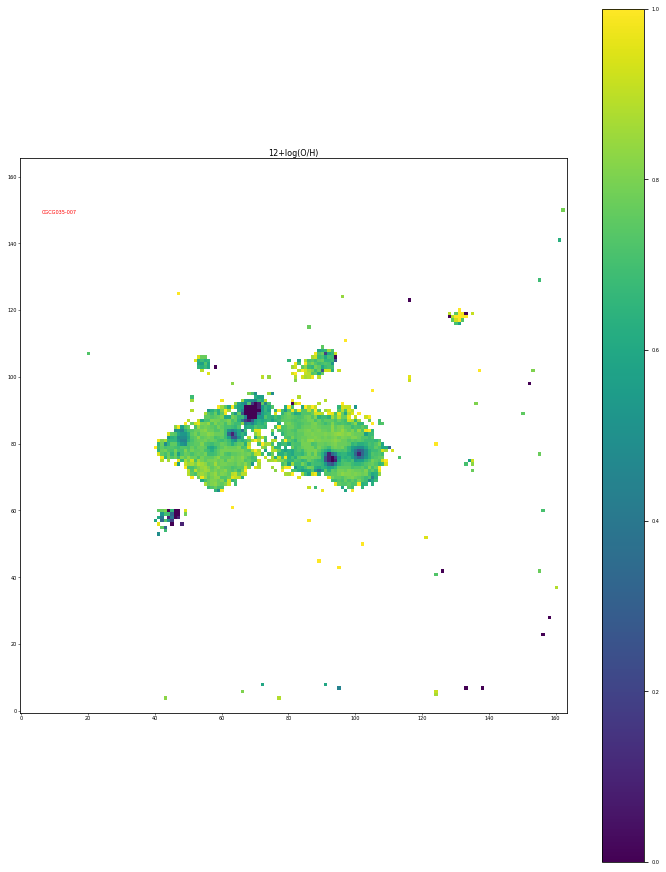

In [70]:
transform = AsinhStretch() + PercentileInterval(95)
fig, ax   = plt.subplots(1, 1,figsize=(12.27, 15.69))
matplotlib.rc('xtick',labelsize=5)
matplotlib.rc('ytick',labelsize=5)
plt.rcParams["xtick.top"] = False
plt.rcParams["ytick.right"] = False
plt.rcParams["xtick.minor.visible"] = False
plt.rcParams["ytick.minor.visible"] = False
mpl.rcParams['axes.linewidth'] =0.8
plt.rcParams["xtick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
#fig.subplots_adjust(wspace=0.2, hspace=0.6)
im=ax.imshow(transform(Z), origin='lower')
plt.colorbar(im)

ax.tick_params(which='major',length=1.7,width=0.5 )
ax.tick_params(pad=1.3)

ax.set_title('12+log(O/H)',pad=1.5,fontsize=8)
ax.text(0.04,0.9,(objname),transform=ax.transAxes,fontdict={'size': '5', 'color': 'red'})


### creating input.dat

In [72]:
for id_obj in np.arange(len(objname_all)):
    objname = objname_all[id_obj]

    print(objname)

    ###loading 
    t       = clock()
    res_fit = pickle.load(open("/Volumes/lx/MUSE/dataproducts/"+objname+".result", "rb"))
    dict_stargas = pickle.load(open("/Volumes/lx/MUSE/dataproducts/"+objname+"_stargas.dict", "rb"))

    cz      = np.nanmedian(dict_stargas['v_Hgas'])

    c       = 299792.458  # speed of light in km/s
    z       = cz/c
    
    snr_cut=3

    Hbeta      = dict_stargas['Hbeta_flux']
    Hbeta_err  = dict_stargas['Hbeta_fluxerr']
    Hbeta_snr  = Hbeta/Hbeta_err
    s          = np.isnan(Hbeta_snr)
    Hbeta_snr[s] = 0
    id           = Hbeta_snr < snr_cut
    Hbeta[id]    = np.nan


    OIII4959      = dict_stargas['[OIII]4959_flux']
    OIII4959_err  = dict_stargas['[OIII]4959_fluxerr']
    OIII4959_snr  = OIII4959/OIII4959_err
    s             = np.isnan(OIII4959_snr)
    OIII4959_snr[s] = 0
    id              = OIII4959_snr < snr_cut
    OIII4959[id]    = np.nan

    OIII5007      = dict_stargas['[OIII]5007_flux']
    OIII5007_err  = dict_stargas['[OIII]5007_fluxerr']
    OIII5007_snr  = OIII5007/OIII5007_err
    s             = np.isnan(OIII5007_snr)
    OIII5007_snr[s] = 0
    id              = OIII5007_snr < snr_cut
    OIII5007[id]    = np.nan

    NII6583      = dict_stargas['[NII]6583_flux']
    NII6583_err  = dict_stargas['[NII]6583_fluxerr']
    NII6583_snr  = NII6583/NII6583_err
    s              = np.isnan(NII6583_snr)
    NII6583_snr[s] = 0
    id             = NII6583_snr < snr_cut
    NII6583[id]    = np.nan

    SII6716      = dict_stargas['[SII]6716_flux']
    SII6716_err = dict_stargas['[SII]6716_fluxerr']
    SII6716_snr = SII6716/SII6716_err
    s              = np.isnan(SII6716_snr)
    SII6716_snr[s] = 0
    id             = SII6716_snr < snr_cut
    SII6716[id]    = 0

    SII6731     = dict_stargas['[SII]6731_flux']
    SII6731_err = dict_stargas['[SII]6731_fluxerr']
    SII6731_snr = SII6731/SII6731_err
    s              = np.isnan(SII6731_snr)
    SII6731_snr[s] = 0
    id             = SII6731_snr < snr_cut
    SII6731[id]    = 0

    OIII_4959 = OIII4959/Hbeta
    OIII_5007 = OIII5007/Hbeta
    NII_6584  = NII6583/Hbeta
    SII_6725  = (SII6716+SII6731)/Hbeta

    eOIII_4959= np.sqrt((OIII4959_err/Hbeta)**2+(OIII4959*Hbeta_err/(Hbeta)**2)**2)
    eOIII_5007= np.sqrt((OIII5007_err/Hbeta)**2+(OIII5007*Hbeta_err/(Hbeta)**2)**2)
    eNII_6584 = np.sqrt((NII6583_err/Hbeta)**2+(NII6583*Hbeta_err/(Hbeta)**2)**2)
    eSII_6725 = np.sqrt((SII6716_err/Hbeta)**2+(SII6731_err/Hbeta)**2+((SII6716+SII6731)*Hbeta_err/(Hbeta)**2)**2)
    
    
    s = np.isnan(OIII_4959)
    OIII_4959[s]  = 0

    s = np.isnan(eOIII_4959)
    eOIII_4959[s] = 0

    s = np.isnan(OIII_5007)
    OIII_5007[s]  = 0

    s = np.isnan(eOIII_5007)
    eOIII_5007[s] = 0

    s = np.isnan(NII_6584)
    NII_6584[s]  = 0

    s = np.isnan(eNII_6584)
    eNII_6584[s] = 0

    s = np.isnan(SII_6725)
    SII_6725[s]  = 0

    s = np.isnan(eSII_6725)
    eSII_6725[s] = 0

    s = np.isinf(OIII_4959)
    OIII_4959[s]  = 0

    s = np.isinf(eOIII_4959)
    eOIII_4959[s] = 0

    s = np.isinf(OIII_5007)
    OIII_5007[s]  = 0

    s = np.isinf(eOIII_5007)
    eOIII_5007[s] = 0

    s = np.isinf(NII_6584)
    NII_6584[s]  = 0

    s = np.isinf(eNII_6584)
    eNII_6584[s] = 0

    s = np.isinf(SII_6725)
    SII_6725[s]  = 0

    s = np.isinf(eSII_6725)
    eSII_6725[s] = 0

    OIII_4959 = OIII_4959.flatten()
    OIII_5007 = OIII_5007.flatten()
    NII_6584  = NII_6584.flatten()
    SII_6725  = SII_6725.flatten()

    eOIII_4959 = eOIII_4959.flatten()
    eOIII_5007 = eOIII_5007.flatten()
    eNII_6584  = eNII_6584.flatten()
    eSII_6725  = eSII_6725.flatten()

    OII_3727    = np.zeros((len(OIII_4959)))
    eOII_3727   = np.zeros((len(OIII_4959)))
    NeIII_3868  = np.zeros((len(OIII_4959)))
    eNeIII_3868 = np.zeros((len(OIII_4959)))
    OIII_4363   = np.zeros((len(OIII_4959)))
    eOIII_4363  = np.zeros((len(OIII_4959)))

    input_emit = Table({'OII_3727':OII_3727,'eOII_3727':eOII_3727,'NeIII_3868':NeIII_3868,
                        'eNeIII_3868':eNeIII_3868,'OIII_4363':OIII_4363,'eOIII_4363':eOIII_4363,
                        'OIII_4959':OIII_4959,'eOIII_4959':eOIII_4959,'OIII_5007':OIII_5007,
                        'eOIII_5007':eOIII_5007,'NII_6584':NII_6584,'eNII_6584':eNII_6584,
                        'SII_6725':SII_6725,'eSII_6725':eSII_6725})
    
    ascii.write(input_emit,"/Volumes/lx/MUSE/HCm_v5.1/"+objname+"_input.dat",overwrite=True)

CGCG035-007
ESO115-G021
ESO245-G005
ESO294-G010
ESO321-G014
ESO444-G084
IC1574
KKH086
NGC1311
NGC1522
NGC1800
UGC00695
UGC02716
UGC05288
UGC05373
UGCA193
UGCA320
WLM


In [1]:
%run HCm_v5.1.py WLM_input.dat

 ---------------------------------------------------------------------
This is HII-CHI-mistry v. 5.1
 See Perez-Montero, E. (2014) for details
 Insert the name of your input text file with all or some of the following columns:
 3727 [OII], 3868 [NeIII], 4363 [OIII], 5007 [OIII], 6584 [NII], 6725 [SII]
with their corresponding labels and errors in adjacent columns
---------------------------------------------------------------------
The input file is:WLM_input.dat

The number of iterations for MonteCarlo simulation is:  25


No interpolation for the POPSTAR models is going to be used.
The grid has a resolution of 0.1dex for O/H and 0.125dex for N/O

Reading grids ....


----------------------------------------------------------------
(%)   ID    Grid  12+log(O/H)  log(N/O)    log(U)
-----------------------------------------------------------------
0.0 % 1 3  0.0 0.0  -10 0  0.0 0.0
0.0 % 2 3  0.0 0.0  -10 0  0.0 0.0
0.0 % 3 3  0.0 0.0  -10 0  0.0 0.0
0.0 % 4 3  0.0 0.0  -10 0  0.0 0.0
0

1.1 % 278 3  0.0 0.0  -10 0  0.0 0.0
1.1 % 279 3  0.0 0.0  -10 0  0.0 0.0
1.1 % 280 3  0.0 0.0  -10 0  0.0 0.0
1.1 % 281 3  0.0 0.0  -10 0  0.0 0.0
1.1 % 282 3  0.0 0.0  -10 0  0.0 0.0
1.1 % 283 3  0.0 0.0  -10 0  0.0 0.0
1.1 % 284 3  0.0 0.0  -10 0  0.0 0.0
1.1 % 285 3  0.0 0.0  -10 0  0.0 0.0
1.1 % 286 3  0.0 0.0  -10 0  0.0 0.0
1.1 % 287 3  0.0 0.0  -10 0  0.0 0.0
1.1 % 288 3  0.0 0.0  -10 0  0.0 0.0
1.1 % 289 3  0.0 0.0  -10 0  0.0 0.0
1.1 % 290 3  0.0 0.0  -10 0  0.0 0.0
1.1 % 291 3  0.0 0.0  -10 0  0.0 0.0
1.1 % 292 3  0.0 0.0  -10 0  0.0 0.0
1.1 % 293 3  0.0 0.0  -10 0  0.0 0.0
1.1 % 294 3  0.0 0.0  -10 0  0.0 0.0
1.1 % 295 3  0.0 0.0  -10 0  0.0 0.0
1.1 % 296 3  0.0 0.0  -10 0  0.0 0.0
1.1 % 297 3  0.0 0.0  -10 0  0.0 0.0
1.1 % 298 3  0.0 0.0  -10 0  0.0 0.0
1.1 % 299 3  0.0 0.0  -10 0  0.0 0.0
1.1 % 300 3  0.0 0.0  -10 0  0.0 0.0
1.1 % 301 3  0.0 0.0  -10 0  0.0 0.0
1.1 % 302 3  0.0 0.0  -10 0  0.0 0.0
1.1 % 303 3  0.0 0.0  -10 0  0.0 0.0
1.2 % 304 3  0.0 0.0  -10 0  0.0 0.0
1

2.2 % 585 3  0.0 0.0  -10 0  0.0 0.0
2.2 % 586 3  0.0 0.0  -10 0  0.0 0.0
2.2 % 587 3  0.0 0.0  -10 0  0.0 0.0
2.2 % 588 3  0.0 0.0  -10 0  0.0 0.0
2.2 % 589 3  0.0 0.0  -10 0  0.0 0.0
2.2 % 590 3  0.0 0.0  -10 0  0.0 0.0
2.2 % 591 3  0.0 0.0  -10 0  0.0 0.0
2.2 % 592 3  0.0 0.0  -10 0  0.0 0.0
2.2 % 593 3  0.0 0.0  -10 0  0.0 0.0
2.2 % 594 3  0.0 0.0  -10 0  0.0 0.0
2.3 % 595 3  0.0 0.0  -10 0  0.0 0.0
2.3 % 596 3  0.0 0.0  -10 0  0.0 0.0
2.3 % 597 3  0.0 0.0  -10 0  0.0 0.0
2.3 % 598 3  0.0 0.0  -10 0  0.0 0.0
2.3 % 599 3  0.0 0.0  -10 0  0.0 0.0
2.3 % 600 3  0.0 0.0  -10 0  0.0 0.0
2.3 % 601 3  0.0 0.0  -10 0  0.0 0.0
2.3 % 602 3  0.0 0.0  -10 0  0.0 0.0
2.3 % 603 3  0.0 0.0  -10 0  0.0 0.0
2.3 % 604 3  0.0 0.0  -10 0  0.0 0.0
2.3 % 605 3  0.0 0.0  -10 0  0.0 0.0
2.3 % 606 3  0.0 0.0  -10 0  0.0 0.0
2.3 % 607 3  0.0 0.0  -10 0  0.0 0.0
2.3 % 608 3  0.0 0.0  -10 0  0.0 0.0
2.3 % 609 3  0.0 0.0  -10 0  0.0 0.0
2.3 % 610 3  0.0 0.0  -10 0  0.0 0.0
2.3 % 611 3  0.0 0.0  -10 0  0.0 0.0
2

3.1 % 824 2  8.41 0.13  -1.02 0.26  -2.94 0.01
3.1 % 825 3  0.0 0.0  -10 0  0.0 0.0
3.1 % 826 3  0.0 0.0  -10 0  0.0 0.0
3.1 % 827 3  0.0 0.0  -10 0  0.0 0.0
3.1 % 828 3  0.0 0.0  -10 0  0.0 0.0
3.1 % 829 3  0.0 0.0  -10 0  0.0 0.0
3.1 % 830 3  0.0 0.0  -10 0  0.0 0.0
3.1 % 831 3  0.0 0.0  -10 0  0.0 0.0
3.2 % 832 3  0.0 0.0  -10 0  0.0 0.0
3.2 % 833 3  0.0 0.0  -10 0  0.0 0.0
3.2 % 834 3  0.0 0.0  -10 0  0.0 0.0
3.2 % 835 3  0.0 0.0  -10 0  0.0 0.0
3.2 % 836 3  0.0 0.0  -10 0  0.0 0.0
3.2 % 837 3  0.0 0.0  -10 0  0.0 0.0
3.2 % 838 3  0.0 0.0  -10 0  0.0 0.0
3.2 % 839 3  0.0 0.0  -10 0  0.0 0.0
3.2 % 840 3  0.0 0.0  -10 0  0.0 0.0
3.2 % 841 3  0.0 0.0  -10 0  0.0 0.0
3.2 % 842 3  0.0 0.0  -10 0  0.0 0.0
3.2 % 843 3  0.0 0.0  -10 0  0.0 0.0
3.2 % 844 3  0.0 0.0  -10 0  0.0 0.0
3.2 % 845 3  0.0 0.0  -10 0  0.0 0.0
3.2 % 846 3  8.58 0.15  -10 0  -3.07 0.16
3.2 % 847 3  0.0 0.0  -10 0  0.0 0.0
3.2 % 848 3  0.0 0.0  -10 0  0.0 0.0
3.2 % 849 3  0.0 0.0  -10 0  0.0 0.0
3.2 % 850 3  0.0 0.0  -

4.0 % 1068 2  8.42 0.1  -0.81 0.31  -2.97 0.06
4.0 % 1069 3  0.0 0.0  -10 0  0.0 0.0
4.1 % 1070 3  0.0 0.0  -10 0  0.0 0.0
4.1 % 1071 3  0.0 0.0  -10 0  0.0 0.0
4.1 % 1072 3  0.0 0.0  -10 0  0.0 0.0
4.1 % 1073 3  0.0 0.0  -10 0  0.0 0.0
4.1 % 1074 3  0.0 0.0  -10 0  0.0 0.0
4.1 % 1075 3  0.0 0.0  -10 0  0.0 0.0
4.1 % 1076 3  8.36 0.28  -10 0  -2.91 0.22
4.1 % 1077 3  8.53 0.13  -10 0  -2.97 0.11
4.1 % 1078 3  0.0 0.0  -10 0  0.0 0.0
4.1 % 1079 3  0.0 0.0  -10 0  0.0 0.0
4.1 % 1080 3  0.0 0.0  -10 0  0.0 0.0
4.1 % 1081 3  0.0 0.0  -10 0  0.0 0.0
4.1 % 1082 3  0.0 0.0  -10 0  0.0 0.0
4.1 % 1083 3  0.0 0.0  -10 0  0.0 0.0
4.1 % 1084 3  0.0 0.0  -10 0  0.0 0.0
4.1 % 1085 3  0.0 0.0  -10 0  0.0 0.0
4.1 % 1086 3  0.0 0.0  -10 0  0.0 0.0
4.1 % 1087 3  0.0 0.0  -10 0  0.0 0.0
4.1 % 1088 3  0.0 0.0  -10 0  0.0 0.0
4.1 % 1089 3  0.0 0.0  -10 0  0.0 0.0
4.1 % 1090 3  0.0 0.0  -10 0  0.0 0.0
4.1 % 1091 3  0.0 0.0  -10 0  0.0 0.0
4.1 % 1092 3  0.0 0.0  -10 0  0.0 0.0
4.1 % 1093 3  0.0 0.0  -10 0  0

5.2 % 1360 3  8.55 0.07  -10 0  -3.03 0.08
5.2 % 1361 3  0.0 0.0  -10 0  0.0 0.0
5.2 % 1362 3  0.0 0.0  -10 0  0.0 0.0
5.2 % 1363 3  0.0 0.0  -10 0  0.0 0.0
5.2 % 1364 3  0.0 0.0  -10 0  0.0 0.0
5.2 % 1365 3  0.0 0.0  -10 0  0.0 0.0
5.2 % 1366 3  0.0 0.0  -10 0  0.0 0.0
5.2 % 1367 3  0.0 0.0  -10 0  0.0 0.0
5.2 % 1368 3  0.0 0.0  -10 0  0.0 0.0
5.2 % 1369 3  0.0 0.0  -10 0  0.0 0.0
5.2 % 1370 3  0.0 0.0  -10 0  0.0 0.0
5.2 % 1371 3  0.0 0.0  -10 0  0.0 0.0
5.2 % 1372 3  0.0 0.0  -10 0  0.0 0.0
5.2 % 1373 3  0.0 0.0  -10 0  0.0 0.0
5.2 % 1374 3  0.0 0.0  -10 0  0.0 0.0
5.2 % 1375 2  8.3 0.38  -0.64 0.29  -2.89 0.36
5.2 % 1376 3  0.0 0.0  -10 0  0.0 0.0
5.2 % 1377 3  0.0 0.0  -10 0  0.0 0.0
5.2 % 1378 3  0.0 0.0  -10 0  0.0 0.0
5.2 % 1379 3  0.0 0.0  -10 0  0.0 0.0
5.2 % 1380 3  0.0 0.0  -10 0  0.0 0.0
5.2 % 1381 3  0.0 0.0  -10 0  0.0 0.0
5.2 % 1382 3  0.0 0.0  -10 0  0.0 0.0
5.2 % 1383 3  0.0 0.0  -10 0  0.0 0.0
5.2 % 1384 3  0.0 0.0  -10 0  0.0 0.0
5.2 % 1385 3  0.0 0.0  -10 0  0.0 0.

6.1 % 1607 3  8.58 0.07  -10 0  -3.04 0.06
6.1 % 1608 3  0.0 0.0  -10 0  0.0 0.0
6.1 % 1609 3  0.0 0.0  -10 0  0.0 0.0
6.1 % 1610 3  0.0 0.0  -10 0  0.0 0.0
6.1 % 1611 3  0.0 0.0  -10 0  0.0 0.0
6.1 % 1612 3  0.0 0.0  -10 0  0.0 0.0
6.1 % 1613 3  0.0 0.0  -10 0  0.0 0.0
6.1 % 1614 3  0.0 0.0  -10 0  0.0 0.0
6.1 % 1615 3  0.0 0.0  -10 0  0.0 0.0
6.1 % 1616 3  0.0 0.0  -10 0  0.0 0.0
6.1 % 1617 3  0.0 0.0  -10 0  0.0 0.0
6.1 % 1618 3  0.0 0.0  -10 0  0.0 0.0
6.1 % 1619 3  0.0 0.0  -10 0  0.0 0.0
6.1 % 1620 3  0.0 0.0  -10 0  0.0 0.0
6.1 % 1621 3  0.0 0.0  -10 0  0.0 0.0
6.1 % 1622 3  0.0 0.0  -10 0  0.0 0.0
6.1 % 1623 3  0.0 0.0  -10 0  0.0 0.0
6.2 % 1624 3  0.0 0.0  -10 0  0.0 0.0
6.2 % 1625 3  0.0 0.0  -10 0  0.0 0.0
6.2 % 1626 3  0.0 0.0  -10 0  0.0 0.0
6.2 % 1627 3  0.0 0.0  -10 0  0.0 0.0
6.2 % 1628 3  0.0 0.0  -10 0  0.0 0.0
6.2 % 1629 3  0.0 0.0  -10 0  0.0 0.0
6.2 % 1630 3  0.0 0.0  -10 0  0.0 0.0
6.2 % 1631 3  0.0 0.0  -10 0  0.0 0.0
6.2 % 1632 3  0.0 0.0  -10 0  0.0 0.0
6.2 % 1

7.0 % 1847 3  8.67 0.06  -10 0  -3.15 0.14
7.0 % 1848 3  0.0 0.0  -10 0  0.0 0.0
7.0 % 1849 3  0.0 0.0  -10 0  0.0 0.0
7.0 % 1850 3  0.0 0.0  -10 0  0.0 0.0
7.0 % 1851 3  0.0 0.0  -10 0  0.0 0.0
7.0 % 1852 3  0.0 0.0  -10 0  0.0 0.0
7.0 % 1853 3  0.0 0.0  -10 0  0.0 0.0
7.0 % 1854 3  0.0 0.0  -10 0  0.0 0.0
7.0 % 1855 3  0.0 0.0  -10 0  0.0 0.0
7.0 % 1856 3  0.0 0.0  -10 0  0.0 0.0
7.0 % 1857 3  8.61 0.14  -10 0  -3.11 0.12
7.0 % 1858 3  8.52 0.14  -10 0  -2.96 0.1
7.0 % 1859 3  0.0 0.0  -10 0  0.0 0.0
7.0 % 1860 3  0.0 0.0  -10 0  0.0 0.0
7.0 % 1861 3  8.59 0.15  -10 0  -3.07 0.12
7.1 % 1862 3  0.0 0.0  -10 0  0.0 0.0
7.1 % 1863 3  0.0 0.0  -10 0  0.0 0.0
7.1 % 1864 3  0.0 0.0  -10 0  0.0 0.0
7.1 % 1865 3  0.0 0.0  -10 0  0.0 0.0
7.1 % 1866 3  0.0 0.0  -10 0  0.0 0.0
7.1 % 1867 3  0.0 0.0  -10 0  0.0 0.0
7.1 % 1868 3  0.0 0.0  -10 0  0.0 0.0
7.1 % 1869 3  0.0 0.0  -10 0  0.0 0.0
7.1 % 1870 3  0.0 0.0  -10 0  0.0 0.0
7.1 % 1871 3  0.0 0.0  -10 0  0.0 0.0
7.1 % 1872 3  0.0 0.0  -10 0  0

7.9 % 2084 3  8.62 0.13  -10 0  -3.14 0.13
7.9 % 2085 3  0.0 0.0  -10 0  0.0 0.0
7.9 % 2086 3  0.0 0.0  -10 0  0.0 0.0
7.9 % 2087 3  0.0 0.0  -10 0  0.0 0.0
7.9 % 2088 3  0.0 0.0  -10 0  0.0 0.0
7.9 % 2089 3  0.0 0.0  -10 0  0.0 0.0
7.9 % 2090 3  0.0 0.0  -10 0  0.0 0.0
7.9 % 2091 3  0.0 0.0  -10 0  0.0 0.0
7.9 % 2092 3  0.0 0.0  -10 0  0.0 0.0
7.9 % 2093 3  0.0 0.0  -10 0  0.0 0.0
7.9 % 2094 3  0.0 0.0  -10 0  0.0 0.0
7.9 % 2095 3  0.0 0.0  -10 0  0.0 0.0
7.9 % 2096 3  0.0 0.0  -10 0  0.0 0.0
7.9 % 2097 3  0.0 0.0  -10 0  0.0 0.0
7.9 % 2098 3  0.0 0.0  -10 0  0.0 0.0
7.9 % 2099 3  0.0 0.0  -10 0  0.0 0.0
8.0 % 2100 3  0.0 0.0  -10 0  0.0 0.0
8.0 % 2101 3  0.0 0.0  -10 0  0.0 0.0
8.0 % 2102 3  0.0 0.0  -10 0  0.0 0.0
8.0 % 2103 3  0.0 0.0  -10 0  0.0 0.0
8.0 % 2104 3  0.0 0.0  -10 0  0.0 0.0
8.0 % 2105 3  0.0 0.0  -10 0  0.0 0.0
8.0 % 2106 3  0.0 0.0  -10 0  0.0 0.0
8.0 % 2107 3  0.0 0.0  -10 0  0.0 0.0
8.0 % 2108 3  0.0 0.0  -10 0  0.0 0.0
8.0 % 2109 3  0.0 0.0  -10 0  0.0 0.0
8.0 % 2

8.9 % 2341 2  8.4 0.26  -0.79 0.29  -2.98 0.27
8.9 % 2342 3  0.0 0.0  -10 0  0.0 0.0
8.9 % 2343 3  0.0 0.0  -10 0  0.0 0.0
8.9 % 2344 3  0.0 0.0  -10 0  0.0 0.0
8.9 % 2345 3  0.0 0.0  -10 0  0.0 0.0
8.9 % 2346 3  0.0 0.0  -10 0  0.0 0.0
8.9 % 2347 3  0.0 0.0  -10 0  0.0 0.0
8.9 % 2348 3  0.0 0.0  -10 0  0.0 0.0
8.9 % 2349 3  0.0 0.0  -10 0  0.0 0.0
8.9 % 2350 3  0.0 0.0  -10 0  0.0 0.0
8.9 % 2351 3  0.0 0.0  -10 0  0.0 0.0
8.9 % 2352 3  0.0 0.0  -10 0  0.0 0.0
8.9 % 2353 3  0.0 0.0  -10 0  0.0 0.0
8.9 % 2354 3  0.0 0.0  -10 0  0.0 0.0
8.9 % 2355 3  0.0 0.0  -10 0  0.0 0.0
8.9 % 2356 3  0.0 0.0  -10 0  0.0 0.0
8.9 % 2357 3  0.0 0.0  -10 0  0.0 0.0
8.9 % 2358 3  0.0 0.0  -10 0  0.0 0.0
8.9 % 2359 3  0.0 0.0  -10 0  0.0 0.0
8.9 % 2360 3  0.0 0.0  -10 0  0.0 0.0
8.9 % 2361 3  0.0 0.0  -10 0  0.0 0.0
8.9 % 2362 3  0.0 0.0  -10 0  0.0 0.0
8.9 % 2363 3  0.0 0.0  -10 0  0.0 0.0
9.0 % 2364 3  0.0 0.0  -10 0  0.0 0.0
9.0 % 2365 3  0.0 0.0  -10 0  0.0 0.0
9.0 % 2366 3  0.0 0.0  -10 0  0.0 0.0
9.0

9.7 % 2564 2  8.38 0.18  -1.18 0.26  -2.91 0.11
9.7 % 2565 3  0.0 0.0  -10 0  0.0 0.0
9.7 % 2566 3  0.0 0.0  -10 0  0.0 0.0
9.7 % 2567 3  0.0 0.0  -10 0  0.0 0.0
9.7 % 2568 3  0.0 0.0  -10 0  0.0 0.0
9.7 % 2569 3  0.0 0.0  -10 0  0.0 0.0
9.7 % 2570 3  0.0 0.0  -10 0  0.0 0.0
9.7 % 2571 3  0.0 0.0  -10 0  0.0 0.0
9.7 % 2572 3  0.0 0.0  -10 0  0.0 0.0
9.7 % 2573 3  0.0 0.0  -10 0  0.0 0.0
9.7 % 2574 3  0.0 0.0  -10 0  0.0 0.0
9.8 % 2575 3  0.0 0.0  -10 0  0.0 0.0
9.8 % 2576 3  0.0 0.0  -10 0  0.0 0.0
9.8 % 2577 3  0.0 0.0  -10 0  0.0 0.0
9.8 % 2578 3  0.0 0.0  -10 0  0.0 0.0
9.8 % 2579 3  0.0 0.0  -10 0  0.0 0.0
9.8 % 2580 3  0.0 0.0  -10 0  0.0 0.0
9.8 % 2581 2  8.48 0.2  -1.02 0.25  -3.02 0.17
9.8 % 2582 3  0.0 0.0  -10 0  0.0 0.0
9.8 % 2583 3  0.0 0.0  -10 0  0.0 0.0
9.8 % 2584 3  0.0 0.0  -10 0  0.0 0.0
9.8 % 2585 3  0.0 0.0  -10 0  0.0 0.0
9.8 % 2586 3  0.0 0.0  -10 0  0.0 0.0
9.8 % 2587 3  0.0 0.0  -10 0  0.0 0.0
9.8 % 2588 3  0.0 0.0  -10 0  0.0 0.0
9.8 % 2589 3  0.0 0.0  -10 0  0

10.9 % 2885 3  0.0 0.0  -10 0  0.0 0.0
10.9 % 2886 3  0.0 0.0  -10 0  0.0 0.0
10.9 % 2887 3  0.0 0.0  -10 0  0.0 0.0
10.9 % 2888 3  0.0 0.0  -10 0  0.0 0.0
10.9 % 2889 3  0.0 0.0  -10 0  0.0 0.0
10.9 % 2890 3  0.0 0.0  -10 0  0.0 0.0
10.9 % 2891 3  0.0 0.0  -10 0  0.0 0.0
11.0 % 2892 3  0.0 0.0  -10 0  0.0 0.0
11.0 % 2893 3  0.0 0.0  -10 0  0.0 0.0
11.0 % 2894 3  0.0 0.0  -10 0  0.0 0.0
11.0 % 2895 3  0.0 0.0  -10 0  0.0 0.0
11.0 % 2896 3  0.0 0.0  -10 0  0.0 0.0
11.0 % 2897 3  0.0 0.0  -10 0  0.0 0.0
11.0 % 2898 3  0.0 0.0  -10 0  0.0 0.0
11.0 % 2899 3  0.0 0.0  -10 0  0.0 0.0
11.0 % 2900 3  0.0 0.0  -10 0  0.0 0.0
11.0 % 2901 3  0.0 0.0  -10 0  0.0 0.0
11.0 % 2902 3  0.0 0.0  -10 0  0.0 0.0
11.0 % 2903 3  0.0 0.0  -10 0  0.0 0.0
11.0 % 2904 3  0.0 0.0  -10 0  0.0 0.0
11.0 % 2905 3  0.0 0.0  -10 0  0.0 0.0
11.0 % 2906 3  0.0 0.0  -10 0  0.0 0.0
11.0 % 2907 3  0.0 0.0  -10 0  0.0 0.0
11.0 % 2908 3  0.0 0.0  -10 0  0.0 0.0
11.0 % 2909 3  0.0 0.0  -10 0  0.0 0.0
11.0 % 2910 3  0.0 0.0  -

11.8 % 3118 2  8.47 0.21  -0.88 0.28  -3.01 0.22
11.8 % 3119 3  0.0 0.0  -10 0  0.0 0.0
11.8 % 3120 3  0.0 0.0  -10 0  0.0 0.0
11.8 % 3121 3  0.0 0.0  -10 0  0.0 0.0
11.8 % 3122 3  0.0 0.0  -10 0  0.0 0.0
11.8 % 3123 3  0.0 0.0  -10 0  0.0 0.0
11.8 % 3124 3  0.0 0.0  -10 0  0.0 0.0
11.8 % 3125 3  0.0 0.0  -10 0  0.0 0.0
11.8 % 3126 3  0.0 0.0  -10 0  0.0 0.0
11.8 % 3127 3  0.0 0.0  -10 0  0.0 0.0
11.8 % 3128 3  0.0 0.0  -10 0  0.0 0.0
11.8 % 3129 3  0.0 0.0  -10 0  0.0 0.0
11.9 % 3130 3  0.0 0.0  -10 0  0.0 0.0
11.9 % 3131 3  0.0 0.0  -10 0  0.0 0.0
11.9 % 3132 3  0.0 0.0  -10 0  0.0 0.0
11.9 % 3133 3  8.38 0.34  -10 0  -2.89 0.29
11.9 % 3134 3  0.0 0.0  -10 0  0.0 0.0
11.9 % 3135 3  0.0 0.0  -10 0  0.0 0.0
11.9 % 3136 3  0.0 0.0  -10 0  0.0 0.0
11.9 % 3137 3  0.0 0.0  -10 0  0.0 0.0
11.9 % 3138 3  0.0 0.0  -10 0  0.0 0.0
11.9 % 3139 3  0.0 0.0  -10 0  0.0 0.0
11.9 % 3140 3  0.0 0.0  -10 0  0.0 0.0
11.9 % 3141 3  0.0 0.0  -10 0  0.0 0.0
11.9 % 3142 3  0.0 0.0  -10 0  0.0 0.0
11.9 % 314

12.7 % 3348 2  8.54 0.1  -1.28 0.27  -3.1 0.12
12.7 % 3349 3  0.0 0.0  -10 0  0.0 0.0
12.7 % 3350 3  0.0 0.0  -10 0  0.0 0.0
12.7 % 3351 3  0.0 0.0  -10 0  0.0 0.0
12.7 % 3352 3  0.0 0.0  -10 0  0.0 0.0
12.7 % 3353 3  0.0 0.0  -10 0  0.0 0.0
12.7 % 3354 3  0.0 0.0  -10 0  0.0 0.0
12.7 % 3355 3  0.0 0.0  -10 0  0.0 0.0
12.7 % 3356 3  0.0 0.0  -10 0  0.0 0.0
12.7 % 3357 3  0.0 0.0  -10 0  0.0 0.0
12.7 % 3358 3  0.0 0.0  -10 0  0.0 0.0
12.7 % 3359 3  0.0 0.0  -10 0  0.0 0.0
12.7 % 3360 3  0.0 0.0  -10 0  0.0 0.0
12.7 % 3361 3  0.0 0.0  -10 0  0.0 0.0
12.7 % 3362 3  0.0 0.0  -10 0  0.0 0.0
12.7 % 3363 3  0.0 0.0  -10 0  0.0 0.0
12.7 % 3364 3  0.0 0.0  -10 0  0.0 0.0
12.7 % 3365 3  0.0 0.0  -10 0  0.0 0.0
12.7 % 3366 3  0.0 0.0  -10 0  0.0 0.0
12.8 % 3367 3  0.0 0.0  -10 0  0.0 0.0
12.8 % 3368 3  0.0 0.0  -10 0  0.0 0.0
12.8 % 3369 3  0.0 0.0  -10 0  0.0 0.0
12.8 % 3370 3  0.0 0.0  -10 0  0.0 0.0
12.8 % 3371 3  0.0 0.0  -10 0  0.0 0.0
12.8 % 3372 2  8.37 0.32  -0.77 0.18  -2.83 0.27
12.8 % 

13.6 % 3582 3  8.46 0.15  -10 0  -2.98 0.11
13.6 % 3583 2  8.42 0.15  -0.81 0.31  -2.93 0.1
13.6 % 3584 3  0.0 0.0  -10 0  0.0 0.0
13.6 % 3585 3  0.0 0.0  -10 0  0.0 0.0
13.6 % 3586 3  0.0 0.0  -10 0  0.0 0.0
13.6 % 3587 3  0.0 0.0  -10 0  0.0 0.0
13.6 % 3588 3  0.0 0.0  -10 0  0.0 0.0
13.6 % 3589 3  0.0 0.0  -10 0  0.0 0.0
13.6 % 3590 3  0.0 0.0  -10 0  0.0 0.0
13.6 % 3591 3  0.0 0.0  -10 0  0.0 0.0
13.6 % 3592 3  0.0 0.0  -10 0  0.0 0.0
13.6 % 3593 3  0.0 0.0  -10 0  0.0 0.0
13.6 % 3594 3  0.0 0.0  -10 0  0.0 0.0
13.6 % 3595 3  0.0 0.0  -10 0  0.0 0.0
13.6 % 3596 3  0.0 0.0  -10 0  0.0 0.0
13.6 % 3597 3  0.0 0.0  -10 0  0.0 0.0
13.6 % 3598 3  0.0 0.0  -10 0  0.0 0.0
13.6 % 3599 3  0.0 0.0  -10 0  0.0 0.0
13.6 % 3600 3  0.0 0.0  -10 0  0.0 0.0
13.6 % 3601 3  0.0 0.0  -10 0  0.0 0.0
13.6 % 3602 3  0.0 0.0  -10 0  0.0 0.0
13.6 % 3603 3  0.0 0.0  -10 0  0.0 0.0
13.6 % 3604 3  0.0 0.0  -10 0  0.0 0.0
13.7 % 3605 3  0.0 0.0  -10 0  0.0 0.0
13.7 % 3606 3  0.0 0.0  -10 0  0.0 0.0
13.7 % 3607

14.5 % 3835 3  0.0 0.0  -10 0  0.0 0.0
14.5 % 3836 3  0.0 0.0  -10 0  0.0 0.0
14.5 % 3837 3  0.0 0.0  -10 0  0.0 0.0
14.5 % 3838 3  0.0 0.0  -10 0  0.0 0.0
14.5 % 3839 3  0.0 0.0  -10 0  0.0 0.0
14.5 % 3840 3  0.0 0.0  -10 0  0.0 0.0
14.5 % 3841 3  0.0 0.0  -10 0  0.0 0.0
14.5 % 3842 3  0.0 0.0  -10 0  0.0 0.0
14.6 % 3843 3  0.0 0.0  -10 0  0.0 0.0
14.6 % 3844 3  0.0 0.0  -10 0  0.0 0.0
14.6 % 3845 3  0.0 0.0  -10 0  0.0 0.0
14.6 % 3846 3  0.0 0.0  -10 0  0.0 0.0
14.6 % 3847 3  0.0 0.0  -10 0  0.0 0.0
14.6 % 3848 3  0.0 0.0  -10 0  0.0 0.0
14.6 % 3849 3  0.0 0.0  -10 0  0.0 0.0
14.6 % 3850 3  0.0 0.0  -10 0  0.0 0.0
14.6 % 3851 3  0.0 0.0  -10 0  0.0 0.0
14.6 % 3852 3  0.0 0.0  -10 0  0.0 0.0
14.6 % 3853 3  0.0 0.0  -10 0  0.0 0.0
14.6 % 3854 3  0.0 0.0  -10 0  0.0 0.0
14.6 % 3855 3  0.0 0.0  -10 0  0.0 0.0
14.6 % 3856 3  0.0 0.0  -10 0  0.0 0.0
14.6 % 3857 3  8.61 0.14  -10 0  -3.14 0.14
14.6 % 3858 3  0.0 0.0  -10 0  0.0 0.0
14.6 % 3859 3  0.0 0.0  -10 0  0.0 0.0
14.6 % 3860 3  0.0 0

15.5 % 4094 3  0.0 0.0  -10 0  0.0 0.0
15.5 % 4095 3  0.0 0.0  -10 0  0.0 0.0
15.5 % 4096 3  0.0 0.0  -10 0  0.0 0.0
15.5 % 4097 3  0.0 0.0  -10 0  0.0 0.0
15.5 % 4098 3  0.0 0.0  -10 0  0.0 0.0
15.5 % 4099 3  0.0 0.0  -10 0  0.0 0.0
15.5 % 4100 3  0.0 0.0  -10 0  0.0 0.0
15.5 % 4101 3  0.0 0.0  -10 0  0.0 0.0
15.5 % 4102 3  0.0 0.0  -10 0  0.0 0.0
15.5 % 4103 3  0.0 0.0  -10 0  0.0 0.0
15.5 % 4104 3  0.0 0.0  -10 0  0.0 0.0
15.5 % 4105 3  0.0 0.0  -10 0  0.0 0.0
15.5 % 4106 3  0.0 0.0  -10 0  0.0 0.0
15.6 % 4107 3  0.0 0.0  -10 0  0.0 0.0
15.6 % 4108 3  0.0 0.0  -10 0  0.0 0.0
15.6 % 4109 3  0.0 0.0  -10 0  0.0 0.0
15.6 % 4110 3  0.0 0.0  -10 0  0.0 0.0
15.6 % 4111 3  0.0 0.0  -10 0  0.0 0.0
15.6 % 4112 3  0.0 0.0  -10 0  0.0 0.0
15.6 % 4113 3  0.0 0.0  -10 0  0.0 0.0
15.6 % 4114 2  8.48 0.17  -0.9 0.27  -3.07 0.23
15.6 % 4115 3  8.7 0.08  -10 0  -3.18 0.15
15.6 % 4116 3  0.0 0.0  -10 0  0.0 0.0
15.6 % 4117 3  0.0 0.0  -10 0  0.0 0.0
15.6 % 4118 3  0.0 0.0  -10 0  0.0 0.0
15.6 % 4119 

16.3 % 4315 2  8.51 0.15  -1.02 0.22  -2.96 0.22
16.3 % 4316 3  0.0 0.0  -10 0  0.0 0.0
16.3 % 4317 3  0.0 0.0  -10 0  0.0 0.0
16.4 % 4318 3  0.0 0.0  -10 0  0.0 0.0
16.4 % 4319 3  0.0 0.0  -10 0  0.0 0.0
16.4 % 4320 3  0.0 0.0  -10 0  0.0 0.0
16.4 % 4321 3  0.0 0.0  -10 0  0.0 0.0
16.4 % 4322 3  0.0 0.0  -10 0  0.0 0.0
16.4 % 4323 3  0.0 0.0  -10 0  0.0 0.0
16.4 % 4324 3  0.0 0.0  -10 0  0.0 0.0
16.4 % 4325 3  0.0 0.0  -10 0  0.0 0.0
16.4 % 4326 3  0.0 0.0  -10 0  0.0 0.0
16.4 % 4327 3  0.0 0.0  -10 0  0.0 0.0
16.4 % 4328 3  0.0 0.0  -10 0  0.0 0.0
16.4 % 4329 3  0.0 0.0  -10 0  0.0 0.0
16.4 % 4330 3  0.0 0.0  -10 0  0.0 0.0
16.4 % 4331 3  0.0 0.0  -10 0  0.0 0.0
16.4 % 4332 3  0.0 0.0  -10 0  0.0 0.0
16.4 % 4333 3  0.0 0.0  -10 0  0.0 0.0
16.4 % 4334 3  0.0 0.0  -10 0  0.0 0.0
16.4 % 4335 3  0.0 0.0  -10 0  0.0 0.0
16.4 % 4336 3  0.0 0.0  -10 0  0.0 0.0
16.4 % 4337 3  0.0 0.0  -10 0  0.0 0.0
16.4 % 4338 3  0.0 0.0  -10 0  0.0 0.0
16.4 % 4339 3  0.0 0.0  -10 0  0.0 0.0
16.4 % 4340 3  

17.3 % 4557 3  8.55 0.07  -10 0  -3.05 0.07
17.3 % 4558 3  0.0 0.0  -10 0  0.0 0.0
17.3 % 4559 3  0.0 0.0  -10 0  0.0 0.0
17.3 % 4560 3  0.0 0.0  -10 0  0.0 0.0
17.3 % 4561 3  0.0 0.0  -10 0  0.0 0.0
17.3 % 4562 3  0.0 0.0  -10 0  0.0 0.0
17.3 % 4563 3  0.0 0.0  -10 0  0.0 0.0
17.3 % 4564 3  0.0 0.0  -10 0  0.0 0.0
17.3 % 4565 3  0.0 0.0  -10 0  0.0 0.0
17.3 % 4566 3  0.0 0.0  -10 0  0.0 0.0
17.3 % 4567 3  0.0 0.0  -10 0  0.0 0.0
17.3 % 4568 3  0.0 0.0  -10 0  0.0 0.0
17.3 % 4569 3  0.0 0.0  -10 0  0.0 0.0
17.3 % 4570 3  0.0 0.0  -10 0  0.0 0.0
17.3 % 4571 2  8.41 0.19  -0.85 0.3  -2.99 0.21
17.3 % 4572 3  0.0 0.0  -10 0  0.0 0.0
17.3 % 4573 3  0.0 0.0  -10 0  0.0 0.0
17.3 % 4574 3  0.0 0.0  -10 0  0.0 0.0
17.3 % 4575 3  0.0 0.0  -10 0  0.0 0.0
17.3 % 4576 3  0.0 0.0  -10 0  0.0 0.0
17.3 % 4577 3  0.0 0.0  -10 0  0.0 0.0
17.3 % 4578 3  0.0 0.0  -10 0  0.0 0.0
17.3 % 4579 3  0.0 0.0  -10 0  0.0 0.0
17.3 % 4580 3  0.0 0.0  -10 0  0.0 0.0
17.3 % 4581 3  0.0 0.0  -10 0  0.0 0.0
17.4 % 4582

18.1 % 4788 3  0.0 0.0  -10 0  0.0 0.0
18.1 % 4789 3  0.0 0.0  -10 0  0.0 0.0
18.1 % 4790 3  0.0 0.0  -10 0  0.0 0.0
18.1 % 4791 3  0.0 0.0  -10 0  0.0 0.0
18.1 % 4792 3  0.0 0.0  -10 0  0.0 0.0
18.2 % 4793 3  0.0 0.0  -10 0  0.0 0.0
18.2 % 4794 3  0.0 0.0  -10 0  0.0 0.0
18.2 % 4795 3  0.0 0.0  -10 0  0.0 0.0
18.2 % 4796 3  0.0 0.0  -10 0  0.0 0.0
18.2 % 4797 3  0.0 0.0  -10 0  0.0 0.0
18.2 % 4798 3  0.0 0.0  -10 0  0.0 0.0
18.2 % 4799 3  0.0 0.0  -10 0  0.0 0.0
18.2 % 4800 3  0.0 0.0  -10 0  0.0 0.0
18.2 % 4801 3  0.0 0.0  -10 0  0.0 0.0
18.2 % 4802 3  0.0 0.0  -10 0  0.0 0.0
18.2 % 4803 3  0.0 0.0  -10 0  0.0 0.0
18.2 % 4804 3  0.0 0.0  -10 0  0.0 0.0
18.2 % 4805 3  0.0 0.0  -10 0  0.0 0.0
18.2 % 4806 3  0.0 0.0  -10 0  0.0 0.0
18.2 % 4807 3  0.0 0.0  -10 0  0.0 0.0
18.2 % 4808 3  0.0 0.0  -10 0  0.0 0.0
18.2 % 4809 3  0.0 0.0  -10 0  0.0 0.0
18.2 % 4810 3  0.0 0.0  -10 0  0.0 0.0
18.2 % 4811 3  0.0 0.0  -10 0  0.0 0.0
18.2 % 4812 3  0.0 0.0  -10 0  0.0 0.0
18.2 % 4813 3  0.0 0.0  -

19.1 % 5045 3  8.6 0.16  -10 0  -3.07 0.26
19.1 % 5046 3  0.0 0.0  -10 0  0.0 0.0
19.1 % 5047 3  0.0 0.0  -10 0  0.0 0.0
19.1 % 5048 3  0.0 0.0  -10 0  0.0 0.0
19.1 % 5049 3  0.0 0.0  -10 0  0.0 0.0
19.1 % 5050 3  0.0 0.0  -10 0  0.0 0.0
19.1 % 5051 3  0.0 0.0  -10 0  0.0 0.0
19.1 % 5052 3  0.0 0.0  -10 0  0.0 0.0
19.1 % 5053 3  0.0 0.0  -10 0  0.0 0.0
19.1 % 5054 3  0.0 0.0  -10 0  0.0 0.0
19.1 % 5055 3  0.0 0.0  -10 0  0.0 0.0
19.1 % 5056 3  0.0 0.0  -10 0  0.0 0.0
19.2 % 5057 3  0.0 0.0  -10 0  0.0 0.0
19.2 % 5058 3  0.0 0.0  -10 0  0.0 0.0
19.2 % 5059 3  0.0 0.0  -10 0  0.0 0.0
19.2 % 5060 3  0.0 0.0  -10 0  0.0 0.0
19.2 % 5061 3  0.0 0.0  -10 0  0.0 0.0
19.2 % 5062 3  0.0 0.0  -10 0  0.0 0.0
19.2 % 5063 3  0.0 0.0  -10 0  0.0 0.0
19.2 % 5064 3  0.0 0.0  -10 0  0.0 0.0
19.2 % 5065 3  8.63 0.1  -10 0  -3.12 0.11
19.2 % 5066 3  0.0 0.0  -10 0  0.0 0.0
19.2 % 5067 3  0.0 0.0  -10 0  0.0 0.0
19.2 % 5068 3  0.0 0.0  -10 0  0.0 0.0
19.2 % 5069 3  0.0 0.0  -10 0  0.0 0.0
19.2 % 5070 3  0.

20.2 % 5327 3  8.63 0.08  -10 0  -3.13 0.08
20.2 % 5328 3  0.0 0.0  -10 0  0.0 0.0
20.2 % 5329 3  0.0 0.0  -10 0  0.0 0.0
20.2 % 5330 3  0.0 0.0  -10 0  0.0 0.0
20.2 % 5331 3  0.0 0.0  -10 0  0.0 0.0
20.2 % 5332 3  0.0 0.0  -10 0  0.0 0.0
20.2 % 5333 3  0.0 0.0  -10 0  0.0 0.0
20.2 % 5334 3  0.0 0.0  -10 0  0.0 0.0
20.2 % 5335 3  0.0 0.0  -10 0  0.0 0.0
20.2 % 5336 3  0.0 0.0  -10 0  0.0 0.0
20.2 % 5337 3  0.0 0.0  -10 0  0.0 0.0
20.2 % 5338 3  0.0 0.0  -10 0  0.0 0.0
20.2 % 5339 3  0.0 0.0  -10 0  0.0 0.0
20.2 % 5340 3  0.0 0.0  -10 0  0.0 0.0
20.2 % 5341 3  0.0 0.0  -10 0  0.0 0.0
20.2 % 5342 3  0.0 0.0  -10 0  0.0 0.0
20.2 % 5343 3  0.0 0.0  -10 0  0.0 0.0
20.2 % 5344 3  0.0 0.0  -10 0  0.0 0.0
20.2 % 5345 3  0.0 0.0  -10 0  0.0 0.0
20.2 % 5346 3  0.0 0.0  -10 0  0.0 0.0
20.2 % 5347 3  0.0 0.0  -10 0  0.0 0.0
20.3 % 5348 3  0.0 0.0  -10 0  0.0 0.0
20.3 % 5349 3  0.0 0.0  -10 0  0.0 0.0
20.3 % 5350 3  0.0 0.0  -10 0  0.0 0.0
20.3 % 5351 3  0.0 0.0  -10 0  0.0 0.0
20.3 % 5352 3  0.0 0

21.0 % 5554 2  8.47 0.23  -0.68 0.34  -2.97 0.24
21.0 % 5555 2  8.48 0.12  -0.9 0.26  -3.04 0.14
21.0 % 5556 3  0.0 0.0  -10 0  0.0 0.0
21.0 % 5557 3  0.0 0.0  -10 0  0.0 0.0
21.0 % 5558 3  0.0 0.0  -10 0  0.0 0.0
21.1 % 5559 3  0.0 0.0  -10 0  0.0 0.0
21.1 % 5560 3  0.0 0.0  -10 0  0.0 0.0
21.1 % 5561 3  0.0 0.0  -10 0  0.0 0.0
21.1 % 5562 3  0.0 0.0  -10 0  0.0 0.0
21.1 % 5563 3  0.0 0.0  -10 0  0.0 0.0
21.1 % 5564 3  0.0 0.0  -10 0  0.0 0.0
21.1 % 5565 3  0.0 0.0  -10 0  0.0 0.0
21.1 % 5566 3  0.0 0.0  -10 0  0.0 0.0
21.1 % 5567 3  0.0 0.0  -10 0  0.0 0.0
21.1 % 5568 3  0.0 0.0  -10 0  0.0 0.0
21.1 % 5569 3  0.0 0.0  -10 0  0.0 0.0
21.1 % 5570 3  0.0 0.0  -10 0  0.0 0.0
21.1 % 5571 3  0.0 0.0  -10 0  0.0 0.0
21.1 % 5572 3  0.0 0.0  -10 0  0.0 0.0
21.1 % 5573 3  0.0 0.0  -10 0  0.0 0.0
21.1 % 5574 3  0.0 0.0  -10 0  0.0 0.0
21.1 % 5575 3  0.0 0.0  -10 0  0.0 0.0
21.1 % 5576 3  0.0 0.0  -10 0  0.0 0.0
21.1 % 5577 3  0.0 0.0  -10 0  0.0 0.0
21.1 % 5578 3  0.0 0.0  -10 0  0.0 0.0
21.1 %

21.9 % 5774 2  8.48 0.07  -0.95 0.22  -3.04 0.06
21.9 % 5775 3  0.0 0.0  -10 0  0.0 0.0
21.9 % 5776 3  0.0 0.0  -10 0  0.0 0.0
21.9 % 5777 3  0.0 0.0  -10 0  0.0 0.0
21.9 % 5778 3  0.0 0.0  -10 0  0.0 0.0
21.9 % 5779 3  0.0 0.0  -10 0  0.0 0.0
21.9 % 5780 3  8.62 0.1  -10 0  -3.08 0.14
21.9 % 5781 3  0.0 0.0  -10 0  0.0 0.0
21.9 % 5782 3  0.0 0.0  -10 0  0.0 0.0
21.9 % 5783 3  0.0 0.0  -10 0  0.0 0.0
21.9 % 5784 3  0.0 0.0  -10 0  0.0 0.0
21.9 % 5785 3  0.0 0.0  -10 0  0.0 0.0
21.9 % 5786 3  0.0 0.0  -10 0  0.0 0.0
21.9 % 5787 3  0.0 0.0  -10 0  0.0 0.0
21.9 % 5788 3  0.0 0.0  -10 0  0.0 0.0
21.9 % 5789 3  0.0 0.0  -10 0  0.0 0.0
21.9 % 5790 3  0.0 0.0  -10 0  0.0 0.0
21.9 % 5791 3  0.0 0.0  -10 0  0.0 0.0
21.9 % 5792 3  0.0 0.0  -10 0  0.0 0.0
21.9 % 5793 3  0.0 0.0  -10 0  0.0 0.0
21.9 % 5794 3  0.0 0.0  -10 0  0.0 0.0
21.9 % 5795 3  0.0 0.0  -10 0  0.0 0.0
21.9 % 5796 3  0.0 0.0  -10 0  0.0 0.0
22.0 % 5797 3  0.0 0.0  -10 0  0.0 0.0
22.0 % 5798 3  0.0 0.0  -10 0  0.0 0.0
22.0 % 5799

22.9 % 6049 3  0.0 0.0  -10 0  0.0 0.0
22.9 % 6050 3  0.0 0.0  -10 0  0.0 0.0
22.9 % 6051 3  0.0 0.0  -10 0  0.0 0.0
22.9 % 6052 3  0.0 0.0  -10 0  0.0 0.0
22.9 % 6053 3  0.0 0.0  -10 0  0.0 0.0
22.9 % 6054 3  0.0 0.0  -10 0  0.0 0.0
22.9 % 6055 3  0.0 0.0  -10 0  0.0 0.0
22.9 % 6056 3  0.0 0.0  -10 0  0.0 0.0
22.9 % 6057 3  0.0 0.0  -10 0  0.0 0.0
22.9 % 6058 3  0.0 0.0  -10 0  0.0 0.0
22.9 % 6059 3  0.0 0.0  -10 0  0.0 0.0
22.9 % 6060 3  0.0 0.0  -10 0  0.0 0.0
23.0 % 6061 3  0.0 0.0  -10 0  0.0 0.0
23.0 % 6062 3  0.0 0.0  -10 0  0.0 0.0
23.0 % 6063 3  0.0 0.0  -10 0  0.0 0.0
23.0 % 6064 3  0.0 0.0  -10 0  0.0 0.0
23.0 % 6065 3  0.0 0.0  -10 0  0.0 0.0
23.0 % 6066 3  0.0 0.0  -10 0  0.0 0.0
23.0 % 6067 3  0.0 0.0  -10 0  0.0 0.0
23.0 % 6068 3  0.0 0.0  -10 0  0.0 0.0
23.0 % 6069 3  0.0 0.0  -10 0  0.0 0.0
23.0 % 6070 3  0.0 0.0  -10 0  0.0 0.0
23.0 % 6071 3  0.0 0.0  -10 0  0.0 0.0
23.0 % 6072 3  0.0 0.0  -10 0  0.0 0.0
23.0 % 6073 3  0.0 0.0  -10 0  0.0 0.0
23.0 % 6074 3  0.0 0.0  -

23.8 % 6272 3  8.65 0.05  -10 0  -3.12 0.02
23.8 % 6273 3  0.0 0.0  -10 0  0.0 0.0
23.8 % 6274 3  0.0 0.0  -10 0  0.0 0.0
23.8 % 6275 3  0.0 0.0  -10 0  0.0 0.0
23.8 % 6276 3  0.0 0.0  -10 0  0.0 0.0
23.8 % 6277 3  0.0 0.0  -10 0  0.0 0.0
23.8 % 6278 3  0.0 0.0  -10 0  0.0 0.0
23.8 % 6279 3  0.0 0.0  -10 0  0.0 0.0
23.8 % 6280 3  0.0 0.0  -10 0  0.0 0.0
23.8 % 6281 3  0.0 0.0  -10 0  0.0 0.0
23.8 % 6282 3  0.0 0.0  -10 0  0.0 0.0
23.8 % 6283 3  0.0 0.0  -10 0  0.0 0.0
23.8 % 6284 3  0.0 0.0  -10 0  0.0 0.0
23.8 % 6285 3  0.0 0.0  -10 0  0.0 0.0
23.8 % 6286 3  0.0 0.0  -10 0  0.0 0.0
23.8 % 6287 3  0.0 0.0  -10 0  0.0 0.0
23.8 % 6288 3  0.0 0.0  -10 0  0.0 0.0
23.8 % 6289 3  0.0 0.0  -10 0  0.0 0.0
23.8 % 6290 3  0.0 0.0  -10 0  0.0 0.0
23.8 % 6291 3  0.0 0.0  -10 0  0.0 0.0
23.8 % 6292 3  0.0 0.0  -10 0  0.0 0.0
23.8 % 6293 3  0.0 0.0  -10 0  0.0 0.0
23.8 % 6294 3  0.0 0.0  -10 0  0.0 0.0
23.8 % 6295 3  0.0 0.0  -10 0  0.0 0.0
23.8 % 6296 3  0.0 0.0  -10 0  0.0 0.0
23.8 % 6297 3  0.0 0

24.8 % 6550 3  0.0 0.0  -10 0  0.0 0.0
24.8 % 6551 3  0.0 0.0  -10 0  0.0 0.0
24.8 % 6552 3  0.0 0.0  -10 0  0.0 0.0
24.8 % 6553 3  0.0 0.0  -10 0  0.0 0.0
24.8 % 6554 3  0.0 0.0  -10 0  0.0 0.0
24.8 % 6555 3  0.0 0.0  -10 0  0.0 0.0
24.8 % 6556 3  0.0 0.0  -10 0  0.0 0.0
24.8 % 6557 3  0.0 0.0  -10 0  0.0 0.0
24.8 % 6558 3  0.0 0.0  -10 0  0.0 0.0
24.8 % 6559 3  0.0 0.0  -10 0  0.0 0.0
24.8 % 6560 3  0.0 0.0  -10 0  0.0 0.0
24.8 % 6561 3  0.0 0.0  -10 0  0.0 0.0
24.9 % 6562 3  0.0 0.0  -10 0  0.0 0.0
24.9 % 6563 3  0.0 0.0  -10 0  0.0 0.0
24.9 % 6564 3  0.0 0.0  -10 0  0.0 0.0
24.9 % 6565 3  0.0 0.0  -10 0  0.0 0.0
24.9 % 6566 3  0.0 0.0  -10 0  0.0 0.0
24.9 % 6567 3  0.0 0.0  -10 0  0.0 0.0
24.9 % 6568 3  0.0 0.0  -10 0  0.0 0.0
24.9 % 6569 3  0.0 0.0  -10 0  0.0 0.0
24.9 % 6570 3  0.0 0.0  -10 0  0.0 0.0
24.9 % 6571 3  0.0 0.0  -10 0  0.0 0.0
24.9 % 6572 3  0.0 0.0  -10 0  0.0 0.0
24.9 % 6573 3  0.0 0.0  -10 0  0.0 0.0
24.9 % 6574 3  0.0 0.0  -10 0  0.0 0.0
24.9 % 6575 3  0.0 0.0  -

25.8 % 6818 2  8.27 0.32  -0.96 0.26  -2.88 0.28
25.8 % 6819 3  0.0 0.0  -10 0  0.0 0.0
25.8 % 6820 3  0.0 0.0  -10 0  0.0 0.0
25.8 % 6821 3  0.0 0.0  -10 0  0.0 0.0
25.8 % 6822 3  0.0 0.0  -10 0  0.0 0.0
25.8 % 6823 3  0.0 0.0  -10 0  0.0 0.0
25.8 % 6824 3  0.0 0.0  -10 0  0.0 0.0
25.8 % 6825 3  0.0 0.0  -10 0  0.0 0.0
25.9 % 6826 3  0.0 0.0  -10 0  0.0 0.0
25.9 % 6827 3  0.0 0.0  -10 0  0.0 0.0
25.9 % 6828 3  0.0 0.0  -10 0  0.0 0.0
25.9 % 6829 3  0.0 0.0  -10 0  0.0 0.0
25.9 % 6830 3  0.0 0.0  -10 0  0.0 0.0
25.9 % 6831 3  0.0 0.0  -10 0  0.0 0.0
25.9 % 6832 3  0.0 0.0  -10 0  0.0 0.0
25.9 % 6833 3  0.0 0.0  -10 0  0.0 0.0
25.9 % 6834 3  0.0 0.0  -10 0  0.0 0.0
25.9 % 6835 3  0.0 0.0  -10 0  0.0 0.0
25.9 % 6836 3  0.0 0.0  -10 0  0.0 0.0
25.9 % 6837 3  0.0 0.0  -10 0  0.0 0.0
25.9 % 6838 3  0.0 0.0  -10 0  0.0 0.0
25.9 % 6839 3  0.0 0.0  -10 0  0.0 0.0
25.9 % 6840 3  0.0 0.0  -10 0  0.0 0.0
25.9 % 6841 3  0.0 0.0  -10 0  0.0 0.0
25.9 % 6842 3  0.0 0.0  -10 0  0.0 0.0
25.9 % 6843 3  

27.2 % 7187 3  0.0 0.0  -10 0  0.0 0.0
27.2 % 7188 3  0.0 0.0  -10 0  0.0 0.0
27.2 % 7189 3  0.0 0.0  -10 0  0.0 0.0
27.2 % 7190 3  0.0 0.0  -10 0  0.0 0.0
27.2 % 7191 3  0.0 0.0  -10 0  0.0 0.0
27.2 % 7192 3  0.0 0.0  -10 0  0.0 0.0
27.2 % 7193 3  0.0 0.0  -10 0  0.0 0.0
27.2 % 7194 3  0.0 0.0  -10 0  0.0 0.0
27.2 % 7195 3  0.0 0.0  -10 0  0.0 0.0
27.3 % 7196 3  0.0 0.0  -10 0  0.0 0.0
27.3 % 7197 3  0.0 0.0  -10 0  0.0 0.0
27.3 % 7198 3  0.0 0.0  -10 0  0.0 0.0
27.3 % 7199 3  0.0 0.0  -10 0  0.0 0.0
27.3 % 7200 3  0.0 0.0  -10 0  0.0 0.0
27.3 % 7201 3  0.0 0.0  -10 0  0.0 0.0
27.3 % 7202 3  0.0 0.0  -10 0  0.0 0.0
27.3 % 7203 3  0.0 0.0  -10 0  0.0 0.0
27.3 % 7204 3  0.0 0.0  -10 0  0.0 0.0
27.3 % 7205 3  0.0 0.0  -10 0  0.0 0.0
27.3 % 7206 3  0.0 0.0  -10 0  0.0 0.0
27.3 % 7207 3  0.0 0.0  -10 0  0.0 0.0
27.3 % 7208 3  0.0 0.0  -10 0  0.0 0.0
27.3 % 7209 3  0.0 0.0  -10 0  0.0 0.0
27.3 % 7210 3  0.0 0.0  -10 0  0.0 0.0
27.3 % 7211 3  0.0 0.0  -10 0  0.0 0.0
27.3 % 7212 3  0.0 0.0  -

28.4 % 7512 3  0.0 0.0  -10 0  0.0 0.0
28.5 % 7513 3  0.0 0.0  -10 0  0.0 0.0
28.5 % 7514 3  0.0 0.0  -10 0  0.0 0.0
28.5 % 7515 3  0.0 0.0  -10 0  0.0 0.0
28.5 % 7516 3  0.0 0.0  -10 0  0.0 0.0
28.5 % 7517 3  0.0 0.0  -10 0  0.0 0.0
28.5 % 7518 3  0.0 0.0  -10 0  0.0 0.0
28.5 % 7519 3  0.0 0.0  -10 0  0.0 0.0
28.5 % 7520 3  0.0 0.0  -10 0  0.0 0.0
28.5 % 7521 3  0.0 0.0  -10 0  0.0 0.0
28.5 % 7522 3  0.0 0.0  -10 0  0.0 0.0
28.5 % 7523 3  0.0 0.0  -10 0  0.0 0.0
28.5 % 7524 3  0.0 0.0  -10 0  0.0 0.0
28.5 % 7525 3  0.0 0.0  -10 0  0.0 0.0
28.5 % 7526 3  0.0 0.0  -10 0  0.0 0.0
28.5 % 7527 3  0.0 0.0  -10 0  0.0 0.0
28.5 % 7528 3  0.0 0.0  -10 0  0.0 0.0
28.5 % 7529 3  0.0 0.0  -10 0  0.0 0.0
28.5 % 7530 3  0.0 0.0  -10 0  0.0 0.0
28.5 % 7531 3  0.0 0.0  -10 0  0.0 0.0
28.5 % 7532 3  0.0 0.0  -10 0  0.0 0.0
28.5 % 7533 3  0.0 0.0  -10 0  0.0 0.0
28.5 % 7534 3  0.0 0.0  -10 0  0.0 0.0
28.5 % 7535 3  0.0 0.0  -10 0  0.0 0.0
28.5 % 7536 3  0.0 0.0  -10 0  0.0 0.0
28.5 % 7537 3  0.0 0.0  -

29.3 % 7726 3  0.0 0.0  -10 0  0.0 0.0
29.3 % 7727 3  0.0 0.0  -10 0  0.0 0.0
29.3 % 7728 3  0.0 0.0  -10 0  0.0 0.0
29.3 % 7729 3  0.0 0.0  -10 0  0.0 0.0
29.3 % 7730 3  0.0 0.0  -10 0  0.0 0.0
29.3 % 7731 3  0.0 0.0  -10 0  0.0 0.0
29.3 % 7732 3  0.0 0.0  -10 0  0.0 0.0
29.3 % 7733 3  0.0 0.0  -10 0  0.0 0.0
29.3 % 7734 3  0.0 0.0  -10 0  0.0 0.0
29.3 % 7735 3  0.0 0.0  -10 0  0.0 0.0
29.3 % 7736 3  0.0 0.0  -10 0  0.0 0.0
29.3 % 7737 3  0.0 0.0  -10 0  0.0 0.0
29.3 % 7738 3  0.0 0.0  -10 0  0.0 0.0
29.3 % 7739 3  0.0 0.0  -10 0  0.0 0.0
29.3 % 7740 3  0.0 0.0  -10 0  0.0 0.0
29.3 % 7741 3  0.0 0.0  -10 0  0.0 0.0
29.3 % 7742 3  0.0 0.0  -10 0  0.0 0.0
29.3 % 7743 3  0.0 0.0  -10 0  0.0 0.0
29.3 % 7744 3  0.0 0.0  -10 0  0.0 0.0
29.3 % 7745 3  0.0 0.0  -10 0  0.0 0.0
29.3 % 7746 3  0.0 0.0  -10 0  0.0 0.0
29.3 % 7747 3  0.0 0.0  -10 0  0.0 0.0
29.3 % 7748 3  0.0 0.0  -10 0  0.0 0.0
29.3 % 7749 3  0.0 0.0  -10 0  0.0 0.0
29.3 % 7750 3  0.0 0.0  -10 0  0.0 0.0
29.4 % 7751 3  0.0 0.0  -

30.1 % 7941 3  0.0 0.0  -10 0  0.0 0.0
30.1 % 7942 3  0.0 0.0  -10 0  0.0 0.0
30.1 % 7943 3  0.0 0.0  -10 0  0.0 0.0
30.1 % 7944 3  0.0 0.0  -10 0  0.0 0.0
30.1 % 7945 3  0.0 0.0  -10 0  0.0 0.0
30.1 % 7946 3  0.0 0.0  -10 0  0.0 0.0
30.1 % 7947 3  0.0 0.0  -10 0  0.0 0.0
30.1 % 7948 3  0.0 0.0  -10 0  0.0 0.0
30.1 % 7949 3  0.0 0.0  -10 0  0.0 0.0
30.1 % 7950 3  0.0 0.0  -10 0  0.0 0.0
30.1 % 7951 3  0.0 0.0  -10 0  0.0 0.0
30.1 % 7952 3  0.0 0.0  -10 0  0.0 0.0
30.1 % 7953 3  0.0 0.0  -10 0  0.0 0.0
30.1 % 7954 3  0.0 0.0  -10 0  0.0 0.0
30.1 % 7955 3  0.0 0.0  -10 0  0.0 0.0
30.1 % 7956 3  0.0 0.0  -10 0  0.0 0.0
30.1 % 7957 3  0.0 0.0  -10 0  0.0 0.0
30.1 % 7958 3  0.0 0.0  -10 0  0.0 0.0
30.1 % 7959 3  0.0 0.0  -10 0  0.0 0.0
30.1 % 7960 3  0.0 0.0  -10 0  0.0 0.0
30.1 % 7961 3  0.0 0.0  -10 0  0.0 0.0
30.2 % 7962 3  0.0 0.0  -10 0  0.0 0.0
30.2 % 7963 3  0.0 0.0  -10 0  0.0 0.0
30.2 % 7964 3  0.0 0.0  -10 0  0.0 0.0
30.2 % 7965 3  0.0 0.0  -10 0  0.0 0.0
30.2 % 7966 3  0.0 0.0  -

31.6 % 8340 3  0.0 0.0  -10 0  0.0 0.0
31.6 % 8341 3  0.0 0.0  -10 0  0.0 0.0
31.6 % 8342 3  0.0 0.0  -10 0  0.0 0.0
31.6 % 8343 3  0.0 0.0  -10 0  0.0 0.0
31.6 % 8344 3  0.0 0.0  -10 0  0.0 0.0
31.6 % 8345 3  0.0 0.0  -10 0  0.0 0.0
31.6 % 8346 3  0.0 0.0  -10 0  0.0 0.0
31.6 % 8347 3  0.0 0.0  -10 0  0.0 0.0
31.6 % 8348 3  0.0 0.0  -10 0  0.0 0.0
31.6 % 8349 3  0.0 0.0  -10 0  0.0 0.0
31.6 % 8350 3  0.0 0.0  -10 0  0.0 0.0
31.6 % 8351 3  0.0 0.0  -10 0  0.0 0.0
31.6 % 8352 3  0.0 0.0  -10 0  0.0 0.0
31.6 % 8353 3  0.0 0.0  -10 0  0.0 0.0
31.6 % 8354 3  0.0 0.0  -10 0  0.0 0.0
31.6 % 8355 3  0.0 0.0  -10 0  0.0 0.0
31.6 % 8356 3  0.0 0.0  -10 0  0.0 0.0
31.6 % 8357 3  0.0 0.0  -10 0  0.0 0.0
31.7 % 8358 3  0.0 0.0  -10 0  0.0 0.0
31.7 % 8359 3  0.0 0.0  -10 0  0.0 0.0
31.7 % 8360 3  0.0 0.0  -10 0  0.0 0.0
31.7 % 8361 3  0.0 0.0  -10 0  0.0 0.0
31.7 % 8362 3  0.0 0.0  -10 0  0.0 0.0
31.7 % 8363 3  0.0 0.0  -10 0  0.0 0.0
31.7 % 8364 3  0.0 0.0  -10 0  0.0 0.0
31.7 % 8365 3  0.0 0.0  -

32.5 % 8588 3  0.0 0.0  -10 0  0.0 0.0
32.5 % 8589 3  0.0 0.0  -10 0  0.0 0.0
32.5 % 8590 3  0.0 0.0  -10 0  0.0 0.0
32.5 % 8591 3  0.0 0.0  -10 0  0.0 0.0
32.5 % 8592 3  0.0 0.0  -10 0  0.0 0.0
32.5 % 8593 3  0.0 0.0  -10 0  0.0 0.0
32.5 % 8594 3  0.0 0.0  -10 0  0.0 0.0
32.5 % 8595 3  0.0 0.0  -10 0  0.0 0.0
32.6 % 8596 3  0.0 0.0  -10 0  0.0 0.0
32.6 % 8597 3  0.0 0.0  -10 0  0.0 0.0
32.6 % 8598 3  0.0 0.0  -10 0  0.0 0.0
32.6 % 8599 3  0.0 0.0  -10 0  0.0 0.0
32.6 % 8600 3  0.0 0.0  -10 0  0.0 0.0
32.6 % 8601 3  0.0 0.0  -10 0  0.0 0.0
32.6 % 8602 3  0.0 0.0  -10 0  0.0 0.0
32.6 % 8603 3  0.0 0.0  -10 0  0.0 0.0
32.6 % 8604 3  0.0 0.0  -10 0  0.0 0.0
32.6 % 8605 3  0.0 0.0  -10 0  0.0 0.0
32.6 % 8606 3  0.0 0.0  -10 0  0.0 0.0
32.6 % 8607 3  0.0 0.0  -10 0  0.0 0.0
32.6 % 8608 3  0.0 0.0  -10 0  0.0 0.0
32.6 % 8609 3  0.0 0.0  -10 0  0.0 0.0
32.6 % 8610 3  0.0 0.0  -10 0  0.0 0.0
32.6 % 8611 3  0.0 0.0  -10 0  0.0 0.0
32.6 % 8612 3  0.0 0.0  -10 0  0.0 0.0
32.6 % 8613 3  0.0 0.0  -

33.7 % 8888 2  8.41 0.29  -0.86 0.22  -2.96 0.2
33.7 % 8889 3  0.0 0.0  -10 0  0.0 0.0
33.7 % 8890 3  0.0 0.0  -10 0  0.0 0.0
33.7 % 8891 3  0.0 0.0  -10 0  0.0 0.0
33.7 % 8892 3  0.0 0.0  -10 0  0.0 0.0
33.7 % 8893 3  0.0 0.0  -10 0  0.0 0.0
33.7 % 8894 3  0.0 0.0  -10 0  0.0 0.0
33.7 % 8895 3  0.0 0.0  -10 0  0.0 0.0
33.7 % 8896 3  0.0 0.0  -10 0  0.0 0.0
33.7 % 8897 3  0.0 0.0  -10 0  0.0 0.0
33.7 % 8898 3  0.0 0.0  -10 0  0.0 0.0
33.7 % 8899 3  0.0 0.0  -10 0  0.0 0.0
33.7 % 8900 3  0.0 0.0  -10 0  0.0 0.0
33.7 % 8901 3  0.0 0.0  -10 0  0.0 0.0
33.7 % 8902 3  0.0 0.0  -10 0  0.0 0.0
33.7 % 8903 3  0.0 0.0  -10 0  0.0 0.0
33.7 % 8904 3  0.0 0.0  -10 0  0.0 0.0
33.7 % 8905 3  0.0 0.0  -10 0  0.0 0.0
33.7 % 8906 3  0.0 0.0  -10 0  0.0 0.0
33.7 % 8907 3  0.0 0.0  -10 0  0.0 0.0
33.7 % 8908 3  0.0 0.0  -10 0  0.0 0.0
33.7 % 8909 3  0.0 0.0  -10 0  0.0 0.0
33.7 % 8910 3  0.0 0.0  -10 0  0.0 0.0
33.7 % 8911 3  0.0 0.0  -10 0  0.0 0.0
33.7 % 8912 3  0.0 0.0  -10 0  0.0 0.0
33.8 % 8913 3  0

34.9 % 9217 3  0.0 0.0  -10 0  0.0 0.0
34.9 % 9218 3  8.45 0.13  -10 0  -2.93 0.08
34.9 % 9219 3  0.0 0.0  -10 0  0.0 0.0
34.9 % 9220 3  0.0 0.0  -10 0  0.0 0.0
34.9 % 9221 3  0.0 0.0  -10 0  0.0 0.0
34.9 % 9222 3  0.0 0.0  -10 0  0.0 0.0
34.9 % 9223 3  0.0 0.0  -10 0  0.0 0.0
34.9 % 9224 3  0.0 0.0  -10 0  0.0 0.0
34.9 % 9225 3  0.0 0.0  -10 0  0.0 0.0
34.9 % 9226 3  0.0 0.0  -10 0  0.0 0.0
34.9 % 9227 3  0.0 0.0  -10 0  0.0 0.0
34.9 % 9228 3  0.0 0.0  -10 0  0.0 0.0
35.0 % 9229 3  0.0 0.0  -10 0  0.0 0.0
35.0 % 9230 3  0.0 0.0  -10 0  0.0 0.0
35.0 % 9231 3  0.0 0.0  -10 0  0.0 0.0
35.0 % 9232 3  0.0 0.0  -10 0  0.0 0.0
35.0 % 9233 3  0.0 0.0  -10 0  0.0 0.0
35.0 % 9234 3  0.0 0.0  -10 0  0.0 0.0
35.0 % 9235 3  0.0 0.0  -10 0  0.0 0.0
35.0 % 9236 3  0.0 0.0  -10 0  0.0 0.0
35.0 % 9237 3  0.0 0.0  -10 0  0.0 0.0
35.0 % 9238 3  0.0 0.0  -10 0  0.0 0.0
35.0 % 9239 3  0.0 0.0  -10 0  0.0 0.0
35.0 % 9240 3  0.0 0.0  -10 0  0.0 0.0
35.0 % 9241 3  0.0 0.0  -10 0  0.0 0.0
35.0 % 9242 3  0.0 0

36.1 % 9542 3  8.72 0.07  -10 0  -3.24 0.17
36.1 % 9543 3  0.0 0.0  -10 0  0.0 0.0
36.1 % 9544 3  0.0 0.0  -10 0  0.0 0.0
36.1 % 9545 3  0.0 0.0  -10 0  0.0 0.0
36.2 % 9546 3  0.0 0.0  -10 0  0.0 0.0
36.2 % 9547 3  0.0 0.0  -10 0  0.0 0.0
36.2 % 9548 3  0.0 0.0  -10 0  0.0 0.0
36.2 % 9549 3  0.0 0.0  -10 0  0.0 0.0
36.2 % 9550 3  0.0 0.0  -10 0  0.0 0.0
36.2 % 9551 3  0.0 0.0  -10 0  0.0 0.0
36.2 % 9552 3  0.0 0.0  -10 0  0.0 0.0
36.2 % 9553 3  0.0 0.0  -10 0  0.0 0.0
36.2 % 9554 3  0.0 0.0  -10 0  0.0 0.0
36.2 % 9555 3  0.0 0.0  -10 0  0.0 0.0
36.2 % 9556 3  0.0 0.0  -10 0  0.0 0.0
36.2 % 9557 3  0.0 0.0  -10 0  0.0 0.0
36.2 % 9558 3  0.0 0.0  -10 0  0.0 0.0
36.2 % 9559 3  0.0 0.0  -10 0  0.0 0.0
36.2 % 9560 3  0.0 0.0  -10 0  0.0 0.0
36.2 % 9561 3  0.0 0.0  -10 0  0.0 0.0
36.2 % 9562 3  0.0 0.0  -10 0  0.0 0.0
36.2 % 9563 3  0.0 0.0  -10 0  0.0 0.0
36.2 % 9564 3  0.0 0.0  -10 0  0.0 0.0
36.2 % 9565 3  0.0 0.0  -10 0  0.0 0.0
36.2 % 9566 3  0.0 0.0  -10 0  0.0 0.0
36.2 % 9567 3  0.0 0

37.3 % 9862 3  0.0 0.0  -10 0  0.0 0.0
37.4 % 9863 3  0.0 0.0  -10 0  0.0 0.0
37.4 % 9864 3  0.0 0.0  -10 0  0.0 0.0
37.4 % 9865 3  0.0 0.0  -10 0  0.0 0.0
37.4 % 9866 3  0.0 0.0  -10 0  0.0 0.0
37.4 % 9867 3  0.0 0.0  -10 0  0.0 0.0
37.4 % 9868 3  0.0 0.0  -10 0  0.0 0.0
37.4 % 9869 3  0.0 0.0  -10 0  0.0 0.0
37.4 % 9870 3  0.0 0.0  -10 0  0.0 0.0
37.4 % 9871 3  0.0 0.0  -10 0  0.0 0.0
37.4 % 9872 3  0.0 0.0  -10 0  0.0 0.0
37.4 % 9873 3  0.0 0.0  -10 0  0.0 0.0
37.4 % 9874 3  0.0 0.0  -10 0  0.0 0.0
37.4 % 9875 3  0.0 0.0  -10 0  0.0 0.0
37.4 % 9876 3  0.0 0.0  -10 0  0.0 0.0
37.4 % 9877 3  0.0 0.0  -10 0  0.0 0.0
37.4 % 9878 3  0.0 0.0  -10 0  0.0 0.0
37.4 % 9879 3  0.0 0.0  -10 0  0.0 0.0
37.4 % 9880 3  0.0 0.0  -10 0  0.0 0.0
37.4 % 9881 3  0.0 0.0  -10 0  0.0 0.0
37.4 % 9882 3  0.0 0.0  -10 0  0.0 0.0
37.4 % 9883 3  0.0 0.0  -10 0  0.0 0.0
37.4 % 9884 3  0.0 0.0  -10 0  0.0 0.0
37.4 % 9885 3  0.0 0.0  -10 0  0.0 0.0
37.4 % 9886 3  0.0 0.0  -10 0  0.0 0.0
37.4 % 9887 3  0.0 0.0  -

38.7 % 10211 3  0.0 0.0  -10 0  0.0 0.0
38.7 % 10212 3  0.0 0.0  -10 0  0.0 0.0
38.7 % 10213 3  0.0 0.0  -10 0  0.0 0.0
38.7 % 10214 3  0.0 0.0  -10 0  0.0 0.0
38.7 % 10215 3  0.0 0.0  -10 0  0.0 0.0
38.7 % 10216 3  0.0 0.0  -10 0  0.0 0.0
38.7 % 10217 3  0.0 0.0  -10 0  0.0 0.0
38.7 % 10218 3  0.0 0.0  -10 0  0.0 0.0
38.7 % 10219 3  0.0 0.0  -10 0  0.0 0.0
38.7 % 10220 3  0.0 0.0  -10 0  0.0 0.0
38.7 % 10221 3  0.0 0.0  -10 0  0.0 0.0
38.7 % 10222 3  0.0 0.0  -10 0  0.0 0.0
38.7 % 10223 3  0.0 0.0  -10 0  0.0 0.0
38.7 % 10224 3  0.0 0.0  -10 0  0.0 0.0
38.7 % 10225 3  0.0 0.0  -10 0  0.0 0.0
38.7 % 10226 3  0.0 0.0  -10 0  0.0 0.0
38.7 % 10227 3  0.0 0.0  -10 0  0.0 0.0
38.7 % 10228 3  0.0 0.0  -10 0  0.0 0.0
38.7 % 10229 3  0.0 0.0  -10 0  0.0 0.0
38.7 % 10230 3  0.0 0.0  -10 0  0.0 0.0
38.7 % 10231 3  0.0 0.0  -10 0  0.0 0.0
38.7 % 10232 3  0.0 0.0  -10 0  0.0 0.0
38.8 % 10233 3  0.0 0.0  -10 0  0.0 0.0
38.8 % 10234 3  0.0 0.0  -10 0  0.0 0.0
38.8 % 10235 3  0.0 0.0  -10 0  0.0 0.0


39.6 % 10446 3  0.0 0.0  -10 0  0.0 0.0
39.6 % 10447 3  0.0 0.0  -10 0  0.0 0.0
39.6 % 10448 3  0.0 0.0  -10 0  0.0 0.0
39.6 % 10449 3  0.0 0.0  -10 0  0.0 0.0
39.6 % 10450 3  0.0 0.0  -10 0  0.0 0.0
39.6 % 10451 3  0.0 0.0  -10 0  0.0 0.0
39.6 % 10452 3  0.0 0.0  -10 0  0.0 0.0
39.6 % 10453 3  0.0 0.0  -10 0  0.0 0.0
39.6 % 10454 3  0.0 0.0  -10 0  0.0 0.0
39.6 % 10455 3  0.0 0.0  -10 0  0.0 0.0
39.6 % 10456 3  0.0 0.0  -10 0  0.0 0.0
39.6 % 10457 3  0.0 0.0  -10 0  0.0 0.0
39.6 % 10458 3  0.0 0.0  -10 0  0.0 0.0
39.6 % 10459 3  0.0 0.0  -10 0  0.0 0.0
39.6 % 10460 3  0.0 0.0  -10 0  0.0 0.0
39.6 % 10461 3  0.0 0.0  -10 0  0.0 0.0
39.6 % 10462 3  0.0 0.0  -10 0  0.0 0.0
39.6 % 10463 3  0.0 0.0  -10 0  0.0 0.0
39.6 % 10464 3  0.0 0.0  -10 0  0.0 0.0
39.6 % 10465 3  0.0 0.0  -10 0  0.0 0.0
39.6 % 10466 3  0.0 0.0  -10 0  0.0 0.0
39.6 % 10467 3  0.0 0.0  -10 0  0.0 0.0
39.6 % 10468 3  0.0 0.0  -10 0  0.0 0.0
39.6 % 10469 3  0.0 0.0  -10 0  0.0 0.0
39.7 % 10470 3  0.0 0.0  -10 0  0.0 0.0


40.4 % 10667 2  8.49 0.14  -0.89 0.26  -3.08 0.11
40.4 % 10668 3  0.0 0.0  -10 0  0.0 0.0
40.4 % 10669 3  0.0 0.0  -10 0  0.0 0.0
40.4 % 10670 3  0.0 0.0  -10 0  0.0 0.0
40.4 % 10671 3  0.0 0.0  -10 0  0.0 0.0
40.4 % 10672 3  0.0 0.0  -10 0  0.0 0.0
40.4 % 10673 3  0.0 0.0  -10 0  0.0 0.0
40.4 % 10674 3  0.0 0.0  -10 0  0.0 0.0
40.4 % 10675 3  0.0 0.0  -10 0  0.0 0.0
40.4 % 10676 3  0.0 0.0  -10 0  0.0 0.0
40.4 % 10677 3  0.0 0.0  -10 0  0.0 0.0
40.4 % 10678 3  0.0 0.0  -10 0  0.0 0.0
40.4 % 10679 3  0.0 0.0  -10 0  0.0 0.0
40.4 % 10680 3  0.0 0.0  -10 0  0.0 0.0
40.4 % 10681 3  0.0 0.0  -10 0  0.0 0.0
40.5 % 10682 3  0.0 0.0  -10 0  0.0 0.0
40.5 % 10683 3  0.0 0.0  -10 0  0.0 0.0
40.5 % 10684 3  0.0 0.0  -10 0  0.0 0.0
40.5 % 10685 3  0.0 0.0  -10 0  0.0 0.0
40.5 % 10686 3  0.0 0.0  -10 0  0.0 0.0
40.5 % 10687 3  0.0 0.0  -10 0  0.0 0.0
40.5 % 10688 2  8.44 0.19  -0.85 0.37  -2.93 0.18
40.5 % 10689 3  0.0 0.0  -10 0  0.0 0.0
40.5 % 10690 3  0.0 0.0  -10 0  0.0 0.0
40.5 % 10691 3  0.0 

41.6 % 10976 3  0.0 0.0  -10 0  0.0 0.0
41.6 % 10977 3  0.0 0.0  -10 0  0.0 0.0
41.6 % 10978 3  0.0 0.0  -10 0  0.0 0.0
41.6 % 10979 3  0.0 0.0  -10 0  0.0 0.0
41.6 % 10980 3  0.0 0.0  -10 0  0.0 0.0
41.6 % 10981 3  0.0 0.0  -10 0  0.0 0.0
41.6 % 10982 3  0.0 0.0  -10 0  0.0 0.0
41.6 % 10983 3  0.0 0.0  -10 0  0.0 0.0
41.6 % 10984 3  0.0 0.0  -10 0  0.0 0.0
41.6 % 10985 3  0.0 0.0  -10 0  0.0 0.0
41.6 % 10986 3  0.0 0.0  -10 0  0.0 0.0
41.6 % 10987 3  0.0 0.0  -10 0  0.0 0.0
41.6 % 10988 3  0.0 0.0  -10 0  0.0 0.0
41.6 % 10989 3  0.0 0.0  -10 0  0.0 0.0
41.6 % 10990 3  0.0 0.0  -10 0  0.0 0.0
41.6 % 10991 3  0.0 0.0  -10 0  0.0 0.0
41.6 % 10992 3  0.0 0.0  -10 0  0.0 0.0
41.6 % 10993 3  0.0 0.0  -10 0  0.0 0.0
41.6 % 10994 3  0.0 0.0  -10 0  0.0 0.0
41.6 % 10995 3  0.0 0.0  -10 0  0.0 0.0
41.6 % 10996 3  0.0 0.0  -10 0  0.0 0.0
41.6 % 10997 3  0.0 0.0  -10 0  0.0 0.0
41.6 % 10998 3  0.0 0.0  -10 0  0.0 0.0
41.7 % 10999 3  0.0 0.0  -10 0  0.0 0.0
41.7 % 11000 3  0.0 0.0  -10 0  0.0 0.0


42.3 % 11182 2  8.45 0.2  -0.93 0.27  -2.92 0.3
42.4 % 11183 3  0.0 0.0  -10 0  0.0 0.0
42.4 % 11184 3  0.0 0.0  -10 0  0.0 0.0
42.4 % 11185 3  0.0 0.0  -10 0  0.0 0.0
42.4 % 11186 3  0.0 0.0  -10 0  0.0 0.0
42.4 % 11187 3  0.0 0.0  -10 0  0.0 0.0
42.4 % 11188 3  0.0 0.0  -10 0  0.0 0.0
42.4 % 11189 3  0.0 0.0  -10 0  0.0 0.0
42.4 % 11190 3  0.0 0.0  -10 0  0.0 0.0
42.4 % 11191 3  0.0 0.0  -10 0  0.0 0.0
42.4 % 11192 3  0.0 0.0  -10 0  0.0 0.0
42.4 % 11193 3  0.0 0.0  -10 0  0.0 0.0
42.4 % 11194 3  0.0 0.0  -10 0  0.0 0.0
42.4 % 11195 3  0.0 0.0  -10 0  0.0 0.0
42.4 % 11196 3  0.0 0.0  -10 0  0.0 0.0
42.4 % 11197 3  0.0 0.0  -10 0  0.0 0.0
42.4 % 11198 3  0.0 0.0  -10 0  0.0 0.0
42.4 % 11199 3  0.0 0.0  -10 0  0.0 0.0
42.4 % 11200 3  0.0 0.0  -10 0  0.0 0.0
42.4 % 11201 3  0.0 0.0  -10 0  0.0 0.0
42.4 % 11202 3  0.0 0.0  -10 0  0.0 0.0
42.4 % 11203 3  0.0 0.0  -10 0  0.0 0.0
42.4 % 11204 3  0.0 0.0  -10 0  0.0 0.0
42.4 % 11205 3  0.0 0.0  -10 0  0.0 0.0
42.4 % 11206 3  0.0 0.0  -10 0  

43.3 % 11438 3  0.0 0.0  -10 0  0.0 0.0
43.3 % 11439 3  0.0 0.0  -10 0  0.0 0.0
43.3 % 11440 3  0.0 0.0  -10 0  0.0 0.0
43.3 % 11441 3  0.0 0.0  -10 0  0.0 0.0
43.3 % 11442 3  0.0 0.0  -10 0  0.0 0.0
43.3 % 11443 3  0.0 0.0  -10 0  0.0 0.0
43.3 % 11444 3  0.0 0.0  -10 0  0.0 0.0
43.3 % 11445 3  0.0 0.0  -10 0  0.0 0.0
43.3 % 11446 3  0.0 0.0  -10 0  0.0 0.0
43.3 % 11447 3  0.0 0.0  -10 0  0.0 0.0
43.4 % 11448 3  0.0 0.0  -10 0  0.0 0.0
43.4 % 11449 3  0.0 0.0  -10 0  0.0 0.0
43.4 % 11450 3  0.0 0.0  -10 0  0.0 0.0
43.4 % 11451 3  0.0 0.0  -10 0  0.0 0.0
43.4 % 11452 3  0.0 0.0  -10 0  0.0 0.0
43.4 % 11453 3  0.0 0.0  -10 0  0.0 0.0
43.4 % 11454 3  0.0 0.0  -10 0  0.0 0.0
43.4 % 11455 3  0.0 0.0  -10 0  0.0 0.0
43.4 % 11456 3  0.0 0.0  -10 0  0.0 0.0
43.4 % 11457 3  0.0 0.0  -10 0  0.0 0.0
43.4 % 11458 3  0.0 0.0  -10 0  0.0 0.0
43.4 % 11459 3  0.0 0.0  -10 0  0.0 0.0
43.4 % 11460 3  0.0 0.0  -10 0  0.0 0.0
43.4 % 11461 3  0.0 0.0  -10 0  0.0 0.0
43.4 % 11462 3  0.0 0.0  -10 0  0.0 0.0


44.2 % 11676 2  8.46 0.19  -0.77 0.3  -2.99 0.25
44.2 % 11677 3  0.0 0.0  -10 0  0.0 0.0
44.2 % 11678 3  0.0 0.0  -10 0  0.0 0.0
44.2 % 11679 3  0.0 0.0  -10 0  0.0 0.0
44.2 % 11680 3  0.0 0.0  -10 0  0.0 0.0
44.2 % 11681 3  0.0 0.0  -10 0  0.0 0.0
44.2 % 11682 3  0.0 0.0  -10 0  0.0 0.0
44.2 % 11683 3  0.0 0.0  -10 0  0.0 0.0
44.2 % 11684 3  0.0 0.0  -10 0  0.0 0.0
44.3 % 11685 3  0.0 0.0  -10 0  0.0 0.0
44.3 % 11686 3  0.0 0.0  -10 0  0.0 0.0
44.3 % 11687 3  0.0 0.0  -10 0  0.0 0.0
44.3 % 11688 3  0.0 0.0  -10 0  0.0 0.0
44.3 % 11689 3  0.0 0.0  -10 0  0.0 0.0
44.3 % 11690 3  0.0 0.0  -10 0  0.0 0.0
44.3 % 11691 3  0.0 0.0  -10 0  0.0 0.0
44.3 % 11692 3  0.0 0.0  -10 0  0.0 0.0
44.3 % 11693 3  0.0 0.0  -10 0  0.0 0.0
44.3 % 11694 3  0.0 0.0  -10 0  0.0 0.0
44.3 % 11695 3  0.0 0.0  -10 0  0.0 0.0
44.3 % 11696 3  0.0 0.0  -10 0  0.0 0.0
44.3 % 11697 3  0.0 0.0  -10 0  0.0 0.0
44.3 % 11698 3  0.0 0.0  -10 0  0.0 0.0
44.3 % 11699 3  0.0 0.0  -10 0  0.0 0.0
44.3 % 11700 3  0.0 0.0  -10 0 

45.1 % 11908 2  8.42 0.11  -0.74 0.24  -2.96 0.03
45.1 % 11909 3  0.0 0.0  -10 0  0.0 0.0
45.1 % 11910 2  8.41 0.13  -0.9 0.09  -2.94 0.0
45.1 % 11911 2  8.41 0.13  -0.94 0.09  -2.94 0.0
45.1 % 11912 2  8.41 0.12  -0.93 0.07  -2.95 0.0
45.1 % 11913 2  8.44 0.11  -0.89 0.06  -2.97 0.0
45.1 % 11914 2  8.43 0.11  -0.9 0.06  -2.96 0.01
45.1 % 11915 2  8.43 0.11  -0.84 0.13  -2.96 0.01
45.1 % 11916 3  0.0 0.0  -10 0  0.0 0.0
45.1 % 11917 3  0.0 0.0  -10 0  0.0 0.0
45.1 % 11918 3  0.0 0.0  -10 0  0.0 0.0
45.1 % 11919 3  0.0 0.0  -10 0  0.0 0.0
45.1 % 11920 3  0.0 0.0  -10 0  0.0 0.0
45.1 % 11921 3  0.0 0.0  -10 0  0.0 0.0
45.1 % 11922 3  0.0 0.0  -10 0  0.0 0.0
45.2 % 11923 3  0.0 0.0  -10 0  0.0 0.0
45.2 % 11924 3  0.0 0.0  -10 0  0.0 0.0
45.2 % 11925 3  0.0 0.0  -10 0  0.0 0.0
45.2 % 11926 3  0.0 0.0  -10 0  0.0 0.0
45.2 % 11927 3  0.0 0.0  -10 0  0.0 0.0
45.2 % 11928 3  0.0 0.0  -10 0  0.0 0.0
45.2 % 11929 3  0.0 0.0  -10 0  0.0 0.0
45.2 % 11930 3  0.0 0.0  -10 0  0.0 0.0
45.2 % 11931 3  

46.0 % 12138 2  8.48 0.15  -0.92 0.27  -3.07 0.15
46.0 % 12139 3  0.0 0.0  -10 0  0.0 0.0
46.0 % 12140 3  8.61 0.13  -10 0  -3.1 0.12
46.0 % 12141 3  0.0 0.0  -10 0  0.0 0.0
46.0 % 12142 3  0.0 0.0  -10 0  0.0 0.0
46.0 % 12143 3  0.0 0.0  -10 0  0.0 0.0
46.0 % 12144 3  0.0 0.0  -10 0  0.0 0.0
46.0 % 12145 3  0.0 0.0  -10 0  0.0 0.0
46.0 % 12146 3  0.0 0.0  -10 0  0.0 0.0
46.0 % 12147 3  0.0 0.0  -10 0  0.0 0.0
46.0 % 12148 3  0.0 0.0  -10 0  0.0 0.0
46.0 % 12149 3  0.0 0.0  -10 0  0.0 0.0
46.0 % 12150 3  0.0 0.0  -10 0  0.0 0.0
46.0 % 12151 3  0.0 0.0  -10 0  0.0 0.0
46.0 % 12152 3  0.0 0.0  -10 0  0.0 0.0
46.0 % 12153 3  0.0 0.0  -10 0  0.0 0.0
46.0 % 12154 3  0.0 0.0  -10 0  0.0 0.0
46.0 % 12155 3  0.0 0.0  -10 0  0.0 0.0
46.0 % 12156 3  0.0 0.0  -10 0  0.0 0.0
46.0 % 12157 3  0.0 0.0  -10 0  0.0 0.0
46.0 % 12158 2  8.47 0.18  -1.08 0.31  -3.02 0.17
46.0 % 12159 3  0.0 0.0  -10 0  0.0 0.0
46.1 % 12160 3  0.0 0.0  -10 0  0.0 0.0
46.1 % 12161 3  0.0 0.0  -10 0  0.0 0.0
46.1 % 12162 3  

46.9 % 12394 2  8.4 0.13  -0.91 0.18  -2.93 0.0
46.9 % 12395 3  0.0 0.0  -10 0  0.0 0.0
46.9 % 12396 3  0.0 0.0  -10 0  0.0 0.0
46.9 % 12397 3  0.0 0.0  -10 0  0.0 0.0
47.0 % 12398 3  0.0 0.0  -10 0  0.0 0.0
47.0 % 12399 3  0.0 0.0  -10 0  0.0 0.0
47.0 % 12400 3  0.0 0.0  -10 0  0.0 0.0
47.0 % 12401 3  0.0 0.0  -10 0  0.0 0.0
47.0 % 12402 3  0.0 0.0  -10 0  0.0 0.0
47.0 % 12403 3  0.0 0.0  -10 0  0.0 0.0
47.0 % 12404 3  0.0 0.0  -10 0  0.0 0.0
47.0 % 12405 3  0.0 0.0  -10 0  0.0 0.0
47.0 % 12406 3  0.0 0.0  -10 0  0.0 0.0
47.0 % 12407 3  0.0 0.0  -10 0  0.0 0.0
47.0 % 12408 3  0.0 0.0  -10 0  0.0 0.0
47.0 % 12409 3  0.0 0.0  -10 0  0.0 0.0
47.0 % 12410 3  0.0 0.0  -10 0  0.0 0.0
47.0 % 12411 3  0.0 0.0  -10 0  0.0 0.0
47.0 % 12412 3  0.0 0.0  -10 0  0.0 0.0
47.0 % 12413 3  0.0 0.0  -10 0  0.0 0.0
47.0 % 12414 3  0.0 0.0  -10 0  0.0 0.0
47.0 % 12415 3  0.0 0.0  -10 0  0.0 0.0
47.0 % 12416 3  0.0 0.0  -10 0  0.0 0.0
47.0 % 12417 3  0.0 0.0  -10 0  0.0 0.0
47.0 % 12418 3  0.0 0.0  -10 0  

48.1 % 12698 3  0.0 0.0  -10 0  0.0 0.0
48.1 % 12699 3  0.0 0.0  -10 0  0.0 0.0
48.1 % 12700 3  0.0 0.0  -10 0  0.0 0.0
48.1 % 12701 3  0.0 0.0  -10 0  0.0 0.0
48.1 % 12702 3  0.0 0.0  -10 0  0.0 0.0
48.1 % 12703 3  0.0 0.0  -10 0  0.0 0.0
48.1 % 12704 3  0.0 0.0  -10 0  0.0 0.0
48.1 % 12705 3  0.0 0.0  -10 0  0.0 0.0
48.1 % 12706 3  0.0 0.0  -10 0  0.0 0.0
48.1 % 12707 3  0.0 0.0  -10 0  0.0 0.0
48.1 % 12708 3  0.0 0.0  -10 0  0.0 0.0
48.1 % 12709 3  0.0 0.0  -10 0  0.0 0.0
48.1 % 12710 3  0.0 0.0  -10 0  0.0 0.0
48.1 % 12711 3  0.0 0.0  -10 0  0.0 0.0
48.1 % 12712 3  0.0 0.0  -10 0  0.0 0.0
48.1 % 12713 3  0.0 0.0  -10 0  0.0 0.0
48.1 % 12714 3  0.0 0.0  -10 0  0.0 0.0
48.2 % 12715 3  0.0 0.0  -10 0  0.0 0.0
48.2 % 12716 3  0.0 0.0  -10 0  0.0 0.0
48.2 % 12717 3  0.0 0.0  -10 0  0.0 0.0
48.2 % 12718 3  0.0 0.0  -10 0  0.0 0.0
48.2 % 12719 3  0.0 0.0  -10 0  0.0 0.0
48.2 % 12720 3  0.0 0.0  -10 0  0.0 0.0
48.2 % 12721 3  0.0 0.0  -10 0  0.0 0.0
48.2 % 12722 3  0.0 0.0  -10 0  0.0 0.0


49.3 % 13020 3  0.0 0.0  -10 0  0.0 0.0
49.3 % 13021 3  0.0 0.0  -10 0  0.0 0.0
49.3 % 13022 3  0.0 0.0  -10 0  0.0 0.0
49.3 % 13023 3  0.0 0.0  -10 0  0.0 0.0
49.3 % 13024 3  0.0 0.0  -10 0  0.0 0.0
49.3 % 13025 3  0.0 0.0  -10 0  0.0 0.0
49.3 % 13026 3  0.0 0.0  -10 0  0.0 0.0
49.3 % 13027 3  0.0 0.0  -10 0  0.0 0.0
49.3 % 13028 3  0.0 0.0  -10 0  0.0 0.0
49.3 % 13029 3  0.0 0.0  -10 0  0.0 0.0
49.3 % 13030 3  0.0 0.0  -10 0  0.0 0.0
49.3 % 13031 3  0.0 0.0  -10 0  0.0 0.0
49.4 % 13032 3  0.0 0.0  -10 0  0.0 0.0
49.4 % 13033 3  0.0 0.0  -10 0  0.0 0.0
49.4 % 13034 3  0.0 0.0  -10 0  0.0 0.0
49.4 % 13035 3  0.0 0.0  -10 0  0.0 0.0
49.4 % 13036 3  0.0 0.0  -10 0  0.0 0.0
49.4 % 13037 3  0.0 0.0  -10 0  0.0 0.0
49.4 % 13038 3  0.0 0.0  -10 0  0.0 0.0
49.4 % 13039 3  0.0 0.0  -10 0  0.0 0.0
49.4 % 13040 3  0.0 0.0  -10 0  0.0 0.0
49.4 % 13041 3  0.0 0.0  -10 0  0.0 0.0
49.4 % 13042 3  0.0 0.0  -10 0  0.0 0.0
49.4 % 13043 3  0.0 0.0  -10 0  0.0 0.0
49.4 % 13044 2  8.41 0.13  -0.95 0.11  -

50.1 % 13233 3  8.57 0.15  -10 0  -3.05 0.14
50.1 % 13234 3  0.0 0.0  -10 0  0.0 0.0
50.1 % 13235 3  0.0 0.0  -10 0  0.0 0.0
50.1 % 13236 3  0.0 0.0  -10 0  0.0 0.0
50.1 % 13237 3  0.0 0.0  -10 0  0.0 0.0
50.1 % 13238 3  0.0 0.0  -10 0  0.0 0.0
50.1 % 13239 3  0.0 0.0  -10 0  0.0 0.0
50.1 % 13240 3  0.0 0.0  -10 0  0.0 0.0
50.1 % 13241 3  0.0 0.0  -10 0  0.0 0.0
50.1 % 13242 3  0.0 0.0  -10 0  0.0 0.0
50.2 % 13243 3  0.0 0.0  -10 0  0.0 0.0
50.2 % 13244 3  0.0 0.0  -10 0  0.0 0.0
50.2 % 13245 3  0.0 0.0  -10 0  0.0 0.0
50.2 % 13246 3  0.0 0.0  -10 0  0.0 0.0
50.2 % 13247 3  0.0 0.0  -10 0  0.0 0.0
50.2 % 13248 3  0.0 0.0  -10 0  0.0 0.0
50.2 % 13249 3  0.0 0.0  -10 0  0.0 0.0
50.2 % 13250 3  0.0 0.0  -10 0  0.0 0.0
50.2 % 13251 3  0.0 0.0  -10 0  0.0 0.0
50.2 % 13252 3  0.0 0.0  -10 0  0.0 0.0
50.2 % 13253 3  0.0 0.0  -10 0  0.0 0.0
50.2 % 13254 3  0.0 0.0  -10 0  0.0 0.0
50.2 % 13255 3  0.0 0.0  -10 0  0.0 0.0
50.2 % 13256 3  0.0 0.0  -10 0  0.0 0.0
50.2 % 13257 3  0.0 0.0  -10 0  0.0

51.1 % 13489 3  8.69 0.06  -10 0  -3.16 0.1
51.1 % 13490 3  0.0 0.0  -10 0  0.0 0.0
51.1 % 13491 3  0.0 0.0  -10 0  0.0 0.0
51.1 % 13492 3  0.0 0.0  -10 0  0.0 0.0
51.1 % 13493 3  0.0 0.0  -10 0  0.0 0.0
51.1 % 13494 3  0.0 0.0  -10 0  0.0 0.0
51.1 % 13495 3  0.0 0.0  -10 0  0.0 0.0
51.1 % 13496 3  0.0 0.0  -10 0  0.0 0.0
51.1 % 13497 3  0.0 0.0  -10 0  0.0 0.0
51.1 % 13498 3  0.0 0.0  -10 0  0.0 0.0
51.1 % 13499 3  0.0 0.0  -10 0  0.0 0.0
51.1 % 13500 3  0.0 0.0  -10 0  0.0 0.0
51.1 % 13501 3  0.0 0.0  -10 0  0.0 0.0
51.1 % 13502 3  0.0 0.0  -10 0  0.0 0.0
51.1 % 13503 2  8.45 0.09  -1.08 0.22  -2.99 0.03
51.1 % 13504 3  0.0 0.0  -10 0  0.0 0.0
51.1 % 13505 3  0.0 0.0  -10 0  0.0 0.0
51.1 % 13506 3  0.0 0.0  -10 0  0.0 0.0
51.2 % 13507 3  0.0 0.0  -10 0  0.0 0.0
51.2 % 13508 3  0.0 0.0  -10 0  0.0 0.0
51.2 % 13509 3  0.0 0.0  -10 0  0.0 0.0
51.2 % 13510 3  0.0 0.0  -10 0  0.0 0.0
51.2 % 13511 3  0.0 0.0  -10 0  0.0 0.0
51.2 % 13512 3  0.0 0.0  -10 0  0.0 0.0
51.2 % 13513 3  0.0 0.0  -

52.0 % 13719 3  0.0 0.0  -10 0  0.0 0.0
52.0 % 13720 3  0.0 0.0  -10 0  0.0 0.0
52.0 % 13721 3  0.0 0.0  -10 0  0.0 0.0
52.0 % 13722 3  0.0 0.0  -10 0  0.0 0.0
52.0 % 13723 3  0.0 0.0  -10 0  0.0 0.0
52.0 % 13724 3  0.0 0.0  -10 0  0.0 0.0
52.0 % 13725 3  0.0 0.0  -10 0  0.0 0.0
52.0 % 13726 3  0.0 0.0  -10 0  0.0 0.0
52.0 % 13727 3  0.0 0.0  -10 0  0.0 0.0
52.0 % 13728 3  0.0 0.0  -10 0  0.0 0.0
52.0 % 13729 3  0.0 0.0  -10 0  0.0 0.0
52.0 % 13730 3  0.0 0.0  -10 0  0.0 0.0
52.0 % 13731 3  0.0 0.0  -10 0  0.0 0.0
52.0 % 13732 3  0.0 0.0  -10 0  0.0 0.0
52.0 % 13733 3  0.0 0.0  -10 0  0.0 0.0
52.0 % 13734 3  0.0 0.0  -10 0  0.0 0.0
52.0 % 13735 3  0.0 0.0  -10 0  0.0 0.0
52.0 % 13736 3  0.0 0.0  -10 0  0.0 0.0
52.0 % 13737 3  0.0 0.0  -10 0  0.0 0.0
52.0 % 13738 3  0.0 0.0  -10 0  0.0 0.0
52.0 % 13739 3  0.0 0.0  -10 0  0.0 0.0
52.0 % 13740 3  0.0 0.0  -10 0  0.0 0.0
52.0 % 13741 3  0.0 0.0  -10 0  0.0 0.0
52.0 % 13742 2  8.5 0.08  -1.28 0.25  -3.07 0.1
52.0 % 13743 3  0.0 0.0  -10 0  

53.2 % 14057 3  8.63 0.14  -10 0  -3.1 0.16
53.2 % 14058 3  0.0 0.0  -10 0  0.0 0.0
53.2 % 14059 3  0.0 0.0  -10 0  0.0 0.0
53.2 % 14060 3  0.0 0.0  -10 0  0.0 0.0
53.2 % 14061 3  0.0 0.0  -10 0  0.0 0.0
53.3 % 14062 3  0.0 0.0  -10 0  0.0 0.0
53.3 % 14063 3  0.0 0.0  -10 0  0.0 0.0
53.3 % 14064 3  8.58 0.15  -10 0  -3.1 0.19
53.3 % 14065 3  0.0 0.0  -10 0  0.0 0.0
53.3 % 14066 3  0.0 0.0  -10 0  0.0 0.0
53.3 % 14067 3  0.0 0.0  -10 0  0.0 0.0
53.3 % 14068 3  0.0 0.0  -10 0  0.0 0.0
53.3 % 14069 3  0.0 0.0  -10 0  0.0 0.0
53.3 % 14070 3  8.57 0.15  -10 0  -3.02 0.12
53.3 % 14071 3  0.0 0.0  -10 0  0.0 0.0
53.3 % 14072 3  0.0 0.0  -10 0  0.0 0.0
53.3 % 14073 3  0.0 0.0  -10 0  0.0 0.0
53.3 % 14074 3  0.0 0.0  -10 0  0.0 0.0
53.3 % 14075 3  0.0 0.0  -10 0  0.0 0.0
53.3 % 14076 3  0.0 0.0  -10 0  0.0 0.0
53.3 % 14077 3  0.0 0.0  -10 0  0.0 0.0
53.3 % 14078 2  8.52 0.13  -1.21 0.25  -3.07 0.16
53.3 % 14079 3  0.0 0.0  -10 0  0.0 0.0
53.3 % 14080 3  0.0 0.0  -10 0  0.0 0.0
53.3 % 14081 3  0

54.1 % 14292 3  0.0 0.0  -10 0  0.0 0.0
54.1 % 14293 3  0.0 0.0  -10 0  0.0 0.0
54.1 % 14294 3  0.0 0.0  -10 0  0.0 0.0
54.1 % 14295 3  0.0 0.0  -10 0  0.0 0.0
54.1 % 14296 3  0.0 0.0  -10 0  0.0 0.0
54.1 % 14297 3  0.0 0.0  -10 0  0.0 0.0
54.1 % 14298 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14299 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14300 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14301 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14302 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14303 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14304 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14305 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14306 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14307 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14308 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14309 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14310 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14311 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14312 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14313 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14314 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14315 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14316 3  0.0 0.0  -10 0  0.0 0.0


55.3 % 14597 2  8.53 0.28  -1.38 0.21  -3.06 0.23
55.3 % 14598 3  0.0 0.0  -10 0  0.0 0.0
55.3 % 14599 3  0.0 0.0  -10 0  0.0 0.0
55.3 % 14600 3  0.0 0.0  -10 0  0.0 0.0
55.3 % 14601 3  0.0 0.0  -10 0  0.0 0.0
55.3 % 14602 3  0.0 0.0  -10 0  0.0 0.0
55.3 % 14603 3  0.0 0.0  -10 0  0.0 0.0
55.3 % 14604 3  0.0 0.0  -10 0  0.0 0.0
55.3 % 14605 3  0.0 0.0  -10 0  0.0 0.0
55.3 % 14606 3  0.0 0.0  -10 0  0.0 0.0
55.3 % 14607 3  0.0 0.0  -10 0  0.0 0.0
55.3 % 14608 3  0.0 0.0  -10 0  0.0 0.0
55.3 % 14609 3  0.0 0.0  -10 0  0.0 0.0
55.3 % 14610 3  0.0 0.0  -10 0  0.0 0.0
55.3 % 14611 3  0.0 0.0  -10 0  0.0 0.0
55.3 % 14612 3  0.0 0.0  -10 0  0.0 0.0
55.3 % 14613 3  0.0 0.0  -10 0  0.0 0.0
55.3 % 14614 3  0.0 0.0  -10 0  0.0 0.0
55.3 % 14615 3  0.0 0.0  -10 0  0.0 0.0
55.4 % 14616 3  0.0 0.0  -10 0  0.0 0.0
55.4 % 14617 3  0.0 0.0  -10 0  0.0 0.0
55.4 % 14618 3  0.0 0.0  -10 0  0.0 0.0
55.4 % 14619 3  0.0 0.0  -10 0  0.0 0.0
55.4 % 14620 3  0.0 0.0  -10 0  0.0 0.0
55.4 % 14621 3  0.0 0.0  -10 0

56.4 % 14885 2  8.45 0.2  -1.11 0.25  -2.99 0.22
56.4 % 14886 3  0.0 0.0  -10 0  0.0 0.0
56.4 % 14887 3  0.0 0.0  -10 0  0.0 0.0
56.4 % 14888 3  0.0 0.0  -10 0  0.0 0.0
56.4 % 14889 3  0.0 0.0  -10 0  0.0 0.0
56.4 % 14890 3  0.0 0.0  -10 0  0.0 0.0
56.4 % 14891 3  0.0 0.0  -10 0  0.0 0.0
56.4 % 14892 3  8.66 0.1  -10 0  -3.15 0.16
56.4 % 14893 3  0.0 0.0  -10 0  0.0 0.0
56.4 % 14894 3  0.0 0.0  -10 0  0.0 0.0
56.4 % 14895 3  0.0 0.0  -10 0  0.0 0.0
56.4 % 14896 3  0.0 0.0  -10 0  0.0 0.0
56.4 % 14897 3  0.0 0.0  -10 0  0.0 0.0
56.4 % 14898 3  0.0 0.0  -10 0  0.0 0.0
56.4 % 14899 3  0.0 0.0  -10 0  0.0 0.0
56.4 % 14900 3  0.0 0.0  -10 0  0.0 0.0
56.4 % 14901 3  0.0 0.0  -10 0  0.0 0.0
56.4 % 14902 3  0.0 0.0  -10 0  0.0 0.0
56.4 % 14903 3  0.0 0.0  -10 0  0.0 0.0
56.4 % 14904 3  0.0 0.0  -10 0  0.0 0.0
56.4 % 14905 3  0.0 0.0  -10 0  0.0 0.0
56.4 % 14906 3  0.0 0.0  -10 0  0.0 0.0
56.5 % 14907 3  0.0 0.0  -10 0  0.0 0.0
56.5 % 14908 3  0.0 0.0  -10 0  0.0 0.0
56.5 % 14909 3  0.0 0.0  -1

57.2 % 15095 3  0.0 0.0  -10 0  0.0 0.0
57.2 % 15096 3  0.0 0.0  -10 0  0.0 0.0
57.2 % 15097 3  0.0 0.0  -10 0  0.0 0.0
57.2 % 15098 3  0.0 0.0  -10 0  0.0 0.0
57.2 % 15099 3  0.0 0.0  -10 0  0.0 0.0
57.2 % 15100 3  0.0 0.0  -10 0  0.0 0.0
57.2 % 15101 3  0.0 0.0  -10 0  0.0 0.0
57.2 % 15102 3  0.0 0.0  -10 0  0.0 0.0
57.2 % 15103 3  0.0 0.0  -10 0  0.0 0.0
57.2 % 15104 3  0.0 0.0  -10 0  0.0 0.0
57.2 % 15105 3  0.0 0.0  -10 0  0.0 0.0
57.2 % 15106 3  0.0 0.0  -10 0  0.0 0.0
57.2 % 15107 3  8.63 0.06  -10 0  -3.11 0.02
57.2 % 15108 3  0.0 0.0  -10 0  0.0 0.0
57.2 % 15109 3  0.0 0.0  -10 0  0.0 0.0
57.2 % 15110 3  0.0 0.0  -10 0  0.0 0.0
57.2 % 15111 3  0.0 0.0  -10 0  0.0 0.0
57.2 % 15112 3  0.0 0.0  -10 0  0.0 0.0
57.2 % 15113 3  0.0 0.0  -10 0  0.0 0.0
57.2 % 15114 3  0.0 0.0  -10 0  0.0 0.0
57.2 % 15115 3  0.0 0.0  -10 0  0.0 0.0
57.2 % 15116 3  0.0 0.0  -10 0  0.0 0.0
57.2 % 15117 3  0.0 0.0  -10 0  0.0 0.0
57.3 % 15118 3  0.0 0.0  -10 0  0.0 0.0
57.3 % 15119 3  0.0 0.0  -10 0  0.0

58.3 % 15401 2  8.48 0.19  -1.01 0.33  -3.02 0.18
58.3 % 15402 3  0.0 0.0  -10 0  0.0 0.0
58.3 % 15403 3  8.47 0.15  -10 0  -2.96 0.08
58.3 % 15404 3  0.0 0.0  -10 0  0.0 0.0
58.3 % 15405 3  0.0 0.0  -10 0  0.0 0.0
58.3 % 15406 3  0.0 0.0  -10 0  0.0 0.0
58.3 % 15407 3  0.0 0.0  -10 0  0.0 0.0
58.4 % 15408 3  0.0 0.0  -10 0  0.0 0.0
58.4 % 15409 3  0.0 0.0  -10 0  0.0 0.0
58.4 % 15410 3  0.0 0.0  -10 0  0.0 0.0
58.4 % 15411 3  0.0 0.0  -10 0  0.0 0.0
58.4 % 15412 3  0.0 0.0  -10 0  0.0 0.0
58.4 % 15413 3  0.0 0.0  -10 0  0.0 0.0
58.4 % 15414 3  0.0 0.0  -10 0  0.0 0.0
58.4 % 15415 3  0.0 0.0  -10 0  0.0 0.0
58.4 % 15416 3  0.0 0.0  -10 0  0.0 0.0
58.4 % 15417 3  0.0 0.0  -10 0  0.0 0.0
58.4 % 15418 3  0.0 0.0  -10 0  0.0 0.0
58.4 % 15419 3  0.0 0.0  -10 0  0.0 0.0
58.4 % 15420 3  0.0 0.0  -10 0  0.0 0.0
58.4 % 15421 3  0.0 0.0  -10 0  0.0 0.0
58.4 % 15422 3  0.0 0.0  -10 0  0.0 0.0
58.4 % 15423 3  0.0 0.0  -10 0  0.0 0.0
58.4 % 15424 3  0.0 0.0  -10 0  0.0 0.0
58.4 % 15425 3  0.0 0.0  

59.4 % 15687 3  8.63 0.14  -10 0  -3.18 0.13
59.4 % 15688 3  0.0 0.0  -10 0  0.0 0.0
59.4 % 15689 3  0.0 0.0  -10 0  0.0 0.0
59.4 % 15690 3  0.0 0.0  -10 0  0.0 0.0
59.4 % 15691 3  0.0 0.0  -10 0  0.0 0.0
59.4 % 15692 3  0.0 0.0  -10 0  0.0 0.0
59.4 % 15693 3  0.0 0.0  -10 0  0.0 0.0
59.4 % 15694 3  0.0 0.0  -10 0  0.0 0.0
59.4 % 15695 3  0.0 0.0  -10 0  0.0 0.0
59.4 % 15696 3  0.0 0.0  -10 0  0.0 0.0
59.4 % 15697 3  0.0 0.0  -10 0  0.0 0.0
59.4 % 15698 3  0.0 0.0  -10 0  0.0 0.0
59.5 % 15699 3  0.0 0.0  -10 0  0.0 0.0
59.5 % 15700 3  0.0 0.0  -10 0  0.0 0.0
59.5 % 15701 3  0.0 0.0  -10 0  0.0 0.0
59.5 % 15702 3  0.0 0.0  -10 0  0.0 0.0
59.5 % 15703 3  0.0 0.0  -10 0  0.0 0.0
59.5 % 15704 3  0.0 0.0  -10 0  0.0 0.0
59.5 % 15705 3  0.0 0.0  -10 0  0.0 0.0
59.5 % 15706 3  0.0 0.0  -10 0  0.0 0.0
59.5 % 15707 3  0.0 0.0  -10 0  0.0 0.0
59.5 % 15708 3  0.0 0.0  -10 0  0.0 0.0
59.5 % 15709 3  0.0 0.0  -10 0  0.0 0.0
59.5 % 15710 3  0.0 0.0  -10 0  0.0 0.0
59.5 % 15711 3  0.0 0.0  -10 0  0.0

60.2 % 15905 2  8.47 0.08  -0.99 0.23  -3.04 0.08
60.2 % 15906 3  0.0 0.0  -10 0  0.0 0.0
60.2 % 15907 3  0.0 0.0  -10 0  0.0 0.0
60.2 % 15908 3  0.0 0.0  -10 0  0.0 0.0
60.2 % 15909 3  0.0 0.0  -10 0  0.0 0.0
60.3 % 15910 3  0.0 0.0  -10 0  0.0 0.0
60.3 % 15911 2  8.57 0.12  -1.54 0.12  -3.08 0.13
60.3 % 15912 2  8.48 0.18  -1.32 0.14  -2.96 0.18
60.3 % 15913 2  8.49 0.19  -1.23 0.17  -2.98 0.23
60.3 % 15914 2  8.44 0.19  -1.22 0.17  -2.99 0.22
60.3 % 15915 2  8.49 0.14  -1.13 0.41  -3.04 0.16
60.3 % 15916 3  0.0 0.0  -10 0  0.0 0.0
60.3 % 15917 3  0.0 0.0  -10 0  0.0 0.0
60.3 % 15918 3  0.0 0.0  -10 0  0.0 0.0
60.3 % 15919 3  0.0 0.0  -10 0  0.0 0.0
60.3 % 15920 3  0.0 0.0  -10 0  0.0 0.0
60.3 % 15921 3  0.0 0.0  -10 0  0.0 0.0
60.3 % 15922 3  0.0 0.0  -10 0  0.0 0.0
60.3 % 15923 3  0.0 0.0  -10 0  0.0 0.0
60.3 % 15924 3  0.0 0.0  -10 0  0.0 0.0
60.3 % 15925 3  0.0 0.0  -10 0  0.0 0.0
60.3 % 15926 3  0.0 0.0  -10 0  0.0 0.0
60.3 % 15927 3  0.0 0.0  -10 0  0.0 0.0
60.3 % 15928 3  0.0 

61.3 % 16196 3  0.0 0.0  -10 0  0.0 0.0
61.3 % 16197 3  0.0 0.0  -10 0  0.0 0.0
61.3 % 16198 3  0.0 0.0  -10 0  0.0 0.0
61.3 % 16199 3  0.0 0.0  -10 0  0.0 0.0
61.3 % 16200 3  0.0 0.0  -10 0  0.0 0.0
61.4 % 16201 3  0.0 0.0  -10 0  0.0 0.0
61.4 % 16202 3  0.0 0.0  -10 0  0.0 0.0
61.4 % 16203 3  0.0 0.0  -10 0  0.0 0.0
61.4 % 16204 3  0.0 0.0  -10 0  0.0 0.0
61.4 % 16205 3  0.0 0.0  -10 0  0.0 0.0
61.4 % 16206 3  0.0 0.0  -10 0  0.0 0.0
61.4 % 16207 3  0.0 0.0  -10 0  0.0 0.0
61.4 % 16208 3  0.0 0.0  -10 0  0.0 0.0
61.4 % 16209 3  0.0 0.0  -10 0  0.0 0.0
61.4 % 16210 3  0.0 0.0  -10 0  0.0 0.0
61.4 % 16211 3  0.0 0.0  -10 0  0.0 0.0
61.4 % 16212 3  0.0 0.0  -10 0  0.0 0.0
61.4 % 16213 3  0.0 0.0  -10 0  0.0 0.0
61.4 % 16214 3  0.0 0.0  -10 0  0.0 0.0
61.4 % 16215 3  0.0 0.0  -10 0  0.0 0.0
61.4 % 16216 3  0.0 0.0  -10 0  0.0 0.0
61.4 % 16217 3  8.72 0.08  -10 0  -3.19 0.12
61.4 % 16218 3  0.0 0.0  -10 0  0.0 0.0
61.4 % 16219 3  0.0 0.0  -10 0  0.0 0.0
61.4 % 16220 3  0.0 0.0  -10 0  0.0

62.1 % 16398 2  8.64 0.14  -1.25 0.02  -3.3 0.09
62.1 % 16399 2  8.63 0.16  -1.22 0.04  -3.21 0.07
62.1 % 16400 2  8.54 0.18  -1.28 0.07  -3.12 0.2
62.1 % 16401 2  8.53 0.17  -1.33 0.15  -3.01 0.19
62.1 % 16402 3  0.0 0.0  -10 0  0.0 0.0
62.1 % 16403 3  0.0 0.0  -10 0  0.0 0.0
62.1 % 16404 3  0.0 0.0  -10 0  0.0 0.0
62.1 % 16405 3  0.0 0.0  -10 0  0.0 0.0
62.1 % 16406 3  0.0 0.0  -10 0  0.0 0.0
62.1 % 16407 3  0.0 0.0  -10 0  0.0 0.0
62.1 % 16408 3  0.0 0.0  -10 0  0.0 0.0
62.1 % 16409 3  0.0 0.0  -10 0  0.0 0.0
62.1 % 16410 3  0.0 0.0  -10 0  0.0 0.0
62.1 % 16411 3  0.0 0.0  -10 0  0.0 0.0
62.2 % 16412 3  0.0 0.0  -10 0  0.0 0.0
62.2 % 16413 3  0.0 0.0  -10 0  0.0 0.0
62.2 % 16414 3  0.0 0.0  -10 0  0.0 0.0
62.2 % 16415 3  0.0 0.0  -10 0  0.0 0.0
62.2 % 16416 3  0.0 0.0  -10 0  0.0 0.0
62.2 % 16417 3  0.0 0.0  -10 0  0.0 0.0
62.2 % 16418 3  0.0 0.0  -10 0  0.0 0.0
62.2 % 16419 3  0.0 0.0  -10 0  0.0 0.0
62.2 % 16420 3  0.0 0.0  -10 0  0.0 0.0
62.2 % 16421 3  0.0 0.0  -10 0  0.0 0.0
62

63.2 % 16697 3  8.71 0.12  -10 0  -3.18 0.17
63.2 % 16698 3  0.0 0.0  -10 0  0.0 0.0
63.2 % 16699 3  0.0 0.0  -10 0  0.0 0.0
63.2 % 16700 3  0.0 0.0  -10 0  0.0 0.0
63.2 % 16701 3  0.0 0.0  -10 0  0.0 0.0
63.3 % 16702 3  0.0 0.0  -10 0  0.0 0.0
63.3 % 16703 3  0.0 0.0  -10 0  0.0 0.0
63.3 % 16704 3  0.0 0.0  -10 0  0.0 0.0
63.3 % 16705 3  0.0 0.0  -10 0  0.0 0.0
63.3 % 16706 3  0.0 0.0  -10 0  0.0 0.0
63.3 % 16707 3  0.0 0.0  -10 0  0.0 0.0
63.3 % 16708 3  0.0 0.0  -10 0  0.0 0.0
63.3 % 16709 3  0.0 0.0  -10 0  0.0 0.0
63.3 % 16710 3  0.0 0.0  -10 0  0.0 0.0
63.3 % 16711 3  0.0 0.0  -10 0  0.0 0.0
63.3 % 16712 3  0.0 0.0  -10 0  0.0 0.0
63.3 % 16713 3  0.0 0.0  -10 0  0.0 0.0
63.3 % 16714 3  0.0 0.0  -10 0  0.0 0.0
63.3 % 16715 3  0.0 0.0  -10 0  0.0 0.0
63.3 % 16716 3  0.0 0.0  -10 0  0.0 0.0
63.3 % 16717 3  0.0 0.0  -10 0  0.0 0.0
63.3 % 16718 2  8.49 0.17  -1.51 0.14  -3.02 0.22
63.3 % 16719 2  8.53 0.15  -1.31 0.08  -3.01 0.16
63.3 % 16720 2  8.61 0.18  -1.33 0.05  -3.2 0.08
63.3 %

64.3 % 16967 3  8.58 0.15  -10 0  -3.06 0.13
64.3 % 16968 3  0.0 0.0  -10 0  0.0 0.0
64.3 % 16969 3  0.0 0.0  -10 0  0.0 0.0
64.3 % 16970 3  0.0 0.0  -10 0  0.0 0.0
64.3 % 16971 3  0.0 0.0  -10 0  0.0 0.0
64.3 % 16972 3  0.0 0.0  -10 0  0.0 0.0
64.3 % 16973 3  0.0 0.0  -10 0  0.0 0.0
64.3 % 16974 3  0.0 0.0  -10 0  0.0 0.0
64.3 % 16975 3  0.0 0.0  -10 0  0.0 0.0
64.3 % 16976 3  0.0 0.0  -10 0  0.0 0.0
64.3 % 16977 3  0.0 0.0  -10 0  0.0 0.0
64.3 % 16978 3  0.0 0.0  -10 0  0.0 0.0
64.3 % 16979 3  0.0 0.0  -10 0  0.0 0.0
64.3 % 16980 3  0.0 0.0  -10 0  0.0 0.0
64.3 % 16981 3  0.0 0.0  -10 0  0.0 0.0
64.3 % 16982 3  0.0 0.0  -10 0  0.0 0.0
64.3 % 16983 3  0.0 0.0  -10 0  0.0 0.0
64.3 % 16984 3  0.0 0.0  -10 0  0.0 0.0
64.3 % 16985 3  0.0 0.0  -10 0  0.0 0.0
64.3 % 16986 3  0.0 0.0  -10 0  0.0 0.0
64.3 % 16987 3  0.0 0.0  -10 0  0.0 0.0
64.3 % 16988 3  0.0 0.0  -10 0  0.0 0.0
64.3 % 16989 3  0.0 0.0  -10 0  0.0 0.0
64.3 % 16990 3  0.0 0.0  -10 0  0.0 0.0
64.3 % 16991 3  0.0 0.0  -10 0  0.0

65.1 % 17186 3  0.0 0.0  -10 0  0.0 0.0
65.1 % 17187 3  0.0 0.0  -10 0  0.0 0.0
65.1 % 17188 3  0.0 0.0  -10 0  0.0 0.0
65.1 % 17189 3  0.0 0.0  -10 0  0.0 0.0
65.1 % 17190 3  0.0 0.0  -10 0  0.0 0.0
65.1 % 17191 3  0.0 0.0  -10 0  0.0 0.0
65.1 % 17192 3  0.0 0.0  -10 0  0.0 0.0
65.1 % 17193 3  0.0 0.0  -10 0  0.0 0.0
65.1 % 17194 3  0.0 0.0  -10 0  0.0 0.0
65.1 % 17195 3  0.0 0.0  -10 0  0.0 0.0
65.1 % 17196 3  0.0 0.0  -10 0  0.0 0.0
65.1 % 17197 3  0.0 0.0  -10 0  0.0 0.0
65.1 % 17198 3  0.0 0.0  -10 0  0.0 0.0
65.1 % 17199 3  0.0 0.0  -10 0  0.0 0.0
65.1 % 17200 3  0.0 0.0  -10 0  0.0 0.0
65.1 % 17201 3  0.0 0.0  -10 0  0.0 0.0
65.1 % 17202 3  0.0 0.0  -10 0  0.0 0.0
65.1 % 17203 3  0.0 0.0  -10 0  0.0 0.0
65.2 % 17204 3  0.0 0.0  -10 0  0.0 0.0
65.2 % 17205 3  0.0 0.0  -10 0  0.0 0.0
65.2 % 17206 2  8.49 0.17  -0.87 0.24  -3.05 0.22
65.2 % 17207 2  8.35 0.2  -0.98 0.31  -2.88 0.07
65.2 % 17208 3  0.0 0.0  -10 0  0.0 0.0
65.2 % 17209 3  8.44 0.15  -10 0  -2.93 0.07
65.2 % 17210 3  

66.1 % 17447 2  8.32 0.31  -0.88 0.33  -2.87 0.26
66.1 % 17448 3  0.0 0.0  -10 0  0.0 0.0
66.1 % 17449 3  0.0 0.0  -10 0  0.0 0.0
66.1 % 17450 3  0.0 0.0  -10 0  0.0 0.0
66.1 % 17451 3  0.0 0.0  -10 0  0.0 0.0
66.1 % 17452 3  0.0 0.0  -10 0  0.0 0.0
66.1 % 17453 3  0.0 0.0  -10 0  0.0 0.0
66.1 % 17454 3  0.0 0.0  -10 0  0.0 0.0
66.1 % 17455 3  0.0 0.0  -10 0  0.0 0.0
66.1 % 17456 3  0.0 0.0  -10 0  0.0 0.0
66.1 % 17457 3  0.0 0.0  -10 0  0.0 0.0
66.1 % 17458 3  0.0 0.0  -10 0  0.0 0.0
66.1 % 17459 3  0.0 0.0  -10 0  0.0 0.0
66.1 % 17460 3  0.0 0.0  -10 0  0.0 0.0
66.1 % 17461 3  0.0 0.0  -10 0  0.0 0.0
66.1 % 17462 3  0.0 0.0  -10 0  0.0 0.0
66.1 % 17463 3  0.0 0.0  -10 0  0.0 0.0
66.1 % 17464 3  0.0 0.0  -10 0  0.0 0.0
66.1 % 17465 3  0.0 0.0  -10 0  0.0 0.0
66.1 % 17466 3  0.0 0.0  -10 0  0.0 0.0
66.1 % 17467 3  0.0 0.0  -10 0  0.0 0.0
66.2 % 17468 3  0.0 0.0  -10 0  0.0 0.0
66.2 % 17469 3  0.0 0.0  -10 0  0.0 0.0
66.2 % 17470 3  0.0 0.0  -10 0  0.0 0.0
66.2 % 17471 3  0.0 0.0  -10 0

66.9 % 17666 2  8.52 0.17  -0.93 0.19  -3.04 0.17
66.9 % 17667 3  0.0 0.0  -10 0  0.0 0.0
66.9 % 17668 3  0.0 0.0  -10 0  0.0 0.0
66.9 % 17669 3  0.0 0.0  -10 0  0.0 0.0
66.9 % 17670 3  0.0 0.0  -10 0  0.0 0.0
66.9 % 17671 3  0.0 0.0  -10 0  0.0 0.0
66.9 % 17672 3  0.0 0.0  -10 0  0.0 0.0
66.9 % 17673 3  0.0 0.0  -10 0  0.0 0.0
66.9 % 17674 3  0.0 0.0  -10 0  0.0 0.0
66.9 % 17675 3  0.0 0.0  -10 0  0.0 0.0
66.9 % 17676 3  0.0 0.0  -10 0  0.0 0.0
66.9 % 17677 3  0.0 0.0  -10 0  0.0 0.0
66.9 % 17678 3  0.0 0.0  -10 0  0.0 0.0
67.0 % 17679 3  0.0 0.0  -10 0  0.0 0.0
67.0 % 17680 3  0.0 0.0  -10 0  0.0 0.0
67.0 % 17681 3  0.0 0.0  -10 0  0.0 0.0
67.0 % 17682 3  0.0 0.0  -10 0  0.0 0.0
67.0 % 17683 3  0.0 0.0  -10 0  0.0 0.0
67.0 % 17684 3  0.0 0.0  -10 0  0.0 0.0
67.0 % 17685 3  0.0 0.0  -10 0  0.0 0.0
67.0 % 17686 3  0.0 0.0  -10 0  0.0 0.0
67.0 % 17687 3  0.0 0.0  -10 0  0.0 0.0
67.0 % 17688 3  0.0 0.0  -10 0  0.0 0.0
67.0 % 17689 3  0.0 0.0  -10 0  0.0 0.0
67.0 % 17690 3  0.0 0.0  -10 0

67.7 % 17866 2  8.29 0.1  -1.19 0.07  -2.81 0.03
67.7 % 17867 2  8.31 0.15  -1.3 0.28  -2.85 0.1
67.7 % 17868 3  0.0 0.0  -10 0  0.0 0.0
67.7 % 17869 3  0.0 0.0  -10 0  0.0 0.0
67.7 % 17870 3  0.0 0.0  -10 0  0.0 0.0
67.7 % 17871 3  0.0 0.0  -10 0  0.0 0.0
67.7 % 17872 3  0.0 0.0  -10 0  0.0 0.0
67.7 % 17873 3  0.0 0.0  -10 0  0.0 0.0
67.7 % 17874 3  0.0 0.0  -10 0  0.0 0.0
67.7 % 17875 3  0.0 0.0  -10 0  0.0 0.0
67.7 % 17876 3  0.0 0.0  -10 0  0.0 0.0
67.7 % 17877 3  0.0 0.0  -10 0  0.0 0.0
67.7 % 17878 3  0.0 0.0  -10 0  0.0 0.0
67.7 % 17879 3  0.0 0.0  -10 0  0.0 0.0
67.7 % 17880 3  0.0 0.0  -10 0  0.0 0.0
67.7 % 17881 3  0.0 0.0  -10 0  0.0 0.0
67.7 % 17882 3  0.0 0.0  -10 0  0.0 0.0
67.7 % 17883 3  0.0 0.0  -10 0  0.0 0.0
67.7 % 17884 3  0.0 0.0  -10 0  0.0 0.0
67.7 % 17885 3  0.0 0.0  -10 0  0.0 0.0
67.7 % 17886 3  0.0 0.0  -10 0  0.0 0.0
67.7 % 17887 3  0.0 0.0  -10 0  0.0 0.0
67.7 % 17888 3  0.0 0.0  -10 0  0.0 0.0
67.7 % 17889 3  0.0 0.0  -10 0  0.0 0.0
67.7 % 17890 3  0.0 0.0

68.5 % 18096 3  0.0 0.0  -10 0  0.0 0.0
68.5 % 18097 3  0.0 0.0  -10 0  0.0 0.0
68.5 % 18098 3  0.0 0.0  -10 0  0.0 0.0
68.5 % 18099 3  0.0 0.0  -10 0  0.0 0.0
68.5 % 18100 3  0.0 0.0  -10 0  0.0 0.0
68.5 % 18101 3  0.0 0.0  -10 0  0.0 0.0
68.6 % 18102 3  0.0 0.0  -10 0  0.0 0.0
68.6 % 18103 3  0.0 0.0  -10 0  0.0 0.0
68.6 % 18104 3  0.0 0.0  -10 0  0.0 0.0
68.6 % 18105 3  0.0 0.0  -10 0  0.0 0.0
68.6 % 18106 3  0.0 0.0  -10 0  0.0 0.0
68.6 % 18107 3  0.0 0.0  -10 0  0.0 0.0
68.6 % 18108 3  0.0 0.0  -10 0  0.0 0.0
68.6 % 18109 3  0.0 0.0  -10 0  0.0 0.0
68.6 % 18110 3  0.0 0.0  -10 0  0.0 0.0
68.6 % 18111 3  0.0 0.0  -10 0  0.0 0.0
68.6 % 18112 3  0.0 0.0  -10 0  0.0 0.0
68.6 % 18113 3  0.0 0.0  -10 0  0.0 0.0
68.6 % 18114 3  0.0 0.0  -10 0  0.0 0.0
68.6 % 18115 3  0.0 0.0  -10 0  0.0 0.0
68.6 % 18116 3  0.0 0.0  -10 0  0.0 0.0
68.6 % 18117 3  0.0 0.0  -10 0  0.0 0.0
68.6 % 18118 3  0.0 0.0  -10 0  0.0 0.0
68.6 % 18119 3  0.0 0.0  -10 0  0.0 0.0
68.6 % 18120 3  0.0 0.0  -10 0  0.0 0.0


69.5 % 18343 2  8.31 0.09  -1.21 0.08  -2.84 0.03
69.5 % 18344 2  8.3 0.09  -1.25 0.03  -2.81 0.01
69.5 % 18345 2  8.31 0.09  -1.25 0.02  -2.81 0.01
69.5 % 18346 2  8.24 0.07  -1.24 0.03  -2.83 0.01
69.5 % 18347 2  8.22 0.07  -1.23 0.03  -2.8 0.01
69.5 % 18348 2  8.24 0.07  -1.22 0.04  -2.8 0.01
69.5 % 18349 2  8.25 0.07  -1.25 0.01  -2.82 0.0
69.5 % 18350 2  8.29 0.09  -1.26 0.03  -2.81 0.01
69.5 % 18351 2  8.33 0.08  -1.35 0.06  -2.82 0.01
69.5 % 18352 2  8.28 0.11  -1.37 0.1  -2.81 0.04
69.5 % 18353 3  0.0 0.0  -10 0  0.0 0.0
69.5 % 18354 3  0.0 0.0  -10 0  0.0 0.0
69.5 % 18355 3  0.0 0.0  -10 0  0.0 0.0
69.5 % 18356 3  0.0 0.0  -10 0  0.0 0.0
69.5 % 18357 3  0.0 0.0  -10 0  0.0 0.0
69.5 % 18358 3  0.0 0.0  -10 0  0.0 0.0
69.5 % 18359 3  0.0 0.0  -10 0  0.0 0.0
69.5 % 18360 3  0.0 0.0  -10 0  0.0 0.0
69.5 % 18361 3  0.0 0.0  -10 0  0.0 0.0
69.5 % 18362 3  0.0 0.0  -10 0  0.0 0.0
69.5 % 18363 3  0.0 0.0  -10 0  0.0 0.0
69.5 % 18364 3  0.0 0.0  -10 0  0.0 0.0
69.5 % 18365 3  0.0 0.0  

70.4 % 18583 3  0.0 0.0  -10 0  0.0 0.0
70.4 % 18584 3  8.55 0.15  -10 0  -3.06 0.12
70.4 % 18585 3  0.0 0.0  -10 0  0.0 0.0
70.4 % 18586 3  8.56 0.14  -10 0  -3.03 0.12
70.4 % 18587 3  0.0 0.0  -10 0  0.0 0.0
70.4 % 18588 3  0.0 0.0  -10 0  0.0 0.0
70.4 % 18589 3  0.0 0.0  -10 0  0.0 0.0
70.4 % 18590 3  0.0 0.0  -10 0  0.0 0.0
70.4 % 18591 3  0.0 0.0  -10 0  0.0 0.0
70.4 % 18592 3  0.0 0.0  -10 0  0.0 0.0
70.4 % 18593 3  0.0 0.0  -10 0  0.0 0.0
70.4 % 18594 3  0.0 0.0  -10 0  0.0 0.0
70.4 % 18595 3  0.0 0.0  -10 0  0.0 0.0
70.4 % 18596 3  0.0 0.0  -10 0  0.0 0.0
70.4 % 18597 3  0.0 0.0  -10 0  0.0 0.0
70.4 % 18598 3  0.0 0.0  -10 0  0.0 0.0
70.4 % 18599 3  0.0 0.0  -10 0  0.0 0.0
70.4 % 18600 3  0.0 0.0  -10 0  0.0 0.0
70.4 % 18601 3  0.0 0.0  -10 0  0.0 0.0
70.4 % 18602 3  0.0 0.0  -10 0  0.0 0.0
70.4 % 18603 3  0.0 0.0  -10 0  0.0 0.0
70.5 % 18604 3  0.0 0.0  -10 0  0.0 0.0
70.5 % 18605 3  0.0 0.0  -10 0  0.0 0.0
70.5 % 18606 3  0.0 0.0  -10 0  0.0 0.0
70.5 % 18607 3  0.0 0.0  -10 0

71.3 % 18829 2  8.22 0.15  -0.94 0.29  -2.76 0.09
71.3 % 18830 2  8.33 0.09  -1.08 0.12  -2.85 0.03
71.3 % 18831 2  8.35 0.08  -1.31 0.11  -2.87 0.04
71.3 % 18832 2  8.3 0.09  -1.27 0.06  -2.81 0.02
71.3 % 18833 2  8.34 0.07  -1.23 0.06  -2.84 0.01
71.3 % 18834 2  8.33 0.08  -1.27 0.08  -2.84 0.02
71.3 % 18835 2  8.34 0.07  -1.17 0.09  -2.84 0.02
71.3 % 18836 3  8.41 0.11  -10 0  -2.89 0.08
71.3 % 18837 2  8.33 0.09  -1.44 0.21  -2.86 0.03
71.3 % 18838 3  0.0 0.0  -10 0  0.0 0.0
71.3 % 18839 3  0.0 0.0  -10 0  0.0 0.0
71.3 % 18840 3  0.0 0.0  -10 0  0.0 0.0
71.4 % 18841 3  0.0 0.0  -10 0  0.0 0.0
71.4 % 18842 3  0.0 0.0  -10 0  0.0 0.0
71.4 % 18843 3  0.0 0.0  -10 0  0.0 0.0
71.4 % 18844 3  0.0 0.0  -10 0  0.0 0.0
71.4 % 18845 3  0.0 0.0  -10 0  0.0 0.0
71.4 % 18846 3  0.0 0.0  -10 0  0.0 0.0
71.4 % 18847 3  0.0 0.0  -10 0  0.0 0.0
71.4 % 18848 3  0.0 0.0  -10 0  0.0 0.0
71.4 % 18849 3  0.0 0.0  -10 0  0.0 0.0
71.4 % 18850 3  0.0 0.0  -10 0  0.0 0.0
71.4 % 18851 3  0.0 0.0  -10 0  0.0 

72.2 % 19065 2  8.51 0.13  -1.19 0.31  -3.02 0.16
72.2 % 19066 3  0.0 0.0  -10 0  0.0 0.0
72.2 % 19067 3  0.0 0.0  -10 0  0.0 0.0
72.2 % 19068 3  0.0 0.0  -10 0  0.0 0.0
72.2 % 19069 3  0.0 0.0  -10 0  0.0 0.0
72.2 % 19070 3  0.0 0.0  -10 0  0.0 0.0
72.2 % 19071 3  0.0 0.0  -10 0  0.0 0.0
72.2 % 19072 3  8.58 0.13  -10 0  -3.03 0.13
72.2 % 19073 3  0.0 0.0  -10 0  0.0 0.0
72.2 % 19074 3  0.0 0.0  -10 0  0.0 0.0
72.2 % 19075 3  0.0 0.0  -10 0  0.0 0.0
72.2 % 19076 3  0.0 0.0  -10 0  0.0 0.0
72.2 % 19077 3  0.0 0.0  -10 0  0.0 0.0
72.2 % 19078 3  0.0 0.0  -10 0  0.0 0.0
72.3 % 19079 3  0.0 0.0  -10 0  0.0 0.0
72.3 % 19080 3  0.0 0.0  -10 0  0.0 0.0
72.3 % 19081 3  0.0 0.0  -10 0  0.0 0.0
72.3 % 19082 3  0.0 0.0  -10 0  0.0 0.0
72.3 % 19083 3  0.0 0.0  -10 0  0.0 0.0
72.3 % 19084 3  0.0 0.0  -10 0  0.0 0.0
72.3 % 19085 3  0.0 0.0  -10 0  0.0 0.0
72.3 % 19086 3  0.0 0.0  -10 0  0.0 0.0
72.3 % 19087 3  0.0 0.0  -10 0  0.0 0.0
72.3 % 19088 3  0.0 0.0  -10 0  0.0 0.0
72.3 % 19089 3  0.0 0.0  

73.0 % 19269 3  8.43 0.25  -10 0  -2.97 0.22
73.0 % 19270 3  0.0 0.0  -10 0  0.0 0.0
73.0 % 19271 3  0.0 0.0  -10 0  0.0 0.0
73.0 % 19272 3  0.0 0.0  -10 0  0.0 0.0
73.0 % 19273 3  0.0 0.0  -10 0  0.0 0.0
73.0 % 19274 3  0.0 0.0  -10 0  0.0 0.0
73.0 % 19275 3  0.0 0.0  -10 0  0.0 0.0
73.0 % 19276 3  0.0 0.0  -10 0  0.0 0.0
73.0 % 19277 3  0.0 0.0  -10 0  0.0 0.0
73.0 % 19278 3  0.0 0.0  -10 0  0.0 0.0
73.0 % 19279 3  0.0 0.0  -10 0  0.0 0.0
73.0 % 19280 3  0.0 0.0  -10 0  0.0 0.0
73.0 % 19281 3  0.0 0.0  -10 0  0.0 0.0
73.0 % 19282 3  0.0 0.0  -10 0  0.0 0.0
73.0 % 19283 3  0.0 0.0  -10 0  0.0 0.0
73.0 % 19284 3  0.0 0.0  -10 0  0.0 0.0
73.0 % 19285 3  0.0 0.0  -10 0  0.0 0.0
73.0 % 19286 3  0.0 0.0  -10 0  0.0 0.0
73.0 % 19287 3  0.0 0.0  -10 0  0.0 0.0
73.0 % 19288 3  0.0 0.0  -10 0  0.0 0.0
73.0 % 19289 3  0.0 0.0  -10 0  0.0 0.0
73.1 % 19290 3  0.0 0.0  -10 0  0.0 0.0
73.1 % 19291 3  0.0 0.0  -10 0  0.0 0.0
73.1 % 19292 3  0.0 0.0  -10 0  0.0 0.0
73.1 % 19293 3  0.0 0.0  -10 0  0.0

74.0 % 19553 3  8.55 0.08  -10 0  -3.03 0.08
74.1 % 19554 3  0.0 0.0  -10 0  0.0 0.0
74.1 % 19555 3  8.57 0.16  -10 0  -3.08 0.15
74.1 % 19556 3  0.0 0.0  -10 0  0.0 0.0
74.1 % 19557 3  0.0 0.0  -10 0  0.0 0.0
74.1 % 19558 3  8.59 0.14  -10 0  -3.05 0.14
74.1 % 19559 3  8.58 0.13  -10 0  -3.08 0.11
74.1 % 19560 3  8.6 0.14  -10 0  -3.13 0.1
74.1 % 19561 3  0.0 0.0  -10 0  0.0 0.0
74.1 % 19562 3  8.71 0.04  -10 0  -3.15 0.07
74.1 % 19563 3  0.0 0.0  -10 0  0.0 0.0
74.1 % 19564 3  0.0 0.0  -10 0  0.0 0.0
74.1 % 19565 3  0.0 0.0  -10 0  0.0 0.0
74.1 % 19566 3  8.5 0.15  -10 0  -2.95 0.08
74.1 % 19567 3  0.0 0.0  -10 0  0.0 0.0
74.1 % 19568 3  0.0 0.0  -10 0  0.0 0.0
74.1 % 19569 3  0.0 0.0  -10 0  0.0 0.0
74.1 % 19570 3  0.0 0.0  -10 0  0.0 0.0
74.1 % 19571 3  0.0 0.0  -10 0  0.0 0.0
74.1 % 19572 3  0.0 0.0  -10 0  0.0 0.0
74.1 % 19573 3  0.0 0.0  -10 0  0.0 0.0
74.1 % 19574 3  0.0 0.0  -10 0  0.0 0.0
74.1 % 19575 3  0.0 0.0  -10 0  0.0 0.0
74.1 % 19576 3  0.0 0.0  -10 0  0.0 0.0
74.1 % 1

75.1 % 19824 3  0.0 0.0  -10 0  0.0 0.0
75.1 % 19825 3  0.0 0.0  -10 0  0.0 0.0
75.1 % 19826 3  0.0 0.0  -10 0  0.0 0.0
75.1 % 19827 3  0.0 0.0  -10 0  0.0 0.0
75.1 % 19828 3  0.0 0.0  -10 0  0.0 0.0
75.1 % 19829 3  0.0 0.0  -10 0  0.0 0.0
75.1 % 19830 3  0.0 0.0  -10 0  0.0 0.0
75.1 % 19831 3  0.0 0.0  -10 0  0.0 0.0
75.1 % 19832 3  0.0 0.0  -10 0  0.0 0.0
75.1 % 19833 3  0.0 0.0  -10 0  0.0 0.0
75.1 % 19834 3  0.0 0.0  -10 0  0.0 0.0
75.1 % 19835 3  0.0 0.0  -10 0  0.0 0.0
75.1 % 19836 3  0.0 0.0  -10 0  0.0 0.0
75.1 % 19837 3  0.0 0.0  -10 0  0.0 0.0
75.1 % 19838 3  0.0 0.0  -10 0  0.0 0.0
75.1 % 19839 3  0.0 0.0  -10 0  0.0 0.0
75.1 % 19840 3  0.0 0.0  -10 0  0.0 0.0
75.1 % 19841 3  0.0 0.0  -10 0  0.0 0.0
75.1 % 19842 3  0.0 0.0  -10 0  0.0 0.0
75.1 % 19843 3  0.0 0.0  -10 0  0.0 0.0
75.1 % 19844 3  0.0 0.0  -10 0  0.0 0.0
75.2 % 19845 3  0.0 0.0  -10 0  0.0 0.0
75.2 % 19846 3  0.0 0.0  -10 0  0.0 0.0
75.2 % 19847 3  0.0 0.0  -10 0  0.0 0.0
75.2 % 19848 3  0.0 0.0  -10 0  0.0 0.0


75.9 % 20039 3  8.49 0.17  -10 0  -2.95 0.11
75.9 % 20040 3  0.0 0.0  -10 0  0.0 0.0
75.9 % 20041 3  8.53 0.12  -10 0  -3.06 0.13
75.9 % 20042 3  0.0 0.0  -10 0  0.0 0.0
75.9 % 20043 3  0.0 0.0  -10 0  0.0 0.0
75.9 % 20044 3  0.0 0.0  -10 0  0.0 0.0
75.9 % 20045 3  8.56 0.19  -10 0  -3.06 0.2
75.9 % 20046 3  8.56 0.12  -10 0  -3.07 0.13
75.9 % 20047 2  8.4 0.12  -1.05 0.16  -2.89 0.06
75.9 % 20048 3  8.5 0.18  -10 0  -2.97 0.15
75.9 % 20049 3  0.0 0.0  -10 0  0.0 0.0
75.9 % 20050 2  8.45 0.14  -1.11 0.16  -2.99 0.04
75.9 % 20051 3  0.0 0.0  -10 0  0.0 0.0
75.9 % 20052 3  0.0 0.0  -10 0  0.0 0.0
75.9 % 20053 3  0.0 0.0  -10 0  0.0 0.0
75.9 % 20054 3  8.58 0.13  -10 0  -3.03 0.11
75.9 % 20055 3  0.0 0.0  -10 0  0.0 0.0
76.0 % 20056 3  0.0 0.0  -10 0  0.0 0.0
76.0 % 20057 3  8.41 0.28  -10 0  -2.94 0.12
76.0 % 20058 3  0.0 0.0  -10 0  0.0 0.0
76.0 % 20059 3  0.0 0.0  -10 0  0.0 0.0
76.0 % 20060 3  0.0 0.0  -10 0  0.0 0.0
76.0 % 20061 3  0.0 0.0  -10 0  0.0 0.0
76.0 % 20062 3  0.0 0.0  -10

76.7 % 20245 2  8.46 0.15  -0.91 0.21  -3.02 0.17
76.7 % 20246 3  0.0 0.0  -10 0  0.0 0.0
76.7 % 20247 3  0.0 0.0  -10 0  0.0 0.0
76.7 % 20248 3  0.0 0.0  -10 0  0.0 0.0
76.7 % 20249 3  0.0 0.0  -10 0  0.0 0.0
76.7 % 20250 3  0.0 0.0  -10 0  0.0 0.0
76.7 % 20251 3  0.0 0.0  -10 0  0.0 0.0
76.7 % 20252 3  0.0 0.0  -10 0  0.0 0.0
76.7 % 20253 3  0.0 0.0  -10 0  0.0 0.0
76.7 % 20254 3  0.0 0.0  -10 0  0.0 0.0
76.7 % 20255 3  0.0 0.0  -10 0  0.0 0.0
76.7 % 20256 3  0.0 0.0  -10 0  0.0 0.0
76.7 % 20257 3  0.0 0.0  -10 0  0.0 0.0
76.7 % 20258 3  0.0 0.0  -10 0  0.0 0.0
76.7 % 20259 3  0.0 0.0  -10 0  0.0 0.0
76.7 % 20260 3  0.0 0.0  -10 0  0.0 0.0
76.7 % 20261 3  0.0 0.0  -10 0  0.0 0.0
76.7 % 20262 3  0.0 0.0  -10 0  0.0 0.0
76.7 % 20263 3  0.0 0.0  -10 0  0.0 0.0
76.7 % 20264 3  0.0 0.0  -10 0  0.0 0.0
76.7 % 20265 3  0.0 0.0  -10 0  0.0 0.0
76.7 % 20266 3  0.0 0.0  -10 0  0.0 0.0
76.8 % 20267 3  0.0 0.0  -10 0  0.0 0.0
76.8 % 20268 3  0.0 0.0  -10 0  0.0 0.0
76.8 % 20269 3  0.0 0.0  -10 0

77.6 % 20482 3  0.0 0.0  -10 0  0.0 0.0
77.6 % 20483 3  0.0 0.0  -10 0  0.0 0.0
77.6 % 20484 3  0.0 0.0  -10 0  0.0 0.0
77.6 % 20485 3  0.0 0.0  -10 0  0.0 0.0
77.6 % 20486 3  0.0 0.0  -10 0  0.0 0.0
77.6 % 20487 3  0.0 0.0  -10 0  0.0 0.0
77.6 % 20488 3  0.0 0.0  -10 0  0.0 0.0
77.6 % 20489 3  0.0 0.0  -10 0  0.0 0.0
77.6 % 20490 3  0.0 0.0  -10 0  0.0 0.0
77.6 % 20491 3  0.0 0.0  -10 0  0.0 0.0
77.6 % 20492 3  0.0 0.0  -10 0  0.0 0.0
77.6 % 20493 3  0.0 0.0  -10 0  0.0 0.0
77.6 % 20494 3  0.0 0.0  -10 0  0.0 0.0
77.6 % 20495 3  8.55 0.15  -10 0  -3.11 0.18
77.6 % 20496 3  0.0 0.0  -10 0  0.0 0.0
77.6 % 20497 3  0.0 0.0  -10 0  0.0 0.0
77.6 % 20498 3  0.0 0.0  -10 0  0.0 0.0
77.6 % 20499 3  0.0 0.0  -10 0  0.0 0.0
77.6 % 20500 3  0.0 0.0  -10 0  0.0 0.0
77.6 % 20501 3  0.0 0.0  -10 0  0.0 0.0
77.6 % 20502 3  0.0 0.0  -10 0  0.0 0.0
77.6 % 20503 3  0.0 0.0  -10 0  0.0 0.0
77.6 % 20504 3  0.0 0.0  -10 0  0.0 0.0
77.7 % 20505 3  0.0 0.0  -10 0  0.0 0.0
77.7 % 20506 3  0.0 0.0  -10 0  0.0

78.4 % 20691 3  8.44 0.31  -10 0  -2.98 0.18
78.4 % 20692 2  8.23 0.2  -0.88 0.3  -2.77 0.08
78.4 % 20693 3  8.61 0.12  -10 0  -3.12 0.11
78.4 % 20694 3  8.57 0.16  -10 0  -3.01 0.1
78.4 % 20695 3  0.0 0.0  -10 0  0.0 0.0
78.4 % 20696 3  8.49 0.11  -10 0  -2.95 0.05
78.4 % 20697 3  8.56 0.13  -10 0  -3.02 0.11
78.4 % 20698 3  8.57 0.12  -10 0  -3.04 0.11
78.4 % 20699 3  8.45 0.12  -10 0  -2.93 0.08
78.4 % 20700 3  8.52 0.14  -10 0  -2.98 0.1
78.4 % 20701 3  8.5 0.13  -10 0  -2.97 0.12
78.4 % 20702 3  8.42 0.15  -10 0  -2.9 0.11
78.4 % 20703 3  8.43 0.23  -10 0  -2.91 0.17
78.4 % 20704 3  8.46 0.12  -10 0  -2.95 0.1
78.4 % 20705 3  8.33 0.22  -10 0  -2.84 0.17
78.4 % 20706 3  0.0 0.0  -10 0  0.0 0.0
78.4 % 20707 3  8.41 0.24  -10 0  -2.91 0.16
78.4 % 20708 3  0.0 0.0  -10 0  0.0 0.0
78.4 % 20709 3  8.46 0.11  -10 0  -2.94 0.06
78.4 % 20710 3  0.0 0.0  -10 0  0.0 0.0
78.4 % 20711 3  8.24 0.27  -10 0  -2.73 0.29
78.4 % 20712 3  0.0 0.0  -10 0  0.0 0.0
78.4 % 20713 3  8.52 0.13  -10 0  -2.

79.1 % 20893 3  8.37 0.14  -10 0  -2.89 0.16
79.1 % 20894 3  0.0 0.0  -10 0  0.0 0.0
79.1 % 20895 3  0.0 0.0  -10 0  0.0 0.0
79.1 % 20896 3  0.0 0.0  -10 0  0.0 0.0
79.1 % 20897 3  0.0 0.0  -10 0  0.0 0.0
79.1 % 20898 3  0.0 0.0  -10 0  0.0 0.0
79.1 % 20899 3  0.0 0.0  -10 0  0.0 0.0
79.1 % 20900 3  0.0 0.0  -10 0  0.0 0.0
79.2 % 20901 3  0.0 0.0  -10 0  0.0 0.0
79.2 % 20902 3  0.0 0.0  -10 0  0.0 0.0
79.2 % 20903 3  0.0 0.0  -10 0  0.0 0.0
79.2 % 20904 3  0.0 0.0  -10 0  0.0 0.0
79.2 % 20905 3  0.0 0.0  -10 0  0.0 0.0
79.2 % 20906 3  0.0 0.0  -10 0  0.0 0.0
79.2 % 20907 3  0.0 0.0  -10 0  0.0 0.0
79.2 % 20908 3  0.0 0.0  -10 0  0.0 0.0
79.2 % 20909 3  0.0 0.0  -10 0  0.0 0.0
79.2 % 20910 3  0.0 0.0  -10 0  0.0 0.0
79.2 % 20911 3  0.0 0.0  -10 0  0.0 0.0
79.2 % 20912 3  0.0 0.0  -10 0  0.0 0.0
79.2 % 20913 3  0.0 0.0  -10 0  0.0 0.0
79.2 % 20914 3  0.0 0.0  -10 0  0.0 0.0
79.2 % 20915 3  0.0 0.0  -10 0  0.0 0.0
79.2 % 20916 3  0.0 0.0  -10 0  0.0 0.0
79.2 % 20917 3  0.0 0.0  -10 0  0.0

80.0 % 21131 3  0.0 0.0  -10 0  0.0 0.0
80.0 % 21132 3  0.0 0.0  -10 0  0.0 0.0
80.0 % 21133 3  0.0 0.0  -10 0  0.0 0.0
80.0 % 21134 3  0.0 0.0  -10 0  0.0 0.0
80.0 % 21135 3  8.59 0.18  -10 0  -3.08 0.2
80.0 % 21136 3  0.0 0.0  -10 0  0.0 0.0
80.0 % 21137 3  0.0 0.0  -10 0  0.0 0.0
80.0 % 21138 3  0.0 0.0  -10 0  0.0 0.0
80.1 % 21139 3  0.0 0.0  -10 0  0.0 0.0
80.1 % 21140 3  0.0 0.0  -10 0  0.0 0.0
80.1 % 21141 3  0.0 0.0  -10 0  0.0 0.0
80.1 % 21142 3  0.0 0.0  -10 0  0.0 0.0
80.1 % 21143 3  0.0 0.0  -10 0  0.0 0.0
80.1 % 21144 3  0.0 0.0  -10 0  0.0 0.0
80.1 % 21145 3  0.0 0.0  -10 0  0.0 0.0
80.1 % 21146 3  0.0 0.0  -10 0  0.0 0.0
80.1 % 21147 3  0.0 0.0  -10 0  0.0 0.0
80.1 % 21148 3  0.0 0.0  -10 0  0.0 0.0
80.1 % 21149 3  0.0 0.0  -10 0  0.0 0.0
80.1 % 21150 3  0.0 0.0  -10 0  0.0 0.0
80.1 % 21151 3  0.0 0.0  -10 0  0.0 0.0
80.1 % 21152 3  0.0 0.0  -10 0  0.0 0.0
80.1 % 21153 3  0.0 0.0  -10 0  0.0 0.0
80.1 % 21154 3  0.0 0.0  -10 0  0.0 0.0
80.1 % 21155 3  0.0 0.0  -10 0  0.0 

80.8 % 21336 3  8.41 0.23  -10 0  -2.91 0.19
80.8 % 21337 3  8.45 0.3  -10 0  -2.93 0.19
80.8 % 21338 3  0.0 0.0  -10 0  0.0 0.0
80.8 % 21339 3  8.39 0.15  -10 0  -2.9 0.15
80.8 % 21340 3  8.62 0.15  -10 0  -3.09 0.15
80.8 % 21341 3  8.55 0.15  -10 0  -2.98 0.09
80.8 % 21342 3  0.0 0.0  -10 0  0.0 0.0
80.8 % 21343 3  8.49 0.12  -10 0  -2.99 0.11
80.8 % 21344 3  0.0 0.0  -10 0  0.0 0.0
80.8 % 21345 2  8.23 0.19  -0.88 0.28  -2.76 0.09
80.8 % 21346 3  8.55 0.14  -10 0  -2.99 0.09
80.8 % 21347 3  8.24 0.17  -10 0  -2.84 0.17
80.8 % 21348 3  8.52 0.11  -10 0  -2.96 0.05
80.8 % 21349 3  8.5 0.17  -10 0  -2.97 0.09
80.9 % 21350 3  8.51 0.13  -10 0  -2.95 0.09
80.9 % 21351 3  0.0 0.0  -10 0  0.0 0.0
80.9 % 21352 3  8.31 0.33  -10 0  -2.82 0.2
80.9 % 21353 3  0.0 0.0  -10 0  0.0 0.0
80.9 % 21354 3  8.54 0.13  -10 0  -3.0 0.1
80.9 % 21355 3  0.0 0.0  -10 0  0.0 0.0
80.9 % 21356 3  8.28 0.18  -10 0  -2.82 0.15
80.9 % 21357 3  0.0 0.0  -10 0  0.0 0.0
80.9 % 21358 3  8.44 0.11  -10 0  -2.94 0.07
8

81.5 % 21534 3  8.44 0.1  -10 0  -2.95 0.05
81.6 % 21535 3  8.54 0.12  -10 0  -2.97 0.05
81.6 % 21536 3  0.0 0.0  -10 0  0.0 0.0
81.6 % 21537 3  0.0 0.0  -10 0  0.0 0.0
81.6 % 21538 3  0.0 0.0  -10 0  0.0 0.0
81.6 % 21539 3  0.0 0.0  -10 0  0.0 0.0
81.6 % 21540 3  0.0 0.0  -10 0  0.0 0.0
81.6 % 21541 3  0.0 0.0  -10 0  0.0 0.0
81.6 % 21542 3  0.0 0.0  -10 0  0.0 0.0
81.6 % 21543 3  0.0 0.0  -10 0  0.0 0.0
81.6 % 21544 3  0.0 0.0  -10 0  0.0 0.0
81.6 % 21545 3  0.0 0.0  -10 0  0.0 0.0
81.6 % 21546 3  0.0 0.0  -10 0  0.0 0.0
81.6 % 21547 3  0.0 0.0  -10 0  0.0 0.0
81.6 % 21548 3  0.0 0.0  -10 0  0.0 0.0
81.6 % 21549 3  0.0 0.0  -10 0  0.0 0.0
81.6 % 21550 3  0.0 0.0  -10 0  0.0 0.0
81.6 % 21551 3  0.0 0.0  -10 0  0.0 0.0
81.6 % 21552 3  0.0 0.0  -10 0  0.0 0.0
81.6 % 21553 3  0.0 0.0  -10 0  0.0 0.0
81.6 % 21554 3  0.0 0.0  -10 0  0.0 0.0
81.6 % 21555 3  0.0 0.0  -10 0  0.0 0.0
81.6 % 21556 3  0.0 0.0  -10 0  0.0 0.0
81.6 % 21557 3  0.0 0.0  -10 0  0.0 0.0
81.6 % 21558 3  0.0 0.0  -10 0 

82.4 % 21771 3  0.0 0.0  -10 0  0.0 0.0
82.5 % 21772 3  0.0 0.0  -10 0  0.0 0.0
82.5 % 21773 3  0.0 0.0  -10 0  0.0 0.0
82.5 % 21774 3  0.0 0.0  -10 0  0.0 0.0
82.5 % 21775 3  0.0 0.0  -10 0  0.0 0.0
82.5 % 21776 3  0.0 0.0  -10 0  0.0 0.0
82.5 % 21777 3  0.0 0.0  -10 0  0.0 0.0
82.5 % 21778 3  0.0 0.0  -10 0  0.0 0.0
82.5 % 21779 3  0.0 0.0  -10 0  0.0 0.0
82.5 % 21780 3  0.0 0.0  -10 0  0.0 0.0
82.5 % 21781 3  0.0 0.0  -10 0  0.0 0.0
82.5 % 21782 3  0.0 0.0  -10 0  0.0 0.0
82.5 % 21783 3  0.0 0.0  -10 0  0.0 0.0
82.5 % 21784 3  0.0 0.0  -10 0  0.0 0.0
82.5 % 21785 3  0.0 0.0  -10 0  0.0 0.0
82.5 % 21786 3  0.0 0.0  -10 0  0.0 0.0
82.5 % 21787 3  0.0 0.0  -10 0  0.0 0.0
82.5 % 21788 3  0.0 0.0  -10 0  0.0 0.0
82.5 % 21789 3  0.0 0.0  -10 0  0.0 0.0
82.5 % 21790 3  0.0 0.0  -10 0  0.0 0.0
82.5 % 21791 3  0.0 0.0  -10 0  0.0 0.0
82.5 % 21792 3  0.0 0.0  -10 0  0.0 0.0
82.5 % 21793 3  0.0 0.0  -10 0  0.0 0.0
82.5 % 21794 3  0.0 0.0  -10 0  0.0 0.0
82.5 % 21795 3  0.0 0.0  -10 0  0.0 0.0


83.3 % 21987 3  8.55 0.17  -10 0  -3.02 0.14
83.3 % 21988 3  0.0 0.0  -10 0  0.0 0.0
83.3 % 21989 3  8.49 0.08  -10 0  -3.0 0.09
83.3 % 21990 3  8.41 0.11  -10 0  -2.9 0.15
83.3 % 21991 3  8.34 0.12  -10 0  -2.89 0.11
83.3 % 21992 3  0.0 0.0  -10 0  0.0 0.0
83.3 % 21993 3  8.35 0.23  -10 0  -2.91 0.15
83.3 % 21994 3  8.35 0.17  -10 0  -2.86 0.18
83.3 % 21995 3  0.0 0.0  -10 0  0.0 0.0
83.3 % 21996 3  0.0 0.0  -10 0  0.0 0.0
83.3 % 21997 3  0.0 0.0  -10 0  0.0 0.0
83.3 % 21998 3  8.41 0.11  -10 0  -2.92 0.08
83.3 % 21999 3  8.4 0.11  -10 0  -2.9 0.08
83.3 % 22000 3  8.31 0.1  -10 0  -2.81 0.08
83.3 % 22001 3  8.44 0.07  -10 0  -2.94 0.06
83.3 % 22002 3  0.0 0.0  -10 0  0.0 0.0
83.3 % 22003 3  8.16 0.23  -10 0  -2.73 0.17
83.3 % 22004 3  8.34 0.13  -10 0  -2.84 0.15
83.3 % 22005 3  8.43 0.09  -10 0  -2.93 0.07
83.3 % 22006 2  8.37 0.1  -1.28 0.13  -2.88 0.04
83.3 % 22007 3  8.42 0.13  -10 0  -2.92 0.1
83.3 % 22008 3  8.36 0.1  -10 0  -2.87 0.11
83.3 % 22009 3  8.39 0.12  -10 0  -2.93 0.0

84.0 % 22184 3  8.3 0.22  -10 0  -2.81 0.2
84.0 % 22185 3  8.44 0.13  -10 0  -2.93 0.04
84.0 % 22186 3  0.0 0.0  -10 0  0.0 0.0
84.0 % 22187 3  0.0 0.0  -10 0  0.0 0.0
84.0 % 22188 3  8.34 0.14  -10 0  -2.85 0.16
84.0 % 22189 3  0.0 0.0  -10 0  0.0 0.0
84.0 % 22190 3  0.0 0.0  -10 0  0.0 0.0
84.0 % 22191 3  0.0 0.0  -10 0  0.0 0.0
84.0 % 22192 3  0.0 0.0  -10 0  0.0 0.0
84.0 % 22193 3  0.0 0.0  -10 0  0.0 0.0
84.0 % 22194 3  0.0 0.0  -10 0  0.0 0.0
84.1 % 22195 3  0.0 0.0  -10 0  0.0 0.0
84.1 % 22196 3  0.0 0.0  -10 0  0.0 0.0
84.1 % 22197 3  0.0 0.0  -10 0  0.0 0.0
84.1 % 22198 3  0.0 0.0  -10 0  0.0 0.0
84.1 % 22199 3  0.0 0.0  -10 0  0.0 0.0
84.1 % 22200 3  0.0 0.0  -10 0  0.0 0.0
84.1 % 22201 3  0.0 0.0  -10 0  0.0 0.0
84.1 % 22202 3  0.0 0.0  -10 0  0.0 0.0
84.1 % 22203 3  0.0 0.0  -10 0  0.0 0.0
84.1 % 22204 3  0.0 0.0  -10 0  0.0 0.0
84.1 % 22205 3  0.0 0.0  -10 0  0.0 0.0
84.1 % 22206 2  8.43 0.11  -1.19 0.24  -2.96 0.01
84.1 % 22207 3  0.0 0.0  -10 0  0.0 0.0
84.1 % 22208 3  0

85.0 % 22451 3  8.5 0.16  -10 0  -2.98 0.13
85.0 % 22452 3  0.0 0.0  -10 0  0.0 0.0
85.0 % 22453 3  0.0 0.0  -10 0  0.0 0.0
85.0 % 22454 3  0.0 0.0  -10 0  0.0 0.0
85.0 % 22455 3  0.0 0.0  -10 0  0.0 0.0
85.0 % 22456 3  0.0 0.0  -10 0  0.0 0.0
85.0 % 22457 3  0.0 0.0  -10 0  0.0 0.0
85.0 % 22458 3  0.0 0.0  -10 0  0.0 0.0
85.1 % 22459 3  0.0 0.0  -10 0  0.0 0.0
85.1 % 22460 3  0.0 0.0  -10 0  0.0 0.0
85.1 % 22461 3  0.0 0.0  -10 0  0.0 0.0
85.1 % 22462 3  0.0 0.0  -10 0  0.0 0.0
85.1 % 22463 3  0.0 0.0  -10 0  0.0 0.0
85.1 % 22464 3  8.42 0.12  -10 0  -2.91 0.1
85.1 % 22465 3  0.0 0.0  -10 0  0.0 0.0
85.1 % 22466 3  8.38 0.17  -10 0  -2.93 0.13
85.1 % 22467 3  0.0 0.0  -10 0  0.0 0.0
85.1 % 22468 3  0.0 0.0  -10 0  0.0 0.0
85.1 % 22469 3  0.0 0.0  -10 0  0.0 0.0
85.1 % 22470 3  0.0 0.0  -10 0  0.0 0.0
85.1 % 22471 3  0.0 0.0  -10 0  0.0 0.0
85.1 % 22472 3  8.41 0.2  -10 0  -2.87 0.19
85.1 % 22473 3  0.0 0.0  -10 0  0.0 0.0
85.1 % 22474 3  0.0 0.0  -10 0  0.0 0.0
85.1 % 22475 3  0.0 0.0

85.8 % 22652 3  8.43 0.08  -10 0  -2.94 0.05
85.8 % 22653 3  8.38 0.14  -10 0  -2.89 0.12
85.8 % 22654 3  8.4 0.1  -10 0  -2.92 0.07
85.8 % 22655 3  0.0 0.0  -10 0  0.0 0.0
85.8 % 22656 3  8.25 0.23  -10 0  -2.75 0.18
85.8 % 22657 3  8.25 0.18  -10 0  -2.75 0.17
85.8 % 22658 3  8.47 0.1  -10 0  -2.96 0.07
85.8 % 22659 3  8.39 0.08  -10 0  -2.92 0.06
85.8 % 22660 3  8.3 0.1  -10 0  -2.77 0.12
85.8 % 22661 3  8.35 0.13  -10 0  -2.89 0.11
85.8 % 22662 3  8.34 0.14  -10 0  -2.86 0.16
85.8 % 22663 3  8.39 0.12  -10 0  -2.92 0.08
85.8 % 22664 3  8.28 0.16  -10 0  -2.78 0.21
85.8 % 22665 3  8.27 0.2  -10 0  -2.79 0.15
85.8 % 22666 3  8.31 0.14  -10 0  -2.82 0.16
85.8 % 22667 3  8.36 0.12  -10 0  -2.89 0.08
85.8 % 22668 3  8.43 0.1  -10 0  -2.95 0.04
85.8 % 22669 3  8.27 0.12  -10 0  -2.81 0.09
85.9 % 22670 3  8.44 0.11  -10 0  -2.96 0.05
85.9 % 22671 3  8.42 0.12  -10 0  -2.92 0.07
85.9 % 22672 3  0.0 0.0  -10 0  0.0 0.0
85.9 % 22673 3  0.0 0.0  -10 0  0.0 0.0
85.9 % 22674 3  0.0 0.0  -10 0  

86.8 % 22911 2  8.4 0.18  -0.79 0.38  -2.88 0.28
86.8 % 22912 3  0.0 0.0  -10 0  0.0 0.0
86.8 % 22913 3  0.0 0.0  -10 0  0.0 0.0
86.8 % 22914 3  0.0 0.0  -10 0  0.0 0.0
86.8 % 22915 3  0.0 0.0  -10 0  0.0 0.0
86.8 % 22916 3  0.0 0.0  -10 0  0.0 0.0
86.8 % 22917 3  0.0 0.0  -10 0  0.0 0.0
86.8 % 22918 3  0.0 0.0  -10 0  0.0 0.0
86.8 % 22919 3  0.0 0.0  -10 0  0.0 0.0
86.8 % 22920 3  0.0 0.0  -10 0  0.0 0.0
86.8 % 22921 3  0.0 0.0  -10 0  0.0 0.0
86.8 % 22922 3  0.0 0.0  -10 0  0.0 0.0
86.8 % 22923 3  0.0 0.0  -10 0  0.0 0.0
86.8 % 22924 3  0.0 0.0  -10 0  0.0 0.0
86.8 % 22925 3  0.0 0.0  -10 0  0.0 0.0
86.8 % 22926 3  0.0 0.0  -10 0  0.0 0.0
86.8 % 22927 3  0.0 0.0  -10 0  0.0 0.0
86.8 % 22928 3  0.0 0.0  -10 0  0.0 0.0
86.8 % 22929 3  0.0 0.0  -10 0  0.0 0.0
86.8 % 22930 3  0.0 0.0  -10 0  0.0 0.0
86.8 % 22931 3  0.0 0.0  -10 0  0.0 0.0
86.8 % 22932 3  0.0 0.0  -10 0  0.0 0.0
86.8 % 22933 3  8.51 0.15  -10 0  -2.99 0.1
86.9 % 22934 3  0.0 0.0  -10 0  0.0 0.0
86.9 % 22935 3  0.0 0.0  -1

87.5 % 23116 3  8.4 0.13  -10 0  -2.89 0.13
87.5 % 23117 3  0.0 0.0  -10 0  0.0 0.0
87.5 % 23118 3  0.0 0.0  -10 0  0.0 0.0
87.6 % 23119 3  0.0 0.0  -10 0  0.0 0.0
87.6 % 23120 3  0.0 0.0  -10 0  0.0 0.0
87.6 % 23121 3  0.0 0.0  -10 0  0.0 0.0
87.6 % 23122 3  0.0 0.0  -10 0  0.0 0.0
87.6 % 23123 3  8.52 0.14  -10 0  -2.95 0.1
87.6 % 23124 3  0.0 0.0  -10 0  0.0 0.0
87.6 % 23125 3  0.0 0.0  -10 0  0.0 0.0
87.6 % 23126 3  8.31 0.16  -10 0  -2.82 0.18
87.6 % 23127 3  0.0 0.0  -10 0  0.0 0.0
87.6 % 23128 3  0.0 0.0  -10 0  0.0 0.0
87.6 % 23129 3  0.0 0.0  -10 0  0.0 0.0
87.6 % 23130 3  0.0 0.0  -10 0  0.0 0.0
87.6 % 23131 3  0.0 0.0  -10 0  0.0 0.0
87.6 % 23132 3  0.0 0.0  -10 0  0.0 0.0
87.6 % 23133 3  0.0 0.0  -10 0  0.0 0.0
87.6 % 23134 3  0.0 0.0  -10 0  0.0 0.0
87.6 % 23135 3  0.0 0.0  -10 0  0.0 0.0
87.6 % 23136 3  0.0 0.0  -10 0  0.0 0.0
87.6 % 23137 3  0.0 0.0  -10 0  0.0 0.0
87.6 % 23138 3  0.0 0.0  -10 0  0.0 0.0
87.6 % 23139 3  8.38 0.09  -10 0  -2.89 0.09
87.6 % 23140 3  8.39 0

88.3 % 23317 3  8.27 0.13  -10 0  -2.78 0.09
88.3 % 23318 3  8.26 0.15  -10 0  -2.8 0.13
88.3 % 23319 3  0.0 0.0  -10 0  0.0 0.0
88.3 % 23320 3  8.27 0.22  -10 0  -2.8 0.14
88.3 % 23321 3  8.21 0.2  -10 0  -2.76 0.17
88.3 % 23322 3  0.0 0.0  -10 0  0.0 0.0
88.3 % 23323 3  0.0 0.0  -10 0  0.0 0.0
88.3 % 23324 3  8.44 0.13  -10 0  -2.91 0.14
88.3 % 23325 3  0.0 0.0  -10 0  0.0 0.0
88.3 % 23326 3  0.0 0.0  -10 0  0.0 0.0
88.3 % 23327 3  0.0 0.0  -10 0  0.0 0.0
88.3 % 23328 3  0.0 0.0  -10 0  0.0 0.0
88.3 % 23329 3  0.0 0.0  -10 0  0.0 0.0
88.4 % 23330 3  0.0 0.0  -10 0  0.0 0.0
88.4 % 23331 3  0.0 0.0  -10 0  0.0 0.0
88.4 % 23332 3  0.0 0.0  -10 0  0.0 0.0
88.4 % 23333 3  0.0 0.0  -10 0  0.0 0.0
88.4 % 23334 3  0.0 0.0  -10 0  0.0 0.0
88.4 % 23335 3  0.0 0.0  -10 0  0.0 0.0
88.4 % 23336 3  0.0 0.0  -10 0  0.0 0.0
88.4 % 23337 3  0.0 0.0  -10 0  0.0 0.0
88.4 % 23338 3  0.0 0.0  -10 0  0.0 0.0
88.4 % 23339 3  0.0 0.0  -10 0  0.0 0.0
88.4 % 23340 3  0.0 0.0  -10 0  0.0 0.0
88.4 % 23341 3  0.

89.1 % 23526 3  8.62 0.17  -10 0  -3.09 0.2
89.1 % 23527 3  0.0 0.0  -10 0  0.0 0.0
89.1 % 23528 3  0.0 0.0  -10 0  0.0 0.0
89.1 % 23529 3  0.0 0.0  -10 0  0.0 0.0
89.1 % 23530 3  0.0 0.0  -10 0  0.0 0.0
89.1 % 23531 3  0.0 0.0  -10 0  0.0 0.0
89.1 % 23532 3  0.0 0.0  -10 0  0.0 0.0
89.1 % 23533 3  0.0 0.0  -10 0  0.0 0.0
89.1 % 23534 3  0.0 0.0  -10 0  0.0 0.0
89.1 % 23535 3  0.0 0.0  -10 0  0.0 0.0
89.1 % 23536 3  0.0 0.0  -10 0  0.0 0.0
89.1 % 23537 3  0.0 0.0  -10 0  0.0 0.0
89.1 % 23538 3  0.0 0.0  -10 0  0.0 0.0
89.1 % 23539 3  0.0 0.0  -10 0  0.0 0.0
89.1 % 23540 3  0.0 0.0  -10 0  0.0 0.0
89.2 % 23541 3  0.0 0.0  -10 0  0.0 0.0
89.2 % 23542 3  0.0 0.0  -10 0  0.0 0.0
89.2 % 23543 3  0.0 0.0  -10 0  0.0 0.0
89.2 % 23544 3  0.0 0.0  -10 0  0.0 0.0
89.2 % 23545 3  0.0 0.0  -10 0  0.0 0.0
89.2 % 23546 3  0.0 0.0  -10 0  0.0 0.0
89.2 % 23547 3  0.0 0.0  -10 0  0.0 0.0
89.2 % 23548 3  0.0 0.0  -10 0  0.0 0.0
89.2 % 23549 3  0.0 0.0  -10 0  0.0 0.0
89.2 % 23550 3  0.0 0.0  -10 0  0.0 

90.0 % 23758 3  8.39 0.25  -10 0  -2.9 0.19
90.0 % 23759 3  0.0 0.0  -10 0  0.0 0.0
90.0 % 23760 3  0.0 0.0  -10 0  0.0 0.0
90.0 % 23761 3  0.0 0.0  -10 0  0.0 0.0
90.0 % 23762 3  0.0 0.0  -10 0  0.0 0.0
90.0 % 23763 3  0.0 0.0  -10 0  0.0 0.0
90.0 % 23764 3  8.58 0.08  -10 0  -3.03 0.09
90.0 % 23765 3  8.37 0.11  -10 0  -2.9 0.08
90.0 % 23766 3  0.0 0.0  -10 0  0.0 0.0
90.0 % 23767 3  0.0 0.0  -10 0  0.0 0.0
90.0 % 23768 3  0.0 0.0  -10 0  0.0 0.0
90.0 % 23769 3  8.34 0.18  -10 0  -2.82 0.2
90.0 % 23770 3  0.0 0.0  -10 0  0.0 0.0
90.0 % 23771 3  0.0 0.0  -10 0  0.0 0.0
90.0 % 23772 2  8.14 0.18  -0.84 0.3  -2.7 0.05
90.0 % 23773 3  0.0 0.0  -10 0  0.0 0.0
90.0 % 23774 3  0.0 0.0  -10 0  0.0 0.0
90.0 % 23775 3  8.47 0.13  -10 0  -2.92 0.07
90.0 % 23776 3  0.0 0.0  -10 0  0.0 0.0
90.0 % 23777 3  0.0 0.0  -10 0  0.0 0.0
90.0 % 23778 3  0.0 0.0  -10 0  0.0 0.0
90.1 % 23779 3  0.0 0.0  -10 0  0.0 0.0
90.1 % 23780 3  0.0 0.0  -10 0  0.0 0.0
90.1 % 23781 3  0.0 0.0  -10 0  0.0 0.0
90.1 % 237

90.7 % 23960 3  8.34 0.09  -10 0  -2.91 0.09
90.7 % 23961 3  0.0 0.0  -10 0  0.0 0.0
90.7 % 23962 3  0.0 0.0  -10 0  0.0 0.0
90.7 % 23963 3  0.0 0.0  -10 0  0.0 0.0
90.8 % 23964 3  0.0 0.0  -10 0  0.0 0.0
90.8 % 23965 3  0.0 0.0  -10 0  0.0 0.0
90.8 % 23966 3  8.27 0.19  -10 0  -2.79 0.16
90.8 % 23967 3  8.29 0.25  -10 0  -2.82 0.21
90.8 % 23968 3  8.46 0.11  -10 0  -2.93 0.06
90.8 % 23969 3  8.37 0.06  -10 0  -2.86 0.08
90.8 % 23970 3  0.0 0.0  -10 0  0.0 0.0
90.8 % 23971 3  0.0 0.0  -10 0  0.0 0.0
90.8 % 23972 3  0.0 0.0  -10 0  0.0 0.0
90.8 % 23973 3  0.0 0.0  -10 0  0.0 0.0
90.8 % 23974 3  0.0 0.0  -10 0  0.0 0.0
90.8 % 23975 3  8.46 0.15  -10 0  -2.92 0.13
90.8 % 23976 3  0.0 0.0  -10 0  0.0 0.0
90.8 % 23977 3  0.0 0.0  -10 0  0.0 0.0
90.8 % 23978 3  0.0 0.0  -10 0  0.0 0.0
90.8 % 23979 3  0.0 0.0  -10 0  0.0 0.0
90.8 % 23980 3  0.0 0.0  -10 0  0.0 0.0
90.8 % 23981 3  0.0 0.0  -10 0  0.0 0.0
90.8 % 23982 3  0.0 0.0  -10 0  0.0 0.0
90.8 % 23983 3  0.0 0.0  -10 0  0.0 0.0
90.8 % 239

91.5 % 24162 3  8.51 0.13  -10 0  -2.95 0.07
91.5 % 24163 3  0.0 0.0  -10 0  0.0 0.0
91.5 % 24164 3  0.0 0.0  -10 0  0.0 0.0
91.5 % 24165 3  0.0 0.0  -10 0  0.0 0.0
91.5 % 24166 3  0.0 0.0  -10 0  0.0 0.0
91.5 % 24167 3  0.0 0.0  -10 0  0.0 0.0
91.5 % 24168 3  0.0 0.0  -10 0  0.0 0.0
91.5 % 24169 3  0.0 0.0  -10 0  0.0 0.0
91.5 % 24170 3  0.0 0.0  -10 0  0.0 0.0
91.5 % 24171 3  0.0 0.0  -10 0  0.0 0.0
91.5 % 24172 3  0.0 0.0  -10 0  0.0 0.0
91.5 % 24173 3  0.0 0.0  -10 0  0.0 0.0
91.5 % 24174 3  0.0 0.0  -10 0  0.0 0.0
91.6 % 24175 3  0.0 0.0  -10 0  0.0 0.0
91.6 % 24176 3  0.0 0.0  -10 0  0.0 0.0
91.6 % 24177 3  0.0 0.0  -10 0  0.0 0.0
91.6 % 24178 3  0.0 0.0  -10 0  0.0 0.0
91.6 % 24179 3  0.0 0.0  -10 0  0.0 0.0
91.6 % 24180 3  0.0 0.0  -10 0  0.0 0.0
91.6 % 24181 3  0.0 0.0  -10 0  0.0 0.0
91.6 % 24182 3  0.0 0.0  -10 0  0.0 0.0
91.6 % 24183 3  0.0 0.0  -10 0  0.0 0.0
91.6 % 24184 3  0.0 0.0  -10 0  0.0 0.0
91.6 % 24185 3  0.0 0.0  -10 0  0.0 0.0
91.6 % 24186 3  0.0 0.0  -10 0  0.0

92.3 % 24372 3  0.0 0.0  -10 0  0.0 0.0
92.3 % 24373 3  0.0 0.0  -10 0  0.0 0.0
92.3 % 24374 3  0.0 0.0  -10 0  0.0 0.0
92.3 % 24375 3  8.64 0.15  -10 0  -3.14 0.15
92.3 % 24376 3  0.0 0.0  -10 0  0.0 0.0
92.3 % 24377 3  0.0 0.0  -10 0  0.0 0.0
92.3 % 24378 3  8.62 0.13  -10 0  -3.17 0.18
92.3 % 24379 3  0.0 0.0  -10 0  0.0 0.0
92.3 % 24380 3  0.0 0.0  -10 0  0.0 0.0
92.3 % 24381 3  0.0 0.0  -10 0  0.0 0.0
92.3 % 24382 3  0.0 0.0  -10 0  0.0 0.0
92.3 % 24383 3  0.0 0.0  -10 0  0.0 0.0
92.3 % 24384 3  0.0 0.0  -10 0  0.0 0.0
92.3 % 24385 3  8.47 0.17  -10 0  -2.94 0.14
92.4 % 24386 3  0.0 0.0  -10 0  0.0 0.0
92.4 % 24387 3  0.0 0.0  -10 0  0.0 0.0
92.4 % 24388 3  0.0 0.0  -10 0  0.0 0.0
92.4 % 24389 3  0.0 0.0  -10 0  0.0 0.0
92.4 % 24390 3  0.0 0.0  -10 0  0.0 0.0
92.4 % 24391 3  0.0 0.0  -10 0  0.0 0.0
92.4 % 24392 3  0.0 0.0  -10 0  0.0 0.0
92.4 % 24393 3  0.0 0.0  -10 0  0.0 0.0
92.4 % 24394 3  0.0 0.0  -10 0  0.0 0.0
92.4 % 24395 3  0.0 0.0  -10 0  0.0 0.0
92.4 % 24396 3  0.0 0.0  

93.1 % 24573 3  8.44 0.09  -10 0  -2.94 0.08
93.1 % 24574 3  8.44 0.13  -10 0  -2.95 0.1
93.1 % 24575 3  0.0 0.0  -10 0  0.0 0.0
93.1 % 24576 3  0.0 0.0  -10 0  0.0 0.0
93.1 % 24577 3  0.0 0.0  -10 0  0.0 0.0
93.1 % 24578 3  0.0 0.0  -10 0  0.0 0.0
93.1 % 24579 3  8.39 0.12  -10 0  -2.9 0.13
93.1 % 24580 3  0.0 0.0  -10 0  0.0 0.0
93.1 % 24581 3  8.43 0.1  -10 0  -2.95 0.09
93.1 % 24582 3  8.41 0.1  -10 0  -2.87 0.1
93.1 % 24583 2  8.33 0.14  -1.17 0.22  -2.84 0.08
93.1 % 24584 3  0.0 0.0  -10 0  0.0 0.0
93.1 % 24585 3  0.0 0.0  -10 0  0.0 0.0
93.1 % 24586 3  0.0 0.0  -10 0  0.0 0.0
93.1 % 24587 3  8.18 0.31  -10 0  -2.73 0.25
93.1 % 24588 3  8.37 0.12  -10 0  -2.9 0.09
93.1 % 24589 3  8.32 0.17  -10 0  -2.82 0.16
93.1 % 24590 3  8.26 0.29  -10 0  -2.82 0.19
93.1 % 24591 3  0.0 0.0  -10 0  0.0 0.0
93.1 % 24592 3  0.0 0.0  -10 0  0.0 0.0
93.1 % 24593 3  8.39 0.08  -10 0  -2.9 0.07
93.1 % 24594 3  0.0 0.0  -10 0  0.0 0.0
93.1 % 24595 3  0.0 0.0  -10 0  0.0 0.0
93.1 % 24596 3  8.37 0.09  

93.8 % 24774 3  8.3 0.13  -10 0  -2.74 0.11
93.8 % 24775 3  0.0 0.0  -10 0  0.0 0.0
93.8 % 24776 3  0.0 0.0  -10 0  0.0 0.0
93.8 % 24777 3  0.0 0.0  -10 0  0.0 0.0
93.8 % 24778 3  0.0 0.0  -10 0  0.0 0.0
93.8 % 24779 3  8.31 0.16  -10 0  -2.83 0.19
93.8 % 24780 3  8.35 0.1  -10 0  -2.9 0.08
93.8 % 24781 3  0.0 0.0  -10 0  0.0 0.0
93.8 % 24782 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 24783 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 24784 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 24785 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 24786 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 24787 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 24788 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 24789 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 24790 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 24791 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 24792 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 24793 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 24794 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 24795 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 24796 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 24797 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 24798 3  0.0 0.0  -10

94.8 % 25037 3  8.46 0.17  -10 0  -2.98 0.15
94.8 % 25038 3  0.0 0.0  -10 0  0.0 0.0
94.8 % 25039 3  0.0 0.0  -10 0  0.0 0.0
94.8 % 25040 3  0.0 0.0  -10 0  0.0 0.0
94.8 % 25041 3  0.0 0.0  -10 0  0.0 0.0
94.8 % 25042 3  0.0 0.0  -10 0  0.0 0.0
94.8 % 25043 3  0.0 0.0  -10 0  0.0 0.0
94.8 % 25044 3  0.0 0.0  -10 0  0.0 0.0
94.8 % 25045 3  0.0 0.0  -10 0  0.0 0.0
94.8 % 25046 3  0.0 0.0  -10 0  0.0 0.0
94.9 % 25047 3  0.0 0.0  -10 0  0.0 0.0
94.9 % 25048 3  0.0 0.0  -10 0  0.0 0.0
94.9 % 25049 3  0.0 0.0  -10 0  0.0 0.0
94.9 % 25050 3  0.0 0.0  -10 0  0.0 0.0
94.9 % 25051 3  0.0 0.0  -10 0  0.0 0.0
94.9 % 25052 3  0.0 0.0  -10 0  0.0 0.0
94.9 % 25053 3  0.0 0.0  -10 0  0.0 0.0
94.9 % 25054 3  0.0 0.0  -10 0  0.0 0.0
94.9 % 25055 3  0.0 0.0  -10 0  0.0 0.0
94.9 % 25056 3  0.0 0.0  -10 0  0.0 0.0
94.9 % 25057 3  8.38 0.24  -10 0  -2.87 0.17
94.9 % 25058 3  0.0 0.0  -10 0  0.0 0.0
94.9 % 25059 3  0.0 0.0  -10 0  0.0 0.0
94.9 % 25060 3  8.36 0.1  -10 0  -2.87 0.1
94.9 % 25061 3  0.0 0.0  -1

95.6 % 25248 3  8.3 0.12  -10 0  -2.79 0.14
95.6 % 25249 3  0.0 0.0  -10 0  0.0 0.0
95.6 % 25250 3  8.44 0.07  -10 0  -2.92 0.04
95.6 % 25251 3  8.26 0.18  -10 0  -2.77 0.17
95.6 % 25252 3  8.16 0.26  -10 0  -2.68 0.17
95.6 % 25253 2  8.07 0.19  -0.84 0.23  -2.64 0.09
95.6 % 25254 3  0.0 0.0  -10 0  0.0 0.0
95.6 % 25255 2  8.1 0.16  -0.79 0.31  -2.64 0.1
95.6 % 25256 3  8.4 0.13  -10 0  -2.9 0.09
95.6 % 25257 3  0.0 0.0  -10 0  0.0 0.0
95.7 % 25258 3  8.38 0.1  -10 0  -2.93 0.07
95.7 % 25259 2  8.26 0.11  -1.07 0.15  -2.82 0.07
95.7 % 25260 3  0.0 0.0  -10 0  0.0 0.0
95.7 % 25261 3  8.22 0.29  -10 0  -2.75 0.17
95.7 % 25262 3  0.0 0.0  -10 0  0.0 0.0
95.7 % 25263 3  0.0 0.0  -10 0  0.0 0.0
95.7 % 25264 3  0.0 0.0  -10 0  0.0 0.0
95.7 % 25265 3  0.0 0.0  -10 0  0.0 0.0
95.7 % 25266 3  0.0 0.0  -10 0  0.0 0.0
95.7 % 25267 3  0.0 0.0  -10 0  0.0 0.0
95.7 % 25268 3  0.0 0.0  -10 0  0.0 0.0
95.7 % 25269 3  0.0 0.0  -10 0  0.0 0.0
95.7 % 25270 3  0.0 0.0  -10 0  0.0 0.0
95.7 % 25271 3  0.0 0

96.7 % 25545 2  8.38 0.14  -1.36 0.33  -2.91 0.07
96.7 % 25546 3  0.0 0.0  -10 0  0.0 0.0
96.7 % 25547 3  0.0 0.0  -10 0  0.0 0.0
96.8 % 25548 3  0.0 0.0  -10 0  0.0 0.0
96.8 % 25549 3  0.0 0.0  -10 0  0.0 0.0
96.8 % 25550 3  8.39 0.25  -10 0  -2.94 0.2
96.8 % 25551 3  0.0 0.0  -10 0  0.0 0.0
96.8 % 25552 2  8.25 0.22  -0.87 0.29  -2.8 0.15
96.8 % 25553 3  0.0 0.0  -10 0  0.0 0.0
96.8 % 25554 3  0.0 0.0  -10 0  0.0 0.0
96.8 % 25555 3  0.0 0.0  -10 0  0.0 0.0
96.8 % 25556 3  8.4 0.15  -10 0  -2.92 0.11
96.8 % 25557 3  8.34 0.27  -10 0  -2.84 0.21
96.8 % 25558 3  8.37 0.08  -10 0  -2.88 0.08
96.8 % 25559 3  0.0 0.0  -10 0  0.0 0.0
96.8 % 25560 3  0.0 0.0  -10 0  0.0 0.0
96.8 % 25561 3  0.0 0.0  -10 0  0.0 0.0
96.8 % 25562 3  0.0 0.0  -10 0  0.0 0.0
96.8 % 25563 3  8.35 0.2  -10 0  -2.86 0.19
96.8 % 25564 3  8.45 0.1  -10 0  -2.94 0.06
96.8 % 25565 3  8.39 0.09  -10 0  -2.96 0.04
96.8 % 25566 3  8.41 0.13  -10 0  -2.9 0.08
96.8 % 25567 3  8.36 0.12  -10 0  -2.89 0.1
96.8 % 25568 3  0.0 0.

97.5 % 25746 2  8.31 0.11  -1.26 0.22  -2.85 0.07
97.5 % 25747 3  8.47 0.11  -10 0  -2.96 0.1
97.5 % 25748 3  0.0 0.0  -10 0  0.0 0.0
97.5 % 25749 3  0.0 0.0  -10 0  0.0 0.0
97.5 % 25750 3  0.0 0.0  -10 0  0.0 0.0
97.5 % 25751 3  0.0 0.0  -10 0  0.0 0.0
97.5 % 25752 3  0.0 0.0  -10 0  0.0 0.0
97.5 % 25753 3  0.0 0.0  -10 0  0.0 0.0
97.5 % 25754 3  0.0 0.0  -10 0  0.0 0.0
97.5 % 25755 3  0.0 0.0  -10 0  0.0 0.0
97.5 % 25756 3  0.0 0.0  -10 0  0.0 0.0
97.5 % 25757 3  0.0 0.0  -10 0  0.0 0.0
97.5 % 25758 3  0.0 0.0  -10 0  0.0 0.0
97.5 % 25759 3  0.0 0.0  -10 0  0.0 0.0
97.6 % 25760 3  0.0 0.0  -10 0  0.0 0.0
97.6 % 25761 3  0.0 0.0  -10 0  0.0 0.0
97.6 % 25762 3  0.0 0.0  -10 0  0.0 0.0
97.6 % 25763 3  0.0 0.0  -10 0  0.0 0.0
97.6 % 25764 3  0.0 0.0  -10 0  0.0 0.0
97.6 % 25765 3  0.0 0.0  -10 0  0.0 0.0
97.6 % 25766 3  0.0 0.0  -10 0  0.0 0.0
97.6 % 25767 3  0.0 0.0  -10 0  0.0 0.0
97.6 % 25768 3  0.0 0.0  -10 0  0.0 0.0
97.6 % 25769 3  0.0 0.0  -10 0  0.0 0.0
97.6 % 25770 3  0.0 0.0  -

98.4 % 25990 3  0.0 0.0  -10 0  0.0 0.0
98.4 % 25991 3  0.0 0.0  -10 0  0.0 0.0
98.4 % 25992 3  0.0 0.0  -10 0  0.0 0.0
98.4 % 25993 3  0.0 0.0  -10 0  0.0 0.0
98.4 % 25994 3  0.0 0.0  -10 0  0.0 0.0
98.4 % 25995 3  0.0 0.0  -10 0  0.0 0.0
98.4 % 25996 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 25997 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 25998 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 25999 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26000 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26001 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26002 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26003 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26004 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26005 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26006 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26007 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26008 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26009 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26010 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26011 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26012 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26013 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26014 3  0.0 0.0  -10 0  0.0 0.0


99.3 % 26230 3  8.33 0.13  -10 0  -2.77 0.15
99.3 % 26231 3  8.4 0.09  -10 0  -2.9 0.08
99.3 % 26232 3  8.32 0.13  -10 0  -2.83 0.1
99.3 % 26233 3  8.44 0.1  -10 0  -2.95 0.05
99.3 % 26234 3  0.0 0.0  -10 0  0.0 0.0
99.4 % 26235 3  0.0 0.0  -10 0  0.0 0.0
99.4 % 26236 3  0.0 0.0  -10 0  0.0 0.0
99.4 % 26237 3  0.0 0.0  -10 0  0.0 0.0
99.4 % 26238 3  0.0 0.0  -10 0  0.0 0.0
99.4 % 26239 3  0.0 0.0  -10 0  0.0 0.0
99.4 % 26240 3  0.0 0.0  -10 0  0.0 0.0
99.4 % 26241 3  0.0 0.0  -10 0  0.0 0.0
99.4 % 26242 3  0.0 0.0  -10 0  0.0 0.0
99.4 % 26243 3  0.0 0.0  -10 0  0.0 0.0
99.4 % 26244 3  0.0 0.0  -10 0  0.0 0.0
99.4 % 26245 3  0.0 0.0  -10 0  0.0 0.0
99.4 % 26246 3  0.0 0.0  -10 0  0.0 0.0
99.4 % 26247 3  0.0 0.0  -10 0  0.0 0.0
99.4 % 26248 3  0.0 0.0  -10 0  0.0 0.0
99.4 % 26249 3  0.0 0.0  -10 0  0.0 0.0
99.4 % 26250 3  0.0 0.0  -10 0  0.0 0.0
99.4 % 26251 3  0.0 0.0  -10 0  0.0 0.0
99.4 % 26252 3  0.0 0.0  -10 0  0.0 0.0
99.4 % 26253 3  0.0 0.0  -10 0  0.0 0.0
99.4 % 26254 3  0.0 0.0 

In [2]:
%run HCm_v5.1.py UGCA320_input.dat

 ---------------------------------------------------------------------
This is HII-CHI-mistry v. 5.1
 See Perez-Montero, E. (2014) for details
 Insert the name of your input text file with all or some of the following columns:
 3727 [OII], 3868 [NeIII], 4363 [OIII], 5007 [OIII], 6584 [NII], 6725 [SII]
with their corresponding labels and errors in adjacent columns
---------------------------------------------------------------------
The input file is:UGCA320_input.dat

The number of iterations for MonteCarlo simulation is:  25


No interpolation for the POPSTAR models is going to be used.
The grid has a resolution of 0.1dex for O/H and 0.125dex for N/O

Reading grids ....


----------------------------------------------------------------
(%)   ID    Grid  12+log(O/H)  log(N/O)    log(U)
-----------------------------------------------------------------
0.0 % 1 3  0.0 0.0  -10 0  0.0 0.0
0.0 % 2 3  0.0 0.0  -10 0  0.0 0.0
0.0 % 3 3  0.0 0.0  -10 0  0.0 0.0
0.0 % 4 3  0.0 0.0  -10 0  0.0 0

1.4 % 364 3  0.0 0.0  -10 0  0.0 0.0
1.4 % 365 3  0.0 0.0  -10 0  0.0 0.0
1.4 % 366 3  0.0 0.0  -10 0  0.0 0.0
1.4 % 367 3  0.0 0.0  -10 0  0.0 0.0
1.4 % 368 3  0.0 0.0  -10 0  0.0 0.0
1.4 % 369 3  0.0 0.0  -10 0  0.0 0.0
1.4 % 370 3  0.0 0.0  -10 0  0.0 0.0
1.4 % 371 3  0.0 0.0  -10 0  0.0 0.0
1.4 % 372 3  0.0 0.0  -10 0  0.0 0.0
1.4 % 373 3  0.0 0.0  -10 0  0.0 0.0
1.4 % 374 3  0.0 0.0  -10 0  0.0 0.0
1.4 % 375 3  0.0 0.0  -10 0  0.0 0.0
1.4 % 376 3  0.0 0.0  -10 0  0.0 0.0
1.4 % 377 3  0.0 0.0  -10 0  0.0 0.0
1.4 % 378 3  0.0 0.0  -10 0  0.0 0.0
1.4 % 379 3  0.0 0.0  -10 0  0.0 0.0
1.4 % 380 3  0.0 0.0  -10 0  0.0 0.0
1.4 % 381 3  0.0 0.0  -10 0  0.0 0.0
1.4 % 382 3  0.0 0.0  -10 0  0.0 0.0
1.4 % 383 3  0.0 0.0  -10 0  0.0 0.0
1.4 % 384 3  0.0 0.0  -10 0  0.0 0.0
1.4 % 385 3  0.0 0.0  -10 0  0.0 0.0
1.4 % 386 3  0.0 0.0  -10 0  0.0 0.0
1.4 % 387 3  0.0 0.0  -10 0  0.0 0.0
1.4 % 388 3  0.0 0.0  -10 0  0.0 0.0
1.4 % 389 3  0.0 0.0  -10 0  0.0 0.0
1.5 % 390 3  0.0 0.0  -10 0  0.0 0.0
1

2.9 % 780 3  0.0 0.0  -10 0  0.0 0.0
2.9 % 781 3  0.0 0.0  -10 0  0.0 0.0
2.9 % 782 3  0.0 0.0  -10 0  0.0 0.0
2.9 % 783 3  0.0 0.0  -10 0  0.0 0.0
2.9 % 784 3  0.0 0.0  -10 0  0.0 0.0
2.9 % 785 3  0.0 0.0  -10 0  0.0 0.0
2.9 % 786 3  0.0 0.0  -10 0  0.0 0.0
2.9 % 787 3  0.0 0.0  -10 0  0.0 0.0
2.9 % 788 3  0.0 0.0  -10 0  0.0 0.0
2.9 % 789 3  0.0 0.0  -10 0  0.0 0.0
2.9 % 790 3  0.0 0.0  -10 0  0.0 0.0
2.9 % 791 3  0.0 0.0  -10 0  0.0 0.0
2.9 % 792 3  0.0 0.0  -10 0  0.0 0.0
2.9 % 793 3  0.0 0.0  -10 0  0.0 0.0
3.0 % 794 3  0.0 0.0  -10 0  0.0 0.0
3.0 % 795 3  0.0 0.0  -10 0  0.0 0.0
3.0 % 796 3  0.0 0.0  -10 0  0.0 0.0
3.0 % 797 3  0.0 0.0  -10 0  0.0 0.0
3.0 % 798 3  0.0 0.0  -10 0  0.0 0.0
3.0 % 799 3  0.0 0.0  -10 0  0.0 0.0
3.0 % 800 3  0.0 0.0  -10 0  0.0 0.0
3.0 % 801 3  0.0 0.0  -10 0  0.0 0.0
3.0 % 802 3  0.0 0.0  -10 0  0.0 0.0
3.0 % 803 3  0.0 0.0  -10 0  0.0 0.0
3.0 % 804 3  0.0 0.0  -10 0  0.0 0.0
3.0 % 805 3  0.0 0.0  -10 0  0.0 0.0
3.0 % 806 3  0.0 0.0  -10 0  0.0 0.0
3

3.9 % 1043 3  0.0 0.0  -10 0  0.0 0.0
3.9 % 1044 3  0.0 0.0  -10 0  0.0 0.0
3.9 % 1045 3  0.0 0.0  -10 0  0.0 0.0
3.9 % 1046 3  0.0 0.0  -10 0  0.0 0.0
3.9 % 1047 3  0.0 0.0  -10 0  0.0 0.0
3.9 % 1048 3  0.0 0.0  -10 0  0.0 0.0
3.9 % 1049 3  0.0 0.0  -10 0  0.0 0.0
3.9 % 1050 3  0.0 0.0  -10 0  0.0 0.0
3.9 % 1051 3  0.0 0.0  -10 0  0.0 0.0
3.9 % 1052 3  0.0 0.0  -10 0  0.0 0.0
3.9 % 1053 3  0.0 0.0  -10 0  0.0 0.0
3.9 % 1054 3  0.0 0.0  -10 0  0.0 0.0
3.9 % 1055 3  0.0 0.0  -10 0  0.0 0.0
3.9 % 1056 3  0.0 0.0  -10 0  0.0 0.0
3.9 % 1057 3  0.0 0.0  -10 0  0.0 0.0
3.9 % 1058 3  0.0 0.0  -10 0  0.0 0.0
3.9 % 1059 3  0.0 0.0  -10 0  0.0 0.0
3.9 % 1060 3  0.0 0.0  -10 0  0.0 0.0
3.9 % 1061 3  0.0 0.0  -10 0  0.0 0.0
3.9 % 1062 3  0.0 0.0  -10 0  0.0 0.0
4.0 % 1063 3  0.0 0.0  -10 0  0.0 0.0
4.0 % 1064 3  0.0 0.0  -10 0  0.0 0.0
4.0 % 1065 3  0.0 0.0  -10 0  0.0 0.0
4.0 % 1066 3  0.0 0.0  -10 0  0.0 0.0
4.0 % 1067 3  0.0 0.0  -10 0  0.0 0.0
4.0 % 1068 3  0.0 0.0  -10 0  0.0 0.0
4.0 % 1069 3

5.3 % 1433 3  8.63 0.16  -10 0  -3.09 0.24
5.3 % 1434 3  0.0 0.0  -10 0  0.0 0.0
5.3 % 1435 3  0.0 0.0  -10 0  0.0 0.0
5.3 % 1436 3  0.0 0.0  -10 0  0.0 0.0
5.3 % 1437 3  0.0 0.0  -10 0  0.0 0.0
5.3 % 1438 3  0.0 0.0  -10 0  0.0 0.0
5.4 % 1439 3  0.0 0.0  -10 0  0.0 0.0
5.4 % 1440 3  0.0 0.0  -10 0  0.0 0.0
5.4 % 1441 3  0.0 0.0  -10 0  0.0 0.0
5.4 % 1442 3  0.0 0.0  -10 0  0.0 0.0
5.4 % 1443 3  0.0 0.0  -10 0  0.0 0.0
5.4 % 1444 3  0.0 0.0  -10 0  0.0 0.0
5.4 % 1445 3  0.0 0.0  -10 0  0.0 0.0
5.4 % 1446 3  0.0 0.0  -10 0  0.0 0.0
5.4 % 1447 3  0.0 0.0  -10 0  0.0 0.0
5.4 % 1448 3  0.0 0.0  -10 0  0.0 0.0
5.4 % 1449 3  0.0 0.0  -10 0  0.0 0.0
5.4 % 1450 3  0.0 0.0  -10 0  0.0 0.0
5.4 % 1451 3  0.0 0.0  -10 0  0.0 0.0
5.4 % 1452 3  0.0 0.0  -10 0  0.0 0.0
5.4 % 1453 3  0.0 0.0  -10 0  0.0 0.0
5.4 % 1454 3  0.0 0.0  -10 0  0.0 0.0
5.4 % 1455 3  0.0 0.0  -10 0  0.0 0.0
5.4 % 1456 3  0.0 0.0  -10 0  0.0 0.0
5.4 % 1457 3  0.0 0.0  -10 0  0.0 0.0
5.4 % 1458 3  0.0 0.0  -10 0  0.0 0.0
5.4 % 1

6.4 % 1718 3  0.0 0.0  -10 0  0.0 0.0
6.4 % 1719 3  0.0 0.0  -10 0  0.0 0.0
6.4 % 1720 3  0.0 0.0  -10 0  0.0 0.0
6.4 % 1721 3  0.0 0.0  -10 0  0.0 0.0
6.4 % 1722 3  0.0 0.0  -10 0  0.0 0.0
6.4 % 1723 3  0.0 0.0  -10 0  0.0 0.0
6.4 % 1724 3  0.0 0.0  -10 0  0.0 0.0
6.4 % 1725 3  0.0 0.0  -10 0  0.0 0.0
6.4 % 1726 3  0.0 0.0  -10 0  0.0 0.0
6.4 % 1727 3  0.0 0.0  -10 0  0.0 0.0
6.4 % 1728 3  0.0 0.0  -10 0  0.0 0.0
6.4 % 1729 3  0.0 0.0  -10 0  0.0 0.0
6.4 % 1730 3  0.0 0.0  -10 0  0.0 0.0
6.4 % 1731 3  0.0 0.0  -10 0  0.0 0.0
6.4 % 1732 3  0.0 0.0  -10 0  0.0 0.0
6.4 % 1733 3  0.0 0.0  -10 0  0.0 0.0
6.4 % 1734 3  0.0 0.0  -10 0  0.0 0.0
6.5 % 1735 3  0.0 0.0  -10 0  0.0 0.0
6.5 % 1736 3  0.0 0.0  -10 0  0.0 0.0
6.5 % 1737 3  0.0 0.0  -10 0  0.0 0.0
6.5 % 1738 3  0.0 0.0  -10 0  0.0 0.0
6.5 % 1739 3  0.0 0.0  -10 0  0.0 0.0
6.5 % 1740 3  0.0 0.0  -10 0  0.0 0.0
6.5 % 1741 3  0.0 0.0  -10 0  0.0 0.0
6.5 % 1742 3  0.0 0.0  -10 0  0.0 0.0
6.5 % 1743 3  0.0 0.0  -10 0  0.0 0.0
6.5 % 1744 3

7.2 % 1939 3  8.51 0.14  -10 0  -3.03 0.15
7.2 % 1940 3  0.0 0.0  -10 0  0.0 0.0
7.2 % 1941 3  0.0 0.0  -10 0  0.0 0.0
7.2 % 1942 3  0.0 0.0  -10 0  0.0 0.0
7.2 % 1943 3  0.0 0.0  -10 0  0.0 0.0
7.2 % 1944 3  0.0 0.0  -10 0  0.0 0.0
7.2 % 1945 3  0.0 0.0  -10 0  0.0 0.0
7.2 % 1946 3  0.0 0.0  -10 0  0.0 0.0
7.2 % 1947 3  0.0 0.0  -10 0  0.0 0.0
7.2 % 1948 3  0.0 0.0  -10 0  0.0 0.0
7.2 % 1949 3  0.0 0.0  -10 0  0.0 0.0
7.3 % 1950 3  0.0 0.0  -10 0  0.0 0.0
7.3 % 1951 3  0.0 0.0  -10 0  0.0 0.0
7.3 % 1952 3  0.0 0.0  -10 0  0.0 0.0
7.3 % 1953 3  0.0 0.0  -10 0  0.0 0.0
7.3 % 1954 3  0.0 0.0  -10 0  0.0 0.0
7.3 % 1955 3  0.0 0.0  -10 0  0.0 0.0
7.3 % 1956 3  0.0 0.0  -10 0  0.0 0.0
7.3 % 1957 3  0.0 0.0  -10 0  0.0 0.0
7.3 % 1958 3  0.0 0.0  -10 0  0.0 0.0
7.3 % 1959 3  0.0 0.0  -10 0  0.0 0.0
7.3 % 1960 3  0.0 0.0  -10 0  0.0 0.0
7.3 % 1961 3  0.0 0.0  -10 0  0.0 0.0
7.3 % 1962 3  0.0 0.0  -10 0  0.0 0.0
7.3 % 1963 3  0.0 0.0  -10 0  0.0 0.0
7.3 % 1964 3  0.0 0.0  -10 0  0.0 0.0
7.3 % 1

8.1 % 2187 3  0.0 0.0  -10 0  0.0 0.0
8.1 % 2188 3  0.0 0.0  -10 0  0.0 0.0
8.1 % 2189 3  0.0 0.0  -10 0  0.0 0.0
8.1 % 2190 3  0.0 0.0  -10 0  0.0 0.0
8.1 % 2191 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2192 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2193 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2194 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2195 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2196 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2197 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2198 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2199 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2200 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2201 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2202 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2203 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2204 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2205 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2206 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2207 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2208 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2209 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2210 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2211 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2212 3  0.0 0.0  -10 0  0.0 0.0
8.2 % 2213 3

9.2 % 2475 3  8.66 0.06  -10 0  -3.13 0.06
9.2 % 2476 3  0.0 0.0  -10 0  0.0 0.0
9.2 % 2477 3  0.0 0.0  -10 0  0.0 0.0
9.2 % 2478 3  0.0 0.0  -10 0  0.0 0.0
9.2 % 2479 3  0.0 0.0  -10 0  0.0 0.0
9.2 % 2480 3  0.0 0.0  -10 0  0.0 0.0
9.2 % 2481 3  0.0 0.0  -10 0  0.0 0.0
9.2 % 2482 3  0.0 0.0  -10 0  0.0 0.0
9.2 % 2483 3  0.0 0.0  -10 0  0.0 0.0
9.2 % 2484 3  0.0 0.0  -10 0  0.0 0.0
9.2 % 2485 3  0.0 0.0  -10 0  0.0 0.0
9.2 % 2486 3  0.0 0.0  -10 0  0.0 0.0
9.2 % 2487 3  0.0 0.0  -10 0  0.0 0.0
9.3 % 2488 3  0.0 0.0  -10 0  0.0 0.0
9.3 % 2489 3  0.0 0.0  -10 0  0.0 0.0
9.3 % 2490 3  0.0 0.0  -10 0  0.0 0.0
9.3 % 2491 3  0.0 0.0  -10 0  0.0 0.0
9.3 % 2492 3  0.0 0.0  -10 0  0.0 0.0
9.3 % 2493 3  0.0 0.0  -10 0  0.0 0.0
9.3 % 2494 2  8.53 0.11  -1.28 0.26  -3.06 0.15
9.3 % 2495 3  0.0 0.0  -10 0  0.0 0.0
9.3 % 2496 3  0.0 0.0  -10 0  0.0 0.0
9.3 % 2497 3  0.0 0.0  -10 0  0.0 0.0
9.3 % 2498 3  0.0 0.0  -10 0  0.0 0.0
9.3 % 2499 3  0.0 0.0  -10 0  0.0 0.0
9.3 % 2500 3  0.0 0.0  -10 0  0.0 0

10.1 % 2704 3  8.63 0.13  -10 0  -3.12 0.13
10.1 % 2705 3  8.44 0.1  -10 0  -2.94 0.05
10.1 % 2706 3  8.39 0.11  -10 0  -2.9 0.07
10.1 % 2707 3  8.54 0.14  -10 0  -3.0 0.11
10.1 % 2708 2  8.23 0.21  -0.98 0.22  -2.77 0.07
10.1 % 2709 3  0.0 0.0  -10 0  0.0 0.0
10.1 % 2710 3  8.54 0.12  -10 0  -2.96 0.06
10.1 % 2711 3  8.34 0.1  -10 0  -2.85 0.1
10.1 % 2712 2  8.11 0.12  -1.16 0.08  -2.67 0.03
10.1 % 2713 2  8.08 0.12  -1.0 0.1  -2.64 0.04
10.1 % 2714 3  0.0 0.0  -10 0  0.0 0.0
10.1 % 2715 3  0.0 0.0  -10 0  0.0 0.0
10.1 % 2716 3  0.0 0.0  -10 0  0.0 0.0
10.1 % 2717 3  0.0 0.0  -10 0  0.0 0.0
10.1 % 2718 3  0.0 0.0  -10 0  0.0 0.0
10.1 % 2719 3  0.0 0.0  -10 0  0.0 0.0
10.1 % 2720 3  0.0 0.0  -10 0  0.0 0.0
10.1 % 2721 3  0.0 0.0  -10 0  0.0 0.0
10.1 % 2722 3  0.0 0.0  -10 0  0.0 0.0
10.1 % 2723 3  0.0 0.0  -10 0  0.0 0.0
10.1 % 2724 3  0.0 0.0  -10 0  0.0 0.0
10.1 % 2725 3  0.0 0.0  -10 0  0.0 0.0
10.1 % 2726 3  0.0 0.0  -10 0  0.0 0.0
10.1 % 2727 3  0.0 0.0  -10 0  0.0 0.0
10.1 % 2728

11.3 % 3029 3  8.49 0.11  -10 0  -2.95 0.06
11.3 % 3030 3  0.0 0.0  -10 0  0.0 0.0
11.3 % 3031 3  8.53 0.16  -10 0  -2.98 0.08
11.3 % 3032 3  8.51 0.15  -10 0  -2.98 0.12
11.3 % 3033 3  0.0 0.0  -10 0  0.0 0.0
11.3 % 3034 3  0.0 0.0  -10 0  0.0 0.0
11.3 % 3035 3  8.35 0.15  -10 0  -2.87 0.15
11.3 % 3036 3  0.0 0.0  -10 0  0.0 0.0
11.3 % 3037 3  0.0 0.0  -10 0  0.0 0.0
11.3 % 3038 3  0.0 0.0  -10 0  0.0 0.0
11.3 % 3039 3  0.0 0.0  -10 0  0.0 0.0
11.3 % 3040 3  0.0 0.0  -10 0  0.0 0.0
11.3 % 3041 3  0.0 0.0  -10 0  0.0 0.0
11.3 % 3042 3  0.0 0.0  -10 0  0.0 0.0
11.3 % 3043 3  0.0 0.0  -10 0  0.0 0.0
11.3 % 3044 3  0.0 0.0  -10 0  0.0 0.0
11.3 % 3045 3  0.0 0.0  -10 0  0.0 0.0
11.3 % 3046 3  0.0 0.0  -10 0  0.0 0.0
11.3 % 3047 3  0.0 0.0  -10 0  0.0 0.0
11.3 % 3048 3  0.0 0.0  -10 0  0.0 0.0
11.3 % 3049 3  0.0 0.0  -10 0  0.0 0.0
11.3 % 3050 3  0.0 0.0  -10 0  0.0 0.0
11.3 % 3051 3  0.0 0.0  -10 0  0.0 0.0
11.3 % 3052 3  0.0 0.0  -10 0  0.0 0.0
11.4 % 3053 3  0.0 0.0  -10 0  0.0 0.0
11.4 

12.4 % 3335 3  0.0 0.0  -10 0  0.0 0.0
12.4 % 3336 3  0.0 0.0  -10 0  0.0 0.0
12.4 % 3337 3  0.0 0.0  -10 0  0.0 0.0
12.4 % 3338 3  0.0 0.0  -10 0  0.0 0.0
12.4 % 3339 3  0.0 0.0  -10 0  0.0 0.0
12.4 % 3340 3  0.0 0.0  -10 0  0.0 0.0
12.4 % 3341 3  0.0 0.0  -10 0  0.0 0.0
12.4 % 3342 3  0.0 0.0  -10 0  0.0 0.0
12.4 % 3343 3  0.0 0.0  -10 0  0.0 0.0
12.4 % 3344 3  0.0 0.0  -10 0  0.0 0.0
12.4 % 3345 3  0.0 0.0  -10 0  0.0 0.0
12.4 % 3346 3  0.0 0.0  -10 0  0.0 0.0
12.4 % 3347 3  0.0 0.0  -10 0  0.0 0.0
12.4 % 3348 3  0.0 0.0  -10 0  0.0 0.0
12.5 % 3349 3  0.0 0.0  -10 0  0.0 0.0
12.5 % 3350 3  0.0 0.0  -10 0  0.0 0.0
12.5 % 3351 3  0.0 0.0  -10 0  0.0 0.0
12.5 % 3352 3  0.0 0.0  -10 0  0.0 0.0
12.5 % 3353 3  0.0 0.0  -10 0  0.0 0.0
12.5 % 3354 3  0.0 0.0  -10 0  0.0 0.0
12.5 % 3355 3  0.0 0.0  -10 0  0.0 0.0
12.5 % 3356 3  0.0 0.0  -10 0  0.0 0.0
12.5 % 3357 3  0.0 0.0  -10 0  0.0 0.0
12.5 % 3358 3  0.0 0.0  -10 0  0.0 0.0
12.5 % 3359 3  0.0 0.0  -10 0  0.0 0.0
12.5 % 3360 3  0.0 0.0  -

13.5 % 3619 2  8.51 0.1  -1.06 0.11  -3.09 0.16
13.5 % 3620 3  0.0 0.0  -10 0  0.0 0.0
13.5 % 3621 3  0.0 0.0  -10 0  0.0 0.0
13.5 % 3622 3  0.0 0.0  -10 0  0.0 0.0
13.5 % 3623 3  0.0 0.0  -10 0  0.0 0.0
13.5 % 3624 3  0.0 0.0  -10 0  0.0 0.0
13.5 % 3625 3  0.0 0.0  -10 0  0.0 0.0
13.5 % 3626 3  0.0 0.0  -10 0  0.0 0.0
13.5 % 3627 3  0.0 0.0  -10 0  0.0 0.0
13.5 % 3628 3  0.0 0.0  -10 0  0.0 0.0
13.5 % 3629 3  0.0 0.0  -10 0  0.0 0.0
13.5 % 3630 3  0.0 0.0  -10 0  0.0 0.0
13.5 % 3631 3  0.0 0.0  -10 0  0.0 0.0
13.5 % 3632 3  0.0 0.0  -10 0  0.0 0.0
13.5 % 3633 3  0.0 0.0  -10 0  0.0 0.0
13.5 % 3634 3  0.0 0.0  -10 0  0.0 0.0
13.5 % 3635 3  0.0 0.0  -10 0  0.0 0.0
13.5 % 3636 3  0.0 0.0  -10 0  0.0 0.0
13.5 % 3637 3  0.0 0.0  -10 0  0.0 0.0
13.5 % 3638 3  0.0 0.0  -10 0  0.0 0.0
13.5 % 3639 3  0.0 0.0  -10 0  0.0 0.0
13.5 % 3640 3  0.0 0.0  -10 0  0.0 0.0
13.5 % 3641 3  0.0 0.0  -10 0  0.0 0.0
13.5 % 3642 3  0.0 0.0  -10 0  0.0 0.0
13.5 % 3643 3  0.0 0.0  -10 0  0.0 0.0
13.6 % 3644 3  0

14.3 % 3851 2  8.41 0.12  -0.72 0.15  -2.95 0.01
14.3 % 3852 3  0.0 0.0  -10 0  0.0 0.0
14.3 % 3853 3  0.0 0.0  -10 0  0.0 0.0
14.3 % 3854 3  0.0 0.0  -10 0  0.0 0.0
14.3 % 3855 3  0.0 0.0  -10 0  0.0 0.0
14.3 % 3856 3  0.0 0.0  -10 0  0.0 0.0
14.3 % 3857 3  0.0 0.0  -10 0  0.0 0.0
14.3 % 3858 3  0.0 0.0  -10 0  0.0 0.0
14.3 % 3859 3  0.0 0.0  -10 0  0.0 0.0
14.4 % 3860 3  0.0 0.0  -10 0  0.0 0.0
14.4 % 3861 3  0.0 0.0  -10 0  0.0 0.0
14.4 % 3862 3  0.0 0.0  -10 0  0.0 0.0
14.4 % 3863 3  0.0 0.0  -10 0  0.0 0.0
14.4 % 3864 3  0.0 0.0  -10 0  0.0 0.0
14.4 % 3865 3  0.0 0.0  -10 0  0.0 0.0
14.4 % 3866 3  0.0 0.0  -10 0  0.0 0.0
14.4 % 3867 3  0.0 0.0  -10 0  0.0 0.0
14.4 % 3868 3  0.0 0.0  -10 0  0.0 0.0
14.4 % 3869 3  0.0 0.0  -10 0  0.0 0.0
14.4 % 3870 3  0.0 0.0  -10 0  0.0 0.0
14.4 % 3871 3  0.0 0.0  -10 0  0.0 0.0
14.4 % 3872 3  0.0 0.0  -10 0  0.0 0.0
14.4 % 3873 3  0.0 0.0  -10 0  0.0 0.0
14.4 % 3874 3  0.0 0.0  -10 0  0.0 0.0
14.4 % 3875 3  0.0 0.0  -10 0  0.0 0.0
14.4 % 3876 3  

15.2 % 4093 2  8.51 0.13  -1.33 0.24  -3.11 0.13
15.2 % 4094 2  8.4 0.17  -1.34 0.23  -2.95 0.06
15.2 % 4095 3  0.0 0.0  -10 0  0.0 0.0
15.2 % 4096 3  0.0 0.0  -10 0  0.0 0.0
15.2 % 4097 3  0.0 0.0  -10 0  0.0 0.0
15.2 % 4098 3  0.0 0.0  -10 0  0.0 0.0
15.2 % 4099 3  0.0 0.0  -10 0  0.0 0.0
15.2 % 4100 3  0.0 0.0  -10 0  0.0 0.0
15.2 % 4101 3  0.0 0.0  -10 0  0.0 0.0
15.3 % 4102 3  0.0 0.0  -10 0  0.0 0.0
15.3 % 4103 3  0.0 0.0  -10 0  0.0 0.0
15.3 % 4104 3  0.0 0.0  -10 0  0.0 0.0
15.3 % 4105 3  0.0 0.0  -10 0  0.0 0.0
15.3 % 4106 3  0.0 0.0  -10 0  0.0 0.0
15.3 % 4107 3  8.61 0.15  -10 0  -3.07 0.11
15.3 % 4108 3  0.0 0.0  -10 0  0.0 0.0
15.3 % 4109 3  0.0 0.0  -10 0  0.0 0.0
15.3 % 4110 3  0.0 0.0  -10 0  0.0 0.0
15.3 % 4111 3  0.0 0.0  -10 0  0.0 0.0
15.3 % 4112 3  0.0 0.0  -10 0  0.0 0.0
15.3 % 4113 3  0.0 0.0  -10 0  0.0 0.0
15.3 % 4114 3  0.0 0.0  -10 0  0.0 0.0
15.3 % 4115 3  0.0 0.0  -10 0  0.0 0.0
15.3 % 4116 3  0.0 0.0  -10 0  0.0 0.0
15.3 % 4117 3  0.0 0.0  -10 0  0.0 0.0
1

16.1 % 4331 3  8.65 0.05  -10 0  -3.12 0.04
16.1 % 4332 3  0.0 0.0  -10 0  0.0 0.0
16.1 % 4333 3  0.0 0.0  -10 0  0.0 0.0
16.1 % 4334 3  0.0 0.0  -10 0  0.0 0.0
16.1 % 4335 3  8.47 0.12  -10 0  -2.92 0.09
16.1 % 4336 3  8.56 0.13  -10 0  -3.01 0.1
16.1 % 4337 2  8.33 0.27  -1.1 0.17  -2.87 0.11
16.1 % 4338 3  0.0 0.0  -10 0  0.0 0.0
16.1 % 4339 3  0.0 0.0  -10 0  0.0 0.0
16.1 % 4340 3  0.0 0.0  -10 0  0.0 0.0
16.1 % 4341 3  0.0 0.0  -10 0  0.0 0.0
16.1 % 4342 3  0.0 0.0  -10 0  0.0 0.0
16.1 % 4343 3  0.0 0.0  -10 0  0.0 0.0
16.2 % 4344 3  0.0 0.0  -10 0  0.0 0.0
16.2 % 4345 3  0.0 0.0  -10 0  0.0 0.0
16.2 % 4346 3  0.0 0.0  -10 0  0.0 0.0
16.2 % 4347 3  0.0 0.0  -10 0  0.0 0.0
16.2 % 4348 3  0.0 0.0  -10 0  0.0 0.0
16.2 % 4349 3  0.0 0.0  -10 0  0.0 0.0
16.2 % 4350 3  0.0 0.0  -10 0  0.0 0.0
16.2 % 4351 3  0.0 0.0  -10 0  0.0 0.0
16.2 % 4352 3  0.0 0.0  -10 0  0.0 0.0
16.2 % 4353 3  0.0 0.0  -10 0  0.0 0.0
16.2 % 4354 3  0.0 0.0  -10 0  0.0 0.0
16.2 % 4355 3  0.0 0.0  -10 0  0.0 0.0
16

17.0 % 4569 2  8.43 0.19  -1.21 0.29  -3.0 0.19
17.0 % 4570 3  0.0 0.0  -10 0  0.0 0.0
17.0 % 4571 3  0.0 0.0  -10 0  0.0 0.0
17.0 % 4572 3  0.0 0.0  -10 0  0.0 0.0
17.0 % 4573 3  0.0 0.0  -10 0  0.0 0.0
17.0 % 4574 3  0.0 0.0  -10 0  0.0 0.0
17.0 % 4575 3  0.0 0.0  -10 0  0.0 0.0
17.0 % 4576 3  0.0 0.0  -10 0  0.0 0.0
17.0 % 4577 3  0.0 0.0  -10 0  0.0 0.0
17.0 % 4578 3  0.0 0.0  -10 0  0.0 0.0
17.0 % 4579 3  0.0 0.0  -10 0  0.0 0.0
17.0 % 4580 3  0.0 0.0  -10 0  0.0 0.0
17.0 % 4581 3  0.0 0.0  -10 0  0.0 0.0
17.0 % 4582 3  0.0 0.0  -10 0  0.0 0.0
17.0 % 4583 3  0.0 0.0  -10 0  0.0 0.0
17.0 % 4584 3  0.0 0.0  -10 0  0.0 0.0
17.0 % 4585 3  0.0 0.0  -10 0  0.0 0.0
17.1 % 4586 3  0.0 0.0  -10 0  0.0 0.0
17.1 % 4587 3  0.0 0.0  -10 0  0.0 0.0
17.1 % 4588 3  0.0 0.0  -10 0  0.0 0.0
17.1 % 4589 3  0.0 0.0  -10 0  0.0 0.0
17.1 % 4590 3  0.0 0.0  -10 0  0.0 0.0
17.1 % 4591 3  0.0 0.0  -10 0  0.0 0.0
17.1 % 4592 3  0.0 0.0  -10 0  0.0 0.0
17.1 % 4593 3  8.63 0.13  -10 0  -3.16 0.12
17.1 % 4594

17.9 % 4812 3  8.59 0.08  -10 0  -3.06 0.07
17.9 % 4813 3  0.0 0.0  -10 0  0.0 0.0
17.9 % 4814 3  0.0 0.0  -10 0  0.0 0.0
17.9 % 4815 3  0.0 0.0  -10 0  0.0 0.0
17.9 % 4816 3  0.0 0.0  -10 0  0.0 0.0
17.9 % 4817 3  0.0 0.0  -10 0  0.0 0.0
17.9 % 4818 2  8.41 0.22  -0.9 0.21  -2.95 0.23
17.9 % 4819 3  0.0 0.0  -10 0  0.0 0.0
17.9 % 4820 3  0.0 0.0  -10 0  0.0 0.0
17.9 % 4821 3  0.0 0.0  -10 0  0.0 0.0
17.9 % 4822 3  0.0 0.0  -10 0  0.0 0.0
17.9 % 4823 2  8.42 0.11  -0.92 0.23  -2.96 0.02
17.9 % 4824 3  0.0 0.0  -10 0  0.0 0.0
17.9 % 4825 3  0.0 0.0  -10 0  0.0 0.0
17.9 % 4826 3  0.0 0.0  -10 0  0.0 0.0
17.9 % 4827 3  0.0 0.0  -10 0  0.0 0.0
18.0 % 4828 3  0.0 0.0  -10 0  0.0 0.0
18.0 % 4829 3  0.0 0.0  -10 0  0.0 0.0
18.0 % 4830 3  0.0 0.0  -10 0  0.0 0.0
18.0 % 4831 3  0.0 0.0  -10 0  0.0 0.0
18.0 % 4832 3  0.0 0.0  -10 0  0.0 0.0
18.0 % 4833 3  0.0 0.0  -10 0  0.0 0.0
18.0 % 4834 2  8.33 0.24  -0.81 0.25  -2.85 0.26
18.0 % 4835 3  0.0 0.0  -10 0  0.0 0.0
18.0 % 4836 3  0.0 0.0  -10 0 

18.7 % 5028 3  8.52 0.12  -10 0  -2.97 0.09
18.7 % 5029 2  8.46 0.15  -1.31 0.06  -2.92 0.05
18.7 % 5030 2  8.42 0.15  -1.41 0.08  -2.88 0.05
18.7 % 5031 2  8.45 0.13  -1.54 0.12  -2.99 0.05
18.7 % 5032 2  8.42 0.21  -1.36 0.14  -2.97 0.08
18.7 % 5033 3  0.0 0.0  -10 0  0.0 0.0
18.7 % 5034 3  0.0 0.0  -10 0  0.0 0.0
18.7 % 5035 2  8.49 0.08  -1.28 0.2  -3.05 0.06
18.7 % 5036 3  0.0 0.0  -10 0  0.0 0.0
18.7 % 5037 3  0.0 0.0  -10 0  0.0 0.0
18.7 % 5038 3  0.0 0.0  -10 0  0.0 0.0
18.7 % 5039 3  0.0 0.0  -10 0  0.0 0.0
18.7 % 5040 3  0.0 0.0  -10 0  0.0 0.0
18.7 % 5041 3  0.0 0.0  -10 0  0.0 0.0
18.7 % 5042 3  0.0 0.0  -10 0  0.0 0.0
18.8 % 5043 3  0.0 0.0  -10 0  0.0 0.0
18.8 % 5044 3  8.69 0.05  -10 0  -3.18 0.09
18.8 % 5045 3  0.0 0.0  -10 0  0.0 0.0
18.8 % 5046 3  0.0 0.0  -10 0  0.0 0.0
18.8 % 5047 3  0.0 0.0  -10 0  0.0 0.0
18.8 % 5048 3  0.0 0.0  -10 0  0.0 0.0
18.8 % 5049 3  0.0 0.0  -10 0  0.0 0.0
18.8 % 5050 3  0.0 0.0  -10 0  0.0 0.0
18.8 % 5051 3  0.0 0.0  -10 0  0.0 0.0
18.8 

19.5 % 5239 3  8.49 0.15  -10 0  -2.97 0.08
19.5 % 5240 3  0.0 0.0  -10 0  0.0 0.0
19.5 % 5241 3  0.0 0.0  -10 0  0.0 0.0
19.5 % 5242 3  8.63 0.1  -10 0  -3.19 0.1
19.5 % 5243 3  8.57 0.16  -10 0  -3.07 0.11
19.5 % 5244 3  0.0 0.0  -10 0  0.0 0.0
19.5 % 5245 3  0.0 0.0  -10 0  0.0 0.0
19.5 % 5246 3  0.0 0.0  -10 0  0.0 0.0
19.5 % 5247 3  0.0 0.0  -10 0  0.0 0.0
19.5 % 5248 2  8.45 0.21  -1.55 0.15  -3.01 0.07
19.5 % 5249 3  8.72 0.1  -10 0  -3.23 0.07
19.5 % 5250 2  8.52 0.08  -1.47 0.23  -3.09 0.09
19.5 % 5251 2  8.51 0.09  -1.62 0.17  -3.06 0.12
19.5 % 5252 3  0.0 0.0  -10 0  0.0 0.0
19.5 % 5253 3  0.0 0.0  -10 0  0.0 0.0
19.5 % 5254 2  8.58 0.09  -1.48 0.12  -3.12 0.15
19.5 % 5255 3  0.0 0.0  -10 0  0.0 0.0
19.5 % 5256 2  8.5 0.07  -1.45 0.15  -3.06 0.05
19.5 % 5257 3  0.0 0.0  -10 0  0.0 0.0
19.6 % 5258 3  0.0 0.0  -10 0  0.0 0.0
19.6 % 5259 3  0.0 0.0  -10 0  0.0 0.0
19.6 % 5260 3  0.0 0.0  -10 0  0.0 0.0
19.6 % 5261 3  0.0 0.0  -10 0  0.0 0.0
19.6 % 5262 3  0.0 0.0  -10 0  0.0 0.

20.2 % 5444 2  8.46 0.17  -0.99 0.32  -2.96 0.21
20.2 % 5445 3  0.0 0.0  -10 0  0.0 0.0
20.3 % 5446 3  0.0 0.0  -10 0  0.0 0.0
20.3 % 5447 3  0.0 0.0  -10 0  0.0 0.0
20.3 % 5448 3  0.0 0.0  -10 0  0.0 0.0
20.3 % 5449 3  0.0 0.0  -10 0  0.0 0.0
20.3 % 5450 3  0.0 0.0  -10 0  0.0 0.0
20.3 % 5451 3  0.0 0.0  -10 0  0.0 0.0
20.3 % 5452 3  0.0 0.0  -10 0  0.0 0.0
20.3 % 5453 3  0.0 0.0  -10 0  0.0 0.0
20.3 % 5454 3  0.0 0.0  -10 0  0.0 0.0
20.3 % 5455 3  0.0 0.0  -10 0  0.0 0.0
20.3 % 5456 3  0.0 0.0  -10 0  0.0 0.0
20.3 % 5457 3  0.0 0.0  -10 0  0.0 0.0
20.3 % 5458 2  8.35 0.23  -1.1 0.28  -2.9 0.09
20.3 % 5459 3  8.65 0.13  -10 0  -3.13 0.12
20.3 % 5460 3  0.0 0.0  -10 0  0.0 0.0
20.3 % 5461 3  0.0 0.0  -10 0  0.0 0.0
20.3 % 5462 3  0.0 0.0  -10 0  0.0 0.0
20.3 % 5463 3  0.0 0.0  -10 0  0.0 0.0
20.3 % 5464 3  0.0 0.0  -10 0  0.0 0.0
20.3 % 5465 3  0.0 0.0  -10 0  0.0 0.0
20.3 % 5466 3  0.0 0.0  -10 0  0.0 0.0
20.3 % 5467 3  0.0 0.0  -10 0  0.0 0.0
20.3 % 5468 3  0.0 0.0  -10 0  0.0 0.0
20

21.0 % 5646 2  8.11 0.19  -1.15 0.13  -2.69 0.07
21.0 % 5647 2  8.26 0.15  -0.96 0.26  -2.79 0.08
21.0 % 5648 3  0.0 0.0  -10 0  0.0 0.0
21.0 % 5649 3  0.0 0.0  -10 0  0.0 0.0
21.0 % 5650 3  0.0 0.0  -10 0  0.0 0.0
21.0 % 5651 3  0.0 0.0  -10 0  0.0 0.0
21.0 % 5652 3  0.0 0.0  -10 0  0.0 0.0
21.0 % 5653 3  0.0 0.0  -10 0  0.0 0.0
21.0 % 5654 3  0.0 0.0  -10 0  0.0 0.0
21.0 % 5655 3  0.0 0.0  -10 0  0.0 0.0
21.0 % 5656 3  0.0 0.0  -10 0  0.0 0.0
21.0 % 5657 3  0.0 0.0  -10 0  0.0 0.0
21.0 % 5658 3  0.0 0.0  -10 0  0.0 0.0
21.0 % 5659 3  0.0 0.0  -10 0  0.0 0.0
21.0 % 5660 3  0.0 0.0  -10 0  0.0 0.0
21.1 % 5661 3  0.0 0.0  -10 0  0.0 0.0
21.1 % 5662 3  0.0 0.0  -10 0  0.0 0.0
21.1 % 5663 3  0.0 0.0  -10 0  0.0 0.0
21.1 % 5664 3  0.0 0.0  -10 0  0.0 0.0
21.1 % 5665 3  0.0 0.0  -10 0  0.0 0.0
21.1 % 5666 3  0.0 0.0  -10 0  0.0 0.0
21.1 % 5667 3  0.0 0.0  -10 0  0.0 0.0
21.1 % 5668 3  0.0 0.0  -10 0  0.0 0.0
21.1 % 5669 3  0.0 0.0  -10 0  0.0 0.0
21.1 % 5670 3  0.0 0.0  -10 0  0.0 0.0
21.1 

21.8 % 5851 2  8.47 0.1  -1.49 0.2  -3.01 0.17
21.8 % 5852 3  0.0 0.0  -10 0  0.0 0.0
21.8 % 5853 3  0.0 0.0  -10 0  0.0 0.0
21.8 % 5854 3  0.0 0.0  -10 0  0.0 0.0
21.8 % 5855 3  0.0 0.0  -10 0  0.0 0.0
21.8 % 5856 3  8.61 0.14  -10 0  -3.15 0.1
21.8 % 5857 3  0.0 0.0  -10 0  0.0 0.0
21.8 % 5858 3  8.71 0.1  -10 0  -3.22 0.09
21.8 % 5859 3  0.0 0.0  -10 0  0.0 0.0
21.8 % 5860 3  8.59 0.13  -10 0  -3.07 0.1
21.8 % 5861 3  8.57 0.15  -10 0  -3.1 0.14
21.8 % 5862 3  0.0 0.0  -10 0  0.0 0.0
21.8 % 5863 3  8.43 0.13  -10 0  -2.93 0.09
21.8 % 5864 3  8.53 0.13  -10 0  -3.0 0.1
21.8 % 5865 3  8.61 0.13  -10 0  -3.1 0.12
21.8 % 5866 3  0.0 0.0  -10 0  0.0 0.0
21.8 % 5867 3  0.0 0.0  -10 0  0.0 0.0
21.8 % 5868 3  0.0 0.0  -10 0  0.0 0.0
21.8 % 5869 3  0.0 0.0  -10 0  0.0 0.0
21.8 % 5870 3  0.0 0.0  -10 0  0.0 0.0
21.8 % 5871 3  0.0 0.0  -10 0  0.0 0.0
21.8 % 5872 2  8.54 0.14  -1.36 0.22  -3.08 0.17
21.8 % 5873 3  0.0 0.0  -10 0  0.0 0.0
21.8 % 5874 3  0.0 0.0  -10 0  0.0 0.0
21.8 % 5875 3  0.0

22.5 % 6063 3  8.56 0.17  -10 0  -3.05 0.16
22.5 % 6064 3  0.0 0.0  -10 0  0.0 0.0
22.6 % 6065 3  0.0 0.0  -10 0  0.0 0.0
22.6 % 6066 3  0.0 0.0  -10 0  0.0 0.0
22.6 % 6067 3  0.0 0.0  -10 0  0.0 0.0
22.6 % 6068 3  0.0 0.0  -10 0  0.0 0.0
22.6 % 6069 3  0.0 0.0  -10 0  0.0 0.0
22.6 % 6070 3  0.0 0.0  -10 0  0.0 0.0
22.6 % 6071 3  0.0 0.0  -10 0  0.0 0.0
22.6 % 6072 3  0.0 0.0  -10 0  0.0 0.0
22.6 % 6073 3  0.0 0.0  -10 0  0.0 0.0
22.6 % 6074 3  0.0 0.0  -10 0  0.0 0.0
22.6 % 6075 3  0.0 0.0  -10 0  0.0 0.0
22.6 % 6076 3  0.0 0.0  -10 0  0.0 0.0
22.6 % 6077 3  0.0 0.0  -10 0  0.0 0.0
22.6 % 6078 3  0.0 0.0  -10 0  0.0 0.0
22.6 % 6079 3  0.0 0.0  -10 0  0.0 0.0
22.6 % 6080 3  0.0 0.0  -10 0  0.0 0.0
22.6 % 6081 3  0.0 0.0  -10 0  0.0 0.0
22.6 % 6082 3  0.0 0.0  -10 0  0.0 0.0
22.6 % 6083 3  0.0 0.0  -10 0  0.0 0.0
22.6 % 6084 3  0.0 0.0  -10 0  0.0 0.0
22.6 % 6085 3  0.0 0.0  -10 0  0.0 0.0
22.6 % 6086 3  0.0 0.0  -10 0  0.0 0.0
22.6 % 6087 3  0.0 0.0  -10 0  0.0 0.0
22.6 % 6088 3  0.0 0

23.3 % 6273 3  8.42 0.12  -10 0  -2.91 0.09
23.3 % 6274 2  8.41 0.21  -1.39 0.17  -2.97 0.07
23.3 % 6275 3  8.59 0.14  -10 0  -3.1 0.09
23.3 % 6276 3  8.51 0.15  -10 0  -2.97 0.1
23.3 % 6277 3  8.53 0.14  -10 0  -2.99 0.11
23.3 % 6278 3  0.0 0.0  -10 0  0.0 0.0
23.3 % 6279 3  0.0 0.0  -10 0  0.0 0.0
23.4 % 6280 3  0.0 0.0  -10 0  0.0 0.0
23.4 % 6281 3  0.0 0.0  -10 0  0.0 0.0
23.4 % 6282 3  0.0 0.0  -10 0  0.0 0.0
23.4 % 6283 3  0.0 0.0  -10 0  0.0 0.0
23.4 % 6284 3  0.0 0.0  -10 0  0.0 0.0
23.4 % 6285 3  0.0 0.0  -10 0  0.0 0.0
23.4 % 6286 3  0.0 0.0  -10 0  0.0 0.0
23.4 % 6287 3  0.0 0.0  -10 0  0.0 0.0
23.4 % 6288 3  0.0 0.0  -10 0  0.0 0.0
23.4 % 6289 3  8.4 0.1  -10 0  -2.9 0.08
23.4 % 6290 3  8.39 0.11  -10 0  -2.91 0.1
23.4 % 6291 2  8.13 0.18  -0.8 0.25  -2.69 0.06
23.4 % 6292 3  8.37 0.14  -10 0  -2.89 0.09
23.4 % 6293 2  8.28 0.2  -0.82 0.25  -2.81 0.12
23.4 % 6294 3  0.0 0.0  -10 0  0.0 0.0
23.4 % 6295 3  0.0 0.0  -10 0  0.0 0.0
23.4 % 6296 3  0.0 0.0  -10 0  0.0 0.0
23.4 % 

24.1 % 6493 2  8.47 0.1  -1.38 0.17  -3.01 0.06
24.1 % 6494 2  8.44 0.16  -1.21 0.15  -2.98 0.08
24.2 % 6495 3  0.0 0.0  -10 0  0.0 0.0
24.2 % 6496 3  8.61 0.13  -10 0  -3.13 0.1
24.2 % 6497 3  8.61 0.11  -10 0  -3.17 0.08
24.2 % 6498 2  8.46 0.11  -1.37 0.11  -3.02 0.07
24.2 % 6499 2  8.45 0.12  -1.37 0.14  -3.01 0.07
24.2 % 6500 3  8.57 0.17  -10 0  -3.05 0.11
24.2 % 6501 2  8.44 0.18  -1.63 0.11  -3.0 0.05
24.2 % 6502 2  8.43 0.21  -1.57 0.17  -2.99 0.06
24.2 % 6503 3  8.59 0.16  -10 0  -3.09 0.11
24.2 % 6504 3  8.64 0.13  -10 0  -3.18 0.09
24.2 % 6505 2  8.55 0.07  -1.34 0.17  -3.11 0.1
24.2 % 6506 3  8.71 0.12  -10 0  -3.24 0.09
24.2 % 6507 3  8.74 0.11  -10 0  -3.24 0.11
24.2 % 6508 3  8.57 0.13  -10 0  -3.08 0.12
24.2 % 6509 3  8.62 0.13  -10 0  -3.15 0.11
24.2 % 6510 3  8.67 0.09  -10 0  -3.12 0.11
24.2 % 6511 2  8.41 0.17  -1.51 0.25  -2.96 0.09
24.2 % 6512 2  8.43 0.14  -1.47 0.18  -2.97 0.03
24.2 % 6513 3  8.62 0.13  -10 0  -3.14 0.08
24.2 % 6514 2  8.43 0.18  -1.45 0.18  -3

24.9 % 6688 2  8.42 0.18  -1.4 0.2  -2.99 0.09
24.9 % 6689 3  0.0 0.0  -10 0  0.0 0.0
24.9 % 6690 3  8.41 0.15  -10 0  -2.92 0.14
24.9 % 6691 3  0.0 0.0  -10 0  0.0 0.0
24.9 % 6692 3  0.0 0.0  -10 0  0.0 0.0
24.9 % 6693 3  0.0 0.0  -10 0  0.0 0.0
24.9 % 6694 3  0.0 0.0  -10 0  0.0 0.0
24.9 % 6695 3  0.0 0.0  -10 0  0.0 0.0
24.9 % 6696 3  0.0 0.0  -10 0  0.0 0.0
24.9 % 6697 3  0.0 0.0  -10 0  0.0 0.0
24.9 % 6698 3  0.0 0.0  -10 0  0.0 0.0
24.9 % 6699 3  0.0 0.0  -10 0  0.0 0.0
24.9 % 6700 3  0.0 0.0  -10 0  0.0 0.0
24.9 % 6701 3  0.0 0.0  -10 0  0.0 0.0
24.9 % 6702 3  0.0 0.0  -10 0  0.0 0.0
24.9 % 6703 3  0.0 0.0  -10 0  0.0 0.0
24.9 % 6704 3  0.0 0.0  -10 0  0.0 0.0
24.9 % 6705 3  0.0 0.0  -10 0  0.0 0.0
24.9 % 6706 2  8.52 0.11  -1.4 0.23  -3.1 0.15
24.9 % 6707 3  0.0 0.0  -10 0  0.0 0.0
24.9 % 6708 3  0.0 0.0  -10 0  0.0 0.0
24.9 % 6709 3  0.0 0.0  -10 0  0.0 0.0
25.0 % 6710 3  8.55 0.15  -10 0  -3.04 0.14
25.0 % 6711 3  0.0 0.0  -10 0  0.0 0.0
25.0 % 6712 3  0.0 0.0  -10 0  0.0 0.0

25.6 % 6890 2  8.46 0.1  -1.3 0.27  -3.0 0.03
25.6 % 6891 3  0.0 0.0  -10 0  0.0 0.0
25.6 % 6892 3  0.0 0.0  -10 0  0.0 0.0
25.6 % 6893 3  0.0 0.0  -10 0  0.0 0.0
25.6 % 6894 3  0.0 0.0  -10 0  0.0 0.0
25.6 % 6895 3  0.0 0.0  -10 0  0.0 0.0
25.6 % 6896 3  0.0 0.0  -10 0  0.0 0.0
25.6 % 6897 3  0.0 0.0  -10 0  0.0 0.0
25.7 % 6898 3  0.0 0.0  -10 0  0.0 0.0
25.7 % 6899 3  0.0 0.0  -10 0  0.0 0.0
25.7 % 6900 3  0.0 0.0  -10 0  0.0 0.0
25.7 % 6901 3  0.0 0.0  -10 0  0.0 0.0
25.7 % 6902 3  0.0 0.0  -10 0  0.0 0.0
25.7 % 6903 3  0.0 0.0  -10 0  0.0 0.0
25.7 % 6904 3  0.0 0.0  -10 0  0.0 0.0
25.7 % 6905 3  0.0 0.0  -10 0  0.0 0.0
25.7 % 6906 3  0.0 0.0  -10 0  0.0 0.0
25.7 % 6907 3  0.0 0.0  -10 0  0.0 0.0
25.7 % 6908 3  0.0 0.0  -10 0  0.0 0.0
25.7 % 6909 3  0.0 0.0  -10 0  0.0 0.0
25.7 % 6910 3  0.0 0.0  -10 0  0.0 0.0
25.7 % 6911 3  0.0 0.0  -10 0  0.0 0.0
25.7 % 6912 3  0.0 0.0  -10 0  0.0 0.0
25.7 % 6913 3  0.0 0.0  -10 0  0.0 0.0
25.7 % 6914 3  0.0 0.0  -10 0  0.0 0.0
25.7 % 6915 3  0.0

26.4 % 7108 3  8.45 0.17  -10 0  -2.92 0.12
26.4 % 7109 3  0.0 0.0  -10 0  0.0 0.0
26.4 % 7110 3  0.0 0.0  -10 0  0.0 0.0
26.4 % 7111 3  0.0 0.0  -10 0  0.0 0.0
26.4 % 7112 3  0.0 0.0  -10 0  0.0 0.0
26.5 % 7113 3  0.0 0.0  -10 0  0.0 0.0
26.5 % 7114 3  0.0 0.0  -10 0  0.0 0.0
26.5 % 7115 3  0.0 0.0  -10 0  0.0 0.0
26.5 % 7116 3  0.0 0.0  -10 0  0.0 0.0
26.5 % 7117 3  0.0 0.0  -10 0  0.0 0.0
26.5 % 7118 3  0.0 0.0  -10 0  0.0 0.0
26.5 % 7119 3  0.0 0.0  -10 0  0.0 0.0
26.5 % 7120 3  0.0 0.0  -10 0  0.0 0.0
26.5 % 7121 3  0.0 0.0  -10 0  0.0 0.0
26.5 % 7122 3  0.0 0.0  -10 0  0.0 0.0
26.5 % 7123 3  0.0 0.0  -10 0  0.0 0.0
26.5 % 7124 3  0.0 0.0  -10 0  0.0 0.0
26.5 % 7125 3  0.0 0.0  -10 0  0.0 0.0
26.5 % 7126 3  0.0 0.0  -10 0  0.0 0.0
26.5 % 7127 3  0.0 0.0  -10 0  0.0 0.0
26.5 % 7128 3  0.0 0.0  -10 0  0.0 0.0
26.5 % 7129 3  0.0 0.0  -10 0  0.0 0.0
26.5 % 7130 3  0.0 0.0  -10 0  0.0 0.0
26.5 % 7131 3  0.0 0.0  -10 0  0.0 0.0
26.5 % 7132 3  0.0 0.0  -10 0  0.0 0.0
26.5 % 7133 3  0.0 0

27.2 % 7308 2  8.45 0.2  -1.45 0.12  -3.02 0.07
27.2 % 7309 2  8.42 0.19  -1.53 0.16  -3.0 0.07
27.2 % 7310 2  8.44 0.16  -1.47 0.12  -3.01 0.1
27.2 % 7311 3  8.6 0.11  -10 0  -3.14 0.1
27.2 % 7312 2  8.48 0.14  -1.37 0.12  -3.03 0.06
27.2 % 7313 2  8.39 0.2  -1.61 0.12  -2.95 0.11
27.2 % 7314 3  8.55 0.13  -10 0  -3.06 0.12
27.2 % 7315 3  8.46 0.13  -10 0  -2.93 0.05
27.2 % 7316 2  8.41 0.16  -1.34 0.15  -2.88 0.06
27.2 % 7317 3  8.52 0.14  -10 0  -3.0 0.11
27.2 % 7318 3  8.52 0.11  -10 0  -2.96 0.05
27.2 % 7319 3  8.51 0.15  -10 0  -2.96 0.09
27.2 % 7320 3  8.59 0.13  -10 0  -3.04 0.1
27.2 % 7321 3  8.59 0.13  -10 0  -3.02 0.1
27.2 % 7322 3  8.61 0.13  -10 0  -3.08 0.11
27.2 % 7323 3  8.62 0.14  -10 0  -3.11 0.13
27.2 % 7324 3  8.68 0.11  -10 0  -3.21 0.09
27.2 % 7325 3  8.63 0.12  -10 0  -3.13 0.13
27.2 % 7326 3  8.66 0.13  -10 0  -3.18 0.1
27.2 % 7327 3  8.56 0.14  -10 0  -3.1 0.11
27.2 % 7328 3  8.53 0.15  -10 0  -3.01 0.1
27.3 % 7329 3  8.53 0.13  -10 0  -3.05 0.12
27.3 % 7330 3 

27.9 % 7504 3  8.6 0.13  -10 0  -3.07 0.12
27.9 % 7505 3  0.0 0.0  -10 0  0.0 0.0
27.9 % 7506 3  0.0 0.0  -10 0  0.0 0.0
27.9 % 7507 3  0.0 0.0  -10 0  0.0 0.0
27.9 % 7508 3  0.0 0.0  -10 0  0.0 0.0
27.9 % 7509 2  8.46 0.15  -0.84 0.27  -3.06 0.19
27.9 % 7510 3  0.0 0.0  -10 0  0.0 0.0
27.9 % 7511 3  0.0 0.0  -10 0  0.0 0.0
27.9 % 7512 3  0.0 0.0  -10 0  0.0 0.0
27.9 % 7513 3  0.0 0.0  -10 0  0.0 0.0
27.9 % 7514 3  0.0 0.0  -10 0  0.0 0.0
27.9 % 7515 3  0.0 0.0  -10 0  0.0 0.0
27.9 % 7516 3  0.0 0.0  -10 0  0.0 0.0
28.0 % 7517 3  0.0 0.0  -10 0  0.0 0.0
28.0 % 7518 3  0.0 0.0  -10 0  0.0 0.0
28.0 % 7519 3  0.0 0.0  -10 0  0.0 0.0
28.0 % 7520 3  8.59 0.14  -10 0  -3.09 0.14
28.0 % 7521 3  0.0 0.0  -10 0  0.0 0.0
28.0 % 7522 3  0.0 0.0  -10 0  0.0 0.0
28.0 % 7523 3  0.0 0.0  -10 0  0.0 0.0
28.0 % 7524 3  0.0 0.0  -10 0  0.0 0.0
28.0 % 7525 3  0.0 0.0  -10 0  0.0 0.0
28.0 % 7526 3  8.53 0.14  -10 0  -3.01 0.11
28.0 % 7527 3  0.0 0.0  -10 0  0.0 0.0
28.0 % 7528 3  0.0 0.0  -10 0  0.0 0.0
2

28.7 % 7713 2  8.39 0.14  -1.04 0.32  -2.92 0.08
28.7 % 7714 3  0.0 0.0  -10 0  0.0 0.0
28.7 % 7715 3  0.0 0.0  -10 0  0.0 0.0
28.7 % 7716 3  0.0 0.0  -10 0  0.0 0.0
28.7 % 7717 3  0.0 0.0  -10 0  0.0 0.0
28.7 % 7718 3  0.0 0.0  -10 0  0.0 0.0
28.7 % 7719 3  0.0 0.0  -10 0  0.0 0.0
28.7 % 7720 3  0.0 0.0  -10 0  0.0 0.0
28.7 % 7721 3  0.0 0.0  -10 0  0.0 0.0
28.7 % 7722 3  0.0 0.0  -10 0  0.0 0.0
28.7 % 7723 3  0.0 0.0  -10 0  0.0 0.0
28.7 % 7724 3  0.0 0.0  -10 0  0.0 0.0
28.7 % 7725 3  0.0 0.0  -10 0  0.0 0.0
28.7 % 7726 3  0.0 0.0  -10 0  0.0 0.0
28.7 % 7727 3  0.0 0.0  -10 0  0.0 0.0
28.7 % 7728 3  0.0 0.0  -10 0  0.0 0.0
28.7 % 7729 3  0.0 0.0  -10 0  0.0 0.0
28.7 % 7730 3  0.0 0.0  -10 0  0.0 0.0
28.7 % 7731 3  8.61 0.12  -10 0  -3.09 0.12
28.8 % 7732 3  0.0 0.0  -10 0  0.0 0.0
28.8 % 7733 3  8.5 0.11  -10 0  -3.0 0.11
28.8 % 7734 3  8.49 0.16  -10 0  -2.93 0.09
28.8 % 7735 3  0.0 0.0  -10 0  0.0 0.0
28.8 % 7736 3  0.0 0.0  -10 0  0.0 0.0
28.8 % 7737 3  0.0 0.0  -10 0  0.0 0.0
28

29.4 % 7914 3  8.48 0.28  -10 0  -3.03 0.18
29.4 % 7915 3  0.0 0.0  -10 0  0.0 0.0
29.4 % 7916 3  0.0 0.0  -10 0  0.0 0.0
29.4 % 7917 3  0.0 0.0  -10 0  0.0 0.0
29.4 % 7918 3  0.0 0.0  -10 0  0.0 0.0
29.4 % 7919 3  0.0 0.0  -10 0  0.0 0.0
29.5 % 7920 3  0.0 0.0  -10 0  0.0 0.0
29.5 % 7921 3  0.0 0.0  -10 0  0.0 0.0
29.5 % 7922 3  0.0 0.0  -10 0  0.0 0.0
29.5 % 7923 3  0.0 0.0  -10 0  0.0 0.0
29.5 % 7924 3  0.0 0.0  -10 0  0.0 0.0
29.5 % 7925 3  0.0 0.0  -10 0  0.0 0.0
29.5 % 7926 3  0.0 0.0  -10 0  0.0 0.0
29.5 % 7927 3  0.0 0.0  -10 0  0.0 0.0
29.5 % 7928 3  0.0 0.0  -10 0  0.0 0.0
29.5 % 7929 3  0.0 0.0  -10 0  0.0 0.0
29.5 % 7930 3  0.0 0.0  -10 0  0.0 0.0
29.5 % 7931 3  0.0 0.0  -10 0  0.0 0.0
29.5 % 7932 3  0.0 0.0  -10 0  0.0 0.0
29.5 % 7933 3  0.0 0.0  -10 0  0.0 0.0
29.5 % 7934 3  0.0 0.0  -10 0  0.0 0.0
29.5 % 7935 3  0.0 0.0  -10 0  0.0 0.0
29.5 % 7936 3  0.0 0.0  -10 0  0.0 0.0
29.5 % 7937 3  0.0 0.0  -10 0  0.0 0.0
29.5 % 7938 3  0.0 0.0  -10 0  0.0 0.0
29.5 % 7939 3  0.0 0

30.2 % 8110 2  8.47 0.17  -1.64 0.14  -3.03 0.04
30.2 % 8111 2  8.43 0.19  -1.73 0.1  -3.0 0.04
30.2 % 8112 2  8.44 0.17  -1.69 0.08  -3.02 0.11
30.2 % 8113 2  8.46 0.13  -1.6 0.07  -3.0 0.06
30.2 % 8114 2  8.43 0.14  -1.7 0.09  -2.99 0.07
30.2 % 8115 2  8.46 0.13  -1.6 0.09  -3.01 0.05
30.2 % 8116 2  8.44 0.11  -1.64 0.09  -3.05 0.07
30.2 % 8117 2  8.56 0.11  -1.49 0.07  -2.95 0.03
30.2 % 8118 2  8.4 0.13  -1.49 0.06  -2.88 0.02
30.2 % 8119 2  8.43 0.12  -1.63 0.07  -2.9 0.03
30.2 % 8120 2  8.39 0.13  -1.49 0.11  -2.88 0.04
30.2 % 8121 2  8.3 0.14  -1.5 0.13  -2.83 0.03
30.2 % 8122 2  8.34 0.14  -1.55 0.12  -2.85 0.03
30.2 % 8123 2  8.39 0.09  -1.33 0.07  -2.89 0.02
30.2 % 8124 2  8.38 0.15  -1.65 0.12  -2.88 0.06
30.2 % 8125 3  8.42 0.1  -10 0  -2.92 0.04
30.2 % 8126 2  8.27 0.17  -1.56 0.12  -2.81 0.05
30.2 % 8127 3  8.44 0.08  -10 0  -2.94 0.04
30.2 % 8128 3  8.45 0.07  -10 0  -2.96 0.04
30.2 % 8129 3  8.47 0.11  -10 0  -2.95 0.05
30.2 % 8130 2  8.39 0.19  -1.57 0.14  -2.87 0.04
30

30.9 % 8301 3  8.54 0.15  -10 0  -3.06 0.12
30.9 % 8302 3  8.51 0.13  -10 0  -2.96 0.06
30.9 % 8303 3  8.48 0.13  -10 0  -2.94 0.08
30.9 % 8304 3  8.43 0.09  -10 0  -2.93 0.04
30.9 % 8305 3  8.45 0.09  -10 0  -2.95 0.04
30.9 % 8306 3  8.48 0.12  -10 0  -2.94 0.04
30.9 % 8307 3  8.52 0.13  -10 0  -2.97 0.07
30.9 % 8308 3  8.53 0.13  -10 0  -3.01 0.11
30.9 % 8309 3  8.54 0.15  -10 0  -3.04 0.1
30.9 % 8310 3  8.57 0.15  -10 0  -3.04 0.11
30.9 % 8311 2  8.42 0.18  -1.47 0.16  -2.97 0.11
30.9 % 8312 2  8.39 0.14  -1.57 0.09  -2.88 0.06
30.9 % 8313 2  8.37 0.06  -1.3 0.06  -2.9 0.02
30.9 % 8314 2  8.26 0.05  -1.29 0.05  -2.88 0.03
30.9 % 8315 2  8.24 0.07  -1.3 0.06  -2.71 0.02
30.9 % 8316 2  8.28 0.05  -1.36 0.04  -2.75 0.02
30.9 % 8317 2  8.24 0.06  -1.43 0.07  -2.87 0.04
30.9 % 8318 2  8.23 0.09  -1.52 0.11  -2.82 0.04
30.9 % 8319 2  8.24 0.1  -1.32 0.15  -2.8 0.04
30.9 % 8320 3  8.42 0.07  -10 0  -2.92 0.07
30.9 % 8321 3  8.44 0.09  -10 0  -2.93 0.05
30.9 % 8322 2  8.32 0.16  -1.32 0.17 

31.6 % 8492 3  8.65 0.11  -10 0  -3.15 0.09
31.6 % 8493 3  8.65 0.15  -10 0  -3.18 0.1
31.6 % 8494 2  8.43 0.13  -1.5 0.16  -2.97 0.06
31.6 % 8495 2  8.41 0.11  -1.51 0.17  -2.93 0.05
31.6 % 8496 3  0.0 0.0  -10 0  0.0 0.0
31.6 % 8497 3  8.61 0.13  -10 0  -3.09 0.11
31.6 % 8498 3  0.0 0.0  -10 0  0.0 0.0
31.6 % 8499 3  8.56 0.13  -10 0  -3.05 0.12
31.6 % 8500 3  0.0 0.0  -10 0  0.0 0.0
31.6 % 8501 3  8.6 0.14  -10 0  -3.1 0.12
31.6 % 8502 3  8.6 0.12  -10 0  -3.09 0.12
31.6 % 8503 3  8.5 0.13  -10 0  -2.99 0.1
31.6 % 8504 3  8.47 0.13  -10 0  -2.98 0.1
31.6 % 8505 3  0.0 0.0  -10 0  0.0 0.0
31.6 % 8506 3  0.0 0.0  -10 0  0.0 0.0
31.6 % 8507 3  0.0 0.0  -10 0  0.0 0.0
31.6 % 8508 3  0.0 0.0  -10 0  0.0 0.0
31.6 % 8509 3  0.0 0.0  -10 0  0.0 0.0
31.6 % 8510 3  0.0 0.0  -10 0  0.0 0.0
31.6 % 8511 3  0.0 0.0  -10 0  0.0 0.0
31.7 % 8512 3  0.0 0.0  -10 0  0.0 0.0
31.7 % 8513 3  0.0 0.0  -10 0  0.0 0.0
31.7 % 8514 3  0.0 0.0  -10 0  0.0 0.0
31.7 % 8515 3  0.0 0.0  -10 0  0.0 0.0
31.7 % 8516 

32.4 % 8710 3  8.62 0.07  -10 0  -3.11 0.04
32.4 % 8711 3  0.0 0.0  -10 0  0.0 0.0
32.4 % 8712 3  0.0 0.0  -10 0  0.0 0.0
32.4 % 8713 3  0.0 0.0  -10 0  0.0 0.0
32.4 % 8714 3  0.0 0.0  -10 0  0.0 0.0
32.4 % 8715 3  8.42 0.21  -10 0  -2.97 0.18
32.4 % 8716 3  0.0 0.0  -10 0  0.0 0.0
32.4 % 8717 3  0.0 0.0  -10 0  0.0 0.0
32.4 % 8718 3  0.0 0.0  -10 0  0.0 0.0
32.4 % 8719 3  0.0 0.0  -10 0  0.0 0.0
32.4 % 8720 2  8.46 0.13  -0.96 0.3  -3.01 0.14
32.4 % 8721 3  0.0 0.0  -10 0  0.0 0.0
32.4 % 8722 3  0.0 0.0  -10 0  0.0 0.0
32.4 % 8723 3  0.0 0.0  -10 0  0.0 0.0
32.4 % 8724 3  8.48 0.14  -10 0  -2.97 0.09
32.4 % 8725 3  8.6 0.13  -10 0  -3.11 0.12
32.4 % 8726 3  0.0 0.0  -10 0  0.0 0.0
32.5 % 8727 3  0.0 0.0  -10 0  0.0 0.0
32.5 % 8728 3  0.0 0.0  -10 0  0.0 0.0
32.5 % 8729 3  0.0 0.0  -10 0  0.0 0.0
32.5 % 8730 3  0.0 0.0  -10 0  0.0 0.0
32.5 % 8731 3  0.0 0.0  -10 0  0.0 0.0
32.5 % 8732 3  0.0 0.0  -10 0  0.0 0.0
32.5 % 8733 3  0.0 0.0  -10 0  0.0 0.0
32.5 % 8734 3  0.0 0.0  -10 0  0.0 0

33.1 % 8906 3  8.57 0.08  -10 0  -3.05 0.05
33.1 % 8907 3  0.0 0.0  -10 0  0.0 0.0
33.1 % 8908 3  0.0 0.0  -10 0  0.0 0.0
33.1 % 8909 3  0.0 0.0  -10 0  0.0 0.0
33.1 % 8910 3  0.0 0.0  -10 0  0.0 0.0
33.1 % 8911 3  0.0 0.0  -10 0  0.0 0.0
33.1 % 8912 3  0.0 0.0  -10 0  0.0 0.0
33.1 % 8913 3  0.0 0.0  -10 0  0.0 0.0
33.1 % 8914 3  0.0 0.0  -10 0  0.0 0.0
33.2 % 8915 2  8.51 0.17  -1.55 0.1  -3.07 0.06
33.2 % 8916 2  8.44 0.19  -1.45 0.08  -3.01 0.04
33.2 % 8917 2  8.46 0.17  -1.61 0.08  -3.05 0.08
33.2 % 8918 2  8.44 0.17  -1.6 0.09  -3.0 0.09
33.2 % 8919 2  8.45 0.16  -1.75 0.1  -3.0 0.08
33.2 % 8920 3  8.49 0.18  -10 0  -3.0 0.09
33.2 % 8921 2  8.42 0.17  -1.76 0.15  -2.89 0.05
33.2 % 8922 2  8.44 0.17  -1.6 0.12  -2.89 0.04
33.2 % 8923 2  8.44 0.13  -1.48 0.07  -2.9 0.03
33.2 % 8924 2  8.44 0.13  -1.63 0.09  -2.91 0.06
33.2 % 8925 2  8.31 0.14  -1.65 0.08  -2.85 0.06
33.2 % 8926 2  8.36 0.05  -1.44 0.06  -2.89 0.03
33.2 % 8927 2  8.25 0.06  -1.39 0.05  -2.86 0.03
33.2 % 8928 2  8.24 

33.8 % 9097 2  8.0 0.08  -1.52 0.05  -2.63 0.03
33.8 % 9098 2  7.99 0.07  -1.52 0.07  -2.63 0.02
33.8 % 9099 2  8.03 0.09  -1.54 0.06  -2.63 0.01
33.8 % 9100 2  8.06 0.1  -1.44 0.08  -2.63 0.01
33.8 % 9101 2  8.12 0.11  -1.41 0.08  -2.67 0.02
33.8 % 9102 2  8.17 0.1  -1.52 0.16  -2.71 0.03
33.9 % 9103 3  8.2 0.06  -10 0  -2.73 0.04
33.9 % 9104 3  8.29 0.08  -10 0  -2.87 0.08
33.9 % 9105 3  8.36 0.1  -10 0  -2.91 0.07
33.9 % 9106 3  8.42 0.06  -10 0  -2.96 0.04
33.9 % 9107 3  8.46 0.12  -10 0  -2.94 0.05
33.9 % 9108 3  8.49 0.11  -10 0  -2.96 0.06
33.9 % 9109 3  8.5 0.11  -10 0  -2.96 0.05
33.9 % 9110 3  8.36 0.1  -10 0  -2.93 0.07
33.9 % 9111 3  8.4 0.09  -10 0  -2.94 0.05
33.9 % 9112 3  8.41 0.08  -10 0  -2.9 0.06
33.9 % 9113 3  8.33 0.07  -10 0  -2.78 0.05
33.9 % 9114 2  8.25 0.07  -1.38 0.07  -2.86 0.06
33.9 % 9115 2  8.36 0.07  -1.64 0.12  -2.91 0.03
33.9 % 9116 3  8.44 0.1  -10 0  -2.94 0.04
33.9 % 9117 2  8.39 0.13  -1.58 0.14  -2.88 0.04
33.9 % 9118 3  8.52 0.1  -10 0  -2.95 0.0

34.5 % 9288 2  8.3 0.07  -1.36 0.05  -2.87 0.02
34.5 % 9289 2  8.21 0.09  -1.42 0.07  -2.74 0.04
34.5 % 9290 2  8.24 0.06  -1.39 0.04  -2.86 0.03
34.5 % 9291 2  8.23 0.07  -1.32 0.06  -2.82 0.03
34.6 % 9292 2  8.28 0.08  -1.36 0.07  -2.83 0.02
34.6 % 9293 2  8.35 0.06  -1.31 0.06  -2.89 0.02
34.6 % 9294 2  8.47 0.1  -1.36 0.06  -2.92 0.04
34.6 % 9295 2  8.46 0.12  -1.52 0.12  -3.01 0.04
34.6 % 9296 3  8.62 0.13  -10 0  -3.13 0.11
34.6 % 9297 3  0.0 0.0  -10 0  0.0 0.0
34.6 % 9298 3  0.0 0.0  -10 0  0.0 0.0
34.6 % 9299 3  0.0 0.0  -10 0  0.0 0.0
34.6 % 9300 2  8.5 0.12  -1.49 0.2  -3.08 0.09
34.6 % 9301 3  0.0 0.0  -10 0  0.0 0.0
34.6 % 9302 3  0.0 0.0  -10 0  0.0 0.0
34.6 % 9303 3  8.63 0.15  -10 0  -3.18 0.13
34.6 % 9304 3  0.0 0.0  -10 0  0.0 0.0
34.6 % 9305 3  8.61 0.12  -10 0  -3.11 0.12
34.6 % 9306 3  8.58 0.14  -10 0  -3.11 0.11
34.6 % 9307 3  8.61 0.15  -10 0  -3.04 0.11
34.6 % 9308 3  8.63 0.11  -10 0  -3.13 0.11
34.6 % 9309 2  8.42 0.15  -1.55 0.2  -2.95 0.05
34.6 % 9310 3  8.

35.3 % 9485 2  8.51 0.08  -1.11 0.22  -3.09 0.11
35.3 % 9486 3  0.0 0.0  -10 0  0.0 0.0
35.3 % 9487 3  0.0 0.0  -10 0  0.0 0.0
35.3 % 9488 3  0.0 0.0  -10 0  0.0 0.0
35.3 % 9489 2  8.53 0.15  -1.2 0.15  -3.04 0.14
35.3 % 9490 3  8.61 0.11  -10 0  -3.15 0.11
35.3 % 9491 3  0.0 0.0  -10 0  0.0 0.0
35.3 % 9492 3  0.0 0.0  -10 0  0.0 0.0
35.3 % 9493 3  0.0 0.0  -10 0  0.0 0.0
35.3 % 9494 3  0.0 0.0  -10 0  0.0 0.0
35.3 % 9495 3  0.0 0.0  -10 0  0.0 0.0
35.3 % 9496 3  0.0 0.0  -10 0  0.0 0.0
35.3 % 9497 2  8.51 0.15  -1.13 0.2  -3.03 0.15
35.3 % 9498 3  0.0 0.0  -10 0  0.0 0.0
35.3 % 9499 3  0.0 0.0  -10 0  0.0 0.0
35.3 % 9500 3  0.0 0.0  -10 0  0.0 0.0
35.3 % 9501 3  0.0 0.0  -10 0  0.0 0.0
35.3 % 9502 3  0.0 0.0  -10 0  0.0 0.0
35.3 % 9503 3  0.0 0.0  -10 0  0.0 0.0
35.3 % 9504 3  0.0 0.0  -10 0  0.0 0.0
35.3 % 9505 3  0.0 0.0  -10 0  0.0 0.0
35.3 % 9506 3  0.0 0.0  -10 0  0.0 0.0
35.4 % 9507 3  0.0 0.0  -10 0  0.0 0.0
35.4 % 9508 3  0.0 0.0  -10 0  0.0 0.0
35.4 % 9509 3  0.0 0.0  -10 0  

36.0 % 9679 2  8.4 0.15  -1.26 0.25  -2.93 0.06
36.0 % 9680 3  8.58 0.12  -10 0  -3.04 0.1
36.0 % 9681 3  8.58 0.13  -10 0  -3.11 0.11
36.0 % 9682 3  8.43 0.13  -10 0  -2.94 0.07
36.0 % 9683 3  8.61 0.17  -10 0  -3.11 0.16
36.0 % 9684 2  8.38 0.12  -1.5 0.25  -2.9 0.04
36.0 % 9685 3  8.44 0.11  -10 0  -2.92 0.05
36.0 % 9686 3  8.36 0.15  -10 0  -2.86 0.11
36.0 % 9687 3  0.0 0.0  -10 0  0.0 0.0
36.0 % 9688 3  0.0 0.0  -10 0  0.0 0.0
36.0 % 9689 3  0.0 0.0  -10 0  0.0 0.0
36.0 % 9690 3  0.0 0.0  -10 0  0.0 0.0
36.0 % 9691 3  0.0 0.0  -10 0  0.0 0.0
36.0 % 9692 3  8.65 0.13  -10 0  -3.16 0.13
36.0 % 9693 3  8.63 0.12  -10 0  -3.17 0.09
36.0 % 9694 3  0.0 0.0  -10 0  0.0 0.0
36.1 % 9695 3  0.0 0.0  -10 0  0.0 0.0
36.1 % 9696 3  0.0 0.0  -10 0  0.0 0.0
36.1 % 9697 3  0.0 0.0  -10 0  0.0 0.0
36.1 % 9698 3  0.0 0.0  -10 0  0.0 0.0
36.1 % 9699 3  0.0 0.0  -10 0  0.0 0.0
36.1 % 9700 3  0.0 0.0  -10 0  0.0 0.0
36.1 % 9701 3  0.0 0.0  -10 0  0.0 0.0
36.1 % 9702 3  0.0 0.0  -10 0  0.0 0.0
36.1 % 9

36.8 % 9887 2  8.41 0.19  -1.59 0.15  -2.99 0.1
36.8 % 9888 3  8.63 0.12  -10 0  -3.12 0.1
36.8 % 9889 2  8.45 0.12  -1.48 0.15  -3.0 0.07
36.8 % 9890 2  8.42 0.21  -1.61 0.13  -2.99 0.1
36.8 % 9891 2  8.43 0.14  -1.72 0.14  -2.98 0.07
36.8 % 9892 3  8.52 0.12  -10 0  -3.03 0.14
36.8 % 9893 3  8.59 0.16  -10 0  -3.02 0.1
36.8 % 9894 2  8.45 0.14  -1.61 0.15  -3.0 0.05
36.8 % 9895 2  8.4 0.17  -1.58 0.14  -2.96 0.1
36.8 % 9896 2  8.42 0.18  -1.61 0.17  -2.9 0.06
36.8 % 9897 2  8.42 0.17  -1.46 0.06  -2.94 0.03
36.8 % 9898 2  8.32 0.23  -1.41 0.06  -2.87 0.02
36.8 % 9899 2  8.31 0.27  -1.3 0.06  -2.84 0.02
36.8 % 9900 2  8.44 0.21  -1.49 0.07  -2.93 0.03
36.8 % 9901 2  8.39 0.15  -1.51 0.09  -2.87 0.03
36.8 % 9902 2  8.36 0.09  -1.47 0.07  -2.88 0.01
36.8 % 9903 2  8.31 0.09  -1.52 0.08  -2.85 0.02
36.8 % 9904 2  8.22 0.11  -1.47 0.11  -2.79 0.02
36.8 % 9905 2  8.13 0.14  -1.48 0.12  -2.7 0.06
36.8 % 9906 2  8.09 0.11  -1.42 0.09  -2.65 0.02
36.8 % 9907 2  8.1 0.09  -1.38 0.07  -2.66 0.0

37.5 % 10074 2  8.24 0.11  -1.61 0.1  -2.81 0.04
37.5 % 10075 2  8.19 0.1  -1.63 0.11  -2.76 0.05
37.5 % 10076 2  8.22 0.07  -1.38 0.08  -2.81 0.05
37.5 % 10077 2  8.26 0.07  -1.39 0.1  -2.83 0.06
37.5 % 10078 3  8.33 0.08  -10 0  -2.8 0.06
37.5 % 10079 2  8.32 0.07  -1.51 0.16  -2.88 0.03
37.5 % 10080 3  8.37 0.1  -10 0  -2.91 0.07
37.5 % 10081 3  8.36 0.09  -10 0  -2.92 0.07
37.5 % 10082 3  8.28 0.07  -10 0  -2.88 0.08
37.5 % 10083 3  8.38 0.11  -10 0  -2.9 0.08
37.5 % 10084 3  8.44 0.07  -10 0  -2.95 0.04
37.5 % 10085 2  8.33 0.12  -1.42 0.19  -2.85 0.06
37.5 % 10086 2  8.27 0.11  -1.48 0.14  -2.84 0.08
37.5 % 10087 3  8.42 0.07  -10 0  -2.91 0.07
37.5 % 10088 3  8.35 0.11  -10 0  -2.9 0.08
37.5 % 10089 3  8.43 0.08  -10 0  -2.92 0.07
37.5 % 10090 3  8.45 0.09  -10 0  -2.94 0.04
37.5 % 10091 3  8.53 0.13  -10 0  -2.96 0.05
37.5 % 10092 3  8.49 0.13  -10 0  -2.96 0.07
37.5 % 10093 3  8.44 0.09  -10 0  -2.95 0.06
37.5 % 10094 3  8.48 0.15  -10 0  -2.96 0.09
37.5 % 10095 3  8.56 0.13  

38.2 % 10260 3  8.53 0.14  -10 0  -2.99 0.09
38.2 % 10261 3  8.6 0.12  -10 0  -3.14 0.1
38.2 % 10262 2  8.42 0.16  -1.32 0.17  -2.96 0.05
38.2 % 10263 2  8.36 0.21  -1.56 0.19  -2.91 0.11
38.2 % 10264 3  8.64 0.12  -10 0  -3.11 0.12
38.2 % 10265 2  8.41 0.25  -1.4 0.21  -2.98 0.1
38.2 % 10266 2  8.42 0.17  -1.34 0.2  -2.98 0.08
38.2 % 10267 2  8.55 0.11  -1.32 0.21  -3.13 0.11
38.2 % 10268 3  8.7 0.11  -10 0  -3.21 0.08
38.2 % 10269 3  0.0 0.0  -10 0  0.0 0.0
38.2 % 10270 3  0.0 0.0  -10 0  0.0 0.0
38.2 % 10271 3  0.0 0.0  -10 0  0.0 0.0
38.2 % 10272 3  0.0 0.0  -10 0  0.0 0.0
38.2 % 10273 3  0.0 0.0  -10 0  0.0 0.0
38.2 % 10274 3  0.0 0.0  -10 0  0.0 0.0
38.2 % 10275 3  0.0 0.0  -10 0  0.0 0.0
38.2 % 10276 3  0.0 0.0  -10 0  0.0 0.0
38.2 % 10277 3  0.0 0.0  -10 0  0.0 0.0
38.2 % 10278 3  0.0 0.0  -10 0  0.0 0.0
38.2 % 10279 3  0.0 0.0  -10 0  0.0 0.0
38.2 % 10280 3  0.0 0.0  -10 0  0.0 0.0
38.2 % 10281 3  0.0 0.0  -10 0  0.0 0.0
38.2 % 10282 3  0.0 0.0  -10 0  0.0 0.0
38.2 % 10283 3  

38.9 % 10451 3  8.52 0.15  -10 0  -3.02 0.11
38.9 % 10452 3  0.0 0.0  -10 0  0.0 0.0
38.9 % 10453 2  8.52 0.14  -1.18 0.19  -3.03 0.2
38.9 % 10454 2  8.45 0.19  -1.43 0.19  -3.01 0.09
38.9 % 10455 3  8.63 0.12  -10 0  -3.17 0.1
38.9 % 10456 3  8.64 0.14  -10 0  -3.16 0.08
38.9 % 10457 3  8.6 0.14  -10 0  -3.09 0.1
38.9 % 10458 3  0.0 0.0  -10 0  0.0 0.0
38.9 % 10459 3  8.68 0.1  -10 0  -3.2 0.06
38.9 % 10460 3  8.62 0.11  -10 0  -3.14 0.1
38.9 % 10461 3  0.0 0.0  -10 0  0.0 0.0
38.9 % 10462 3  0.0 0.0  -10 0  0.0 0.0
38.9 % 10463 3  8.61 0.14  -10 0  -3.16 0.13
38.9 % 10464 3  8.62 0.11  -10 0  -3.13 0.1
38.9 % 10465 2  8.41 0.16  -1.16 0.17  -2.94 0.08
38.9 % 10466 3  8.65 0.1  -10 0  -3.18 0.08
38.9 % 10467 3  0.0 0.0  -10 0  0.0 0.0
38.9 % 10468 3  0.0 0.0  -10 0  0.0 0.0
38.9 % 10469 3  8.63 0.12  -10 0  -3.14 0.12
38.9 % 10470 2  8.45 0.16  -1.38 0.13  -3.01 0.06
38.9 % 10471 3  8.61 0.14  -10 0  -3.07 0.12
38.9 % 10472 3  8.59 0.15  -10 0  -3.1 0.1
38.9 % 10473 2  8.44 0.23  -1.4

39.6 % 10639 3  8.68 0.13  -10 0  -3.21 0.09
39.6 % 10640 3  8.6 0.11  -10 0  -3.14 0.1
39.6 % 10641 3  8.65 0.12  -10 0  -3.18 0.09
39.6 % 10642 3  8.61 0.13  -10 0  -3.12 0.1
39.6 % 10643 3  0.0 0.0  -10 0  0.0 0.0
39.6 % 10644 3  8.64 0.14  -10 0  -3.12 0.12
39.6 % 10645 3  0.0 0.0  -10 0  0.0 0.0
39.6 % 10646 2  8.4 0.17  -1.49 0.17  -2.94 0.06
39.6 % 10647 3  0.0 0.0  -10 0  0.0 0.0
39.6 % 10648 3  8.6 0.13  -10 0  -3.13 0.11
39.6 % 10649 3  8.47 0.11  -10 0  -2.96 0.07
39.6 % 10650 3  8.61 0.13  -10 0  -3.14 0.1
39.6 % 10651 3  8.6 0.14  -10 0  -3.06 0.1
39.6 % 10652 3  8.54 0.13  -10 0  -2.99 0.09
39.6 % 10653 3  8.53 0.14  -10 0  -3.0 0.09
39.6 % 10654 3  8.55 0.16  -10 0  -3.0 0.09
39.6 % 10655 3  0.0 0.0  -10 0  0.0 0.0
39.6 % 10656 3  0.0 0.0  -10 0  0.0 0.0
39.6 % 10657 3  0.0 0.0  -10 0  0.0 0.0
39.6 % 10658 3  0.0 0.0  -10 0  0.0 0.0
39.6 % 10659 2  8.37 0.1  -0.77 0.24  -2.86 0.06
39.6 % 10660 2  8.3 0.19  -0.87 0.3  -2.82 0.09
39.6 % 10661 3  0.0 0.0  -10 0  0.0 0.0
39.

40.3 % 10846 3  8.45 0.11  -10 0  -2.94 0.07
40.3 % 10847 3  0.0 0.0  -10 0  0.0 0.0
40.3 % 10848 3  0.0 0.0  -10 0  0.0 0.0
40.3 % 10849 3  0.0 0.0  -10 0  0.0 0.0
40.3 % 10850 3  0.0 0.0  -10 0  0.0 0.0
40.4 % 10851 3  0.0 0.0  -10 0  0.0 0.0
40.4 % 10852 3  0.0 0.0  -10 0  0.0 0.0
40.4 % 10853 3  0.0 0.0  -10 0  0.0 0.0
40.4 % 10854 3  0.0 0.0  -10 0  0.0 0.0
40.4 % 10855 3  0.0 0.0  -10 0  0.0 0.0
40.4 % 10856 3  0.0 0.0  -10 0  0.0 0.0
40.4 % 10857 3  0.0 0.0  -10 0  0.0 0.0
40.4 % 10858 3  0.0 0.0  -10 0  0.0 0.0
40.4 % 10859 3  8.66 0.14  -10 0  -3.04 0.1
40.4 % 10860 3  8.64 0.14  -10 0  -3.07 0.1
40.4 % 10861 3  8.58 0.12  -10 0  -3.12 0.11
40.4 % 10862 2  8.42 0.19  -1.43 0.12  -2.95 0.1
40.4 % 10863 3  8.63 0.11  -10 0  -3.12 0.11
40.4 % 10864 3  8.56 0.15  -10 0  -3.06 0.11
40.4 % 10865 2  8.42 0.17  -1.49 0.15  -2.97 0.07
40.4 % 10866 2  8.39 0.21  -1.34 0.11  -2.96 0.11
40.4 % 10867 2  8.45 0.12  -1.54 0.12  -3.01 0.07
40.4 % 10868 2  8.43 0.17  -1.4 0.11  -2.91 0.04
40.4

41.0 % 11033 2  8.38 0.21  -1.53 0.08  -2.91 0.06
41.0 % 11034 2  8.43 0.19  -1.81 0.12  -2.92 0.09
41.0 % 11035 2  8.41 0.12  -1.55 0.09  -2.89 0.04
41.0 % 11036 3  8.39 0.07  -10 0  -2.91 0.06
41.0 % 11037 3  8.28 0.11  -10 0  -2.91 0.08
41.0 % 11038 3  8.13 0.17  -10 0  -2.54 0.07
41.0 % 11039 3  8.31 0.09  -10 0  -2.86 0.09
41.1 % 11040 3  8.31 0.07  -10 0  -2.83 0.07
41.1 % 11041 2  8.25 0.1  -1.28 0.14  -2.8 0.03
41.1 % 11042 3  8.39 0.1  -10 0  -2.9 0.07
41.1 % 11043 3  8.37 0.12  -10 0  -2.82 0.08
41.1 % 11044 2  8.23 0.11  -1.51 0.18  -2.78 0.03
41.1 % 11045 3  8.33 0.07  -10 0  -2.81 0.06
41.1 % 11046 3  8.33 0.06  -10 0  -2.8 0.06
41.1 % 11047 3  8.3 0.09  -10 0  -2.9 0.07
41.1 % 11048 3  8.28 0.07  -10 0  -2.92 0.06
41.1 % 11049 3  8.36 0.1  -10 0  -2.91 0.07
41.1 % 11050 2  8.18 0.13  -1.34 0.13  -2.74 0.09
41.1 % 11051 3  8.34 0.12  -10 0  -2.89 0.07
41.1 % 11052 3  8.38 0.09  -10 0  -2.94 0.06
41.1 % 11053 3  8.34 0.11  -10 0  -2.89 0.07
41.1 % 11054 2  8.32 0.1  -1.35 0

41.7 % 11218 3  8.46 0.11  -10 0  -2.93 0.04
41.7 % 11219 3  8.39 0.06  -10 0  -2.95 0.04
41.7 % 11220 3  8.42 0.08  -10 0  -2.95 0.05
41.7 % 11221 3  8.39 0.05  -10 0  -2.95 0.05
41.7 % 11222 2  8.37 0.1  -1.4 0.06  -2.88 0.02
41.7 % 11223 2  8.42 0.12  -1.38 0.11  -2.9 0.05
41.7 % 11224 2  8.42 0.15  -1.45 0.11  -2.91 0.07
41.7 % 11225 2  8.43 0.15  -1.25 0.15  -2.95 0.08
41.7 % 11226 3  8.61 0.15  -10 0  -3.05 0.12
41.7 % 11227 2  8.39 0.18  -1.47 0.17  -2.93 0.1
41.8 % 11228 2  8.43 0.18  -1.52 0.14  -2.96 0.1
41.8 % 11229 2  8.47 0.2  -1.45 0.1  -3.04 0.08
41.8 % 11230 3  8.53 0.17  -10 0  -3.04 0.11
41.8 % 11231 2  8.41 0.18  -1.57 0.1  -2.91 0.04
41.8 % 11232 2  8.44 0.19  -1.5 0.07  -2.95 0.04
41.8 % 11233 2  8.43 0.19  -1.46 0.08  -2.96 0.05
41.8 % 11234 2  8.4 0.23  -1.56 0.14  -2.98 0.09
41.8 % 11235 2  8.39 0.23  -1.63 0.15  -2.96 0.09
41.8 % 11236 3  8.63 0.13  -10 0  -3.07 0.1
41.8 % 11237 3  8.57 0.15  -10 0  -3.09 0.14
41.8 % 11238 3  8.62 0.14  -10 0  -3.14 0.09
41.8 %

42.4 % 11404 2  8.46 0.11  -1.39 0.13  -2.94 0.07
42.4 % 11405 3  8.53 0.16  -10 0  -3.02 0.08
42.4 % 11406 3  8.67 0.11  -10 0  -3.13 0.11
42.4 % 11407 3  8.57 0.13  -10 0  -3.09 0.12
42.4 % 11408 3  0.0 0.0  -10 0  0.0 0.0
42.4 % 11409 3  8.62 0.11  -10 0  -3.16 0.09
42.4 % 11410 2  8.38 0.15  -1.46 0.29  -2.89 0.07
42.4 % 11411 3  8.58 0.13  -10 0  -3.11 0.11
42.4 % 11412 3  8.55 0.17  -10 0  -2.98 0.08
42.4 % 11413 3  8.52 0.13  -10 0  -3.0 0.11
42.4 % 11414 3  8.55 0.13  -10 0  -3.05 0.11
42.4 % 11415 3  8.55 0.16  -10 0  -3.04 0.09
42.5 % 11416 3  8.5 0.21  -10 0  -2.97 0.13
42.5 % 11417 3  8.58 0.14  -10 0  -3.07 0.12
42.5 % 11418 3  0.0 0.0  -10 0  0.0 0.0
42.5 % 11419 3  8.49 0.14  -10 0  -2.98 0.08
42.5 % 11420 3  8.6 0.15  -10 0  -3.02 0.1
42.5 % 11421 2  8.39 0.19  -1.37 0.16  -2.95 0.09
42.5 % 11422 3  0.0 0.0  -10 0  0.0 0.0
42.5 % 11423 3  0.0 0.0  -10 0  0.0 0.0
42.5 % 11424 3  0.0 0.0  -10 0  0.0 0.0
42.5 % 11425 3  8.6 0.13  -10 0  -3.08 0.12
42.5 % 11426 3  8.58 0.13

43.1 % 11588 3  8.64 0.14  -10 0  -3.19 0.13
43.1 % 11589 3  8.54 0.15  -10 0  -3.07 0.12
43.1 % 11590 3  8.63 0.14  -10 0  -3.13 0.11
43.1 % 11591 3  8.64 0.12  -10 0  -3.12 0.1
43.1 % 11592 3  8.61 0.15  -10 0  -3.09 0.11
43.1 % 11593 2  8.42 0.2  -1.46 0.2  -2.98 0.07
43.1 % 11594 3  8.64 0.13  -10 0  -3.14 0.09
43.1 % 11595 3  8.63 0.12  -10 0  -3.16 0.09
43.1 % 11596 2  8.43 0.17  -1.41 0.14  -2.99 0.05
43.1 % 11597 3  8.61 0.16  -10 0  -3.0 0.07
43.1 % 11598 3  8.55 0.15  -10 0  -3.04 0.12
43.1 % 11599 3  8.63 0.14  -10 0  -3.05 0.1
43.1 % 11600 3  8.55 0.16  -10 0  -3.01 0.09
43.1 % 11601 3  8.55 0.12  -10 0  -3.05 0.11
43.1 % 11602 3  8.58 0.14  -10 0  -3.1 0.11
43.1 % 11603 3  8.58 0.16  -10 0  -3.03 0.12
43.2 % 11604 3  8.55 0.14  -10 0  -3.05 0.11
43.2 % 11605 3  0.0 0.0  -10 0  0.0 0.0
43.2 % 11606 3  8.48 0.11  -10 0  -2.97 0.1
43.2 % 11607 3  8.46 0.1  -10 0  -2.94 0.04
43.2 % 11608 3  8.5 0.12  -10 0  -2.95 0.05
43.2 % 11609 3  8.49 0.15  -10 0  -2.95 0.08
43.2 % 11610 3

43.8 % 11772 3  8.53 0.12  -10 0  -3.0 0.1
43.8 % 11773 3  8.51 0.13  -10 0  -2.94 0.06
43.8 % 11774 3  8.58 0.17  -10 0  -3.02 0.1
43.8 % 11775 3  8.61 0.1  -10 0  -3.16 0.09
43.8 % 11776 3  0.0 0.0  -10 0  0.0 0.0
43.8 % 11777 3  0.0 0.0  -10 0  0.0 0.0
43.8 % 11778 2  8.44 0.11  -1.1 0.2  -2.98 0.01
43.8 % 11779 3  8.55 0.14  -10 0  -3.08 0.12
43.8 % 11780 3  8.52 0.12  -10 0  -3.01 0.11
43.8 % 11781 3  8.43 0.12  -10 0  -2.94 0.06
43.8 % 11782 3  8.43 0.13  -10 0  -2.88 0.13
43.8 % 11783 3  0.0 0.0  -10 0  0.0 0.0
43.8 % 11784 3  8.38 0.16  -10 0  -2.87 0.14
43.8 % 11785 3  0.0 0.0  -10 0  0.0 0.0
43.8 % 11786 3  8.57 0.12  -10 0  -3.03 0.11
43.8 % 11787 3  8.51 0.14  -10 0  -2.96 0.1
43.8 % 11788 3  0.0 0.0  -10 0  0.0 0.0
43.8 % 11789 3  0.0 0.0  -10 0  0.0 0.0
43.8 % 11790 3  0.0 0.0  -10 0  0.0 0.0
43.8 % 11791 3  0.0 0.0  -10 0  0.0 0.0
43.8 % 11792 3  0.0 0.0  -10 0  0.0 0.0
43.9 % 11793 3  0.0 0.0  -10 0  0.0 0.0
43.9 % 11794 3  0.0 0.0  -10 0  0.0 0.0
43.9 % 11795 3  0.0 0.

44.5 % 11955 2  8.48 0.12  -1.38 0.28  -3.02 0.08
44.5 % 11956 3  0.0 0.0  -10 0  0.0 0.0
44.5 % 11957 2  8.41 0.17  -1.17 0.2  -2.94 0.09
44.5 % 11958 3  0.0 0.0  -10 0  0.0 0.0
44.5 % 11959 3  0.0 0.0  -10 0  0.0 0.0
44.5 % 11960 2  8.43 0.15  -1.36 0.21  -2.97 0.07
44.5 % 11961 3  0.0 0.0  -10 0  0.0 0.0
44.5 % 11962 3  8.37 0.08  -10 0  -2.87 0.08
44.5 % 11963 3  8.46 0.1  -10 0  -2.95 0.05
44.5 % 11964 2  8.36 0.15  -1.36 0.26  -2.87 0.06
44.5 % 11965 3  8.38 0.09  -10 0  -2.91 0.07
44.5 % 11966 3  8.42 0.11  -10 0  -2.94 0.06
44.5 % 11967 2  8.29 0.18  -1.16 0.2  -2.81 0.08
44.5 % 11968 2  8.31 0.18  -1.04 0.25  -2.82 0.1
44.5 % 11969 3  0.0 0.0  -10 0  0.0 0.0
44.5 % 11970 3  8.58 0.14  -10 0  -3.0 0.1
44.5 % 11971 3  8.53 0.11  -10 0  -3.01 0.1
44.5 % 11972 3  8.4 0.09  -10 0  -2.92 0.04
44.5 % 11973 3  8.46 0.1  -10 0  -2.94 0.05
44.5 % 11974 2  8.42 0.12  -1.2 0.18  -2.93 0.07
44.5 % 11975 3  8.53 0.14  -10 0  -2.99 0.1
44.5 % 11976 3  8.48 0.11  -10 0  -2.96 0.07
44.5 % 1197

45.1 % 12136 3  8.47 0.1  -10 0  -2.96 0.07
45.1 % 12137 3  8.45 0.09  -10 0  -2.94 0.03
45.1 % 12138 3  8.5 0.12  -10 0  -2.95 0.05
45.1 % 12139 3  8.49 0.1  -10 0  -2.95 0.04
45.1 % 12140 3  8.46 0.18  -10 0  -2.94 0.13
45.1 % 12141 3  8.51 0.14  -10 0  -2.98 0.08
45.2 % 12142 3  8.51 0.12  -10 0  -2.96 0.08
45.2 % 12143 3  0.0 0.0  -10 0  0.0 0.0
45.2 % 12144 3  0.0 0.0  -10 0  0.0 0.0
45.2 % 12145 3  0.0 0.0  -10 0  0.0 0.0
45.2 % 12146 3  0.0 0.0  -10 0  0.0 0.0
45.2 % 12147 3  0.0 0.0  -10 0  0.0 0.0
45.2 % 12148 3  0.0 0.0  -10 0  0.0 0.0
45.2 % 12149 3  0.0 0.0  -10 0  0.0 0.0
45.2 % 12150 3  0.0 0.0  -10 0  0.0 0.0
45.2 % 12151 3  0.0 0.0  -10 0  0.0 0.0
45.2 % 12152 3  0.0 0.0  -10 0  0.0 0.0
45.2 % 12153 3  0.0 0.0  -10 0  0.0 0.0
45.2 % 12154 3  0.0 0.0  -10 0  0.0 0.0
45.2 % 12155 3  0.0 0.0  -10 0  0.0 0.0
45.2 % 12156 3  8.53 0.13  -10 0  -3.0 0.1
45.2 % 12157 3  8.6 0.14  -10 0  -3.09 0.12
45.2 % 12158 3  8.61 0.14  -10 0  -3.06 0.12
45.2 % 12159 3  8.59 0.12  -10 0  -3

45.8 % 12321 3  8.64 0.13  -10 0  -3.14 0.14
45.8 % 12322 3  0.0 0.0  -10 0  0.0 0.0
45.8 % 12323 3  8.48 0.13  -10 0  -2.94 0.06
45.8 % 12324 3  8.55 0.14  -10 0  -3.04 0.13
45.8 % 12325 3  8.6 0.14  -10 0  -3.07 0.12
45.8 % 12326 3  8.58 0.14  -10 0  -3.01 0.11
45.8 % 12327 3  8.58 0.14  -10 0  -3.07 0.12
45.8 % 12328 3  8.52 0.13  -10 0  -3.01 0.12
45.8 % 12329 3  8.42 0.11  -10 0  -2.92 0.08
45.9 % 12330 3  8.49 0.13  -10 0  -2.94 0.05
45.9 % 12331 3  8.4 0.09  -10 0  -2.93 0.06
45.9 % 12332 3  8.38 0.1  -10 0  -2.91 0.07
45.9 % 12333 3  8.45 0.08  -10 0  -2.94 0.06
45.9 % 12334 3  8.41 0.11  -10 0  -2.95 0.05
45.9 % 12335 3  8.5 0.09  -10 0  -2.95 0.05
45.9 % 12336 3  8.45 0.09  -10 0  -2.95 0.04
45.9 % 12337 3  8.46 0.09  -10 0  -2.96 0.04
45.9 % 12338 3  8.37 0.09  -10 0  -2.91 0.08
45.9 % 12339 3  8.42 0.1  -10 0  -2.95 0.04
45.9 % 12340 3  8.44 0.08  -10 0  -2.95 0.04
45.9 % 12341 3  8.44 0.1  -10 0  -2.94 0.04
45.9 % 12342 3  8.51 0.13  -10 0  -2.97 0.11
45.9 % 12343 3  8.43 

46.5 % 12504 2  8.37 0.19  -1.28 0.17  -2.87 0.06
46.5 % 12505 3  8.6 0.12  -10 0  -3.16 0.09
46.5 % 12506 3  0.0 0.0  -10 0  0.0 0.0
46.5 % 12507 3  8.59 0.12  -10 0  -3.06 0.12
46.5 % 12508 3  0.0 0.0  -10 0  0.0 0.0
46.5 % 12509 3  0.0 0.0  -10 0  0.0 0.0
46.5 % 12510 3  0.0 0.0  -10 0  0.0 0.0
46.5 % 12511 3  0.0 0.0  -10 0  0.0 0.0
46.5 % 12512 3  8.56 0.14  -10 0  -3.02 0.13
46.5 % 12513 3  8.57 0.16  -10 0  -3.0 0.16
46.5 % 12514 3  0.0 0.0  -10 0  0.0 0.0
46.5 % 12515 3  8.55 0.18  -10 0  -3.03 0.11
46.5 % 12516 3  0.0 0.0  -10 0  0.0 0.0
46.5 % 12517 3  8.56 0.15  -10 0  -3.05 0.13
46.5 % 12518 3  8.52 0.14  -10 0  -2.98 0.08
46.6 % 12519 3  8.46 0.14  -10 0  -2.99 0.09
46.6 % 12520 3  8.56 0.14  -10 0  -3.02 0.11
46.6 % 12521 3  8.6 0.14  -10 0  -3.08 0.12
46.6 % 12522 2  8.25 0.22  -1.12 0.22  -2.79 0.06
46.6 % 12523 3  8.51 0.09  -10 0  -2.96 0.04
46.6 % 12524 2  8.27 0.14  -1.36 0.13  -2.79 0.05
46.6 % 12525 2  8.19 0.11  -1.58 0.13  -2.75 0.08
46.6 % 12526 2  8.07 0.1  -1

47.2 % 12689 2  8.01 0.07  -1.4 0.07  -2.65 0.02
47.2 % 12690 2  8.06 0.07  -1.42 0.05  -2.65 0.01
47.2 % 12691 2  8.1 0.08  -1.44 0.05  -2.66 0.01
47.2 % 12692 2  8.13 0.1  -1.42 0.05  -2.68 0.01
47.2 % 12693 2  8.22 0.08  -1.47 0.05  -2.77 0.01
47.2 % 12694 2  8.14 0.08  -1.47 0.05  -2.67 0.0
47.2 % 12695 2  8.06 0.07  -1.47 0.05  -2.65 0.0
47.2 % 12696 2  8.06 0.07  -1.46 0.05  -2.65 0.0
47.2 % 12697 2  8.06 0.1  -1.43 0.06  -2.63 0.01
47.2 % 12698 2  8.09 0.11  -1.43 0.06  -2.65 0.01
47.2 % 12699 2  8.15 0.09  -1.45 0.06  -2.68 0.01
47.2 % 12700 2  8.09 0.09  -1.52 0.06  -2.65 0.01
47.2 % 12701 2  8.01 0.07  -1.5 0.03  -2.62 0.02
47.2 % 12702 2  8.01 0.06  -1.48 0.03  -2.63 0.03
47.2 % 12703 2  8.0 0.06  -1.48 0.04  -2.67 0.02
47.2 % 12704 2  8.08 0.07  -1.45 0.06  -2.65 0.0
47.2 % 12705 2  8.04 0.09  -1.41 0.05  -2.63 0.01
47.2 % 12706 2  8.05 0.1  -1.42 0.05  -2.63 0.01
47.3 % 12707 2  8.05 0.1  -1.42 0.05  -2.63 0.01
47.3 % 12708 2  8.1 0.11  -1.41 0.06  -2.66 0.01
47.3 % 12709 

47.9 % 12872 2  8.21 0.08  -1.5 0.04  -2.8 0.02
47.9 % 12873 2  8.24 0.1  -1.51 0.05  -2.81 0.02
47.9 % 12874 2  8.29 0.1  -1.54 0.06  -2.82 0.01
47.9 % 12875 2  8.33 0.1  -1.62 0.06  -2.87 0.02
47.9 % 12876 2  8.35 0.1  -1.51 0.03  -2.88 0.02
47.9 % 12877 2  8.31 0.11  -1.58 0.08  -2.85 0.02
47.9 % 12878 2  8.31 0.12  -1.6 0.1  -2.85 0.04
47.9 % 12879 2  8.36 0.14  -1.64 0.14  -2.86 0.04
47.9 % 12880 3  8.54 0.12  -10 0  -2.96 0.05
47.9 % 12881 3  8.53 0.14  -10 0  -2.98 0.09
47.9 % 12882 3  8.6 0.13  -10 0  -3.12 0.11
47.9 % 12883 3  0.0 0.0  -10 0  0.0 0.0
47.9 % 12884 3  8.62 0.15  -10 0  -3.14 0.11
47.9 % 12885 3  8.55 0.16  -10 0  -3.03 0.12
47.9 % 12886 3  8.52 0.13  -10 0  -3.04 0.12
47.9 % 12887 3  8.51 0.13  -10 0  -2.95 0.07
47.9 % 12888 3  8.51 0.13  -10 0  -2.94 0.05
47.9 % 12889 2  8.41 0.17  -1.51 0.12  -2.95 0.07
47.9 % 12890 3  8.51 0.13  -10 0  -3.04 0.12
47.9 % 12891 3  8.54 0.15  -10 0  -3.03 0.16
47.9 % 12892 3  8.58 0.14  -10 0  -3.08 0.14
47.9 % 12893 3  8.51 0.1

48.6 % 13060 3  8.61 0.12  -10 0  -3.1 0.12
48.6 % 13061 3  8.58 0.16  -10 0  -3.0 0.09
48.6 % 13062 3  8.55 0.14  -10 0  -3.08 0.14
48.6 % 13063 2  8.4 0.18  -1.31 0.16  -2.95 0.08
48.6 % 13064 2  8.27 0.25  -0.93 0.21  -2.82 0.08
48.6 % 13065 3  8.49 0.15  -10 0  -2.95 0.14
48.6 % 13066 3  0.0 0.0  -10 0  0.0 0.0
48.6 % 13067 3  0.0 0.0  -10 0  0.0 0.0
48.6 % 13068 3  8.54 0.14  -10 0  -3.0 0.14
48.6 % 13069 3  0.0 0.0  -10 0  0.0 0.0
48.6 % 13070 3  0.0 0.0  -10 0  0.0 0.0
48.6 % 13071 3  0.0 0.0  -10 0  0.0 0.0
48.6 % 13072 3  0.0 0.0  -10 0  0.0 0.0
48.6 % 13073 3  8.46 0.11  -10 0  -2.94 0.09
48.6 % 13074 3  8.48 0.12  -10 0  -2.95 0.08
48.6 % 13075 3  0.0 0.0  -10 0  0.0 0.0
48.6 % 13076 3  8.59 0.12  -10 0  -3.03 0.11
48.6 % 13077 3  8.54 0.13  -10 0  -3.01 0.11
48.6 % 13078 3  8.59 0.13  -10 0  -3.06 0.12
48.6 % 13079 3  8.47 0.14  -10 0  -2.93 0.08
48.6 % 13080 3  0.0 0.0  -10 0  0.0 0.0
48.6 % 13081 3  0.0 0.0  -10 0  0.0 0.0
48.6 % 13082 3  8.41 0.14  -10 0  -2.88 0.15
48.7

49.3 % 13248 2  8.34 0.15  -1.24 0.19  -2.87 0.09
49.3 % 13249 3  8.31 0.11  -10 0  -2.79 0.16
49.3 % 13250 3  8.17 0.35  -10 0  -2.73 0.18
49.3 % 13251 3  8.42 0.08  -10 0  -2.93 0.06
49.3 % 13252 3  8.49 0.12  -10 0  -2.95 0.05
49.3 % 13253 3  0.0 0.0  -10 0  0.0 0.0
49.3 % 13254 3  8.37 0.1  -10 0  -2.87 0.09
49.3 % 13255 3  8.35 0.1  -10 0  -2.9 0.08
49.3 % 13256 2  8.29 0.14  -1.28 0.19  -2.82 0.05
49.3 % 13257 3  8.47 0.09  -10 0  -2.95 0.04
49.3 % 13258 3  8.39 0.1  -10 0  -2.93 0.07
49.3 % 13259 3  8.39 0.06  -10 0  -2.94 0.05
49.3 % 13260 3  8.4 0.09  -10 0  -2.92 0.07
49.3 % 13261 3  8.14 0.26  -10 0  -2.68 0.21
49.3 % 13262 3  8.3 0.11  -10 0  -2.88 0.11
49.3 % 13263 3  0.0 0.0  -10 0  0.0 0.0
49.3 % 13264 3  0.0 0.0  -10 0  0.0 0.0
49.3 % 13265 3  0.0 0.0  -10 0  0.0 0.0
49.3 % 13266 3  8.49 0.13  -10 0  -2.99 0.13
49.3 % 13267 3  8.55 0.15  -10 0  -3.0 0.09
49.3 % 13268 3  0.0 0.0  -10 0  0.0 0.0
49.3 % 13269 3  8.45 0.1  -10 0  -2.94 0.09
49.3 % 13270 3  8.44 0.13  -10 0 

50.0 % 13435 3  8.57 0.14  -10 0  -3.07 0.11
50.0 % 13436 3  0.0 0.0  -10 0  0.0 0.0
50.0 % 13437 3  8.39 0.21  -10 0  -2.89 0.19
50.0 % 13438 3  0.0 0.0  -10 0  0.0 0.0
50.0 % 13439 3  0.0 0.0  -10 0  0.0 0.0
50.0 % 13440 3  0.0 0.0  -10 0  0.0 0.0
50.0 % 13441 3  0.0 0.0  -10 0  0.0 0.0
50.0 % 13442 3  0.0 0.0  -10 0  0.0 0.0
50.0 % 13443 3  0.0 0.0  -10 0  0.0 0.0
50.0 % 13444 3  0.0 0.0  -10 0  0.0 0.0
50.0 % 13445 3  0.0 0.0  -10 0  0.0 0.0
50.0 % 13446 3  0.0 0.0  -10 0  0.0 0.0
50.0 % 13447 3  0.0 0.0  -10 0  0.0 0.0
50.0 % 13448 3  0.0 0.0  -10 0  0.0 0.0
50.0 % 13449 3  0.0 0.0  -10 0  0.0 0.0
50.0 % 13450 3  0.0 0.0  -10 0  0.0 0.0
50.0 % 13451 3  0.0 0.0  -10 0  0.0 0.0
50.0 % 13452 3  8.51 0.17  -10 0  -2.98 0.1
50.0 % 13453 3  0.0 0.0  -10 0  0.0 0.0
50.0 % 13454 3  0.0 0.0  -10 0  0.0 0.0
50.0 % 13455 3  0.0 0.0  -10 0  0.0 0.0
50.0 % 13456 3  0.0 0.0  -10 0  0.0 0.0
50.0 % 13457 3  0.0 0.0  -10 0  0.0 0.0
50.0 % 13458 3  0.0 0.0  -10 0  0.0 0.0
50.0 % 13459 3  0.0 0.0  -

50.7 % 13629 3  8.49 0.16  -10 0  -2.97 0.14
50.7 % 13630 3  0.0 0.0  -10 0  0.0 0.0
50.7 % 13631 3  8.54 0.15  -10 0  -3.0 0.11
50.7 % 13632 3  0.0 0.0  -10 0  0.0 0.0
50.7 % 13633 3  0.0 0.0  -10 0  0.0 0.0
50.7 % 13634 3  8.61 0.12  -10 0  -3.12 0.11
50.7 % 13635 3  0.0 0.0  -10 0  0.0 0.0
50.7 % 13636 3  0.0 0.0  -10 0  0.0 0.0
50.7 % 13637 3  0.0 0.0  -10 0  0.0 0.0
50.7 % 13638 3  0.0 0.0  -10 0  0.0 0.0
50.7 % 13639 3  0.0 0.0  -10 0  0.0 0.0
50.7 % 13640 3  0.0 0.0  -10 0  0.0 0.0
50.7 % 13641 3  8.65 0.06  -10 0  -3.15 0.08
50.7 % 13642 3  0.0 0.0  -10 0  0.0 0.0
50.7 % 13643 3  0.0 0.0  -10 0  0.0 0.0
50.7 % 13644 3  0.0 0.0  -10 0  0.0 0.0
50.7 % 13645 3  0.0 0.0  -10 0  0.0 0.0
50.7 % 13646 3  8.6 0.14  -10 0  -3.1 0.12
50.7 % 13647 3  0.0 0.0  -10 0  0.0 0.0
50.8 % 13648 3  0.0 0.0  -10 0  0.0 0.0
50.8 % 13649 3  0.0 0.0  -10 0  0.0 0.0
50.8 % 13650 3  0.0 0.0  -10 0  0.0 0.0
50.8 % 13651 3  0.0 0.0  -10 0  0.0 0.0
50.8 % 13652 3  0.0 0.0  -10 0  0.0 0.0
50.8 % 13653 3  8.

51.4 % 13819 3  8.66 0.1  -10 0  -3.18 0.1
51.4 % 13820 3  0.0 0.0  -10 0  0.0 0.0
51.4 % 13821 3  0.0 0.0  -10 0  0.0 0.0
51.4 % 13822 3  0.0 0.0  -10 0  0.0 0.0
51.4 % 13823 3  0.0 0.0  -10 0  0.0 0.0
51.4 % 13824 3  8.47 0.13  -10 0  -3.01 0.12
51.4 % 13825 3  8.57 0.13  -10 0  -3.06 0.12
51.4 % 13826 2  8.37 0.16  -1.46 0.21  -2.9 0.09
51.4 % 13827 2  8.45 0.12  -1.51 0.14  -2.97 0.06
51.4 % 13828 2  8.44 0.17  -1.64 0.14  -2.95 0.08
51.4 % 13829 2  8.4 0.17  -1.58 0.1  -2.87 0.05
51.4 % 13830 2  8.34 0.15  -1.57 0.12  -2.85 0.03
51.4 % 13831 2  8.31 0.13  -1.79 0.13  -2.85 0.03
51.4 % 13832 2  8.27 0.11  -1.41 0.07  -2.8 0.02
51.4 % 13833 2  8.19 0.09  -1.48 0.05  -2.77 0.02
51.4 % 13834 2  8.09 0.11  -1.43 0.05  -2.65 0.01
51.4 % 13835 2  8.03 0.1  -1.43 0.06  -2.62 0.01
51.5 % 13836 2  8.04 0.07  -1.47 0.04  -2.64 0.01
51.5 % 13837 2  8.07 0.07  -1.47 0.05  -2.65 0.0
51.5 % 13838 2  8.01 0.06  -1.38 0.02  -2.65 0.01
51.5 % 13839 2  7.96 0.1  -1.4 0.04  -2.5 0.01
51.5 % 13840 2  

52.1 % 14005 2  8.0 0.09  -1.42 0.06  -2.5 0.01
52.1 % 14006 2  8.05 0.06  -1.51 0.06  -2.62 0.02
52.1 % 14007 2  8.17 0.06  -1.5 0.06  -2.69 0.01
52.1 % 14008 2  8.24 0.07  -1.58 0.11  -2.86 0.05
52.1 % 14009 2  8.31 0.1  -1.81 0.13  -2.85 0.02
52.1 % 14010 2  8.34 0.09  -1.59 0.1  -2.88 0.03
52.1 % 14011 2  8.33 0.11  -1.81 0.15  -2.87 0.05
52.1 % 14012 2  8.42 0.11  -1.8 0.12  -2.9 0.03
52.1 % 14013 2  8.44 0.15  -1.42 0.09  -2.92 0.06
52.1 % 14014 2  8.41 0.19  -1.61 0.12  -2.97 0.1
52.1 % 14015 2  8.42 0.21  -1.69 0.15  -2.98 0.07
52.1 % 14016 2  8.5 0.19  -1.6 0.15  -3.06 0.04
52.1 % 14017 3  8.74 0.08  -10 0  -3.23 0.05
52.1 % 14018 3  8.69 0.11  -10 0  -3.2 0.07
52.1 % 14019 2  8.53 0.13  -1.47 0.12  -3.1 0.13
52.1 % 14020 2  8.48 0.1  -1.23 0.19  -3.02 0.06
52.1 % 14021 3  0.0 0.0  -10 0  0.0 0.0
52.1 % 14022 2  8.58 0.12  -1.45 0.16  -3.12 0.12
52.1 % 14023 3  0.0 0.0  -10 0  0.0 0.0
52.1 % 14024 2  8.55 0.09  -1.61 0.15  -3.14 0.11
52.2 % 14025 3  0.0 0.0  -10 0  0.0 0.0
52.

52.8 % 14190 2  8.46 0.1  -1.48 0.2  -3.0 0.04
52.8 % 14191 3  0.0 0.0  -10 0  0.0 0.0
52.8 % 14192 3  8.62 0.12  -10 0  -3.17 0.09
52.8 % 14193 3  8.53 0.14  -10 0  -3.01 0.11
52.8 % 14194 3  8.61 0.14  -10 0  -3.1 0.11
52.8 % 14195 3  8.56 0.14  -10 0  -3.07 0.11
52.8 % 14196 2  8.51 0.16  -1.45 0.17  -3.1 0.1
52.8 % 14197 3  8.61 0.12  -10 0  -3.1 0.11
52.8 % 14198 3  8.58 0.15  -10 0  -3.08 0.11
52.8 % 14199 3  8.59 0.16  -10 0  -3.05 0.11
52.8 % 14200 3  8.58 0.18  -10 0  -3.05 0.11
52.8 % 14201 2  8.44 0.13  -1.45 0.13  -3.01 0.09
52.8 % 14202 3  8.59 0.15  -10 0  -3.04 0.1
52.8 % 14203 2  8.4 0.16  -1.52 0.17  -2.92 0.1
52.8 % 14204 3  8.51 0.16  -10 0  -3.0 0.1
52.8 % 14205 2  8.41 0.13  -1.47 0.22  -2.95 0.05
52.8 % 14206 2  8.36 0.18  -1.27 0.17  -2.89 0.09
52.8 % 14207 3  8.62 0.12  -10 0  -3.11 0.1
52.8 % 14208 3  8.59 0.16  -10 0  -3.05 0.11
52.8 % 14209 3  8.61 0.11  -10 0  -3.14 0.1
52.8 % 14210 3  8.59 0.13  -10 0  -3.09 0.12
52.8 % 14211 3  8.7 0.11  -10 0  -3.21 0.06


53.4 % 14373 3  8.64 0.14  -10 0  -3.06 0.09
53.5 % 14374 3  8.64 0.12  -10 0  -3.15 0.1
53.5 % 14375 2  8.41 0.17  -1.52 0.17  -2.96 0.08
53.5 % 14376 3  0.0 0.0  -10 0  0.0 0.0
53.5 % 14377 3  0.0 0.0  -10 0  0.0 0.0
53.5 % 14378 3  0.0 0.0  -10 0  0.0 0.0
53.5 % 14379 3  0.0 0.0  -10 0  0.0 0.0
53.5 % 14380 3  0.0 0.0  -10 0  0.0 0.0
53.5 % 14381 3  0.0 0.0  -10 0  0.0 0.0
53.5 % 14382 3  0.0 0.0  -10 0  0.0 0.0
53.5 % 14383 3  0.0 0.0  -10 0  0.0 0.0
53.5 % 14384 3  0.0 0.0  -10 0  0.0 0.0
53.5 % 14385 3  0.0 0.0  -10 0  0.0 0.0
53.5 % 14386 3  0.0 0.0  -10 0  0.0 0.0
53.5 % 14387 3  8.42 0.14  -10 0  -2.92 0.1
53.5 % 14388 3  8.37 0.09  -10 0  -2.92 0.07
53.5 % 14389 3  8.41 0.12  -10 0  -2.93 0.04
53.5 % 14390 3  0.0 0.0  -10 0  0.0 0.0
53.5 % 14391 3  8.26 0.13  -10 0  -2.82 0.15
53.5 % 14392 2  8.19 0.15  -0.79 0.34  -2.73 0.13
53.5 % 14393 3  8.37 0.1  -10 0  -2.89 0.1
53.5 % 14394 3  8.41 0.11  -10 0  -2.92 0.08
53.5 % 14395 3  8.27 0.1  -10 0  -2.79 0.08
53.5 % 14396 3  8.49

54.1 % 14559 2  8.44 0.1  -1.5 0.09  -2.91 0.03
54.1 % 14560 2  8.45 0.13  -1.69 0.12  -2.91 0.04
54.1 % 14561 3  8.49 0.1  -10 0  -2.95 0.05
54.1 % 14562 2  8.41 0.12  -1.54 0.16  -2.89 0.04
54.2 % 14563 2  8.33 0.12  -1.49 0.16  -2.85 0.04
54.2 % 14564 2  8.33 0.09  -1.39 0.2  -2.86 0.02
54.2 % 14565 3  8.44 0.09  -10 0  -2.94 0.05
54.2 % 14566 3  8.37 0.07  -10 0  -2.91 0.06
54.2 % 14567 3  8.43 0.06  -10 0  -2.96 0.04
54.2 % 14568 3  8.31 0.11  -10 0  -2.81 0.1
54.2 % 14569 3  8.3 0.07  -10 0  -2.79 0.08
54.2 % 14570 3  8.34 0.09  -10 0  -2.91 0.05
54.2 % 14571 3  8.39 0.07  -10 0  -2.93 0.05
54.2 % 14572 3  8.32 0.13  -10 0  -2.8 0.12
54.2 % 14573 3  8.44 0.11  -10 0  -2.95 0.04
54.2 % 14574 3  8.42 0.11  -10 0  -2.93 0.09
54.2 % 14575 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14576 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14577 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14578 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14579 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14580 3  0.0 0.0  -10 0  0.0 0.0
54.2 % 14581 3  0.0 0.

54.9 % 14754 3  8.61 0.11  -10 0  -3.16 0.09
54.9 % 14755 3  8.6 0.13  -10 0  -3.09 0.11
54.9 % 14756 3  0.0 0.0  -10 0  0.0 0.0
54.9 % 14757 3  0.0 0.0  -10 0  0.0 0.0
54.9 % 14758 3  8.49 0.13  -10 0  -3.02 0.13
54.9 % 14759 3  0.0 0.0  -10 0  0.0 0.0
54.9 % 14760 3  0.0 0.0  -10 0  0.0 0.0
54.9 % 14761 3  0.0 0.0  -10 0  0.0 0.0
54.9 % 14762 3  0.0 0.0  -10 0  0.0 0.0
54.9 % 14763 3  8.61 0.15  -10 0  -3.1 0.13
54.9 % 14764 3  8.49 0.16  -10 0  -2.96 0.09
54.9 % 14765 3  0.0 0.0  -10 0  0.0 0.0
54.9 % 14766 3  8.46 0.13  -10 0  -2.95 0.08
54.9 % 14767 3  8.5 0.13  -10 0  -2.98 0.1
54.9 % 14768 3  8.6 0.11  -10 0  -3.16 0.11
54.9 % 14769 3  8.49 0.13  -10 0  -2.95 0.09
54.9 % 14770 3  8.55 0.16  -10 0  -3.03 0.12
54.9 % 14771 3  8.47 0.13  -10 0  -2.96 0.07
54.9 % 14772 3  8.45 0.18  -10 0  -2.94 0.2
54.9 % 14773 3  0.0 0.0  -10 0  0.0 0.0
54.9 % 14774 3  0.0 0.0  -10 0  0.0 0.0
54.9 % 14775 3  0.0 0.0  -10 0  0.0 0.0
54.9 % 14776 3  0.0 0.0  -10 0  0.0 0.0
54.9 % 14777 3  0.0 0.0  -

55.5 % 14938 3  8.59 0.14  -10 0  -3.15 0.13
55.6 % 14939 3  0.0 0.0  -10 0  0.0 0.0
55.6 % 14940 3  0.0 0.0  -10 0  0.0 0.0
55.6 % 14941 3  0.0 0.0  -10 0  0.0 0.0
55.6 % 14942 3  0.0 0.0  -10 0  0.0 0.0
55.6 % 14943 3  0.0 0.0  -10 0  0.0 0.0
55.6 % 14944 3  0.0 0.0  -10 0  0.0 0.0
55.6 % 14945 3  0.0 0.0  -10 0  0.0 0.0
55.6 % 14946 3  8.5 0.13  -10 0  -3.0 0.13
55.6 % 14947 3  0.0 0.0  -10 0  0.0 0.0
55.6 % 14948 3  8.59 0.14  -10 0  -3.09 0.11
55.6 % 14949 3  8.6 0.13  -10 0  -3.1 0.11
55.6 % 14950 3  0.0 0.0  -10 0  0.0 0.0
55.6 % 14951 3  0.0 0.0  -10 0  0.0 0.0
55.6 % 14952 3  8.66 0.13  -10 0  -3.15 0.11
55.6 % 14953 3  0.0 0.0  -10 0  0.0 0.0
55.6 % 14954 3  8.66 0.13  -10 0  -3.18 0.1
55.6 % 14955 2  8.46 0.18  -1.41 0.16  -3.01 0.05
55.6 % 14956 3  8.63 0.14  -10 0  -3.12 0.13
55.6 % 14957 3  0.0 0.0  -10 0  0.0 0.0
55.6 % 14958 3  8.58 0.15  -10 0  -3.06 0.11
55.6 % 14959 3  8.65 0.12  -10 0  -3.17 0.09
55.6 % 14960 3  8.68 0.11  -10 0  -3.21 0.07
55.6 % 14961 2  8.4 0.15 

56.2 % 15121 3  8.6 0.13  -10 0  -3.16 0.1
56.2 % 15122 3  0.0 0.0  -10 0  0.0 0.0
56.2 % 15123 3  8.5 0.15  -10 0  -3.02 0.12
56.2 % 15124 3  0.0 0.0  -10 0  0.0 0.0
56.2 % 15125 2  8.35 0.18  -1.33 0.26  -2.89 0.09
56.2 % 15126 3  8.52 0.12  -10 0  -2.98 0.11
56.3 % 15127 2  8.38 0.15  -1.46 0.11  -2.87 0.07
56.3 % 15128 3  8.49 0.1  -10 0  -2.95 0.05
56.3 % 15129 2  8.37 0.08  -1.52 0.13  -2.9 0.03
56.3 % 15130 2  8.34 0.1  -1.34 0.09  -2.86 0.03
56.3 % 15131 2  8.37 0.11  -1.65 0.11  -2.88 0.03
56.3 % 15132 2  8.34 0.1  -1.6 0.07  -2.88 0.02
56.3 % 15133 2  8.28 0.13  -1.55 0.07  -2.82 0.03
56.3 % 15134 2  8.35 0.08  -1.47 0.06  -2.88 0.02
56.3 % 15135 2  8.31 0.12  -1.62 0.09  -2.85 0.04
56.3 % 15136 2  8.33 0.12  -1.74 0.09  -2.87 0.05
56.3 % 15137 2  8.38 0.09  -1.45 0.06  -2.89 0.02
56.3 % 15138 2  8.42 0.12  -1.68 0.1  -2.9 0.04
56.3 % 15139 2  8.45 0.16  -1.63 0.07  -2.9 0.05
56.3 % 15140 2  8.39 0.18  -1.84 0.12  -2.87 0.06
56.3 % 15141 2  8.47 0.13  -1.45 0.09  -2.94 0.06
5

56.9 % 15304 2  8.44 0.18  -1.5 0.11  -2.92 0.07
56.9 % 15305 2  8.45 0.15  -1.61 0.1  -2.95 0.07
56.9 % 15306 2  8.46 0.14  -1.7 0.12  -2.95 0.06
56.9 % 15307 2  8.44 0.14  -1.67 0.09  -2.98 0.05
56.9 % 15308 2  8.45 0.16  -1.57 0.08  -2.89 0.03
56.9 % 15309 2  8.37 0.13  -1.5 0.07  -2.87 0.02
56.9 % 15310 2  8.3 0.11  -1.54 0.06  -2.84 0.02
56.9 % 15311 2  8.34 0.09  -1.46 0.05  -2.87 0.01
56.9 % 15312 2  8.33 0.09  -1.47 0.04  -2.86 0.01
56.9 % 15313 2  8.41 0.12  -1.62 0.05  -2.9 0.03
56.9 % 15314 2  8.37 0.17  -1.68 0.08  -2.86 0.03
57.0 % 15315 2  8.42 0.17  -1.55 0.13  -2.88 0.03
57.0 % 15316 2  8.4 0.19  -1.69 0.12  -2.9 0.07
57.0 % 15317 2  8.4 0.19  -1.49 0.09  -2.91 0.06
57.0 % 15318 2  8.41 0.17  -1.35 0.09  -2.9 0.04
57.0 % 15319 2  8.38 0.2  -1.49 0.13  -2.9 0.05
57.0 % 15320 2  8.41 0.19  -1.53 0.11  -2.89 0.06
57.0 % 15321 2  8.44 0.16  -1.65 0.12  -2.94 0.05
57.0 % 15322 2  8.42 0.18  -1.69 0.09  -2.88 0.03
57.0 % 15323 2  8.34 0.21  -1.56 0.07  -2.84 0.02
57.0 % 15324

57.6 % 15485 2  8.42 0.17  -1.51 0.09  -2.88 0.04
57.6 % 15486 2  8.38 0.19  -1.49 0.08  -2.86 0.04
57.6 % 15487 2  8.41 0.18  -1.63 0.17  -2.88 0.06
57.6 % 15488 2  8.42 0.14  -1.54 0.17  -2.97 0.09
57.6 % 15489 3  8.61 0.15  -10 0  -3.07 0.11
57.6 % 15490 2  8.44 0.14  -1.33 0.11  -2.99 0.05
57.6 % 15491 2  8.44 0.13  -1.59 0.17  -2.97 0.06
57.6 % 15492 3  8.55 0.1  -10 0  -3.02 0.1
57.6 % 15493 3  8.5 0.14  -10 0  -2.94 0.05
57.6 % 15494 3  8.51 0.12  -10 0  -2.97 0.1
57.6 % 15495 3  8.38 0.1  -10 0  -2.88 0.13
57.6 % 15496 3  8.49 0.11  -10 0  -2.94 0.05
57.6 % 15497 2  8.42 0.13  -1.4 0.08  -2.9 0.06
57.6 % 15498 2  8.38 0.12  -1.4 0.13  -2.88 0.06
57.6 % 15499 2  8.38 0.12  -1.35 0.17  -2.87 0.04
57.6 % 15500 2  8.38 0.13  -1.48 0.21  -2.88 0.06
57.6 % 15501 2  8.41 0.15  -1.42 0.13  -2.92 0.07
57.6 % 15502 2  8.41 0.12  -1.34 0.16  -2.91 0.06
57.6 % 15503 3  8.54 0.12  -10 0  -3.05 0.12
57.7 % 15504 2  8.38 0.17  -1.43 0.16  -2.91 0.1
57.7 % 15505 3  8.67 0.13  -10 0  -3.19 0.09

58.3 % 15667 2  8.4 0.15  -1.46 0.23  -2.93 0.08
58.3 % 15668 3  0.0 0.0  -10 0  0.0 0.0
58.3 % 15669 3  8.49 0.14  -10 0  -2.97 0.11
58.3 % 15670 3  8.55 0.14  -10 0  -2.98 0.08
58.3 % 15671 3  8.44 0.1  -10 0  -2.95 0.06
58.3 % 15672 3  8.45 0.12  -10 0  -2.94 0.07
58.3 % 15673 3  8.24 0.25  -10 0  -2.83 0.18
58.3 % 15674 3  8.44 0.19  -10 0  -2.92 0.13
58.3 % 15675 3  0.0 0.0  -10 0  0.0 0.0
58.3 % 15676 3  0.0 0.0  -10 0  0.0 0.0
58.3 % 15677 3  0.0 0.0  -10 0  0.0 0.0
58.3 % 15678 3  8.41 0.2  -10 0  -2.88 0.13
58.3 % 15679 3  0.0 0.0  -10 0  0.0 0.0
58.3 % 15680 3  8.48 0.13  -10 0  -2.98 0.1
58.3 % 15681 3  8.46 0.09  -10 0  -2.96 0.06
58.3 % 15682 3  8.43 0.09  -10 0  -2.95 0.05
58.3 % 15683 3  8.32 0.1  -10 0  -2.86 0.09
58.3 % 15684 3  8.3 0.11  -10 0  -2.81 0.13
58.3 % 15685 3  8.41 0.09  -10 0  -2.89 0.09
58.3 % 15686 3  8.12 0.29  -10 0  -2.68 0.13
58.3 % 15687 3  8.3 0.08  -10 0  -2.86 0.08
58.3 % 15688 3  8.31 0.07  -10 0  -2.79 0.05
58.3 % 15689 2  8.0 0.11  -1.15 0.19 

58.9 % 15851 3  8.15 0.1  -10 0  -2.71 0.07
58.9 % 15852 2  8.24 0.09  -1.46 0.13  -2.81 0.03
59.0 % 15853 2  8.26 0.11  -1.49 0.13  -2.81 0.05
59.0 % 15854 2  8.3 0.14  -1.52 0.15  -2.84 0.08
59.0 % 15855 2  8.3 0.11  -1.59 0.15  -2.85 0.05
59.0 % 15856 3  8.4 0.04  -10 0  -2.95 0.05
59.0 % 15857 2  8.3 0.1  -1.36 0.12  -2.81 0.02
59.0 % 15858 2  8.31 0.11  -1.44 0.13  -2.85 0.05
59.0 % 15859 2  8.33 0.1  -1.46 0.1  -2.86 0.04
59.0 % 15860 2  8.36 0.09  -1.47 0.11  -2.89 0.03
59.0 % 15861 2  8.31 0.15  -1.7 0.13  -2.84 0.06
59.0 % 15862 2  8.39 0.07  -1.45 0.07  -2.91 0.02
59.0 % 15863 2  8.4 0.08  -1.66 0.09  -2.91 0.03
59.0 % 15864 2  8.4 0.07  -1.48 0.08  -2.92 0.03
59.0 % 15865 2  8.3 0.11  -1.51 0.08  -2.85 0.05
59.0 % 15866 2  8.33 0.08  -1.67 0.1  -2.88 0.03
59.0 % 15867 3  8.4 0.05  -10 0  -2.94 0.04
59.0 % 15868 3  8.41 0.07  -10 0  -2.93 0.06
59.0 % 15869 3  8.37 0.08  -10 0  -2.91 0.06
59.0 % 15870 3  8.38 0.1  -10 0  -2.91 0.07
59.0 % 15871 2  8.32 0.09  -1.08 0.12  -2.86 

59.6 % 16033 3  8.32 0.09  -10 0  -2.86 0.08
59.6 % 16034 3  8.29 0.09  -10 0  -2.88 0.09
59.6 % 16035 3  0.0 0.0  -10 0  0.0 0.0
59.6 % 16036 3  0.0 0.0  -10 0  0.0 0.0
59.6 % 16037 3  0.0 0.0  -10 0  0.0 0.0
59.6 % 16038 3  0.0 0.0  -10 0  0.0 0.0
59.6 % 16039 3  0.0 0.0  -10 0  0.0 0.0
59.6 % 16040 3  0.0 0.0  -10 0  0.0 0.0
59.6 % 16041 3  0.0 0.0  -10 0  0.0 0.0
59.7 % 16042 3  0.0 0.0  -10 0  0.0 0.0
59.7 % 16043 3  0.0 0.0  -10 0  0.0 0.0
59.7 % 16044 3  0.0 0.0  -10 0  0.0 0.0
59.7 % 16045 3  0.0 0.0  -10 0  0.0 0.0
59.7 % 16046 3  0.0 0.0  -10 0  0.0 0.0
59.7 % 16047 3  0.0 0.0  -10 0  0.0 0.0
59.7 % 16048 3  0.0 0.0  -10 0  0.0 0.0
59.7 % 16049 3  0.0 0.0  -10 0  0.0 0.0
59.7 % 16050 3  0.0 0.0  -10 0  0.0 0.0
59.7 % 16051 3  0.0 0.0  -10 0  0.0 0.0
59.7 % 16052 3  0.0 0.0  -10 0  0.0 0.0
59.7 % 16053 3  0.0 0.0  -10 0  0.0 0.0
59.7 % 16054 3  0.0 0.0  -10 0  0.0 0.0
59.7 % 16055 3  0.0 0.0  -10 0  0.0 0.0
59.7 % 16056 3  0.0 0.0  -10 0  0.0 0.0
59.7 % 16057 3  0.0 0.0  -10 0

60.4 % 16256 3  8.67 0.12  -10 0  -3.2 0.09
60.5 % 16257 3  8.61 0.14  -10 0  -3.14 0.1
60.5 % 16258 3  8.59 0.12  -10 0  -3.06 0.13
60.5 % 16259 3  8.54 0.13  -10 0  -2.99 0.09
60.5 % 16260 3  8.43 0.08  -10 0  -2.94 0.04
60.5 % 16261 3  8.34 0.05  -10 0  -2.8 0.06
60.5 % 16262 2  8.01 0.1  -1.44 0.11  -2.61 0.03
60.5 % 16263 3  8.23 0.06  -10 0  -2.51 0.01
60.5 % 16264 2  7.76 0.08  -1.46 0.11  -2.44 0.03
60.5 % 16265 2  7.76 0.12  -1.78 0.13  -2.42 0.04
60.5 % 16266 2  7.82 0.07  -1.6 0.15  -2.46 0.02
60.5 % 16267 2  7.79 0.09  -1.53 0.07  -2.45 0.03
60.5 % 16268 2  7.94 0.11  -1.62 0.09  -2.48 0.02
60.5 % 16269 2  8.02 0.1  -1.68 0.1  -2.54 0.03
60.5 % 16270 2  8.02 0.07  -1.62 0.08  -2.65 0.03
60.5 % 16271 2  8.12 0.1  -1.51 0.07  -2.67 0.03
60.5 % 16272 2  8.28 0.07  -1.5 0.05  -2.86 0.01
60.5 % 16273 2  8.4 0.09  -1.38 0.06  -2.82 0.02
60.5 % 16274 2  8.28 0.06  -1.38 0.03  -2.87 0.02
60.5 % 16275 2  8.27 0.06  -1.37 0.02  -2.83 0.02
60.5 % 16276 2  8.27 0.06  -1.35 0.04  -2.81 

61.1 % 16437 2  8.21 0.06  -1.36 0.03  -2.71 0.01
61.1 % 16438 2  8.15 0.06  -1.29 0.05  -2.68 0.01
61.1 % 16439 2  8.2 0.06  -1.34 0.04  -2.71 0.01
61.1 % 16440 2  8.23 0.05  -1.36 0.02  -2.87 0.02
61.1 % 16441 2  8.31 0.05  -1.34 0.04  -2.86 0.01
61.1 % 16442 2  8.42 0.08  -1.27 0.04  -2.81 0.02
61.1 % 16443 2  8.34 0.06  -1.25 0.01  -2.87 0.01
61.1 % 16444 2  8.42 0.1  -1.4 0.05  -2.9 0.03
61.2 % 16445 2  8.47 0.13  -1.48 0.04  -2.91 0.03
61.2 % 16446 2  8.47 0.12  -1.49 0.08  -2.99 0.08
61.2 % 16447 2  8.42 0.19  -1.54 0.09  -2.96 0.06
61.2 % 16448 3  8.66 0.13  -10 0  -3.08 0.1
61.2 % 16449 2  8.39 0.2  -1.53 0.13  -2.94 0.08
61.2 % 16450 2  8.41 0.17  -1.56 0.11  -2.96 0.06
61.2 % 16451 2  8.42 0.17  -1.59 0.09  -2.94 0.04
61.2 % 16452 2  8.49 0.15  -1.65 0.11  -2.93 0.03
61.2 % 16453 2  8.42 0.15  -1.77 0.13  -2.99 0.07
61.2 % 16454 2  8.46 0.15  -1.43 0.08  -2.92 0.06
61.2 % 16455 2  8.5 0.16  -1.61 0.08  -2.93 0.06
61.2 % 16456 2  8.43 0.14  -1.5 0.09  -2.98 0.05
61.2 % 16457 

61.8 % 16619 2  8.41 0.2  -1.64 0.1  -2.95 0.05
61.8 % 16620 3  8.56 0.15  -10 0  -3.04 0.1
61.8 % 16621 2  8.4 0.13  -1.39 0.22  -2.89 0.04
61.8 % 16622 3  8.5 0.11  -10 0  -2.96 0.08
61.8 % 16623 3  8.53 0.13  -10 0  -2.99 0.11
61.8 % 16624 2  8.43 0.13  -1.42 0.14  -2.92 0.06
61.8 % 16625 3  8.56 0.13  -10 0  -2.98 0.09
61.8 % 16626 3  8.55 0.14  -10 0  -2.99 0.09
61.8 % 16627 2  8.43 0.13  -1.53 0.11  -2.99 0.08
61.8 % 16628 3  8.56 0.15  -10 0  -2.98 0.08
61.8 % 16629 3  8.49 0.13  -10 0  -2.97 0.1
61.8 % 16630 2  8.36 0.13  -1.14 0.18  -2.86 0.06
61.8 % 16631 3  8.53 0.14  -10 0  -2.99 0.1
61.8 % 16632 3  8.59 0.13  -10 0  -3.09 0.12
61.9 % 16633 2  8.44 0.18  -1.44 0.17  -3.0 0.09
61.9 % 16634 3  8.51 0.15  -10 0  -2.95 0.07
61.9 % 16635 2  8.44 0.12  -1.28 0.15  -2.9 0.03
61.9 % 16636 2  8.42 0.12  -1.26 0.11  -2.9 0.05
61.9 % 16637 2  8.41 0.1  -1.26 0.16  -2.91 0.04
61.9 % 16638 2  8.46 0.12  -1.3 0.12  -2.93 0.06
61.9 % 16639 2  8.44 0.11  -1.23 0.11  -2.98 0.06
61.9 % 16640

62.5 % 16802 3  8.55 0.12  -10 0  -3.03 0.11
62.5 % 16803 2  8.43 0.11  -1.31 0.13  -2.9 0.04
62.5 % 16804 2  8.41 0.17  -1.49 0.13  -2.92 0.08
62.5 % 16805 2  8.37 0.16  -1.53 0.2  -2.86 0.06
62.5 % 16806 2  8.44 0.11  -1.39 0.12  -2.91 0.02
62.5 % 16807 2  8.42 0.16  -1.22 0.13  -2.89 0.07
62.5 % 16808 2  8.4 0.13  -1.29 0.17  -2.88 0.04
62.5 % 16809 2  8.33 0.15  -1.28 0.13  -2.84 0.06
62.5 % 16810 3  8.39 0.09  -10 0  -2.95 0.06
62.5 % 16811 3  8.42 0.06  -10 0  -2.96 0.04
62.5 % 16812 3  8.34 0.09  -10 0  -2.84 0.07
62.5 % 16813 2  7.78 0.22  -0.7 0.16  -2.48 0.03
62.5 % 16814 2  7.99 0.21  -1.02 0.2  -2.6 0.05
62.5 % 16815 3  8.39 0.08  -10 0  -2.93 0.06
62.5 % 16816 3  8.33 0.12  -10 0  -2.9 0.08
62.5 % 16817 3  8.29 0.07  -10 0  -2.81 0.09
62.5 % 16818 3  8.3 0.08  -10 0  -2.87 0.08
62.5 % 16819 3  8.32 0.07  -10 0  -2.84 0.07
62.5 % 16820 2  8.01 0.12  -0.9 0.15  -2.58 0.04
62.6 % 16821 3  8.26 0.09  -10 0  -2.74 0.04
62.6 % 16822 3  8.32 0.1  -10 0  -2.88 0.07
62.6 % 16823 2 

63.2 % 16985 2  8.24 0.09  -1.31 0.1  -2.81 0.04
63.2 % 16986 2  8.23 0.13  -1.57 0.12  -2.83 0.08
63.2 % 16987 2  8.31 0.09  -1.57 0.12  -2.86 0.03
63.2 % 16988 2  8.35 0.08  -1.37 0.09  -2.84 0.02
63.2 % 16989 2  8.37 0.07  -1.37 0.04  -2.85 0.02
63.2 % 16990 2  8.34 0.07  -1.36 0.02  -2.84 0.01
63.2 % 16991 2  8.35 0.1  -1.3 0.06  -2.81 0.01
63.2 % 16992 2  8.35 0.08  -1.34 0.05  -2.84 0.02
63.2 % 16993 2  8.4 0.1  -1.46 0.06  -2.82 0.03
63.2 % 16994 2  8.23 0.06  -1.46 0.06  -2.84 0.03
63.2 % 16995 2  8.24 0.06  -1.33 0.05  -2.83 0.02
63.2 % 16996 2  8.24 0.06  -1.37 0.03  -2.83 0.03
63.2 % 16997 2  8.23 0.06  -1.34 0.04  -2.72 0.01
63.2 % 16998 2  8.09 0.06  -1.29 0.05  -2.66 0.01
63.2 % 16999 2  8.1 0.05  -1.33 0.07  -2.68 0.01
63.2 % 17000 2  8.14 0.07  -1.39 0.04  -2.68 0.01
63.2 % 17001 2  8.25 0.06  -1.4 0.04  -2.87 0.03
63.2 % 17002 2  8.37 0.06  -1.5 0.04  -2.91 0.02
63.2 % 17003 2  8.41 0.07  -1.57 0.06  -2.92 0.02
63.2 % 17004 2  8.41 0.07  -1.57 0.07  -2.92 0.04
63.2 % 1

63.8 % 17167 2  8.33 0.09  -1.42 0.06  -2.87 0.04
63.8 % 17168 2  8.4 0.07  -1.55 0.09  -2.9 0.02
63.8 % 17169 2  8.32 0.12  -1.62 0.11  -2.86 0.05
63.8 % 17170 3  8.39 0.05  -10 0  -2.96 0.04
63.9 % 17171 3  8.41 0.07  -10 0  -2.9 0.06
63.9 % 17172 3  0.0 0.0  -10 0  0.0 0.0
63.9 % 17173 3  0.0 0.0  -10 0  0.0 0.0
63.9 % 17174 3  0.0 0.0  -10 0  0.0 0.0
63.9 % 17175 3  0.0 0.0  -10 0  0.0 0.0
63.9 % 17176 3  0.0 0.0  -10 0  0.0 0.0
63.9 % 17177 3  0.0 0.0  -10 0  0.0 0.0
63.9 % 17178 3  0.0 0.0  -10 0  0.0 0.0
63.9 % 17179 3  0.0 0.0  -10 0  0.0 0.0
63.9 % 17180 3  0.0 0.0  -10 0  0.0 0.0
63.9 % 17181 3  0.0 0.0  -10 0  0.0 0.0
63.9 % 17182 3  0.0 0.0  -10 0  0.0 0.0
63.9 % 17183 3  0.0 0.0  -10 0  0.0 0.0
63.9 % 17184 3  0.0 0.0  -10 0  0.0 0.0
63.9 % 17185 3  0.0 0.0  -10 0  0.0 0.0
63.9 % 17186 3  0.0 0.0  -10 0  0.0 0.0
63.9 % 17187 3  0.0 0.0  -10 0  0.0 0.0
63.9 % 17188 3  0.0 0.0  -10 0  0.0 0.0
63.9 % 17189 3  0.0 0.0  -10 0  0.0 0.0
63.9 % 17190 3  0.0 0.0  -10 0  0.0 0.0
63.

64.7 % 17396 3  8.51 0.14  -10 0  -2.97 0.13
64.7 % 17397 3  8.53 0.15  -10 0  -2.98 0.09
64.7 % 17398 3  8.47 0.11  -10 0  -2.94 0.05
64.7 % 17399 2  8.36 0.14  -1.5 0.21  -2.87 0.06
64.7 % 17400 2  8.4 0.11  -1.44 0.14  -2.9 0.05
64.7 % 17401 3  8.54 0.14  -10 0  -2.98 0.08
64.7 % 17402 3  8.5 0.13  -10 0  -3.0 0.1
64.7 % 17403 3  8.55 0.13  -10 0  -3.01 0.12
64.7 % 17404 3  8.53 0.12  -10 0  -2.96 0.05
64.7 % 17405 3  8.54 0.13  -10 0  -3.0 0.1
64.7 % 17406 3  8.59 0.16  -10 0  -3.0 0.09
64.7 % 17407 3  8.55 0.14  -10 0  -3.04 0.1
64.7 % 17408 2  8.42 0.12  -1.32 0.09  -2.89 0.05
64.7 % 17409 2  8.39 0.13  -1.46 0.13  -2.88 0.03
64.7 % 17410 2  8.38 0.08  -1.41 0.09  -2.89 0.02
64.7 % 17411 2  8.35 0.12  -1.46 0.16  -2.88 0.07
64.7 % 17412 2  8.31 0.12  -1.49 0.19  -2.84 0.04
64.8 % 17413 2  8.32 0.14  -1.51 0.16  -2.84 0.06
64.8 % 17414 3  8.46 0.07  -10 0  -2.95 0.07
64.8 % 17415 3  8.5 0.12  -10 0  -2.97 0.1
64.8 % 17416 3  8.51 0.13  -10 0  -2.95 0.06
64.8 % 17417 2  8.36 0.21  

65.4 % 17584 2  8.37 0.17  -1.38 0.34  -2.91 0.07
65.4 % 17585 3  8.52 0.16  -10 0  -2.99 0.1
65.4 % 17586 3  8.53 0.14  -10 0  -3.07 0.12
65.4 % 17587 3  8.55 0.15  -10 0  -2.97 0.07
65.4 % 17588 3  8.49 0.2  -10 0  -2.98 0.16
65.4 % 17589 3  8.53 0.13  -10 0  -3.04 0.12
65.4 % 17590 3  8.55 0.14  -10 0  -3.04 0.09
65.4 % 17591 3  8.58 0.11  -10 0  -3.04 0.1
65.4 % 17592 3  8.55 0.15  -10 0  -3.02 0.09
65.4 % 17593 3  8.49 0.13  -10 0  -2.98 0.1
65.4 % 17594 3  8.55 0.13  -10 0  -2.98 0.08
65.4 % 17595 2  8.42 0.12  -1.42 0.14  -2.96 0.06
65.4 % 17596 2  8.36 0.15  -1.32 0.22  -2.87 0.06
65.4 % 17597 3  8.56 0.14  -10 0  -3.0 0.09
65.4 % 17598 3  8.56 0.14  -10 0  -3.01 0.1
65.4 % 17599 3  8.54 0.13  -10 0  -2.99 0.09
65.4 % 17600 3  8.47 0.11  -10 0  -2.94 0.04
65.5 % 17601 3  8.48 0.1  -10 0  -2.94 0.05
65.5 % 17602 2  8.38 0.13  -1.49 0.2  -2.89 0.06
65.5 % 17603 2  8.37 0.11  -1.23 0.12  -2.87 0.05
65.5 % 17604 2  8.38 0.1  -1.46 0.16  -2.89 0.03
65.5 % 17605 2  8.3 0.15  -1.45 0.

66.1 % 17772 3  8.56 0.13  -10 0  -2.99 0.08
66.1 % 17773 2  8.43 0.13  -1.43 0.1  -2.91 0.05
66.1 % 17774 2  8.35 0.13  -1.44 0.15  -2.87 0.05
66.1 % 17775 2  8.34 0.16  -1.54 0.13  -2.85 0.06
66.1 % 17776 2  8.4 0.11  -1.35 0.11  -2.89 0.04
66.1 % 17777 3  8.5 0.11  -10 0  -2.94 0.05
66.1 % 17778 2  8.41 0.13  -1.48 0.08  -2.89 0.05
66.1 % 17779 2  8.31 0.13  -1.37 0.08  -2.83 0.03
66.1 % 17780 2  8.42 0.13  -1.48 0.08  -2.89 0.02
66.1 % 17781 2  8.48 0.14  -1.62 0.1  -3.01 0.08
66.1 % 17782 2  8.39 0.21  -1.44 0.12  -2.89 0.11
66.1 % 17783 3  8.48 0.11  -10 0  -2.95 0.07
66.1 % 17784 3  8.48 0.13  -10 0  -2.94 0.05
66.1 % 17785 3  8.42 0.08  -10 0  -2.94 0.06
66.1 % 17786 3  8.36 0.1  -10 0  -2.92 0.08
66.1 % 17787 3  8.34 0.08  -10 0  -2.91 0.07
66.1 % 17788 3  8.36 0.08  -10 0  -2.92 0.06
66.1 % 17789 3  8.33 0.14  -10 0  -2.88 0.09
66.2 % 17790 3  8.33 0.11  -10 0  -2.84 0.08
66.2 % 17791 3  8.37 0.12  -10 0  -2.9 0.08
66.2 % 17792 3  8.29 0.08  -10 0  -2.9 0.07
66.2 % 17793 3  8

66.8 % 17958 2  8.17 0.11  -1.44 0.16  -2.7 0.05
66.8 % 17959 2  8.18 0.09  -1.36 0.08  -2.7 0.04
66.8 % 17960 2  8.09 0.11  -1.36 0.14  -2.64 0.02
66.8 % 17961 2  8.13 0.09  -1.35 0.1  -2.67 0.03
66.8 % 17962 2  8.14 0.08  -1.32 0.08  -2.67 0.01
66.8 % 17963 2  8.15 0.07  -1.2 0.07  -2.68 0.02
66.8 % 17964 2  8.1 0.11  -1.3 0.07  -2.66 0.02
66.8 % 17965 2  8.19 0.07  -1.41 0.07  -2.7 0.02
66.8 % 17966 2  8.22 0.08  -1.42 0.06  -2.72 0.02
66.8 % 17967 2  8.16 0.08  -1.39 0.05  -2.68 0.01
66.8 % 17968 2  8.09 0.07  -1.4 0.06  -2.66 0.01
66.8 % 17969 2  8.02 0.05  -1.3 0.06  -2.66 0.02
66.8 % 17970 2  8.05 0.05  -1.39 0.04  -2.67 0.02
66.8 % 17971 2  8.12 0.08  -1.38 0.06  -2.67 0.01
66.8 % 17972 2  8.25 0.07  -1.5 0.07  -2.79 0.04
66.8 % 17973 2  8.33 0.06  -1.43 0.06  -2.87 0.03
66.8 % 17974 2  8.42 0.1  -1.73 0.07  -2.89 0.01
66.8 % 17975 2  8.42 0.1  -1.68 0.09  -2.9 0.02
66.8 % 17976 2  8.39 0.08  -1.53 0.08  -2.9 0.03
66.8 % 17977 2  8.4 0.07  -1.56 0.11  -2.91 0.03
66.9 % 17978 2 

67.7 % 18218 3  0.0 0.0  -10 0  0.0 0.0
67.7 % 18219 3  8.41 0.17  -10 0  -2.95 0.15
67.8 % 18220 3  8.56 0.16  -10 0  -3.03 0.12
67.8 % 18221 3  0.0 0.0  -10 0  0.0 0.0
67.8 % 18222 3  0.0 0.0  -10 0  0.0 0.0
67.8 % 18223 3  0.0 0.0  -10 0  0.0 0.0
67.8 % 18224 3  0.0 0.0  -10 0  0.0 0.0
67.8 % 18225 3  0.0 0.0  -10 0  0.0 0.0
67.8 % 18226 3  0.0 0.0  -10 0  0.0 0.0
67.8 % 18227 3  0.0 0.0  -10 0  0.0 0.0
67.8 % 18228 3  8.63 0.13  -10 0  -3.16 0.11
67.8 % 18229 3  8.54 0.16  -10 0  -3.02 0.13
67.8 % 18230 3  0.0 0.0  -10 0  0.0 0.0
67.8 % 18231 2  8.43 0.15  -1.38 0.25  -2.98 0.07
67.8 % 18232 3  8.49 0.13  -10 0  -2.98 0.09
67.8 % 18233 3  8.53 0.13  -10 0  -3.02 0.12
67.8 % 18234 3  8.53 0.15  -10 0  -2.95 0.07
67.8 % 18235 3  8.57 0.14  -10 0  -3.0 0.08
67.8 % 18236 2  8.42 0.15  -1.31 0.14  -2.94 0.1
67.8 % 18237 3  8.5 0.11  -10 0  -2.96 0.06
67.8 % 18238 3  8.49 0.12  -10 0  -2.95 0.06
67.8 % 18239 3  8.56 0.13  -10 0  -2.98 0.07
67.8 % 18240 3  8.57 0.15  -10 0  -2.98 0.07
67.

68.5 % 18408 3  8.44 0.09  -10 0  -2.94 0.04
68.5 % 18409 3  8.45 0.09  -10 0  -2.95 0.04
68.5 % 18410 2  8.37 0.15  -1.55 0.13  -2.87 0.06
68.5 % 18411 3  8.5 0.09  -10 0  -2.96 0.04
68.5 % 18412 3  8.46 0.09  -10 0  -2.95 0.04
68.5 % 18413 3  8.42 0.07  -10 0  -2.94 0.05
68.5 % 18414 2  8.31 0.11  -1.56 0.14  -2.85 0.04
68.5 % 18415 2  8.35 0.1  -1.62 0.09  -2.88 0.04
68.5 % 18416 2  8.29 0.11  -1.53 0.08  -2.83 0.04
68.5 % 18417 2  8.3 0.11  -1.41 0.08  -2.82 0.04
68.5 % 18418 2  8.36 0.09  -1.53 0.11  -2.88 0.02
68.5 % 18419 2  8.28 0.12  -1.42 0.18  -2.82 0.02
68.5 % 18420 3  8.46 0.08  -10 0  -2.96 0.03
68.5 % 18421 3  8.48 0.09  -10 0  -2.96 0.05
68.5 % 18422 3  8.43 0.08  -10 0  -2.94 0.04
68.5 % 18423 3  8.36 0.08  -10 0  -2.94 0.05
68.5 % 18424 3  8.46 0.09  -10 0  -2.95 0.04
68.5 % 18425 2  8.32 0.15  -1.46 0.17  -2.84 0.04
68.5 % 18426 2  8.22 0.16  -1.43 0.18  -2.78 0.05
68.5 % 18427 2  8.15 0.14  -1.31 0.18  -2.72 0.05
68.5 % 18428 3  8.41 0.05  -10 0  -2.96 0.04
68.5 % 1

69.2 % 18596 2  8.39 0.12  -1.61 0.15  -2.89 0.04
69.2 % 18597 3  8.45 0.09  -10 0  -2.96 0.04
69.2 % 18598 3  8.37 0.08  -10 0  -2.95 0.05
69.2 % 18599 2  8.21 0.18  -1.2 0.12  -2.75 0.1
69.2 % 18600 2  8.16 0.12  -1.42 0.17  -2.73 0.08
69.2 % 18601 2  8.2 0.09  -1.48 0.08  -2.76 0.06
69.2 % 18602 2  8.23 0.07  -1.34 0.07  -2.83 0.03
69.2 % 18603 2  8.25 0.07  -1.37 0.1  -2.86 0.06
69.2 % 18604 2  8.26 0.11  -1.57 0.16  -2.8 0.03
69.2 % 18605 2  8.36 0.1  -1.53 0.12  -2.83 0.03
69.2 % 18606 2  8.36 0.09  -1.42 0.09  -2.83 0.02
69.2 % 18607 2  8.23 0.11  -1.47 0.09  -2.79 0.04
69.2 % 18608 2  8.33 0.09  -1.49 0.08  -2.83 0.02
69.2 % 18609 2  8.31 0.12  -1.6 0.11  -2.82 0.04
69.2 % 18610 2  8.31 0.1  -1.62 0.13  -2.82 0.03
69.2 % 18611 2  8.29 0.1  -1.48 0.07  -2.82 0.02
69.2 % 18612 2  8.27 0.09  -1.49 0.09  -2.83 0.02
69.2 % 18613 2  8.21 0.08  -1.39 0.07  -2.81 0.05
69.2 % 18614 2  8.04 0.1  -1.43 0.07  -2.62 0.02
69.2 % 18615 2  8.0 0.06  -1.42 0.06  -2.65 0.02
69.2 % 18616 2  7.99 

69.8 % 18782 2  8.26 0.08  -1.37 0.08  -2.87 0.03
69.8 % 18783 2  8.34 0.08  -1.44 0.11  -2.87 0.04
69.8 % 18784 2  8.37 0.1  -1.48 0.19  -2.88 0.03
69.9 % 18785 2  8.28 0.12  -1.26 0.17  -2.81 0.03
69.9 % 18786 3  8.38 0.09  -10 0  -2.93 0.06
69.9 % 18787 3  8.37 0.08  -10 0  -2.94 0.05
69.9 % 18788 2  8.29 0.07  -1.14 0.18  -2.83 0.06
69.9 % 18789 3  0.0 0.0  -10 0  0.0 0.0
69.9 % 18790 3  0.0 0.0  -10 0  0.0 0.0
69.9 % 18791 3  0.0 0.0  -10 0  0.0 0.0
69.9 % 18792 3  0.0 0.0  -10 0  0.0 0.0
69.9 % 18793 3  0.0 0.0  -10 0  0.0 0.0
69.9 % 18794 3  0.0 0.0  -10 0  0.0 0.0
69.9 % 18795 3  0.0 0.0  -10 0  0.0 0.0
69.9 % 18796 3  0.0 0.0  -10 0  0.0 0.0
69.9 % 18797 3  0.0 0.0  -10 0  0.0 0.0
69.9 % 18798 3  0.0 0.0  -10 0  0.0 0.0
69.9 % 18799 3  0.0 0.0  -10 0  0.0 0.0
69.9 % 18800 3  0.0 0.0  -10 0  0.0 0.0
69.9 % 18801 3  0.0 0.0  -10 0  0.0 0.0
69.9 % 18802 3  0.0 0.0  -10 0  0.0 0.0
69.9 % 18803 3  0.0 0.0  -10 0  0.0 0.0
69.9 % 18804 3  0.0 0.0  -10 0  0.0 0.0
69.9 % 18805 3  0.0 0

70.8 % 19031 2  8.49 0.25  -1.26 0.29  -3.08 0.21
70.8 % 19032 3  0.0 0.0  -10 0  0.0 0.0
70.8 % 19033 3  0.0 0.0  -10 0  0.0 0.0
70.8 % 19034 3  0.0 0.0  -10 0  0.0 0.0
70.8 % 19035 3  0.0 0.0  -10 0  0.0 0.0
70.8 % 19036 3  8.63 0.13  -10 0  -3.18 0.1
70.8 % 19037 3  8.6 0.13  -10 0  -3.14 0.1
70.8 % 19038 3  0.0 0.0  -10 0  0.0 0.0
70.8 % 19039 3  8.68 0.11  -10 0  -3.2 0.08
70.8 % 19040 3  8.64 0.13  -10 0  -3.14 0.12
70.8 % 19041 3  8.64 0.12  -10 0  -3.16 0.1
70.8 % 19042 3  0.0 0.0  -10 0  0.0 0.0
70.8 % 19043 3  8.6 0.06  -10 0  -3.09 0.06
70.8 % 19044 3  0.0 0.0  -10 0  0.0 0.0
70.8 % 19045 3  0.0 0.0  -10 0  0.0 0.0
70.8 % 19046 3  8.58 0.14  -10 0  -3.07 0.13
70.8 % 19047 3  8.57 0.14  -10 0  -3.03 0.1
70.8 % 19048 3  8.51 0.12  -10 0  -2.94 0.04
70.8 % 19049 2  8.39 0.14  -1.6 0.12  -2.88 0.06
70.8 % 19050 2  8.33 0.12  -1.54 0.16  -2.86 0.04
70.8 % 19051 2  8.32 0.09  -1.49 0.11  -2.85 0.04
70.8 % 19052 3  8.41 0.08  -10 0  -2.91 0.08
70.9 % 19053 3  8.45 0.05  -10 0  -2.9

71.5 % 19221 3  8.43 0.08  -10 0  -2.9 0.07
71.5 % 19222 3  8.38 0.09  -10 0  -2.91 0.06
71.5 % 19223 3  8.32 0.1  -10 0  -2.9 0.07
71.5 % 19224 2  8.27 0.09  -1.53 0.2  -2.8 0.06
71.5 % 19225 3  8.29 0.08  -10 0  -2.83 0.09
71.5 % 19226 3  8.42 0.08  -10 0  -2.92 0.08
71.5 % 19227 3  8.41 0.07  -10 0  -2.95 0.04
71.5 % 19228 3  8.46 0.1  -10 0  -2.94 0.04
71.5 % 19229 3  8.41 0.08  -10 0  -2.95 0.04
71.5 % 19230 3  8.38 0.1  -10 0  -2.91 0.06
71.5 % 19231 3  8.4 0.05  -10 0  -2.93 0.05
71.5 % 19232 2  8.28 0.12  -1.31 0.13  -2.82 0.06
71.5 % 19233 3  8.37 0.07  -10 0  -2.94 0.05
71.5 % 19234 2  8.36 0.09  -1.55 0.14  -2.89 0.05
71.5 % 19235 3  8.39 0.08  -10 0  -2.92 0.06
71.5 % 19236 3  8.34 0.09  -10 0  -2.87 0.08
71.5 % 19237 3  8.39 0.09  -10 0  -2.93 0.06
71.5 % 19238 3  8.46 0.08  -10 0  -2.95 0.05
71.5 % 19239 2  8.37 0.11  -1.32 0.13  -2.88 0.05
71.5 % 19240 2  8.37 0.08  -1.44 0.13  -2.89 0.03
71.5 % 19241 3  8.44 0.08  -10 0  -2.95 0.05
71.6 % 19242 2  8.35 0.1  -1.4 0.13  -

72.2 % 19409 2  8.38 0.07  -1.53 0.14  -2.9 0.02
72.2 % 19410 2  8.34 0.07  -1.47 0.14  -2.89 0.04
72.2 % 19411 3  8.18 0.11  -10 0  -2.66 0.1
72.2 % 19412 2  8.32 0.09  -1.33 0.12  -2.84 0.03
72.2 % 19413 2  8.31 0.11  -1.58 0.14  -2.86 0.06
72.2 % 19414 2  8.34 0.08  -1.37 0.09  -2.85 0.02
72.2 % 19415 2  8.41 0.09  -1.49 0.06  -2.9 0.02
72.2 % 19416 2  8.39 0.07  -1.41 0.07  -2.91 0.03
72.2 % 19417 2  8.31 0.09  -1.4 0.08  -2.83 0.02
72.2 % 19418 2  8.32 0.09  -1.51 0.07  -2.83 0.02
72.2 % 19419 2  8.2 0.09  -1.53 0.08  -2.79 0.04
72.2 % 19420 2  8.19 0.1  -1.5 0.09  -2.75 0.05
72.2 % 19421 2  8.21 0.08  -1.47 0.05  -2.77 0.03
72.2 % 19422 2  8.2 0.07  -1.43 0.06  -2.81 0.04
72.2 % 19423 2  8.29 0.09  -1.49 0.05  -2.85 0.02
72.2 % 19424 2  8.37 0.08  -1.45 0.05  -2.84 0.01
72.2 % 19425 2  8.39 0.09  -1.41 0.05  -2.82 0.02
72.2 % 19426 2  8.38 0.09  -1.5 0.06  -2.83 0.02
72.2 % 19427 2  8.37 0.07  -1.5 0.04  -2.83 0.02
72.2 % 19428 2  8.33 0.09  -1.45 0.07  -2.83 0.02
72.2 % 19429 2 

72.9 % 19597 3  8.28 0.06  -10 0  -2.84 0.09
72.9 % 19598 2  8.29 0.06  -1.19 0.13  -2.84 0.06
72.9 % 19599 3  0.0 0.0  -10 0  0.0 0.0
72.9 % 19600 3  0.0 0.0  -10 0  0.0 0.0
72.9 % 19601 3  0.0 0.0  -10 0  0.0 0.0
72.9 % 19602 3  0.0 0.0  -10 0  0.0 0.0
72.9 % 19603 3  0.0 0.0  -10 0  0.0 0.0
72.9 % 19604 3  0.0 0.0  -10 0  0.0 0.0
72.9 % 19605 3  0.0 0.0  -10 0  0.0 0.0
72.9 % 19606 3  0.0 0.0  -10 0  0.0 0.0
72.9 % 19607 3  0.0 0.0  -10 0  0.0 0.0
72.9 % 19608 3  0.0 0.0  -10 0  0.0 0.0
72.9 % 19609 3  0.0 0.0  -10 0  0.0 0.0
72.9 % 19610 3  0.0 0.0  -10 0  0.0 0.0
72.9 % 19611 3  0.0 0.0  -10 0  0.0 0.0
72.9 % 19612 3  0.0 0.0  -10 0  0.0 0.0
72.9 % 19613 3  0.0 0.0  -10 0  0.0 0.0
72.9 % 19614 3  0.0 0.0  -10 0  0.0 0.0
72.9 % 19615 3  0.0 0.0  -10 0  0.0 0.0
72.9 % 19616 3  0.0 0.0  -10 0  0.0 0.0
72.9 % 19617 3  0.0 0.0  -10 0  0.0 0.0
73.0 % 19618 3  0.0 0.0  -10 0  0.0 0.0
73.0 % 19619 3  0.0 0.0  -10 0  0.0 0.0
73.0 % 19620 3  0.0 0.0  -10 0  0.0 0.0
73.0 % 19621 3  0.0 0.0  

73.8 % 19853 3  8.54 0.17  -10 0  -3.0 0.12
73.8 % 19854 3  8.39 0.22  -10 0  -2.91 0.15
73.8 % 19855 3  8.53 0.14  -10 0  -3.03 0.11
73.8 % 19856 3  8.55 0.15  -10 0  -3.0 0.08
73.8 % 19857 3  8.49 0.13  -10 0  -2.98 0.11
73.8 % 19858 3  0.0 0.0  -10 0  0.0 0.0
73.8 % 19859 3  8.46 0.14  -10 0  -2.98 0.07
73.9 % 19860 3  8.48 0.13  -10 0  -2.96 0.07
73.9 % 19861 3  8.45 0.1  -10 0  -2.94 0.04
73.9 % 19862 3  8.39 0.07  -10 0  -2.91 0.08
73.9 % 19863 2  8.39 0.14  -1.33 0.1  -2.88 0.05
73.9 % 19864 2  8.36 0.15  -1.41 0.17  -2.86 0.06
73.9 % 19865 3  8.53 0.12  -10 0  -2.95 0.06
73.9 % 19866 3  8.48 0.08  -10 0  -2.97 0.04
73.9 % 19867 3  8.51 0.12  -10 0  -2.94 0.05
73.9 % 19868 2  8.43 0.11  -1.41 0.12  -2.9 0.03
73.9 % 19869 3  8.41 0.08  -10 0  -2.96 0.03
73.9 % 19870 2  8.32 0.12  -1.67 0.17  -2.86 0.04
73.9 % 19871 2  8.33 0.11  -1.73 0.16  -2.87 0.05
73.9 % 19872 2  8.3 0.11  -1.55 0.12  -2.84 0.04
73.9 % 19873 2  8.24 0.1  -1.44 0.09  -2.78 0.07
73.9 % 19874 2  8.26 0.07  -1.3 

74.5 % 20043 2  8.26 0.14  -1.47 0.08  -2.81 0.03
74.5 % 20044 3  8.42 0.05  -10 0  -2.96 0.03
74.5 % 20045 3  8.43 0.06  -10 0  -2.95 0.04
74.5 % 20046 3  8.3 0.07  -10 0  -2.77 0.09
74.5 % 20047 3  8.4 0.07  -10 0  -2.94 0.05
74.6 % 20048 3  8.2 0.18  -10 0  -2.72 0.18
74.6 % 20049 3  8.47 0.12  -10 0  -2.94 0.06
74.6 % 20050 3  8.33 0.11  -10 0  -2.91 0.08
74.6 % 20051 3  8.41 0.08  -10 0  -2.96 0.05
74.6 % 20052 3  8.42 0.05  -10 0  -2.96 0.04
74.6 % 20053 3  8.22 0.1  -10 0  -2.74 0.08
74.6 % 20054 3  8.4 0.07  -10 0  -2.94 0.04
74.6 % 20055 3  8.38 0.07  -10 0  -2.91 0.04
74.6 % 20056 3  8.3 0.08  -10 0  -2.76 0.05
74.6 % 20057 2  8.29 0.12  -1.49 0.16  -2.81 0.04
74.6 % 20058 2  8.31 0.09  -1.36 0.1  -2.84 0.03
74.6 % 20059 2  8.3 0.14  -1.54 0.09  -2.84 0.03
74.6 % 20060 2  8.36 0.16  -1.53 0.08  -2.86 0.05
74.6 % 20061 2  8.43 0.16  -1.5 0.09  -2.89 0.05
74.6 % 20062 2  8.29 0.18  -1.45 0.09  -2.81 0.05
74.6 % 20063 2  8.44 0.16  -1.45 0.11  -2.89 0.05
74.6 % 20064 2  8.45 0.1

75.2 % 20233 2  8.49 0.07  -1.47 0.07  -2.94 0.03
75.2 % 20234 2  8.34 0.1  -1.56 0.13  -2.87 0.03
75.2 % 20235 2  8.42 0.14  -1.55 0.08  -2.89 0.04
75.2 % 20236 2  8.42 0.1  -1.72 0.15  -2.9 0.03
75.3 % 20237 3  8.43 0.07  -10 0  -2.95 0.04
75.3 % 20238 2  8.28 0.12  -1.48 0.15  -2.82 0.03
75.3 % 20239 3  8.29 0.09  -10 0  -2.79 0.1
75.3 % 20240 3  8.44 0.09  -10 0  -2.94 0.04
75.3 % 20241 2  8.26 0.17  -1.21 0.17  -2.82 0.1
75.3 % 20242 3  8.21 0.26  -10 0  -2.73 0.21
75.3 % 20243 3  8.27 0.24  -10 0  -2.81 0.19
75.3 % 20244 3  8.33 0.1  -10 0  -2.88 0.08
75.3 % 20245 3  8.13 0.19  -10 0  -2.65 0.18
75.3 % 20246 2  8.2 0.06  -1.09 0.16  -2.68 0.06
75.3 % 20247 3  0.0 0.0  -10 0  0.0 0.0
75.3 % 20248 3  0.0 0.0  -10 0  0.0 0.0
75.3 % 20249 3  0.0 0.0  -10 0  0.0 0.0
75.3 % 20250 3  0.0 0.0  -10 0  0.0 0.0
75.3 % 20251 3  0.0 0.0  -10 0  0.0 0.0
75.3 % 20252 3  0.0 0.0  -10 0  0.0 0.0
75.3 % 20253 3  0.0 0.0  -10 0  0.0 0.0
75.3 % 20254 3  0.0 0.0  -10 0  0.0 0.0
75.3 % 20255 3  0.0 0.

76.0 % 20434 3  8.63 0.12  -10 0  -3.14 0.17
76.0 % 20435 3  0.0 0.0  -10 0  0.0 0.0
76.0 % 20436 3  0.0 0.0  -10 0  0.0 0.0
76.0 % 20437 3  0.0 0.0  -10 0  0.0 0.0
76.0 % 20438 3  0.0 0.0  -10 0  0.0 0.0
76.0 % 20439 3  0.0 0.0  -10 0  0.0 0.0
76.0 % 20440 3  0.0 0.0  -10 0  0.0 0.0
76.0 % 20441 3  0.0 0.0  -10 0  0.0 0.0
76.0 % 20442 3  0.0 0.0  -10 0  0.0 0.0
76.0 % 20443 3  0.0 0.0  -10 0  0.0 0.0
76.0 % 20444 3  0.0 0.0  -10 0  0.0 0.0
76.0 % 20445 3  0.0 0.0  -10 0  0.0 0.0
76.0 % 20446 3  0.0 0.0  -10 0  0.0 0.0
76.0 % 20447 3  0.0 0.0  -10 0  0.0 0.0
76.0 % 20448 3  0.0 0.0  -10 0  0.0 0.0
76.0 % 20449 3  0.0 0.0  -10 0  0.0 0.0
76.0 % 20450 3  0.0 0.0  -10 0  0.0 0.0
76.0 % 20451 3  0.0 0.0  -10 0  0.0 0.0
76.1 % 20452 3  0.0 0.0  -10 0  0.0 0.0
76.1 % 20453 3  0.0 0.0  -10 0  0.0 0.0
76.1 % 20454 3  0.0 0.0  -10 0  0.0 0.0
76.1 % 20455 3  0.0 0.0  -10 0  0.0 0.0
76.1 % 20456 3  0.0 0.0  -10 0  0.0 0.0
76.1 % 20457 3  0.0 0.0  -10 0  0.0 0.0
76.1 % 20458 3  0.0 0.0  -10 0  0.0

76.8 % 20665 2  8.24 0.17  -1.15 0.2  -2.78 0.08
76.8 % 20666 3  8.39 0.11  -10 0  -2.88 0.08
76.9 % 20667 3  0.0 0.0  -10 0  0.0 0.0
76.9 % 20668 3  8.33 0.28  -10 0  -2.85 0.22
76.9 % 20669 3  0.0 0.0  -10 0  0.0 0.0
76.9 % 20670 3  8.49 0.14  -10 0  -2.99 0.1
76.9 % 20671 3  0.0 0.0  -10 0  0.0 0.0
76.9 % 20672 3  0.0 0.0  -10 0  0.0 0.0
76.9 % 20673 3  0.0 0.0  -10 0  0.0 0.0
76.9 % 20674 3  0.0 0.0  -10 0  0.0 0.0
76.9 % 20675 3  8.56 0.13  -10 0  -3.05 0.13
76.9 % 20676 3  8.46 0.13  -10 0  -2.94 0.07
76.9 % 20677 3  8.45 0.08  -10 0  -2.94 0.05
76.9 % 20678 2  8.27 0.11  -1.09 0.32  -2.81 0.07
76.9 % 20679 3  8.4 0.12  -10 0  -2.94 0.04
76.9 % 20680 3  8.49 0.13  -10 0  -2.95 0.08
76.9 % 20681 3  8.43 0.11  -10 0  -2.94 0.08
76.9 % 20682 3  8.39 0.08  -10 0  -2.93 0.06
76.9 % 20683 2  8.38 0.07  -1.31 0.15  -2.9 0.04
76.9 % 20684 3  8.39 0.06  -10 0  -2.95 0.05
76.9 % 20685 2  8.35 0.08  -1.55 0.17  -2.84 0.02
76.9 % 20686 2  8.3 0.11  -1.61 0.13  -2.84 0.05
76.9 % 20687 2  8.33

77.6 % 20858 2  8.3 0.11  -1.35 0.17  -2.82 0.05
77.6 % 20859 2  8.31 0.09  -1.38 0.13  -2.84 0.02
77.6 % 20860 2  8.28 0.14  -1.41 0.1  -2.82 0.06
77.6 % 20861 3  8.43 0.07  -10 0  -2.95 0.05
77.6 % 20862 3  8.39 0.09  -10 0  -2.93 0.07
77.6 % 20863 2  8.33 0.16  -1.64 0.21  -2.86 0.09
77.6 % 20864 2  8.37 0.15  -1.5 0.14  -2.87 0.06
77.6 % 20865 3  8.46 0.09  -10 0  -2.96 0.04
77.6 % 20866 2  8.42 0.13  -1.43 0.1  -2.89 0.05
77.6 % 20867 3  8.52 0.1  -10 0  -2.95 0.04
77.6 % 20868 3  8.49 0.14  -10 0  -2.93 0.05
77.6 % 20869 3  8.5 0.12  -10 0  -2.94 0.05
77.6 % 20870 2  8.43 0.15  -1.51 0.11  -2.91 0.06
77.6 % 20871 2  8.45 0.09  -1.38 0.11  -2.99 0.07
77.6 % 20872 3  8.53 0.14  -10 0  -2.98 0.1
77.6 % 20873 2  8.45 0.15  -1.4 0.08  -2.97 0.08
77.6 % 20874 3  8.54 0.15  -10 0  -3.01 0.08
77.6 % 20875 2  8.4 0.2  -1.59 0.17  -2.96 0.09
77.6 % 20876 2  8.43 0.17  -1.4 0.1  -2.99 0.11
77.6 % 20877 2  8.42 0.15  -1.6 0.16  -2.97 0.07
77.6 % 20878 2  8.38 0.13  -1.36 0.13  -2.87 0.04
77.

78.3 % 21049 3  8.44 0.07  -10 0  -2.95 0.03
78.3 % 21050 3  8.42 0.06  -10 0  -2.96 0.03
78.3 % 21051 2  8.36 0.06  -1.35 0.12  -2.9 0.04
78.3 % 21052 3  8.24 0.23  -10 0  -2.79 0.11
78.3 % 21053 3  8.39 0.07  -10 0  -2.95 0.04
78.3 % 21054 2  8.33 0.12  -1.26 0.21  -2.86 0.06
78.3 % 21055 3  8.27 0.23  -10 0  -2.8 0.24
78.3 % 21056 3  0.0 0.0  -10 0  0.0 0.0
78.3 % 21057 3  0.0 0.0  -10 0  0.0 0.0
78.3 % 21058 3  0.0 0.0  -10 0  0.0 0.0
78.3 % 21059 3  0.0 0.0  -10 0  0.0 0.0
78.3 % 21060 3  0.0 0.0  -10 0  0.0 0.0
78.3 % 21061 3  0.0 0.0  -10 0  0.0 0.0
78.3 % 21062 3  0.0 0.0  -10 0  0.0 0.0
78.3 % 21063 3  0.0 0.0  -10 0  0.0 0.0
78.3 % 21064 3  0.0 0.0  -10 0  0.0 0.0
78.3 % 21065 3  0.0 0.0  -10 0  0.0 0.0
78.3 % 21066 3  0.0 0.0  -10 0  0.0 0.0
78.3 % 21067 3  0.0 0.0  -10 0  0.0 0.0
78.3 % 21068 3  0.0 0.0  -10 0  0.0 0.0
78.3 % 21069 3  0.0 0.0  -10 0  0.0 0.0
78.4 % 21070 3  0.0 0.0  -10 0  0.0 0.0
78.4 % 21071 3  0.0 0.0  -10 0  0.0 0.0
78.4 % 21072 3  0.0 0.0  -10 0  0.0 0

79.2 % 21289 3  8.6 0.05  -10 0  -3.06 0.06
79.2 % 21290 3  0.0 0.0  -10 0  0.0 0.0
79.2 % 21291 3  0.0 0.0  -10 0  0.0 0.0
79.2 % 21292 3  0.0 0.0  -10 0  0.0 0.0
79.2 % 21293 3  0.0 0.0  -10 0  0.0 0.0
79.2 % 21294 3  0.0 0.0  -10 0  0.0 0.0
79.2 % 21295 3  0.0 0.0  -10 0  0.0 0.0
79.2 % 21296 3  0.0 0.0  -10 0  0.0 0.0
79.2 % 21297 3  0.0 0.0  -10 0  0.0 0.0
79.2 % 21298 3  0.0 0.0  -10 0  0.0 0.0
79.2 % 21299 3  0.0 0.0  -10 0  0.0 0.0
79.2 % 21300 3  0.0 0.0  -10 0  0.0 0.0
79.2 % 21301 3  0.0 0.0  -10 0  0.0 0.0
79.2 % 21302 3  0.0 0.0  -10 0  0.0 0.0
79.2 % 21303 3  0.0 0.0  -10 0  0.0 0.0
79.2 % 21304 3  0.0 0.0  -10 0  0.0 0.0
79.2 % 21305 3  0.0 0.0  -10 0  0.0 0.0
79.2 % 21306 3  0.0 0.0  -10 0  0.0 0.0
79.2 % 21307 3  0.0 0.0  -10 0  0.0 0.0
79.2 % 21308 3  0.0 0.0  -10 0  0.0 0.0
79.2 % 21309 3  0.0 0.0  -10 0  0.0 0.0
79.2 % 21310 3  8.47 0.13  -10 0  -2.98 0.14
79.2 % 21311 3  8.4 0.16  -10 0  -2.91 0.1
79.3 % 21312 3  8.37 0.15  -10 0  -2.87 0.13
79.3 % 21313 3  0.0 0.0

79.9 % 21486 3  8.37 0.14  -10 0  -2.89 0.12
79.9 % 21487 3  8.53 0.15  -10 0  -3.02 0.15
79.9 % 21488 3  0.0 0.0  -10 0  0.0 0.0
79.9 % 21489 3  8.39 0.28  -10 0  -2.9 0.11
79.9 % 21490 3  8.46 0.14  -10 0  -2.95 0.07
79.9 % 21491 3  0.0 0.0  -10 0  0.0 0.0
79.9 % 21492 3  8.62 0.14  -10 0  -3.05 0.11
79.9 % 21493 3  8.4 0.15  -10 0  -2.93 0.13
79.9 % 21494 3  8.42 0.12  -10 0  -2.91 0.09
79.9 % 21495 3  8.49 0.09  -10 0  -2.97 0.08
79.9 % 21496 3  8.43 0.08  -10 0  -2.94 0.04
79.9 % 21497 2  8.31 0.08  -1.23 0.11  -2.86 0.05
79.9 % 21498 3  8.41 0.07  -10 0  -2.92 0.06
79.9 % 21499 3  8.46 0.1  -10 0  -2.94 0.04
79.9 % 21500 3  8.45 0.09  -10 0  -2.94 0.04
80.0 % 21501 2  8.39 0.11  -1.44 0.12  -2.89 0.04
80.0 % 21502 3  8.39 0.05  -10 0  -2.94 0.04
80.0 % 21503 2  8.28 0.13  -1.24 0.15  -2.81 0.07
80.0 % 21504 3  8.5 0.11  -10 0  -2.95 0.05
80.0 % 21505 3  8.45 0.11  -10 0  -2.94 0.04
80.0 % 21506 3  8.45 0.08  -10 0  -2.96 0.04
80.0 % 21507 3  8.51 0.13  -10 0  -2.97 0.1
80.0 % 215

80.6 % 21679 2  8.35 0.14  -1.76 0.17  -2.87 0.05
80.6 % 21680 2  8.31 0.11  -1.66 0.12  -2.85 0.02
80.6 % 21681 2  8.29 0.1  -1.4 0.08  -2.82 0.02
80.6 % 21682 2  8.2 0.09  -1.47 0.08  -2.74 0.04
80.6 % 21683 2  8.15 0.1  -1.38 0.07  -2.69 0.02
80.6 % 21684 2  8.17 0.1  -1.43 0.06  -2.72 0.03
80.6 % 21685 2  8.21 0.1  -1.49 0.11  -2.79 0.04
80.6 % 21686 2  8.29 0.11  -1.65 0.12  -2.82 0.03
80.6 % 21687 3  8.53 0.1  -10 0  -2.96 0.04
80.6 % 21688 3  8.53 0.14  -10 0  -3.03 0.12
80.7 % 21689 3  8.54 0.1  -10 0  -3.01 0.1
80.7 % 21690 3  8.55 0.12  -10 0  -3.02 0.11
80.7 % 21691 3  8.43 0.1  -10 0  -2.95 0.05
80.7 % 21692 3  8.5 0.12  -10 0  -2.95 0.07
80.7 % 21693 3  8.44 0.07  -10 0  -2.95 0.05
80.7 % 21694 3  8.46 0.12  -10 0  -2.94 0.05
80.7 % 21695 3  8.45 0.11  -10 0  -2.94 0.05
80.7 % 21696 3  8.41 0.11  -10 0  -2.94 0.08
80.7 % 21697 3  8.56 0.13  -10 0  -3.01 0.12
80.7 % 21698 3  8.51 0.11  -10 0  -3.0 0.11
80.7 % 21699 3  8.54 0.13  -10 0  -3.02 0.11
80.7 % 21700 3  8.45 0.15  

81.6 % 21946 3  8.53 0.15  -10 0  -2.96 0.08
81.6 % 21947 3  0.0 0.0  -10 0  0.0 0.0
81.6 % 21948 3  0.0 0.0  -10 0  0.0 0.0
81.6 % 21949 3  0.0 0.0  -10 0  0.0 0.0
81.6 % 21950 3  0.0 0.0  -10 0  0.0 0.0
81.6 % 21951 3  0.0 0.0  -10 0  0.0 0.0
81.6 % 21952 3  0.0 0.0  -10 0  0.0 0.0
81.6 % 21953 3  0.0 0.0  -10 0  0.0 0.0
81.6 % 21954 3  0.0 0.0  -10 0  0.0 0.0
81.6 % 21955 3  0.0 0.0  -10 0  0.0 0.0
81.6 % 21956 3  0.0 0.0  -10 0  0.0 0.0
81.6 % 21957 3  0.0 0.0  -10 0  0.0 0.0
81.7 % 21958 3  0.0 0.0  -10 0  0.0 0.0
81.7 % 21959 3  0.0 0.0  -10 0  0.0 0.0
81.7 % 21960 3  0.0 0.0  -10 0  0.0 0.0
81.7 % 21961 2  8.41 0.12  -0.95 0.29  -2.93 0.07
81.7 % 21962 3  8.39 0.24  -10 0  -2.87 0.16
81.7 % 21963 3  8.39 0.2  -10 0  -2.87 0.21
81.7 % 21964 3  0.0 0.0  -10 0  0.0 0.0
81.7 % 21965 3  8.5 0.13  -10 0  -3.01 0.12
81.7 % 21966 3  8.6 0.12  -10 0  -3.15 0.11
81.7 % 21967 3  0.0 0.0  -10 0  0.0 0.0
81.7 % 21968 3  0.0 0.0  -10 0  0.0 0.0
81.7 % 21969 3  0.0 0.0  -10 0  0.0 0.0
81.7 % 2

82.3 % 22142 3  8.33 0.31  -10 0  -2.85 0.16
82.3 % 22143 3  8.32 0.12  -10 0  -2.87 0.13
82.3 % 22144 3  8.39 0.1  -10 0  -2.87 0.08
82.3 % 22145 3  8.32 0.17  -10 0  -2.88 0.12
82.4 % 22146 3  8.42 0.11  -10 0  -2.95 0.05
82.4 % 22147 3  8.52 0.12  -10 0  -3.0 0.1
82.4 % 22148 3  8.43 0.1  -10 0  -2.94 0.07
82.4 % 22149 3  8.4 0.13  -10 0  -2.91 0.1
82.4 % 22150 3  8.33 0.17  -10 0  -2.88 0.11
82.4 % 22151 3  8.47 0.1  -10 0  -2.96 0.06
82.4 % 22152 3  8.41 0.1  -10 0  -2.91 0.07
82.4 % 22153 3  8.48 0.12  -10 0  -2.95 0.07
82.4 % 22154 3  8.37 0.1  -10 0  -2.87 0.08
82.4 % 22155 3  8.37 0.1  -10 0  -2.89 0.06
82.4 % 22156 3  8.49 0.1  -10 0  -2.95 0.07
82.4 % 22157 3  0.0 0.0  -10 0  0.0 0.0
82.4 % 22158 3  8.35 0.26  -10 0  -2.84 0.18
82.4 % 22159 3  0.0 0.0  -10 0  0.0 0.0
82.4 % 22160 2  8.12 0.18  -0.92 0.23  -2.69 0.05
82.4 % 22161 3  8.53 0.12  -10 0  -3.0 0.11
82.4 % 22162 2  8.45 0.15  -1.56 0.17  -2.94 0.07
82.4 % 22163 2  8.28 0.14  -1.3 0.15  -2.81 0.03
82.4 % 22164 2  8.

83.1 % 22335 2  8.32 0.09  -1.54 0.12  -2.84 0.03
83.1 % 22336 2  8.34 0.15  -1.51 0.11  -2.85 0.06
83.1 % 22337 2  8.48 0.12  -1.49 0.11  -2.96 0.08
83.1 % 22338 2  8.4 0.15  -1.48 0.13  -2.87 0.05
83.1 % 22339 2  8.39 0.1  -1.24 0.1  -2.89 0.03
83.1 % 22340 3  8.46 0.12  -10 0  -2.94 0.05
83.1 % 22341 3  8.5 0.1  -10 0  -2.95 0.05
83.1 % 22342 2  8.4 0.12  -1.32 0.18  -2.89 0.05
83.1 % 22343 2  8.4 0.14  -1.55 0.21  -2.89 0.05
83.1 % 22344 3  8.55 0.16  -10 0  -2.96 0.07
83.1 % 22345 2  8.44 0.17  -1.24 0.11  -2.97 0.08
83.1 % 22346 3  8.57 0.14  -10 0  -3.03 0.11
83.1 % 22347 2  8.52 0.13  -1.38 0.22  -3.04 0.2
83.1 % 22348 3  0.0 0.0  -10 0  0.0 0.0
83.1 % 22349 3  0.0 0.0  -10 0  0.0 0.0
83.1 % 22350 3  8.7 0.12  -10 0  -3.23 0.2
83.1 % 22351 3  8.6 0.11  -10 0  -3.09 0.11
83.1 % 22352 3  0.0 0.0  -10 0  0.0 0.0
83.1 % 22353 3  0.0 0.0  -10 0  0.0 0.0
83.1 % 22354 3  0.0 0.0  -10 0  0.0 0.0
83.1 % 22355 3  0.0 0.0  -10 0  0.0 0.0
83.1 % 22356 3  0.0 0.0  -10 0  0.0 0.0
83.1 % 2235

83.9 % 22574 3  0.0 0.0  -10 0  0.0 0.0
83.9 % 22575 3  0.0 0.0  -10 0  0.0 0.0
84.0 % 22576 3  0.0 0.0  -10 0  0.0 0.0
84.0 % 22577 3  0.0 0.0  -10 0  0.0 0.0
84.0 % 22578 3  0.0 0.0  -10 0  0.0 0.0
84.0 % 22579 3  0.0 0.0  -10 0  0.0 0.0
84.0 % 22580 3  0.0 0.0  -10 0  0.0 0.0
84.0 % 22581 3  0.0 0.0  -10 0  0.0 0.0
84.0 % 22582 3  0.0 0.0  -10 0  0.0 0.0
84.0 % 22583 3  0.0 0.0  -10 0  0.0 0.0
84.0 % 22584 3  0.0 0.0  -10 0  0.0 0.0
84.0 % 22585 3  0.0 0.0  -10 0  0.0 0.0
84.0 % 22586 3  0.0 0.0  -10 0  0.0 0.0
84.0 % 22587 3  0.0 0.0  -10 0  0.0 0.0
84.0 % 22588 3  0.0 0.0  -10 0  0.0 0.0
84.0 % 22589 3  0.0 0.0  -10 0  0.0 0.0
84.0 % 22590 3  0.0 0.0  -10 0  0.0 0.0
84.0 % 22591 3  0.0 0.0  -10 0  0.0 0.0
84.0 % 22592 3  0.0 0.0  -10 0  0.0 0.0
84.0 % 22593 3  0.0 0.0  -10 0  0.0 0.0
84.0 % 22594 3  0.0 0.0  -10 0  0.0 0.0
84.0 % 22595 3  0.0 0.0  -10 0  0.0 0.0
84.0 % 22596 3  0.0 0.0  -10 0  0.0 0.0
84.0 % 22597 3  0.0 0.0  -10 0  0.0 0.0
84.0 % 22598 3  0.0 0.0  -10 0  0.0 0.0


84.7 % 22778 3  8.49 0.13  -10 0  -2.98 0.1
84.7 % 22779 3  8.53 0.13  -10 0  -3.01 0.11
84.7 % 22780 3  0.0 0.0  -10 0  0.0 0.0
84.7 % 22781 3  0.0 0.0  -10 0  0.0 0.0
84.7 % 22782 3  8.42 0.1  -10 0  -2.95 0.1
84.7 % 22783 3  0.0 0.0  -10 0  0.0 0.0
84.7 % 22784 3  0.0 0.0  -10 0  0.0 0.0
84.7 % 22785 3  0.0 0.0  -10 0  0.0 0.0
84.7 % 22786 3  0.0 0.0  -10 0  0.0 0.0
84.7 % 22787 3  0.0 0.0  -10 0  0.0 0.0
84.7 % 22788 3  0.0 0.0  -10 0  0.0 0.0
84.7 % 22789 3  8.53 0.12  -10 0  -2.99 0.11
84.7 % 22790 3  0.0 0.0  -10 0  0.0 0.0
84.8 % 22791 2  8.34 0.13  -1.2 0.24  -2.85 0.05
84.8 % 22792 3  8.38 0.14  -10 0  -2.89 0.13
84.8 % 22793 3  8.57 0.13  -10 0  -3.0 0.08
84.8 % 22794 3  8.49 0.14  -10 0  -2.95 0.05
84.8 % 22795 3  8.48 0.12  -10 0  -2.94 0.13
84.8 % 22796 3  8.42 0.11  -10 0  -2.91 0.09
84.8 % 22797 3  0.0 0.0  -10 0  0.0 0.0
84.8 % 22798 3  0.0 0.0  -10 0  0.0 0.0
84.8 % 22799 3  0.0 0.0  -10 0  0.0 0.0
84.8 % 22800 3  8.29 0.19  -10 0  -2.82 0.17
84.8 % 22801 3  8.43 0.1 

85.4 % 22975 2  8.43 0.15  -1.32 0.1  -2.97 0.1
85.4 % 22976 3  8.56 0.12  -10 0  -3.02 0.12
85.4 % 22977 2  8.46 0.12  -1.38 0.11  -2.95 0.07
85.4 % 22978 3  8.51 0.09  -10 0  -2.96 0.04
85.4 % 22979 2  8.29 0.15  -1.53 0.17  -2.83 0.06
85.5 % 22980 2  8.28 0.15  -1.8 0.14  -2.82 0.08
85.5 % 22981 2  8.23 0.09  -1.63 0.14  -2.79 0.05
85.5 % 22982 2  8.19 0.1  -1.34 0.08  -2.73 0.05
85.5 % 22983 2  8.22 0.1  -1.42 0.09  -2.84 0.07
85.5 % 22984 2  8.35 0.08  -1.49 0.08  -2.88 0.02
85.5 % 22985 2  8.39 0.1  -1.33 0.11  -2.89 0.03
85.5 % 22986 3  8.53 0.15  -10 0  -3.02 0.11
85.5 % 22987 2  8.42 0.12  -1.5 0.15  -2.94 0.03
85.5 % 22988 2  8.43 0.14  -1.26 0.13  -2.91 0.07
85.5 % 22989 3  8.45 0.09  -10 0  -2.94 0.05
85.5 % 22990 2  8.44 0.17  -1.47 0.21  -2.91 0.07
85.5 % 22991 2  8.46 0.16  -1.36 0.18  -2.99 0.05
85.5 % 22992 2  8.39 0.15  -1.23 0.26  -2.92 0.07
85.5 % 22993 3  0.0 0.0  -10 0  0.0 0.0
85.5 % 22994 3  0.0 0.0  -10 0  0.0 0.0
85.5 % 22995 3  0.0 0.0  -10 0  0.0 0.0
85.5 % 

86.4 % 23229 3  0.0 0.0  -10 0  0.0 0.0
86.4 % 23230 3  0.0 0.0  -10 0  0.0 0.0
86.4 % 23231 3  0.0 0.0  -10 0  0.0 0.0
86.4 % 23232 3  0.0 0.0  -10 0  0.0 0.0
86.4 % 23233 3  0.0 0.0  -10 0  0.0 0.0
86.4 % 23234 3  0.0 0.0  -10 0  0.0 0.0
86.4 % 23235 3  0.0 0.0  -10 0  0.0 0.0
86.4 % 23236 3  0.0 0.0  -10 0  0.0 0.0
86.4 % 23237 3  0.0 0.0  -10 0  0.0 0.0
86.4 % 23238 3  0.0 0.0  -10 0  0.0 0.0
86.4 % 23239 3  0.0 0.0  -10 0  0.0 0.0
86.4 % 23240 3  0.0 0.0  -10 0  0.0 0.0
86.4 % 23241 3  0.0 0.0  -10 0  0.0 0.0
86.4 % 23242 3  8.51 0.12  -10 0  -3.02 0.1
86.4 % 23243 3  0.0 0.0  -10 0  0.0 0.0
86.4 % 23244 3  0.0 0.0  -10 0  0.0 0.0
86.4 % 23245 3  0.0 0.0  -10 0  0.0 0.0
86.4 % 23246 3  0.0 0.0  -10 0  0.0 0.0
86.4 % 23247 3  0.0 0.0  -10 0  0.0 0.0
86.4 % 23248 3  0.0 0.0  -10 0  0.0 0.0
86.5 % 23249 3  0.0 0.0  -10 0  0.0 0.0
86.5 % 23250 3  0.0 0.0  -10 0  0.0 0.0
86.5 % 23251 3  0.0 0.0  -10 0  0.0 0.0
86.5 % 23252 3  0.0 0.0  -10 0  0.0 0.0
86.5 % 23253 3  0.0 0.0  -10 0  0.0 

87.2 % 23438 3  8.48 0.26  -10 0  -2.99 0.22
87.2 % 23439 2  8.41 0.14  -1.45 0.25  -2.94 0.06
87.2 % 23440 3  0.0 0.0  -10 0  0.0 0.0
87.2 % 23441 3  8.57 0.13  -10 0  -3.02 0.12
87.2 % 23442 3  0.0 0.0  -10 0  0.0 0.0
87.2 % 23443 3  8.49 0.13  -10 0  -2.96 0.09
87.2 % 23444 3  8.5 0.12  -10 0  -2.95 0.08
87.2 % 23445 3  0.0 0.0  -10 0  0.0 0.0
87.2 % 23446 3  8.5 0.12  -10 0  -2.98 0.09
87.2 % 23447 3  8.6 0.12  -10 0  -3.1 0.1
87.2 % 23448 3  8.55 0.12  -10 0  -3.05 0.12
87.2 % 23449 3  0.0 0.0  -10 0  0.0 0.0
87.2 % 23450 3  0.0 0.0  -10 0  0.0 0.0
87.2 % 23451 3  8.65 0.12  -10 0  -3.13 0.12
87.2 % 23452 3  0.0 0.0  -10 0  0.0 0.0
87.2 % 23453 3  8.58 0.12  -10 0  -3.1 0.13
87.2 % 23454 3  0.0 0.0  -10 0  0.0 0.0
87.2 % 23455 3  0.0 0.0  -10 0  0.0 0.0
87.2 % 23456 2  8.43 0.16  -1.37 0.18  -2.98 0.06
87.2 % 23457 3  8.6 0.14  -10 0  -3.08 0.12
87.2 % 23458 3  8.56 0.13  -10 0  -3.03 0.13
87.2 % 23459 3  8.59 0.14  -10 0  -3.11 0.11
87.2 % 23460 3  8.58 0.14  -10 0  -3.07 0.12
87

87.9 % 23635 2  8.31 0.19  -0.92 0.38  -2.84 0.11
87.9 % 23636 3  0.0 0.0  -10 0  0.0 0.0
87.9 % 23637 3  0.0 0.0  -10 0  0.0 0.0
87.9 % 23638 3  0.0 0.0  -10 0  0.0 0.0
87.9 % 23639 3  0.0 0.0  -10 0  0.0 0.0
87.9 % 23640 3  0.0 0.0  -10 0  0.0 0.0
87.9 % 23641 3  0.0 0.0  -10 0  0.0 0.0
87.9 % 23642 3  0.0 0.0  -10 0  0.0 0.0
87.9 % 23643 3  0.0 0.0  -10 0  0.0 0.0
87.9 % 23644 3  0.0 0.0  -10 0  0.0 0.0
87.9 % 23645 3  0.0 0.0  -10 0  0.0 0.0
87.9 % 23646 3  0.0 0.0  -10 0  0.0 0.0
87.9 % 23647 3  0.0 0.0  -10 0  0.0 0.0
87.9 % 23648 3  0.0 0.0  -10 0  0.0 0.0
87.9 % 23649 3  0.0 0.0  -10 0  0.0 0.0
87.9 % 23650 3  0.0 0.0  -10 0  0.0 0.0
87.9 % 23651 3  0.0 0.0  -10 0  0.0 0.0
88.0 % 23652 3  0.0 0.0  -10 0  0.0 0.0
88.0 % 23653 3  0.0 0.0  -10 0  0.0 0.0
88.0 % 23654 3  0.0 0.0  -10 0  0.0 0.0
88.0 % 23655 3  0.0 0.0  -10 0  0.0 0.0
88.0 % 23656 3  0.0 0.0  -10 0  0.0 0.0
88.0 % 23657 3  0.0 0.0  -10 0  0.0 0.0
88.0 % 23658 3  0.0 0.0  -10 0  0.0 0.0
88.0 % 23659 3  0.0 0.0  -10 0

88.9 % 23908 3  0.0 0.0  -10 0  0.0 0.0
88.9 % 23909 3  0.0 0.0  -10 0  0.0 0.0
88.9 % 23910 3  0.0 0.0  -10 0  0.0 0.0
88.9 % 23911 3  0.0 0.0  -10 0  0.0 0.0
88.9 % 23912 3  0.0 0.0  -10 0  0.0 0.0
88.9 % 23913 2  8.39 0.16  -1.07 0.32  -2.9 0.09
88.9 % 23914 3  0.0 0.0  -10 0  0.0 0.0
88.9 % 23915 3  0.0 0.0  -10 0  0.0 0.0
88.9 % 23916 3  0.0 0.0  -10 0  0.0 0.0
88.9 % 23917 3  0.0 0.0  -10 0  0.0 0.0
88.9 % 23918 3  0.0 0.0  -10 0  0.0 0.0
88.9 % 23919 3  0.0 0.0  -10 0  0.0 0.0
88.9 % 23920 3  0.0 0.0  -10 0  0.0 0.0
89.0 % 23921 3  0.0 0.0  -10 0  0.0 0.0
89.0 % 23922 3  0.0 0.0  -10 0  0.0 0.0
89.0 % 23923 3  8.49 0.16  -10 0  -2.98 0.15
89.0 % 23924 2  8.55 0.12  -1.22 0.24  -3.06 0.21
89.0 % 23925 2  8.39 0.2  -1.0 0.17  -2.92 0.1
89.0 % 23926 3  8.56 0.15  -10 0  -3.08 0.14
89.0 % 23927 3  0.0 0.0  -10 0  0.0 0.0
89.0 % 23928 3  8.6 0.15  -10 0  -3.07 0.11
89.0 % 23929 3  8.55 0.13  -10 0  -3.06 0.12
89.0 % 23930 3  8.44 0.11  -10 0  -2.92 0.07
89.0 % 23931 3  0.0 0.0  -10 0

89.6 % 24107 3  8.53 0.16  -10 0  -2.98 0.12
89.6 % 24108 3  0.0 0.0  -10 0  0.0 0.0
89.7 % 24109 3  0.0 0.0  -10 0  0.0 0.0
89.7 % 24110 3  0.0 0.0  -10 0  0.0 0.0
89.7 % 24111 3  8.48 0.16  -10 0  -2.98 0.13
89.7 % 24112 3  0.0 0.0  -10 0  0.0 0.0
89.7 % 24113 3  0.0 0.0  -10 0  0.0 0.0
89.7 % 24114 3  8.45 0.27  -10 0  -2.93 0.17
89.7 % 24115 3  8.46 0.22  -10 0  -2.89 0.2
89.7 % 24116 3  8.48 0.22  -10 0  -2.96 0.23
89.7 % 24117 3  0.0 0.0  -10 0  0.0 0.0
89.7 % 24118 3  8.56 0.13  -10 0  -3.05 0.1
89.7 % 24119 3  0.0 0.0  -10 0  0.0 0.0
89.7 % 24120 3  0.0 0.0  -10 0  0.0 0.0
89.7 % 24121 3  0.0 0.0  -10 0  0.0 0.0
89.7 % 24122 3  0.0 0.0  -10 0  0.0 0.0
89.7 % 24123 3  0.0 0.0  -10 0  0.0 0.0
89.7 % 24124 3  0.0 0.0  -10 0  0.0 0.0
89.7 % 24125 3  0.0 0.0  -10 0  0.0 0.0
89.7 % 24126 3  0.0 0.0  -10 0  0.0 0.0
89.7 % 24127 3  0.0 0.0  -10 0  0.0 0.0
89.7 % 24128 3  0.0 0.0  -10 0  0.0 0.0
89.7 % 24129 3  0.0 0.0  -10 0  0.0 0.0
89.7 % 24130 3  0.0 0.0  -10 0  0.0 0.0
89.7 % 24131

90.5 % 24350 3  0.0 0.0  -10 0  0.0 0.0
90.6 % 24351 3  0.0 0.0  -10 0  0.0 0.0
90.6 % 24352 3  0.0 0.0  -10 0  0.0 0.0
90.6 % 24353 3  0.0 0.0  -10 0  0.0 0.0
90.6 % 24354 3  0.0 0.0  -10 0  0.0 0.0
90.6 % 24355 3  0.0 0.0  -10 0  0.0 0.0
90.6 % 24356 3  0.0 0.0  -10 0  0.0 0.0
90.6 % 24357 3  0.0 0.0  -10 0  0.0 0.0
90.6 % 24358 3  0.0 0.0  -10 0  0.0 0.0
90.6 % 24359 3  0.0 0.0  -10 0  0.0 0.0
90.6 % 24360 3  0.0 0.0  -10 0  0.0 0.0
90.6 % 24361 3  0.0 0.0  -10 0  0.0 0.0
90.6 % 24362 3  0.0 0.0  -10 0  0.0 0.0
90.6 % 24363 3  0.0 0.0  -10 0  0.0 0.0
90.6 % 24364 3  0.0 0.0  -10 0  0.0 0.0
90.6 % 24365 3  0.0 0.0  -10 0  0.0 0.0
90.6 % 24366 3  0.0 0.0  -10 0  0.0 0.0
90.6 % 24367 3  0.0 0.0  -10 0  0.0 0.0
90.6 % 24368 3  0.0 0.0  -10 0  0.0 0.0
90.6 % 24369 3  0.0 0.0  -10 0  0.0 0.0
90.6 % 24370 3  0.0 0.0  -10 0  0.0 0.0
90.6 % 24371 3  0.0 0.0  -10 0  0.0 0.0
90.6 % 24372 3  0.0 0.0  -10 0  0.0 0.0
90.6 % 24373 3  0.0 0.0  -10 0  0.0 0.0
90.6 % 24374 3  0.0 0.0  -10 0  0.0 0.0


91.3 % 24555 3  0.0 0.0  -10 0  0.0 0.0
91.3 % 24556 3  0.0 0.0  -10 0  0.0 0.0
91.3 % 24557 3  0.0 0.0  -10 0  0.0 0.0
91.3 % 24558 3  0.0 0.0  -10 0  0.0 0.0
91.3 % 24559 3  0.0 0.0  -10 0  0.0 0.0
91.3 % 24560 3  0.0 0.0  -10 0  0.0 0.0
91.3 % 24561 3  0.0 0.0  -10 0  0.0 0.0
91.3 % 24562 3  0.0 0.0  -10 0  0.0 0.0
91.3 % 24563 3  0.0 0.0  -10 0  0.0 0.0
91.3 % 24564 3  0.0 0.0  -10 0  0.0 0.0
91.3 % 24565 3  0.0 0.0  -10 0  0.0 0.0
91.4 % 24566 3  0.0 0.0  -10 0  0.0 0.0
91.4 % 24567 3  0.0 0.0  -10 0  0.0 0.0
91.4 % 24568 3  0.0 0.0  -10 0  0.0 0.0
91.4 % 24569 3  0.0 0.0  -10 0  0.0 0.0
91.4 % 24570 3  0.0 0.0  -10 0  0.0 0.0
91.4 % 24571 3  0.0 0.0  -10 0  0.0 0.0
91.4 % 24572 3  0.0 0.0  -10 0  0.0 0.0
91.4 % 24573 3  0.0 0.0  -10 0  0.0 0.0
91.4 % 24574 3  0.0 0.0  -10 0  0.0 0.0
91.4 % 24575 3  0.0 0.0  -10 0  0.0 0.0
91.4 % 24576 3  0.0 0.0  -10 0  0.0 0.0
91.4 % 24577 3  0.0 0.0  -10 0  0.0 0.0
91.4 % 24578 3  0.0 0.0  -10 0  0.0 0.0
91.4 % 24579 3  8.49 0.14  -10 0  -2.98 

92.1 % 24757 3  8.44 0.17  -10 0  -2.91 0.17
92.1 % 24758 3  0.0 0.0  -10 0  0.0 0.0
92.1 % 24759 3  8.63 0.13  -10 0  -3.08 0.12
92.1 % 24760 3  8.44 0.21  -10 0  -2.93 0.21
92.1 % 24761 3  0.0 0.0  -10 0  0.0 0.0
92.1 % 24762 3  0.0 0.0  -10 0  0.0 0.0
92.1 % 24763 3  0.0 0.0  -10 0  0.0 0.0
92.1 % 24764 3  0.0 0.0  -10 0  0.0 0.0
92.1 % 24765 3  0.0 0.0  -10 0  0.0 0.0
92.1 % 24766 3  0.0 0.0  -10 0  0.0 0.0
92.1 % 24767 3  8.54 0.17  -10 0  -3.02 0.16
92.1 % 24768 3  0.0 0.0  -10 0  0.0 0.0
92.1 % 24769 3  0.0 0.0  -10 0  0.0 0.0
92.1 % 24770 3  0.0 0.0  -10 0  0.0 0.0
92.1 % 24771 3  0.0 0.0  -10 0  0.0 0.0
92.1 % 24772 3  0.0 0.0  -10 0  0.0 0.0
92.1 % 24773 3  0.0 0.0  -10 0  0.0 0.0
92.1 % 24774 3  0.0 0.0  -10 0  0.0 0.0
92.1 % 24775 3  0.0 0.0  -10 0  0.0 0.0
92.1 % 24776 3  0.0 0.0  -10 0  0.0 0.0
92.1 % 24777 3  0.0 0.0  -10 0  0.0 0.0
92.1 % 24778 3  0.0 0.0  -10 0  0.0 0.0
92.1 % 24779 3  0.0 0.0  -10 0  0.0 0.0
92.1 % 24780 3  0.0 0.0  -10 0  0.0 0.0
92.2 % 24781 3  0.0 

92.9 % 24990 3  0.0 0.0  -10 0  0.0 0.0
92.9 % 24991 3  0.0 0.0  -10 0  0.0 0.0
92.9 % 24992 3  0.0 0.0  -10 0  0.0 0.0
92.9 % 24993 3  0.0 0.0  -10 0  0.0 0.0
92.9 % 24994 3  0.0 0.0  -10 0  0.0 0.0
92.9 % 24995 3  0.0 0.0  -10 0  0.0 0.0
92.9 % 24996 3  0.0 0.0  -10 0  0.0 0.0
93.0 % 24997 3  0.0 0.0  -10 0  0.0 0.0
93.0 % 24998 3  0.0 0.0  -10 0  0.0 0.0
93.0 % 24999 3  0.0 0.0  -10 0  0.0 0.0
93.0 % 25000 3  0.0 0.0  -10 0  0.0 0.0
93.0 % 25001 3  0.0 0.0  -10 0  0.0 0.0
93.0 % 25002 3  0.0 0.0  -10 0  0.0 0.0
93.0 % 25003 3  0.0 0.0  -10 0  0.0 0.0
93.0 % 25004 3  0.0 0.0  -10 0  0.0 0.0
93.0 % 25005 3  0.0 0.0  -10 0  0.0 0.0
93.0 % 25006 3  0.0 0.0  -10 0  0.0 0.0
93.0 % 25007 3  0.0 0.0  -10 0  0.0 0.0
93.0 % 25008 3  0.0 0.0  -10 0  0.0 0.0
93.0 % 25009 3  0.0 0.0  -10 0  0.0 0.0
93.0 % 25010 3  0.0 0.0  -10 0  0.0 0.0
93.0 % 25011 3  0.0 0.0  -10 0  0.0 0.0
93.0 % 25012 3  0.0 0.0  -10 0  0.0 0.0
93.0 % 25013 3  0.0 0.0  -10 0  0.0 0.0
93.0 % 25014 3  0.0 0.0  -10 0  0.0 0.0


93.8 % 25227 3  8.58 0.15  -10 0  -3.01 0.11
93.8 % 25228 2  8.33 0.2  -0.93 0.3  -2.85 0.12
93.8 % 25229 3  0.0 0.0  -10 0  0.0 0.0
93.8 % 25230 3  0.0 0.0  -10 0  0.0 0.0
93.8 % 25231 3  8.57 0.16  -10 0  -3.03 0.11
93.8 % 25232 3  0.0 0.0  -10 0  0.0 0.0
93.8 % 25233 3  8.56 0.15  -10 0  -2.98 0.08
93.8 % 25234 3  0.0 0.0  -10 0  0.0 0.0
93.8 % 25235 3  0.0 0.0  -10 0  0.0 0.0
93.8 % 25236 3  0.0 0.0  -10 0  0.0 0.0
93.8 % 25237 3  0.0 0.0  -10 0  0.0 0.0
93.8 % 25238 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 25239 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 25240 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 25241 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 25242 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 25243 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 25244 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 25245 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 25246 3  8.55 0.16  -10 0  -3.05 0.13
93.9 % 25247 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 25248 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 25249 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 25250 3  0.0 0.0  -10 0  0.0 0.0
93.9 % 25251

94.9 % 25524 3  8.55 0.16  -10 0  -3.03 0.13
94.9 % 25525 3  0.0 0.0  -10 0  0.0 0.0
94.9 % 25526 3  0.0 0.0  -10 0  0.0 0.0
94.9 % 25527 3  0.0 0.0  -10 0  0.0 0.0
94.9 % 25528 3  0.0 0.0  -10 0  0.0 0.0
94.9 % 25529 3  0.0 0.0  -10 0  0.0 0.0
94.9 % 25530 3  0.0 0.0  -10 0  0.0 0.0
94.9 % 25531 3  0.0 0.0  -10 0  0.0 0.0
94.9 % 25532 3  0.0 0.0  -10 0  0.0 0.0
94.9 % 25533 3  0.0 0.0  -10 0  0.0 0.0
95.0 % 25534 3  0.0 0.0  -10 0  0.0 0.0
95.0 % 25535 3  0.0 0.0  -10 0  0.0 0.0
95.0 % 25536 3  0.0 0.0  -10 0  0.0 0.0
95.0 % 25537 3  0.0 0.0  -10 0  0.0 0.0
95.0 % 25538 3  0.0 0.0  -10 0  0.0 0.0
95.0 % 25539 3  0.0 0.0  -10 0  0.0 0.0
95.0 % 25540 3  0.0 0.0  -10 0  0.0 0.0
95.0 % 25541 3  0.0 0.0  -10 0  0.0 0.0
95.0 % 25542 3  0.0 0.0  -10 0  0.0 0.0
95.0 % 25543 3  0.0 0.0  -10 0  0.0 0.0
95.0 % 25544 3  0.0 0.0  -10 0  0.0 0.0
95.0 % 25545 3  0.0 0.0  -10 0  0.0 0.0
95.0 % 25546 3  0.0 0.0  -10 0  0.0 0.0
95.0 % 25547 3  0.0 0.0  -10 0  0.0 0.0
95.0 % 25548 3  0.0 0.0  -10 0  0.0

95.8 % 25775 3  0.0 0.0  -10 0  0.0 0.0
95.9 % 25776 3  0.0 0.0  -10 0  0.0 0.0
95.9 % 25777 3  0.0 0.0  -10 0  0.0 0.0
95.9 % 25778 3  0.0 0.0  -10 0  0.0 0.0
95.9 % 25779 3  0.0 0.0  -10 0  0.0 0.0
95.9 % 25780 3  0.0 0.0  -10 0  0.0 0.0
95.9 % 25781 3  0.0 0.0  -10 0  0.0 0.0
95.9 % 25782 3  0.0 0.0  -10 0  0.0 0.0
95.9 % 25783 3  0.0 0.0  -10 0  0.0 0.0
95.9 % 25784 3  0.0 0.0  -10 0  0.0 0.0
95.9 % 25785 3  0.0 0.0  -10 0  0.0 0.0
95.9 % 25786 3  0.0 0.0  -10 0  0.0 0.0
95.9 % 25787 3  0.0 0.0  -10 0  0.0 0.0
95.9 % 25788 3  0.0 0.0  -10 0  0.0 0.0
95.9 % 25789 3  0.0 0.0  -10 0  0.0 0.0
95.9 % 25790 3  0.0 0.0  -10 0  0.0 0.0
95.9 % 25791 3  0.0 0.0  -10 0  0.0 0.0
95.9 % 25792 3  0.0 0.0  -10 0  0.0 0.0
95.9 % 25793 3  0.0 0.0  -10 0  0.0 0.0
95.9 % 25794 3  0.0 0.0  -10 0  0.0 0.0
95.9 % 25795 3  0.0 0.0  -10 0  0.0 0.0
95.9 % 25796 3  0.0 0.0  -10 0  0.0 0.0
95.9 % 25797 3  0.0 0.0  -10 0  0.0 0.0
95.9 % 25798 3  0.0 0.0  -10 0  0.0 0.0
95.9 % 25799 3  0.0 0.0  -10 0  0.0 0.0


96.9 % 26046 2  8.34 0.29  -0.82 0.34  -2.91 0.27
96.9 % 26047 3  0.0 0.0  -10 0  0.0 0.0
96.9 % 26048 3  0.0 0.0  -10 0  0.0 0.0
96.9 % 26049 3  0.0 0.0  -10 0  0.0 0.0
96.9 % 26050 3  0.0 0.0  -10 0  0.0 0.0
96.9 % 26051 3  0.0 0.0  -10 0  0.0 0.0
96.9 % 26052 3  0.0 0.0  -10 0  0.0 0.0
96.9 % 26053 3  0.0 0.0  -10 0  0.0 0.0
96.9 % 26054 3  0.0 0.0  -10 0  0.0 0.0
96.9 % 26055 3  0.0 0.0  -10 0  0.0 0.0
96.9 % 26056 3  0.0 0.0  -10 0  0.0 0.0
96.9 % 26057 3  0.0 0.0  -10 0  0.0 0.0
96.9 % 26058 3  0.0 0.0  -10 0  0.0 0.0
96.9 % 26059 3  0.0 0.0  -10 0  0.0 0.0
96.9 % 26060 3  0.0 0.0  -10 0  0.0 0.0
96.9 % 26061 3  0.0 0.0  -10 0  0.0 0.0
96.9 % 26062 3  0.0 0.0  -10 0  0.0 0.0
96.9 % 26063 3  0.0 0.0  -10 0  0.0 0.0
96.9 % 26064 3  0.0 0.0  -10 0  0.0 0.0
96.9 % 26065 3  0.0 0.0  -10 0  0.0 0.0
96.9 % 26066 3  0.0 0.0  -10 0  0.0 0.0
96.9 % 26067 3  0.0 0.0  -10 0  0.0 0.0
96.9 % 26068 3  0.0 0.0  -10 0  0.0 0.0
96.9 % 26069 3  0.0 0.0  -10 0  0.0 0.0
96.9 % 26070 3  0.0 0.0  -10 0

97.7 % 26263 3  0.0 0.0  -10 0  0.0 0.0
97.7 % 26264 3  0.0 0.0  -10 0  0.0 0.0
97.7 % 26265 3  0.0 0.0  -10 0  0.0 0.0
97.7 % 26266 3  0.0 0.0  -10 0  0.0 0.0
97.7 % 26267 3  0.0 0.0  -10 0  0.0 0.0
97.7 % 26268 3  0.0 0.0  -10 0  0.0 0.0
97.7 % 26269 3  0.0 0.0  -10 0  0.0 0.0
97.7 % 26270 3  0.0 0.0  -10 0  0.0 0.0
97.7 % 26271 3  0.0 0.0  -10 0  0.0 0.0
97.7 % 26272 3  0.0 0.0  -10 0  0.0 0.0
97.7 % 26273 3  0.0 0.0  -10 0  0.0 0.0
97.7 % 26274 3  0.0 0.0  -10 0  0.0 0.0
97.7 % 26275 3  0.0 0.0  -10 0  0.0 0.0
97.7 % 26276 3  0.0 0.0  -10 0  0.0 0.0
97.7 % 26277 3  0.0 0.0  -10 0  0.0 0.0
97.7 % 26278 3  0.0 0.0  -10 0  0.0 0.0
97.7 % 26279 3  0.0 0.0  -10 0  0.0 0.0
97.7 % 26280 3  0.0 0.0  -10 0  0.0 0.0
97.7 % 26281 3  0.0 0.0  -10 0  0.0 0.0
97.7 % 26282 3  0.0 0.0  -10 0  0.0 0.0
97.7 % 26283 3  0.0 0.0  -10 0  0.0 0.0
97.7 % 26284 3  0.0 0.0  -10 0  0.0 0.0
97.7 % 26285 3  0.0 0.0  -10 0  0.0 0.0
97.7 % 26286 3  0.0 0.0  -10 0  0.0 0.0
97.8 % 26287 3  0.0 0.0  -10 0  0.0 0.0


98.4 % 26474 3  0.0 0.0  -10 0  0.0 0.0
98.4 % 26475 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26476 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26477 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26478 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26479 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26480 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26481 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26482 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26483 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26484 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26485 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26486 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26487 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26488 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26489 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26490 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26491 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26492 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26493 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26494 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26495 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26496 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26497 3  0.0 0.0  -10 0  0.0 0.0
98.5 % 26498 3  0.0 0.0  -10 0  0.0 0.0


99.9 % 26874 3  0.0 0.0  -10 0  0.0 0.0
99.9 % 26875 3  0.0 0.0  -10 0  0.0 0.0
99.9 % 26876 3  0.0 0.0  -10 0  0.0 0.0
99.9 % 26877 3  0.0 0.0  -10 0  0.0 0.0
99.9 % 26878 3  0.0 0.0  -10 0  0.0 0.0
100.0 % 26879 3  0.0 0.0  -10 0  0.0 0.0
100.0 % 26880 3  0.0 0.0  -10 0  0.0 0.0
100.0 % 26881 3  0.0 0.0  -10 0  0.0 0.0
100.0 % 26882 3  0.0 0.0  -10 0  0.0 0.0
100.0 % 26883 3  0.0 0.0  -10 0  0.0 0.0
100.0 % 26884 3  0.0 0.0  -10 0  0.0 0.0
100.0 % 26885 3  0.0 0.0  -10 0  0.0 0.0
100.0 % 26886 3  0.0 0.0  -10 0  0.0 0.0
100.0 % 26887 3  0.0 0.0  -10 0  0.0 0.0
100.0 % 26888 3  0.0 0.0  -10 0  0.0 0.0
100.0 % 26889 3  0.0 0.0  -10 0  0.0 0.0
100.0 % 26890 3  0.0 0.0  -10 0  0.0 0.0
100.0 % 26891 3  0.0 0.0  -10 0  0.0 0.0
100.0 % 26892 3  0.0 0.0  -10 0  0.0 0.0
________________________________
Results are stored in UGCA320_input.dat_hcm-output.dat
